In [1]:
%matplotlib notebook
import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [2]:
import unittest
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from deepART import fuzzyARTMAPg, base, dataset

/usr/local/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Generate dataset and labels

In [3]:
npoints = 200
Xsample = dataset.TwoSpirals(npoints, noise=0.78)
y = Xsample.y

<IPython.core.display.Javascript object>


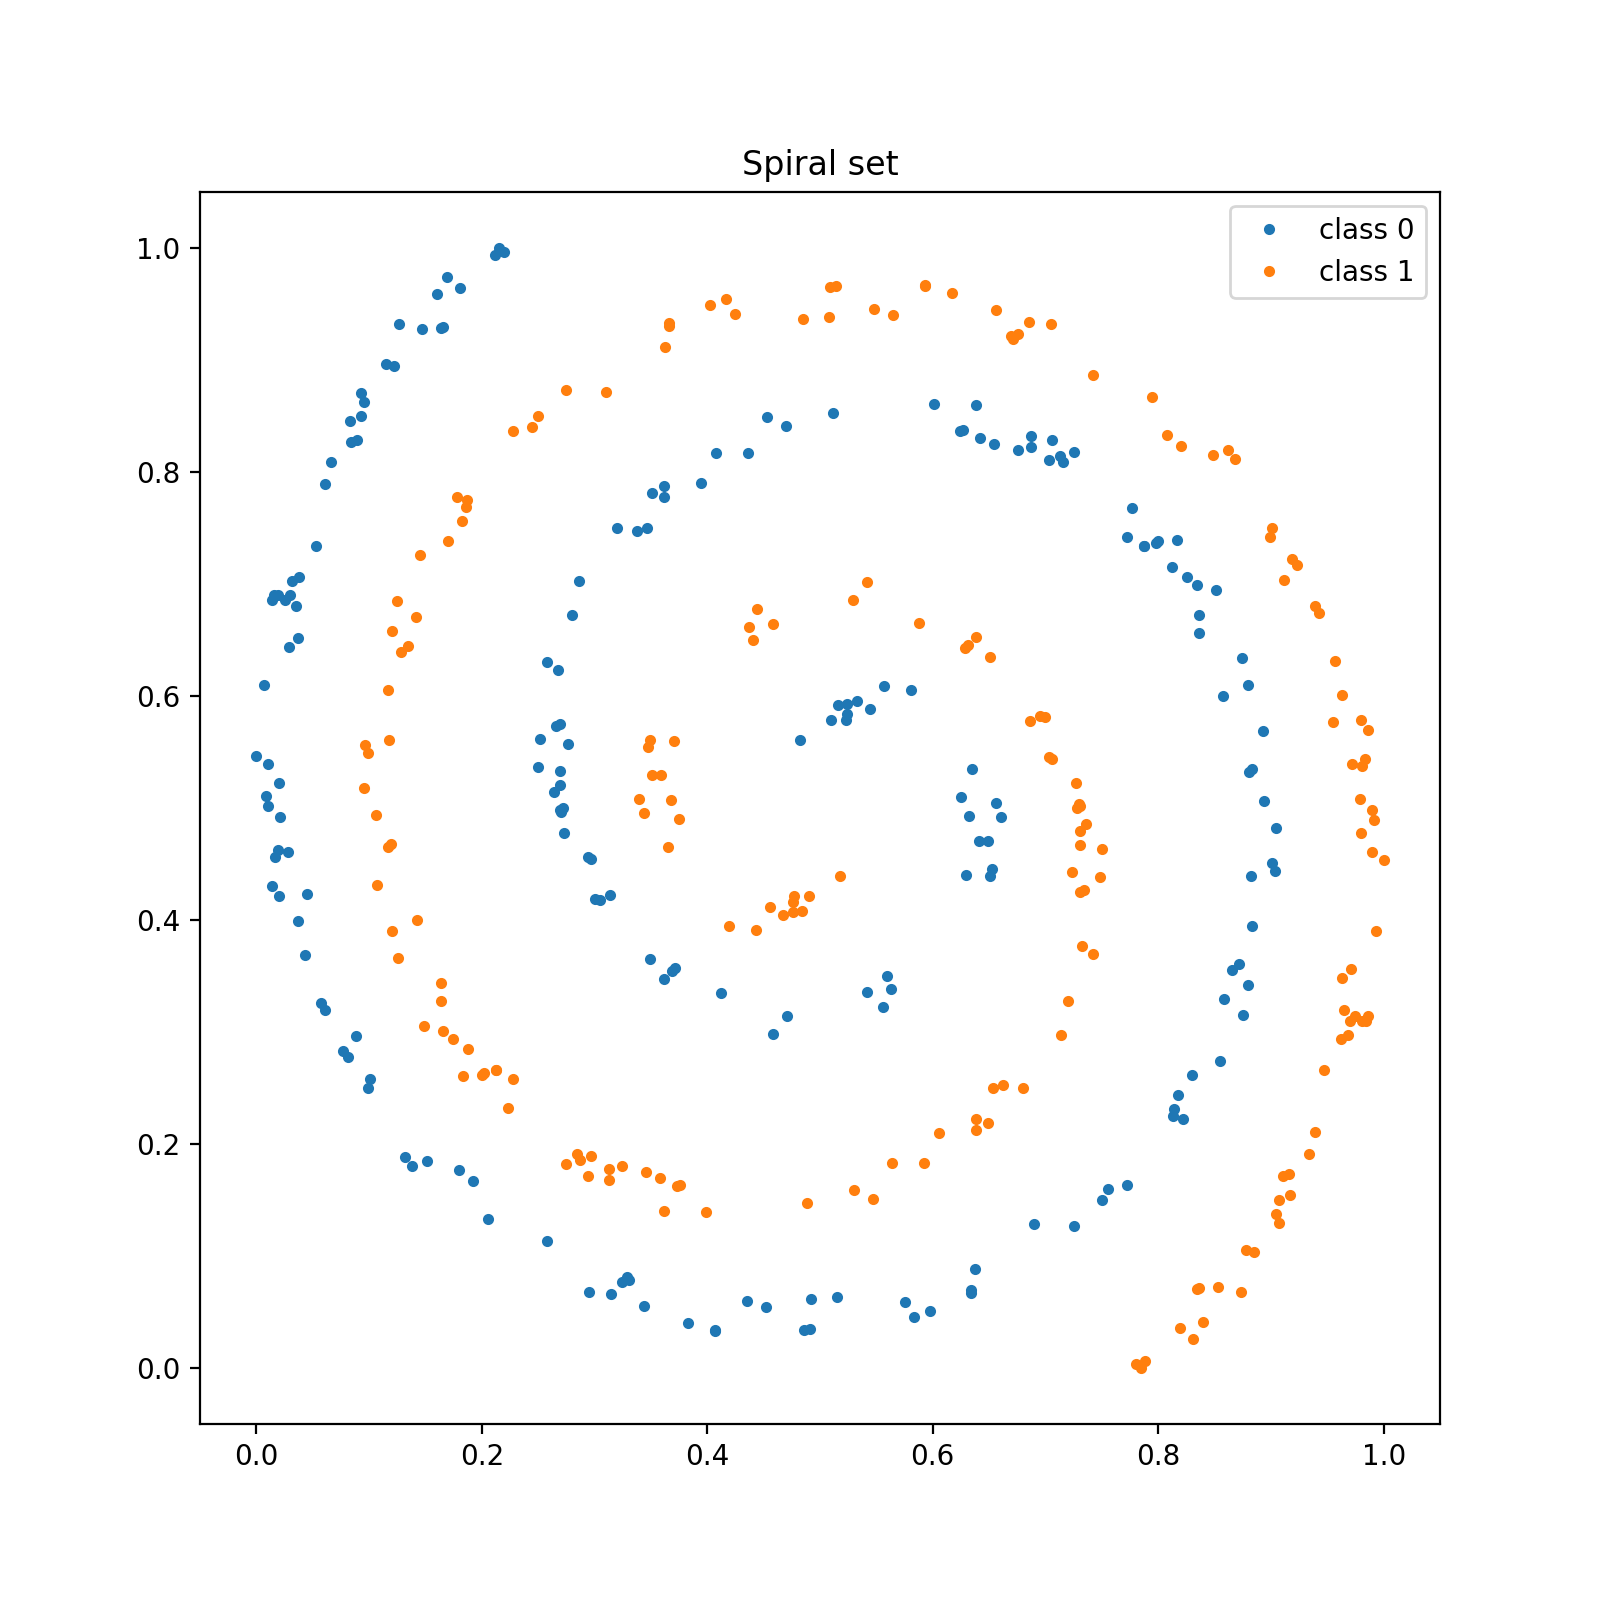

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.title('Spiral set')
plt.plot(Xsample.data_normalized[y==0,0], Xsample.data_normalized[y==0,1], '.', label='class 0')
plt.plot(Xsample.data_normalized[y==1,0], Xsample.data_normalized[y==1,1], '.', label='class 1')
plt.legend()
plt.show()

In [5]:
label_data = dataset.Clusters3d(nclusters=2,npoints=npoints,spread=0.02, data_range=[0, 600])

<IPython.core.display.Javascript object>


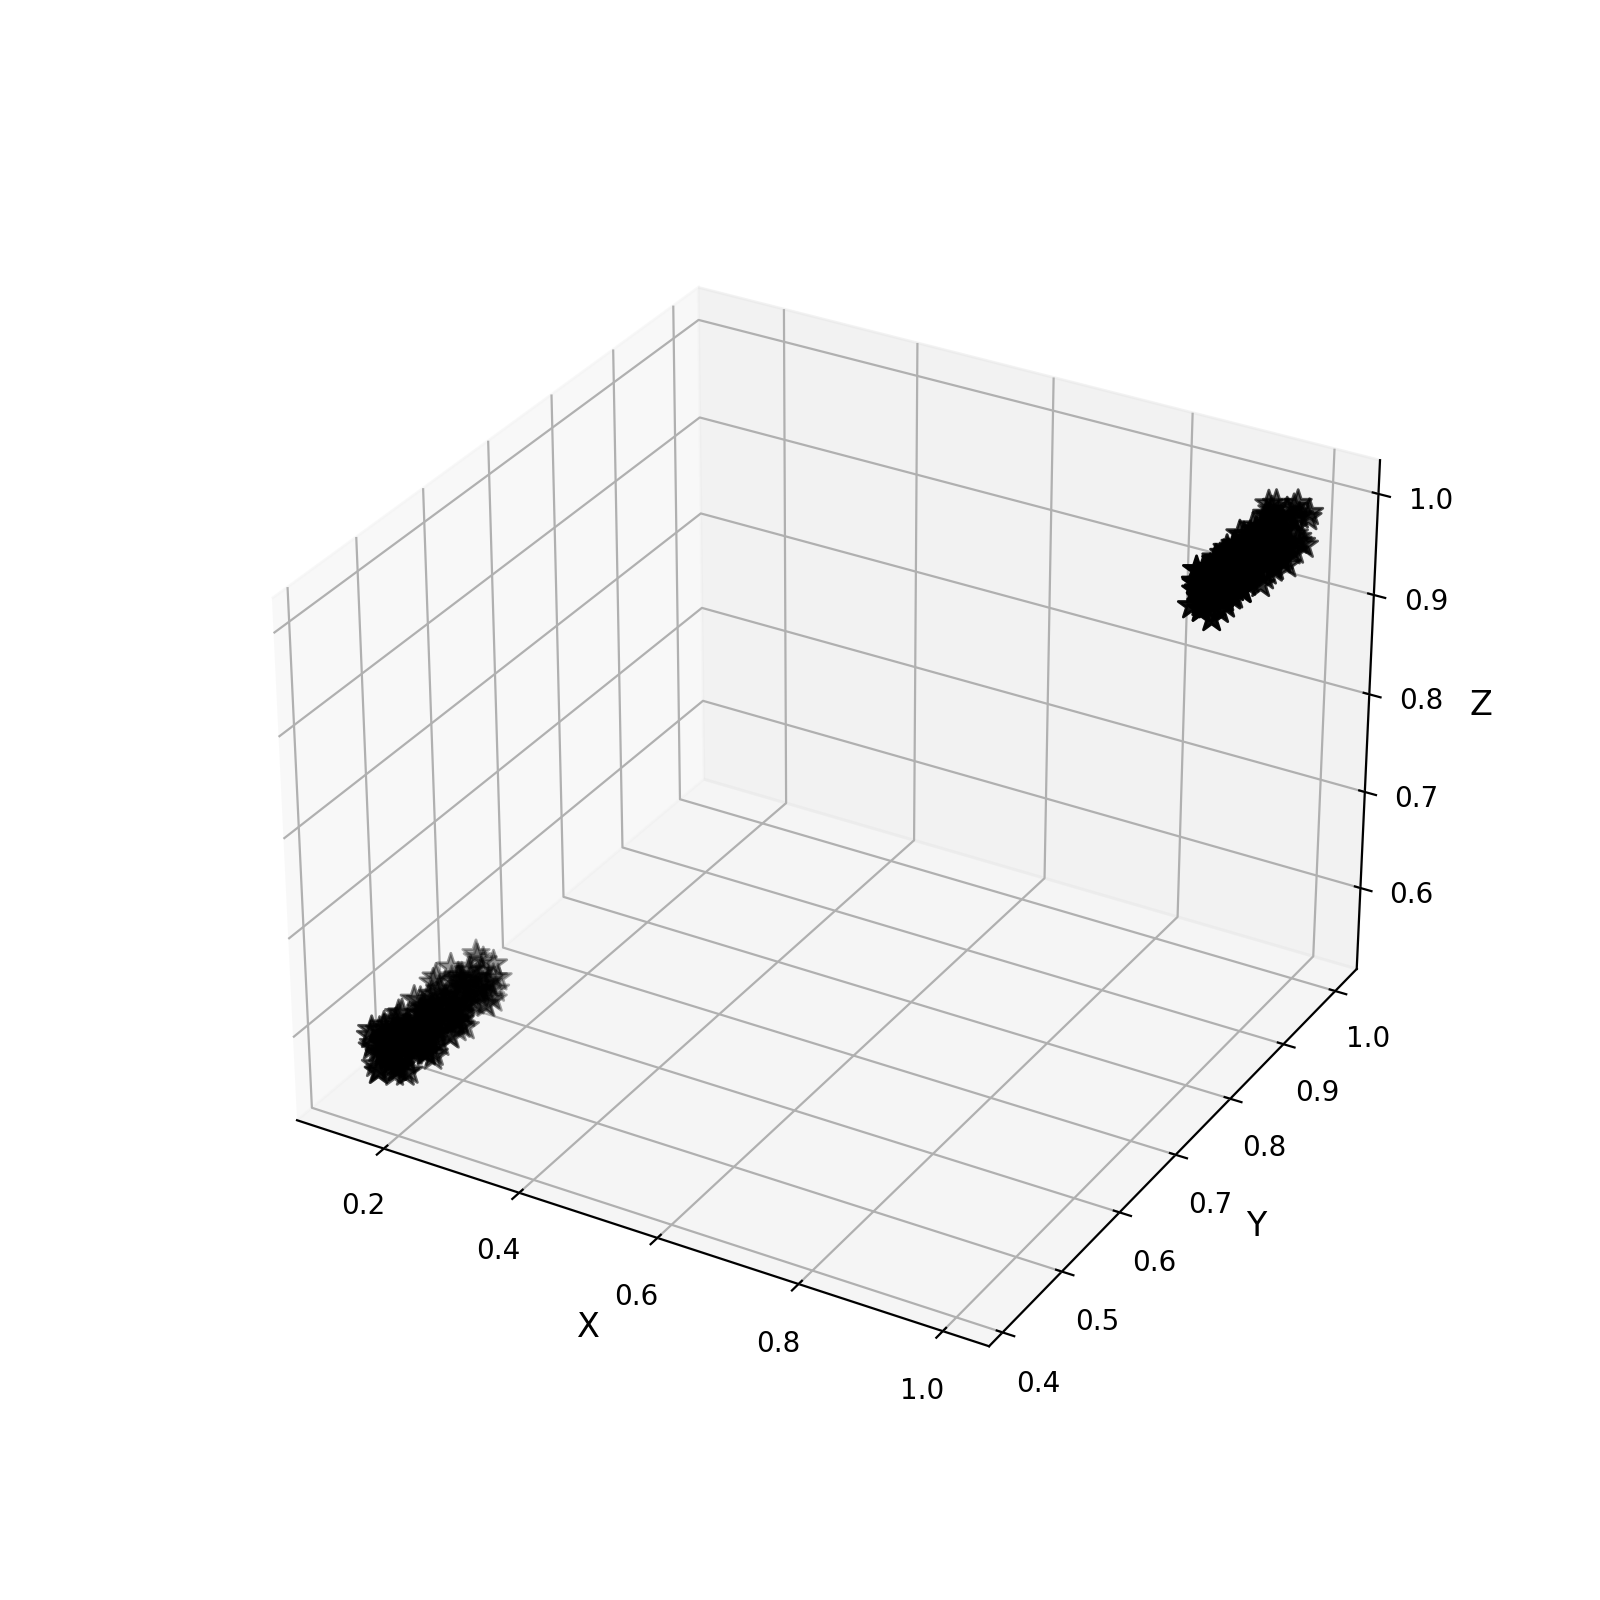

In [6]:
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111, projection='3d')

ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
ax.set_zlabel("Z",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
# scatter with colormap mapping
ax.scatter(label_data.data_normalized[...,0],label_data.data_normalized[...,1],label_data.data_normalized[...,2],s=100,c='k',marker='*')
plt.show()
#fig.savefig('data_raw.png', bbox_inches='tight')

### Train Network

In [7]:
epochs = 10
neurons = 50
rhoa = 0.85
rhob = 0.8
beta = 0.8
network = fuzzyARTMAPg.FuzzyARTMAPg(n1=2, n2=3, m1=50, m2=50, rhoa=rhoa, rhob=rhob, alpha=0.1, beta=0.5, eps=0.01, seed=0, comp=True)
print("Start training...")

for _ in range(epochs):
    order = np.random.choice(npoints*2,npoints*2)
    for i in order:
        I = Xsample.data_normalized[i,...]
        Y = label_data.data_normalized[i,...]
        print("{} ---> class {}\n".format(I.ravel(),Y.ravel()))
        
        Z, k = network.fit(I.ravel(),Y.ravel()) 
        if not k==None:
            print("zJa:\n{}\nZjb:\n{}\n".format(Z[0], Z[1]))
            print("Class:\t{}\n".format(k))
            print("\n\n")
        else:
            print("Unrecognized pattern:\n")

print("Training completed!")



INFO:root:Encode 1st node for this new network.
INFO:root:T signal ranking:
[]

INFO:root:Number of active nodes:	1

INFO:root:New neruons coded into F2 node 0
INFO:root:T signal ranking:
[]

INFO:root:Number of active nodes:	1

INFO:root:New neruons coded into F2 node 0
INFO:root:T signal ranking:
[0]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[0]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	1

INFO:root:T signal ranking:
[0]

INFO:root:No match found. Attempting to encode new neurons:	Neuron no 2
INFO:root:Number of active nodes:	2

INFO:root:New neruons coded into class 1
INFO:root:T signal ranking:
[0]

INFO:root:T signal ranking:
[0]

INFO:root:No match found. Attempting to encode new neurons:	Neuron no 2
INFO:root:Number of active nodes:	2

INFO:root:New neruons coded into class 1
INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace 

Start training...
[0.02509233 0.685835  ] ---> class [0.16051784 0.4911623  0.5801349 ]

zJa:
[[0.02509233 0.685835  ]
 [0.9749077  0.314165  ]]
Zjb:
[[0.16051784 0.4911623  0.58013493]
 [0.83948219 0.5088377  0.41986507]]

Class:	0




[0.8482278  0.81498826] ---> class [0.9528685  0.9467059  0.97526556]

zJa:
[[0.8482278  0.81498826]
 [0.1517722  0.18501174]]
Zjb:
[[0.95286852 0.94670588 0.97526556]
 [0.04713148 0.05329412 0.02473444]]

Class:	1




[0.87147576 0.36108273] ---> class [0.15797935 0.45072308 0.5665659 ]

zJa:
[[0.87147576 0.36108273]
 [0.12852424 0.63891727]]
Zjb:
[[0.1592486  0.47094269 0.5733504 ]
 [0.83948219 0.5088377  0.41986507]]

Class:	0




[0.6534754  0.25025302] ---> class [0.9602302 0.870648  0.957587 ]

zJa:
[[0.6534754  0.25025302]
 [0.3465246  0.74974698]]
Zjb:
[[0.95286852 0.90867695 0.96642628]
 [0.04345065 0.05329412 0.02473444]]

Class:	1




[0.9837551 0.5440616] ---> class [0.99678457 0.893144   0.98146856]

zJa:
[[0.98375511 0.5440616 ]
 [0.016244

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[0 3 4 2 1]

INFO:root:T signal ranking:
[0 3 4 2 1]

INFO:root:No match found. Attempting to encode new neurons:	Neuron no 6
INFO:root:Number of active nodes:	6

INFO:root:New neruons coded into class 5
INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[5 0 3 4 2 1]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	6

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[1 4 2 3 5 0]

INFO:root:Current rhoa:0.9507765567302704

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[1 4 2 3 5 0]

INFO:root:T signal ranking:
[1 4 2 3 5 0]

INFO:root:No match found. Attempting to encode new neurons:	Neuron no 7
INFO:root:Number of active nodes:	7

INFO:root:New neruons coded into class 

zJa:
[[0.26551858 0.5730195 ]
 [0.73448145 0.4269805 ]]
Zjb:
[[0.1592486  0.47094269 0.56933786]
 [0.83398208 0.5057579  0.41986507]]

Class:	0




[0.77676934 0.7679998 ] ---> class [0.17871045 0.5192823  0.5610607 ]

zJa:
[[0.77676934 0.76799983]
 [0.22323066 0.23200017]]
Zjb:
[[0.1592486  0.47094269 0.56313001]
 [0.82446267 0.48697776 0.41986507]]

Class:	0




[0.6382735 0.8601181] ---> class [0.16094095 0.4975897  0.57548267]

zJa:
[[0.70752141 0.76799983]
 [0.22323066 0.18594104]]
Zjb:
[[0.1592486  0.47094269 0.56313001]
 [0.82446267 0.48697776 0.41986507]]

Class:	0




[0.3102824 0.8716552] ---> class [0.9678456  0.85109806 0.9955803 ]

zJa:
[[0.31028241 0.87165523]
 [0.68971759 0.12834477]]
Zjb:
[[0.95286852 0.87406265 0.96642628]
 [0.01327424 0.05329412 0.01225094]]

Class:	1




[0.16955598 0.97377247] ---> class [0.17007954 0.48205677 0.55152357]

zJa:
[[0.16955598 0.97377247]
 [0.83044404 0.02622753]]
Zjb:
[[0.1592486  0.47094269 0.55442518]
 [0.82446267 0.48697776 0.41986

INFO:root:T signal ranking:
[9 3 2 5 4 6 7 1 0 8]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	10

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[0 5 8 7 9 6 4 3 1 2]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[0 5 8 7 9 6 4 3 1 2]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	10

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[6 1 4 7 2 3 8 5 0 9]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[6 1 4 7 2 3 8 5 0 9]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	10

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[9 5 3 0 7 8 

zJa:
[[0.3761245  0.16083497]
 [0.54673597 0.83684444]]
Zjb:
[[0.95286852 0.86110738 0.96413894]
 [0.01327424 0.03260578 0.00628059]]

Class:	1




[0.00685092 0.6099935 ] ---> class [0.1799797  0.49866098 0.57346666]

zJa:
[[0.01597163 0.57345948]
 [0.97360346 0.314165  ]]
Zjb:
[[0.1592486  0.4636449  0.55442518]
 [0.82117321 0.45693291 0.41486391]]

Class:	0




[0.72504807 0.8174761 ] ---> class [0.17871045 0.46705946 0.5570287 ]

zJa:
[[0.70752141 0.76799983]
 [0.22323066 0.18423247]]
Zjb:
[[0.1592486  0.4636449  0.55442518]
 [0.82117321 0.45693291 0.41486391]]

Class:	0




[0.21226494 0.26579282] ---> class [0.97080725 0.8478843  0.9921687 ]

zJa:
[[0.21226494 0.26579282]
 [0.78773504 0.73420715]]
Zjb:
[[0.95286852 0.85449584 0.96413894]
 [0.01327424 0.03260578 0.00628059]]

Class:	1




[0.4349643  0.05967645] ---> class [0.15527162 0.46625602 0.57354426]

zJa:
[[0.4349643  0.05967645]
 [0.5650357  0.94032353]]
Zjb:
[[0.15626586 0.4636449  0.55442518]
 [0.82117321 0.45693291 0.4

INFO:root:Number of active nodes:	14

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0  5  8  7 10  9  6 12 13 11  4  1  3  2]

INFO:root:Current rhoa:0.8975359271187335

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0  5  8  7 10  9  6 12 13 11  4  1  3  2]

INFO:root:T signal ranking:
[ 0  5  8  7 10  9  6 12 13 11  4  1  3  2]

INFO:root:No match found. Attempting to encode new neurons:	Neuron no 15
INFO:root:Number of active nodes:	15

INFO:root:New neruons coded into class 14
INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  0  5  8  7 10  9  6 12 13 11  4  1  3  2]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	15

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of acti

zJa:
[[0.35786675 0.04622893]
 [0.5650357  0.9362826 ]]
Zjb:
[[0.14610658 0.45062267 0.55242349]
 [0.82117321 0.45693291 0.41325502]]

Class:	0




[0.12852424 0.63891727] ---> class [0.9505838 0.9914301 0.982399 ]

zJa:
[[0.12852424 0.63891727]
 [0.87147576 0.36108273]]
Zjb:
[[0.95115499 0.85449584 0.95993254]
 [0.00644937 0.00916828 0.00457471]]

Class:	1




[0.6315494 0.6453532] ---> class [0.9560839  0.87225497 0.9686749 ]

zJa:
[[0.63154942 0.6453532 ]
 [0.36845058 0.3546468 ]]
Zjb:
[[0.95115499 0.85449584 0.95993254]
 [0.00644937 0.00916828 0.00457471]]

Class:	1




[0.9392472  0.21037278] ---> class [0.9611609  0.87921804 0.97278434]

zJa:
[[0.93924719 0.21037278]
 [0.06075281 0.78962719]]
Zjb:
[[0.95115499 0.85449584 0.95993254]
 [0.00644937 0.00916828 0.00457471]]

Class:	1




[0.31437305 0.06625735] ---> class [0.16864106 0.47188005 0.58269364]

zJa:
[[0.3361199  0.04622893]
 [0.5650357  0.93501262]]
Zjb:
[[0.14610658 0.45062267 0.55242349]
 [0.82117321 0.45693291 0.413255

INFO:root:T signal ranking:
[ 3  9 17 11 16 13  2 10 18 15  4  5 12  6  1 14  7  0  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3  9 17 11 16 13  2 10 18 15  4  5 12  6  1 14  7  0  8]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	19

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 14  0  5  6 18 10 15  1 17  9 12 13 11  4  3  2 16]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 14  0  5  6 18 10 15  1 17  9 12 13 11  4  3  2 16]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	19

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2 16  4 13 12  3 17  1 15  6 18  9 11 10  5 14  7  0  8]

INFO:root:Current rhoa:0.957685718536377

INFO:roo

zJa:
[[0.61904727 0.20968345]
 [0.3465246  0.74974698]]
Zjb:
[[0.95115499 0.85449584 0.95993254]
 [0.00644937 0.00916828 0.00457471]]

Class:	1




[0.0927325 0.8707604] ---> class [0.18006432 0.47777182 0.5641622 ]

zJa:
[[0.13114424 0.92226642]
 [0.83044404 0.02622753]]
Zjb:
[[0.14468132 0.42880456 0.55242349]
 [0.82055445 0.44886097 0.41325502]]

Class:	0




[0.96323276 0.34821117] ---> class [0.9650533  0.8470808  0.96813214]

zJa:
[[0.96323276 0.34821117]
 [0.03676724 0.65178883]]
Zjb:
[[0.95115499 0.84893458 0.95993254]
 [0.00644937 0.00916828 0.00457471]]

Class:	1




[0.70589274 0.54404217] ---> class [0.9651379 0.8481521 0.9618516]

zJa:
[[0.7201871  0.42698053]
 [0.26551855 0.51448867]]
Zjb:
[[0.95115499 0.84854334 0.95993254]
 [0.00644937 0.00916828 0.00457471]]

Class:	1




[0.09644754 0.55624706] ---> class [0.9979692  0.99410814 0.9603008 ]

zJa:
[[0.11248589 0.59758216]
 [0.87147576 0.36108273]]
Zjb:
[[0.95115499 0.84854334 0.95993254]
 [0.00313543 0.00671096 0.004574

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	20

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 15  3 18 17  4  2 12  6  5 19  9 16  1 11 10 14  7  0  8]

INFO:root:Current rhoa:0.9164802676439285

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 15  3 18 17  4  2 12  6  5 19  9 16  1 11 10 14  7  0  8]

INFO:root:T signal ranking:
[13 15  3 18 17  4  2 12  6  5 19  9 16  1 11 10 14  7  0  8]

INFO:root:No match found. Attempting to encode new neurons:	Neuron no 21
INFO:root:Number of active nodes:	21

INFO:root:New neruons coded into class 20
INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[20 13 15  3 18 17  4  2 12  6  5 19  9 16  1 11 10 14  7  0  8]

INFO:root:Update LTM trace for node: 	 20

INFO:root:Number of activ

zJa:
[[0.01597163 0.51805182]
 [0.97360346 0.314165  ]]
Zjb:
[[0.14468132 0.42880456 0.55242349]
 [0.81884888 0.44082041 0.41325502]]

Class:	0




[0.6492361  0.47078413] ---> class [0.14367913 0.4785753  0.5726138 ]

zJa:
[[0.64923608 0.47078413]
 [0.35076392 0.52921587]]
Zjb:
[[0.14392967 0.42880456 0.55242349]
 [0.81884888 0.44082041 0.41325502]]

Class:	0




[0.6534754  0.25025302] ---> class [0.9602302 0.870648  0.957587 ]

zJa:
[[0.61904727 0.20968345]
 [0.3465246  0.74974698]]
Zjb:
[[0.95115499 0.84854334 0.95875977]
 [0.00313543 0.00671096 0.00457471]]

Class:	1




[0.02509233 0.685835  ] ---> class [0.16051784 0.4911623  0.5801349 ]

zJa:
[[0.01597163 0.51805182]
 [0.97360346 0.314165  ]]
Zjb:
[[0.14392967 0.42880456 0.55242349]
 [0.81884888 0.44082041 0.41325502]]

Class:	0




[0.79951984 0.7387216 ] ---> class [0.14562531 0.43760043 0.5691246 ]

zJa:
[[0.70752141 0.75336072]
 [0.21185541 0.18423247]]
Zjb:
[[0.14392967 0.42880456 0.55242349]
 [0.81884888 0.44082041 0.4132

INFO:root:T signal ranking:
[ 6 12  1  4 15 13  2 23 18 20 21 19 16 17  3  7  5 14  0  8  9 10 11 22]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	24

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 22  5 14  0 17  9 11  3  8 20 18 13  7  2 15 19 21 16  4 12  6 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 22  5 14  0 17  9 11  3  8 20 18 13  7  2 15 19 21 16  4 12  6 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	24

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2 19  4 16 13 12 20  3 17  1  6 15 18  9 11 10 23  5 21 22 14  7  0  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 19  4 16 13 12 20  3 17  1  6 15 18  9 11 10 

zJa:
[[0.70752141 0.72616856]
 [0.18885282 0.18423247]]
Zjb:
[[0.13942631 0.42576031 0.55242349]
 [0.81884888 0.44082041 0.41071082]]

Class:	0




[0.16419388 0.34369838] ---> class [0.97393805 0.95259774 0.981391  ]

zJa:
[[0.17621165 0.26579282]
 [0.78773504 0.675778  ]]
Zjb:
[[0.95115499 0.84854334 0.95875977]
 [0.00313543 0.00671096 0.00457471]]

Class:	1




[0.87147576 0.36108273] ---> class [0.15797935 0.45072308 0.5665659 ]

zJa:
[[0.87147576 0.36108273]
 [0.12852424 0.63891727]]
Zjb:
[[0.13942631 0.42576031 0.55242349]
 [0.81884888 0.44082041 0.41071082]]

Class:	0




[0.851216 0.694885] ---> class [0.17473346 0.57953936 0.5593549 ]

zJa:
[[0.70752141 0.71052679]
 [0.1688184  0.18423247]]
Zjb:
[[0.13942631 0.42576031 0.55242349]
 [0.81884888 0.43064053 0.41071082]]

Class:	0




[0.26551858 0.5730195 ] ---> class [0.17151803 0.4973219  0.5653253 ]

zJa:
[[0.26551858 0.51366723]
 [0.71896791 0.4269805 ]]
Zjb:
[[0.13942631 0.42576031 0.55242349]
 [0.81884888 0.43064053 0.41071

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 1  6 12 23  4 21 15 13  2 18 25 20 19  7 16 24 17  3  8  5 14  0  9 10
 11 22]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1  6 12 23  4 21 15 13  2 18 25 20 19  7 16 24 17  3  8  5 14  0  9 10
 11 22]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	26

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 10 14  0 24 25 18 22 20  7 17  9 13 15  8 11 21  3  4 12  2  6 19 23
  1 16]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 10 14  0 24 25 18 22 20  7 17  9 13 15  8 11 21  3  4 12  2  6 19 23
  1 16]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	26

INFO:root:T signal ranking:
[0 1]

INFO:root:Updat

zJa:
[[0.3361199  0.04622893]
 [0.48359087 0.93501262]]
Zjb:
[[0.13808344 0.42576031 0.55242349]
 [0.81884888 0.43064053 0.41005418]]

Class:	0




[0.8482278  0.81498826] ---> class [0.9528685  0.9467059  0.97526556]

zJa:
[[0.8482278  0.81498826]
 [0.1517722  0.18501174]]
Zjb:
[[0.95115499 0.84854334 0.95875977]
 [0.00313543 0.00671096 0.0035861 ]]

Class:	1




[0.2693776  0.49863625] ---> class [0.1739719  0.44483128 0.5498178 ]

zJa:
[[0.26551858 0.50615174]
 [0.71896791 0.4269805 ]]
Zjb:
[[0.13808344 0.42576031 0.55112065]
 [0.81884888 0.43064053 0.41005418]]

Class:	0




[0.3465246  0.74974704] ---> class [0.16212557 0.4459025  0.5784291 ]

zJa:
[[0.3465246  0.74974704]
 [0.6534754  0.25025296]]
Zjb:
[[0.13808344 0.42576031 0.55112065]
 [0.81884888 0.43064053 0.41005418]]

Class:	0




[0.5097419 0.5787893] ---> class [0.15154849 0.46223888 0.5501279 ]

zJa:
[[0.52141783 0.58723161]
 [0.46690625 0.40432608]]
Zjb:
[[0.13808344 0.42576031 0.55062428]
 [0.81884888 0.43064053 0.410

INFO:root:T signal ranking:
[16 19  2 27  3  4 13  9 12 11 17 20 24  1  6 15 18 10 25 22 23  5 21 26
 14  7  0  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	28

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 23 21 15  1 18 25  7 20 26 13 12  4 24  8 17  3  5  2 14 19  0  9 16
 27 10 11 22]

INFO:root:Current rhoa:0.9365607297420502

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 23 21 15  1 18 25  7 20 26 13 12  4 24  8 17  3  5  2 14 19  0  9 16
 27 10 11 22]

INFO:root:T signal ranking:
[ 6 23 21 15  1 18 25  7 20 26 13 12  4 24  8 17  3  5  2 14 19  0  9 16
 27 10 11 22]

INFO:root:No match found. Attempting to encode new neurons:	Neuron no 29
INFO:root:Number of active nodes:	29

INFO:root:New neruons coded into class 28
INFO:root:Learn pattern and upd

zJa:
[[0.91226956 0.1555273 ]
 [0.05689797 0.76170829]]
Zjb:
[[0.95115499 0.84854334 0.95875977]
 [0.00313543 0.00671096 0.0035861 ]]

Class:	1




[0.64229727 0.83019376] ---> class [0.15264851 0.46170327 0.5532294 ]

zJa:
[[0.64229727 0.83019376]
 [0.35770273 0.16980624]]
Zjb:
[[0.13739359 0.42576031 0.55062428]
 [0.81884888 0.42501418 0.41005418]]

Class:	0




[0.48619175 0.03350258] ---> class [0.16119479 0.46464917 0.55547804]

zJa:
[[0.3361199  0.03986576]
 [0.48359087 0.93501262]]
Zjb:
[[0.13739359 0.42576031 0.55062428]
 [0.81884888 0.42501418 0.41005418]]

Class:	0




[0.89944565 0.7421606 ] ---> class [0.96463025 0.94777715 0.9901527 ]

zJa:
[[0.8482278  0.77857444]
 [0.12616327 0.18501174]]
Zjb:
[[0.95115499 0.84854334 0.95875977]
 [0.00313543 0.00671096 0.0035861 ]]

Class:	1




[0.7155904  0.80872065] ---> class [0.13970216 0.46598822 0.58982706]

zJa:
[[0.70752141 0.71052679]
 [0.1688184  0.18423247]]
Zjb:
[[0.13739359 0.42576031 0.55062428]
 [0.81884888 0.42501418 0.4

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 15 20 18  6 12  4 28 25  2 23  1 24  3 17  5 21 19 26 16 14  7 27  9
  0 10 11 22  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	29

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14 26  8  0  5  7 25 10 21 18 22 15 28  6 24 23  1 20 17  9 13 12 11  4
  3  2 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14 26  8  0  5  7 25 10 21 18 22 15 28  6 24 23  1 20 17  9 13 12 11  4
  3  2 19 16 27]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	29

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11  9 27  3 17 24 10 18 16 20 13 25 22  5  2 15 19 21 26  4 12 28 14  6
  7  0 23  1  8]

INFO:root:Le

zJa:
[[0.70764647 0.40209191]
 [0.26551855 0.45679759]]
Zjb:
[[0.95115499 0.84854334 0.95685529]
 [0.00313543 0.00671096 0.0035861 ]]

Class:	1




[0.17027922 0.7380266 ] ---> class [0.9683534  0.92929834 0.9750329 ]

zJa:
[[0.11248589 0.59758216]
 [0.85059828 0.31152806]]
Zjb:
[[0.95115499 0.84854334 0.95685529]
 [0.00313543 0.00671096 0.0035861 ]]

Class:	1




[0.49104735 0.03495779] ---> class [0.15687935 0.4860739  0.58982706]

zJa:
[[0.31543185 0.03741177]
 [0.48359087 0.93362715]]
Zjb:
[[0.13739359 0.42576031 0.55062428]
 [0.81884888 0.42501418 0.41005418]]

Class:	0




[0.15177219 0.18501167] ---> class [0.13284819 0.5391001  0.5563309 ]

zJa:
[[0.15177219 0.18501167]
 [0.8482278  0.81498832]]
Zjb:
[[0.13398454 0.42576031 0.55062428]
 [0.81884888 0.42501418 0.41005418]]

Class:	0




[0.01953674 0.6898082 ] ---> class [0.16694872 0.47803965 0.5494301 ]

zJa:
[[0.01597163 0.51805182]
 [0.96938469 0.3121784 ]]
Zjb:
[[0.13398454 0.42576031 0.55002718]
 [0.81884888 0.42501418 0.4

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6  1 28 12 15 13 23  4 20 21 18 25 26  2  7 19 24 17  3 16  5 14 27  8
  0  9 10 11 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  1 28 12 15 13 23  4 20 21 18 25 26  2  7 19 24 17  3 16  5 14 27  8
  0  9 10 11 22 29]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	30

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6  1 12  4 15 13 28 23  2 20 18 25 21 26 19 16 24  7 17  3  5 27 14  8
  0  9 10 11 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6  1 12  4 15 13 28 23  2 20 18 25 21 26 19 16 24  7 17  3  5 27 14  8
  0  9 10 11 22 29]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	30

IN

zJa:
[[0.47858216 0.41276836]
 [0.5097419  0.57878935]]
Zjb:
[[0.95115499 0.84854334 0.95685529]
 [0.00313543 0.00429282 0.0035861 ]]

Class:	1




[0.7727702  0.74201906] ---> class [0.13538669 0.5040171  0.5723036 ]

zJa:
[[0.70752141 0.71052679]
 [0.1688184  0.18423247]]
Zjb:
[[0.13398454 0.42525293 0.55002718]
 [0.81884888 0.42447817 0.40995847]]

Class:	0




[0.81237763 0.7152242 ] ---> class [0.15442546 0.42662024 0.584477  ]

zJa:
[[0.70752141 0.71052679]
 [0.1688184  0.18423247]]
Zjb:
[[0.13398454 0.42525293 0.55002718]
 [0.81884888 0.42447817 0.40995847]]

Class:	0




[0.12591822 0.36640912] ---> class [0.99822307 0.8875201  0.9888346 ]

zJa:
[[0.14847458 0.26189552]
 [0.78773504 0.65468444]]
Zjb:
[[0.95115499 0.84854334 0.95685529]
 [0.00245618 0.00429282 0.0035861 ]]

Class:	1




[0.48820245 0.1475671 ] ---> class [0.94973767 0.9365292  0.9899977 ]

zJa:
[[0.34373899 0.15420103]
 [0.52926676 0.82966077]]
Zjb:
[[0.95044633 0.84854334 0.95685529]
 [0.00245618 0.00429282 0.0

INFO:root:T signal ranking:
[ 1  6  4 12  2 28 15 13 23 19 21 20 18 25 16 26  7 30 24 17  3 27  5 14
  8  0  9 10 11 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1  6  4 12  2 28 15 13 23 19 21 20 18 25 16 26  7 30 24 17  3 27  5 14
  8  0  9 10 11 22 29]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	31

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16  2 19  3 13  4 27 12 17 20 24  1  6  9 15 11 18 10 28 30 29 25 23 22
  5 21 26 14  7  0  8]

INFO:root:Current rhoa:0.9066427622362971

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16  2 19  3 13  4 27 12 17 20 24  1  6  9 15 11 18 10 28 30 29 25 23 22
  5 21 26 14  7  0  8]

INFO:root:Current rhoa:0.9189483618736267

INFO:root:T signal ranking:
[0 1]

INFO:root:

zJa:
[[0.8482278  0.76036753]
 [0.11335881 0.18501174]]
Zjb:
[[0.95044633 0.84423277 0.95685529]
 [0.00156601 0.00308376 0.0035861 ]]

Class:	1




[0.85510045 0.2742402 ] ---> class [0.14647149 0.45929298 0.5495077 ]

zJa:
[[0.85510045 0.2742402 ]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13398454 0.42258898 0.54957262]
 [0.81884888 0.42447817 0.40995847]]

Class:	0




[0.62525094 0.5098133 ] ---> class [0.14537147 0.45875734 0.5895945 ]

zJa:
[[0.63145693 0.47078413]
 [0.35076392 0.49093296]]
Zjb:
[[0.13398454 0.42258898 0.54957262]
 [0.81884888 0.42447817 0.40995847]]

Class:	0




[0.22722976 0.2579809 ] ---> class [0.9848536  0.9376004  0.99744123]

zJa:
[[0.14847458 0.25993822]
 [0.78025264 0.65468444]]
Zjb:
[[0.95044633 0.84423277 0.95685529]
 [0.00156601 0.00308376 0.00307243]]

Class:	1




[0.48474267 0.9362811 ] ---> class [0.96556103 0.96411353 0.96588355]

zJa:
[[0.48474267 0.93628109]
 [0.51525736 0.06371891]]
Zjb:
[[0.95044633 0.84423277 0.95685529]
 [0.00156601 0.00308376 0.0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[12  4  2  1  6 13 15 20 19 18 31 16 28 23 25 30 24 21  3 17  5 27 26 32
 14  7  9  0 10 11  8 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  4  2  1  6 13 15 20 19 18 31 16 28 23 25 30 24 21  3 17  5 27 26 32
 14  7  9  0 10 11  8 22 29]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	33

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 21  7 23 28 25 26  8 18  6 15  1 30 24 20  5 14 17 13 12  0  4  9  3
  2 10 11 31 22 19 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 21  7 23 28 25 26  8 18  6 15  1 30 24 20  5 14 17 13 12  0  4  9  3
  2 10 11 31 22 19 29 16 27]

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	33

INFO:root:T signal ranking:
[0 1]

INFO:r

zJa:
[[0.8576327  0.59980339]
 [0.13119626 0.39515543]]
Zjb:
[[0.13398454 0.42258898 0.54957262]
 [0.81884888 0.42447817 0.40995847]]

Class:	0




[0.48474267 0.9362811 ] ---> class [0.96556103 0.96411353 0.96588355]

zJa:
[[0.48474267 0.93628109]
 [0.51525736 0.06371891]]
Zjb:
[[0.95044633 0.84423277 0.95685529]
 [0.00156601 0.00308376 0.00307243]]

Class:	1




[0.258035  0.6303059] ---> class [0.15011    0.44724157 0.5830038 ]

zJa:
[[0.26177679 0.50615174]
 [0.71896791 0.3983373 ]]
Zjb:
[[0.13398454 0.42258898 0.54957262]
 [0.81884888 0.42447817 0.40995847]]

Class:	0




[0.5089526 0.9650422] ---> class [0.98756135 0.88055706 0.9906955 ]

zJa:
[[0.48474267 0.93628109]
 [0.50315237 0.04933837]]
Zjb:
[[0.95044633 0.84423277 0.95685529]
 [0.00156601 0.00308376 0.00307243]]

Class:	1




[0.12591822 0.36640912] ---> class [0.99822307 0.8875201  0.9888346 ]

zJa:
[[0.13566959 0.25993822]
 [0.78025264 0.62724391]]
Zjb:
[[0.95044633 0.84423277 0.95685529]
 [0.00156601 0.00308376 0.00307

INFO:root:Number of active nodes:	33

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 30 14 10  0 18 26 25  7 24 22 20 15  8 29 17  9 13 21 32 12 11 28  4
  6  3  2 23  1 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 30 14 10  0 18 26 25  7 24 22 20 15  8 29 17  9 13 21 32 12 11 28  4
  6  3  2 23  1 31 19 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	33

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 17 30  9 10  5 18 20 25 13  3 11 22 26 15 29  2 14  0 21 31  7 19  4
 32 12 28  6 16 27 23  8  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[24 17 30  9 10  5 18 20 25 13  3 11 22 26 15 29  2 14  0 21 31  7 19  4
 32 12 28  6 16 27 23  8  1]

INFO:roo

zJa:
[[0.70555039 0.38589301]
 [0.26177678 0.45555627]]
Zjb:
[[0.95044633 0.84423277 0.95685529]
 [0.00156601 0.0028809  0.00307243]]

Class:	1




[0.25119343 0.5619093 ] ---> class [0.1831105 0.5690948 0.5932388]

zJa:
[[0.25648511 0.50615174]
 [0.71896791 0.3983373 ]]
Zjb:
[[0.13398454 0.42258898 0.54957262]
 [0.8178692  0.42447817 0.40835985]]

Class:	0




[0.41909045 0.39484006] ---> class [0.9609917 0.8532405 0.9589827]

zJa:
[[0.4386337  0.39735999]
 [0.5097419  0.57878935]]
Zjb:
[[0.95044633 0.84423277 0.95685529]
 [0.00156601 0.0028809  0.00307243]]

Class:	1




[0.09586369 0.51785624] ---> class [0.97055334 0.8551152  1.        ]

zJa:
[[0.10417479 0.5577192 ]
 [0.85059828 0.31152806]]
Zjb:
[[0.95044633 0.84423277 0.95685529]
 [0.00156601 0.0028809  0.00153622]]

Class:	1




[0.51179755 0.85243285] ---> class [0.1379252  0.42474556 0.59013724]

zJa:
[[0.51179755 0.85243285]
 [0.48820245 0.14756715]]
Zjb:
[[0.13398454 0.42258898 0.54957262]
 [0.8178692  0.42447817 0.4083598

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30  5 24 18 26 14 25 10 20  0  9 17  7 13 15 22 21 29 11  3 32  4  8 12
  2 28  6 31 23  1 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30  5 24 18 26 14 25 10 20  0  9 17  7 13 15 22 21 29 11  3 32  4  8 12
  2 28  6 31 23  1 19 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	33

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 32 26 14 21  5 25 23  0 30 28 10 18 15  6 22 24  1 29 20 17  9 12
 13  4 11  3  2 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 32 26 14 21  5 25 23  0 30 28 10 18 15  6 22 24  1 29 20 17  9 12
 13  4 11  3  2 31 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	33



zJa:
[[0.34466669 0.52238639]
 [0.64555952 0.43957466]]
Zjb:
[[0.95044633 0.84418388 0.95679471]
 [0.00156601 0.0028809  0.00153622]]

Class:	1




[0.21135102 0.99384   ] ---> class [0.1333559  0.43304768 0.57618046]

zJa:
[[0.11193837 0.8965134 ]
 [0.8095465  0.01619378]]
Zjb:
[[0.13367022 0.42258898 0.54957262]
 [0.8178692  0.42447817 0.40835985]]

Class:	0




[0.34701833 0.5543935 ] ---> class [0.973515   0.9359936  0.96859735]

zJa:
[[0.34466669 0.52238639]
 [0.64555952 0.43957466]]
Zjb:
[[0.95044633 0.84418388 0.95679471]
 [0.00156601 0.0028809  0.00153622]]

Class:	1




[0.9392472  0.21037278] ---> class [0.9611609  0.87921804 0.97278434]

zJa:
[[0.91226956 0.1555273 ]
 [0.05689797 0.76170829]]
Zjb:
[[0.95044633 0.84418388 0.95679471]
 [0.00156601 0.0028809  0.00153622]]

Class:	1




[0.7059553  0.82898575] ---> class [0.15121002 0.4217997  0.5805226 ]

zJa:
[[0.70673837 0.71052679]
 [0.1688184  0.17762336]]
Zjb:
[[0.13367022 0.42219434 0.54957262]
 [0.8178692  0.42447817 0.4

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 29 22  9  5 11 17 24 14 30  3  0 18 26 20 25 31 13  7  8 16 15  2 19
 27 21 32 12  4 28  6 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 29 22  9  5 11 17 24 14 30  3  0 18 26 20 25 31 13  7  8 16 15  2 19
 27 21 32 12  4 28  6 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	33

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14  5 22  8 30 10 26 25  7 18 29 15 21 24 20 32 17 28  9  6 13 12 23
  1  4 11  3  2 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14  5 22  8 30 10 26 25  7 18 29 15 21 24 20 32 17 28  9  6 13 12 23
  1  4 11  3  2 31 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	33

INFO:root:T signal ranking:
[1 0]

INFO:ro

zJa:
[[0.13566959 0.25993822]
 [0.78025264 0.62724391]]
Zjb:
[[9.50446330e-01 8.44183876e-01 9.56794706e-01]
 [1.56600669e-03 2.88089589e-03 9.23229207e-04]]

Class:	1




[0.02912122 0.6433239 ] ---> class [0.13360974 0.49598286 0.5865705 ]

zJa:
[[0.01589416 0.4696415 ]
 [0.96894784 0.30463307]]
Zjb:
[[0.13363998 0.42219434 0.54957262]
 [0.8178692  0.42447817 0.40835985]]

Class:	0




[0.9571208 0.6313272] ---> class [0.9651379  0.92313874 0.9863534 ]

zJa:
[[0.84482393 0.48151775]
 [0.00812244 0.37958099]]
Zjb:
[[9.50446330e-01 8.44183876e-01 9.56794706e-01]
 [1.56600669e-03 2.88089589e-03 9.23229207e-04]]

Class:	1




[0.37018317 0.56012046] ---> class [0.98155355 0.90921265 0.96084356]

zJa:
[[0.34466669 0.52238639]
 [0.63768817 0.43957466]]
Zjb:
[[9.50446330e-01 8.44183876e-01 9.56794706e-01]
 [1.56600669e-03 2.88089589e-03 9.23229207e-04]]

Class:	1




[0.45809725 0.6644959 ] ---> class [0.9704688 0.9552758 0.9906955]

zJa:
[[0.44446477 0.67121723]
 [0.54871899 0.32206142]]
Z

INFO:root:T signal ranking:
[ 7  8 26 21 32  5 33 14 25 30 28 23  0 18  6 15 10 24  1 20 22 17 29  9
 13 12  4 11  3  2 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7  8 26 21 32  5 33 14 25 30 28 23  0 18  6 15 10 24  1 20 22 17 29  9
 13 12  4 11  3  2 31 19 16 27]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	34

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4  2 12 13 19  1 20 31 16  6 15 18 24  3 17 30 28 27 23 25  5 21 26 32
  9 14 10 11  7  0 22 29 33  8]

INFO:root:Current rhoa:0.8670225536823273

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4  2 12 13 19  1 20 31 16  6 15 18 24  3 17 30 28 27 23 25  5 21 26 32
  9 14 10 11  7  0 22 29 33  8]

INFO:root:Learn pattern and update match tracking we

zJa:
[[0.26913916 0.85398737]
 [0.62985389 0.07423079]]
Zjb:
[[9.50446330e-01 8.44183876e-01 9.56794706e-01]
 [1.56600669e-03 2.88089589e-03 9.23229207e-04]]

Class:	1




[0.89414644 0.50604755] ---> class [0.17947198 0.5578468  0.5577266 ]

zJa:
[[0.86832914 0.33685441]
 [0.10743865 0.51506103]]
Zjb:
[[0.13363998 0.42219434 0.54957262]
 [0.8178692  0.42447817 0.40835985]]

Class:	0




[0.90123683 0.45097774] ---> class [0.16254865 0.4392073  0.55338454]

zJa:
[[0.86832914 0.33685441]
 [0.10310091 0.51506103]]
Zjb:
[[0.13363998 0.42219434 0.54957262]
 [0.8178692  0.42447817 0.40835985]]

Class:	0




[0.7140358  0.29741195] ---> class [0.95769167 0.98018205 0.9755757 ]

zJa:
[[0.70555039 0.34165248]
 [0.26177678 0.45555627]]
Zjb:
[[9.50446330e-01 8.44183876e-01 9.56794706e-01]
 [1.56600669e-03 2.88089589e-03 9.23229207e-04]]

Class:	1




[0.9804632  0.31019187] ---> class [0.9562532  0.938136   0.95549357]

zJa:
[[0.96291855 0.31286776]
 [0.02291438 0.65178883]]
Zjb:
[[9.50446330e-0

INFO:root:Update LTM trace for node: 	 29

INFO:root:Number of active nodes:	34

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 3 27 11 16 13  9 31 17 20  2 19 24 15 29  4 18 12 10  6 28 30 25 23  1
 22  5 21 26 32 14  0  7 33  8]

INFO:root:Current rhoa:0.9137107445576097

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 3 27 11 16 13  9 31 17 20  2 19 24 15 29  4 18 12 10  6 28 30 25 23  1
 22  5 21 26 32 14  0  7 33  8]

INFO:root:T signal ranking:
[ 3 27 11 16 13  9 31 17 20  2 19 24 15 29  4 18 12 10  6 28 30 25 23  1
 22  5 21 26 32 14  0  7 33  8]

INFO:root:No match found. Attempting to encode new neurons:	Neuron no 35
INFO:root:Number of active nodes:	35

INFO:root:New neruons coded into class 34
INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[34 

zJa:
[[0.13677722 0.17427328]
 [0.82817313 0.81337494]]
Zjb:
[[0.13363998 0.42105969 0.54957262]
 [0.81754858 0.42447817 0.40835985]]

Class:	0




[0.6897176  0.12834482] ---> class [0.15205617 0.56480986 0.57509494]

zJa:
[[0.68971759 0.12834482]
 [0.31028241 0.87165517]]
Zjb:
[[0.13363998 0.42105969 0.54957262]
 [0.81754858 0.42447817 0.40835985]]

Class:	0




[0.851216 0.694885] ---> class [0.17473346 0.57953936 0.5593549 ]

zJa:
[[0.85442436 0.59980339]
 [0.13119626 0.35013521]]
Zjb:
[[0.13363998 0.42105969 0.54957262]
 [0.81754858 0.42146502 0.40835985]]

Class:	0




[0.25025764 0.5364527 ] ---> class [0.13606364 0.58061063 0.57059777]

zJa:
[[0.25337138 0.50615174]
 [0.71896791 0.38248679]]
Zjb:
[[0.13363998 0.42105969 0.54957262]
 [0.81754858 0.42042719 0.40835985]]

Class:	0




[0.4349643  0.05967645] ---> class [0.15527162 0.46625602 0.57354426]

zJa:
[[0.31543185 0.03741177]
 [0.4354976  0.93362715]]
Zjb:
[[0.13363998 0.42105969 0.54957262]
 [0.81754858 0.42042719 0.40835

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[12  6  1  4 15  2 13 28 20 23 18 25 31 19 21 16 26 32 30 24  3 17  5 27
 34  7 14 33  0  8  9 10 11 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  6  1  4 15  2 13 28 20 23 18 25 31 19 21 16 26 32 30 24  3 17  5 27
 34  7 14 33  0  8  9 10 11 22 29]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	35

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11  9 34  3 17 24 27 29 10 30 18 16 20 25 31 13 22  5 26  2 15 19 21 14
  0 32  7  4 12 28  6 33 23  1  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  9 34  3 17 24 27 29 10 30 18 16 20 25 31 13 22  5 26  2 15 19 21 14
  0 32  7  4 12 28  6 33 23  1  8]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	35

INFO:root:T signa

zJa:
[[0.84544444 0.59980339]
 [0.13119626 0.33894053]]
Zjb:
[[0.13308845 0.42105969 0.54957262]
 [0.81754858 0.42042719 0.40835985]]

Class:	0




[0.4349643  0.05967645] ---> class [0.15527162 0.46625602 0.57354426]

zJa:
[[0.31543185 0.03741177]
 [0.4354976  0.93362715]]
Zjb:
[[0.13308845 0.42105969 0.54957262]
 [0.81754858 0.42042719 0.40835985]]

Class:	0




[0.7942438  0.86680424] ---> class [0.98324585 0.8674344  0.9785221 ]

zJa:
[[0.82123581 0.73194987]
 [0.10090304 0.15910375]]
Zjb:
[[9.50176638e-01 8.44183876e-01 9.56144138e-01]
 [1.56600669e-03 2.88089589e-03 9.23229207e-04]]

Class:	1




[0.9035525  0.44375297] ---> class [0.15442546 0.42715585 0.57486236]

zJa:
[[0.86832914 0.33685441]
 [0.09977422 0.51506103]]
Zjb:
[[0.13308845 0.42105969 0.54957262]
 [0.81754858 0.42042719 0.40835985]]

Class:	0




[0.9837551 0.5440616] ---> class [0.99678457 0.893144   0.98146856]

zJa:
[[0.84482393 0.48151775]
 [0.00812244 0.37958099]]
Zjb:
[[9.50176638e-01 8.44183876e-01 9.5614413

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2 31 19 16 13  4  3 12 27 17 34 20  1 24  6 15  9 18 11 10 28 30 23 25
 22  5 29 21 26 32 14  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 31 19 16 13  4  3 12 27 17 34 20  1 24  6 15  9 18 11 10 28 30 23 25
 22  5 29 21 26 32 14  0  7 33  8]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	35

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 15 20 18  6 12  4 28  2  1 23 25 30 24  3 17  5 21 34 31 19 26 32 16
 14 27  7  9 11  0 10 33 22  8 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 15 20 18  6 12  4 28  2  1 23 25 30 24  3 17  5 21 34 31 19 26 32 16
 14 27  7  9 11  0 10 33 22  8 29]

INFO:root:Update LTM trace for node: 	 15

INFO:root:Numb

zJa:
[[0.86832914 0.32621771]
 [0.09977422 0.51506103]]
Zjb:
[[0.13296832 0.42105969 0.54957262]
 [0.81754858 0.42042719 0.40835985]]

Class:	0




[0.69921064 0.58154064] ---> class [0.9998308  0.94777715 0.9689075 ]

zJa:
[[0.63154942 0.6108844 ]
 [0.32892763 0.35117593]]
Zjb:
[[9.50176638e-01 8.43891628e-01 9.56144138e-01]
 [8.67612136e-04 2.88089589e-03 9.23229207e-04]]

Class:	1




[0.8138704  0.23106425] ---> class [0.13267897 0.46598822 0.5702877 ]

zJa:
[[0.83448541 0.25265222]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13282364 0.42105969 0.54957262]
 [0.81754858 0.42042719 0.40835985]]

Class:	0




[0.7303187  0.47990102] ---> class [0.99407685 0.9303696  0.9639451 ]

zJa:
[[0.70555039 0.31953221]
 [0.26177678 0.45555627]]
Zjb:
[[9.50176638e-01 8.43891628e-01 9.56144138e-01]
 [8.67612136e-04 2.88089589e-03 9.23229207e-04]]

Class:	1




[0.68008286 0.25033352] ---> class [0.96158403 0.9118907  0.99364185]

zJa:
[[0.61904727 0.20968345]
 [0.33322087 0.74970672]]
Zjb:
[[9.50176638e-0

INFO:root:T signal ranking:
[13 20  4 15  2 12  6 18  3 24 17 31 19  1 30 28 34 23 25 16 35  5 27 21
 26  9 32 14 11 10  7  0 22 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  4 15  2 12  6 18  3 24 17 31 19  1 30 28 34 23 25 16 35  5 27 21
 26  9 32 14 11 10  7  0 22 29 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	36

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4  2 12 13  1 19 20  6 31 15 16 18  3 24 28 17 30 23 27 25 34  5 35 21
 26 32 14  9  7 10 11  0 22 33 29  8]

INFO:root:Current rhoa:0.8670225536823273

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4  2 12 13  1 19 20  6 31 15 16 18  3 24 28 17 30 23 27 25 34  5 35 21
 26 32 14  9  7 10 11  0 22 33 29  8]

INFO:root:Learn pattern and

zJa:
[[0.70555039 0.31953221]
 [0.26177678 0.45555627]]
Zjb:
[[9.50176638e-01 8.43891628e-01 9.56144138e-01]
 [8.67612136e-04 2.88089589e-03 9.23229207e-04]]

Class:	1




[0.88089246 0.5324216 ] ---> class [0.17887966 0.5599893  0.5552454 ]

zJa:
[[0.86832914 0.32621771]
 [0.09977422 0.49131972]]
Zjb:
[[0.13282364 0.42105969 0.54957262]
 [0.81754858 0.42042719 0.40835985]]

Class:	0




[0.7059553  0.82898575] ---> class [0.15121002 0.4217997  0.5805226 ]

zJa:
[[0.70634685 0.71052679]
 [0.1688184  0.17431881]]
Zjb:
[[0.13282364 0.42105969 0.54957262]
 [0.81754858 0.42042719 0.40835985]]

Class:	0




[0.9804632  0.31019187] ---> class [0.9562532  0.938136   0.95549357]

zJa:
[[0.96291855 0.31152982]
 [0.01145719 0.59904933]]
Zjb:
[[9.50176638e-01 8.43891628e-01 9.55818854e-01]
 [8.67612136e-04 2.88089589e-03 9.23229207e-04]]

Class:	1




[0.05754339 0.3262629 ] ---> class [0.1760027  0.5066952  0.55152357]

zJa:
[[0.04742128 0.30809544]
 [0.92525268 0.64356464]]
Zjb:
[[0.13282364 0.

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[25 18 26 30 21 15  5 24  7 32 14 20 35  6 28 17 12 13  0 33  1 23  8  4
  9 10  3  2 22 11 29 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[25 18 26 30 21 15  5 24  7 32 14 20 35  6 28 17 12 13  0 33  1 23  8  4
  9 10  3  2 22 11 29 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 25

INFO:root:Number of active nodes:	36

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 35 17 30 18 20 25  9  5 13 10  3 15 11 26 22 21  2 14 34 29 31  4 19
  0 32  7 12 28  6 16 27 23  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[24 35 17 30 18 20 25  9  5 13 10  3 15 11 26 22 21  2 14 34 29 31  4 19
  0 32  7 12 28  6 16 27 23  1 33  8]

INFO:root

zJa:
[[0.01589416 0.4696415 ]
 [0.96577609 0.29914074]]
Zjb:
[[0.13282364 0.42105969 0.54957262]
 [0.81754858 0.42042719 0.40835985]]

Class:	0




[0.4373575 0.6619994] ---> class [0.9772381 0.9118907 0.9993797]

zJa:
[[0.44091113 0.66492798]
 [0.54531088 0.32206142]]
Zjb:
[[9.50176638e-01 8.43343768e-01 9.55818854e-01]
 [8.67612136e-04 2.88089589e-03 7.71767372e-04]]

Class:	1




[0.4552186  0.41144222] ---> class [0.96860725 0.8907338  0.99705356]

zJa:
[[0.4386337  0.3942863 ]
 [0.5097419  0.57878935]]
Zjb:
[[9.50176638e-01 8.43343768e-01 9.55818854e-01]
 [8.67612136e-04 2.88089589e-03 7.71767372e-04]]

Class:	1




[0.59356076 0.9658938 ] ---> class [0.99779993 0.8644884  0.98022795]

zJa:
[[0.45477955 0.93628109]
 [0.42223798 0.03758306]]
Zjb:
[[9.50176638e-01 8.43343768e-01 9.55818854e-01]
 [8.67612136e-04 2.88089589e-03 7.71767372e-04]]

Class:	1




[0.26968122 0.520099  ] ---> class [0.16195633 0.43492234 0.5507482 ]

zJa:
[[0.25337138 0.50615174]
 [0.71896791 0.38248679]]
Z

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	36

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 22  5 33 10 30 29  8 18 26 25 24 35  7 20 15 17  9 21 13 32 11 12
 28  3  6  4  2 23 34  1 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14 22  5 33 10 30 29  8 18 26 25 24 35  7 20 15 17  9 21 13 32 11 12
 28  3  6  4  2 23 34  1 31 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	36

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30  5 18 26 25 14 24 35  7 20 15 10  0 17 21  9 13 22 33 32  8 12 29 28
  6 11  4  3  2 23  1 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30  5 18 26 25 14 24 35  7 20 15 10  0 1

zJa:
[[0.70555039 0.31953221]
 [0.25601722 0.45555627]]
Zjb:
[[9.50176638e-01 8.43343768e-01 9.55346029e-01]
 [8.67612136e-04 2.88089589e-03 7.71767372e-04]]

Class:	1




[0.         0.54630977] ---> class [0.17363344 0.49303696 0.55121344]

zJa:
[[0.00734904 0.44991913]
 [0.96577609 0.29914074]]
Zjb:
[[0.13282364 0.42049236 0.54957262]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.34963349 0.56042534] ---> class [0.9987307 0.8427959 0.9799953]

zJa:
[[0.34466669 0.52238639]
 [0.63768817 0.43957466]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.55346029e-01]
 [8.67612136e-04 2.88089589e-03 7.71767372e-04]]

Class:	1




[0.9168517  0.15407486] ---> class [0.97715354 0.8864488  0.98131347]

zJa:
[[0.91226956 0.15480108]
 [0.05689797 0.76170829]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.55346029e-01]
 [8.67612136e-04 2.88089589e-03 7.71767372e-04]]

Class:	1




[0.9841833  0.31015748] ---> class [0.9800305 0.8730583 0.9567341]

zJa:
[[0.96291855 0.31084365]
 [0.01145719 0.59904933]]
Zj

INFO:root:T signal ranking:
[30  5 24 10 35  9 17 22 14  0 18 29 26 25 20 11 13  7  3 15 21 33  2  8
 34 31  4 19 32 12 28  6 16 27 23  1]

INFO:root:No match found. Attempting to encode new neurons:	Neuron no 37
INFO:root:Number of active nodes:	37

INFO:root:New neruons coded into class 36
INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[36 30  5 24 10 35  9 17 22 14  0 18 29 26 25 20 11 13  7  3 15 21 33  2
  8 34 31  4 19 32 12 28  6 16 27 23  1]

INFO:root:Update LTM trace for node: 	 36

INFO:root:Number of active nodes:	37

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2 19 31 16 13  4 12  3 17 27 20 34  1 24 35  6 15 18  9 36 11 30 28 10
 23 25  5 22 29 21 26 32 14  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 19 31 16 13  4 12  3 17 27 20 34  1 24 35  6 15 18  9 36 11 30 28 10
 23

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 33  5 22 30 10  8 26 36 25 18  7 29 24 15 35 21 20 17  9 32 28 12
 13  6  4 11 23  3  1  2 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...


zJa:
[[0.30489409 0.41748115]
 [0.69510591 0.58251882]]
Zjb:
[[0.13282364 0.42049236 0.54957262]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.87958145 0.3417495 ] ---> class [0.13267897 0.5045528  0.55881214]

zJa:
[[0.86832914 0.32621771]
 [0.09977422 0.49131972]]
Zjb:
[[0.13275131 0.42049236 0.54957262]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.88529193 0.1035867 ] ---> class [0.9658148 0.9584896 0.9661937]

zJa:
[[0.89025413 0.11691594]
 [0.05689797 0.76170829]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.55346029e-01]
 [8.67612136e-04 2.88089589e-03 5.41004774e-04]]

Class:	1




[0.882134   0.43944544] ---> class [0.15137924 0.5        0.55803674]

zJa:
[[0.86832914 0.32621771]
 [0.09977422 0.49131972]]
Zjb:
[[0.13275131 0.42049236 0.54957262]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.63450104 0.5348236 ] ---> class [0.13580978 0.56695235 0.5718384 ]

zJa:
[[0.62680243 0.47078413]
 [0.35076392 0.47147562]]
Zjb:
[[0.13275131 0.42049236 0.54957262]
 [0.81

INFO:root:T signal ranking:
[ 0 14 33  5 22 30 10  8 26 36 25 18  7 29 24 15 35 21 20 17  9 32 28 12
 13  6  4 11 23  3  1  2 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	37

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2  4  3 31 15 24 17 19 12  6 18 34 16 35 36  1 27 30 28 23 25  9
  5 11 10 21 26 32 22 14 29  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4  3 31 15 24 17 19 12  6 18 34 16 35 36  1 27 30 28 23 25  9
  5 11 10 21 26 32 22 14 29  0  7 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	37

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[21  7 26 25 32 28 18  6  8 30  5 23 15 14 33 24  1 20 35 36 17 12  0 13
  9  4 10  3  2 22 1

zJa:
[[0.00709998 0.44991913]
 [0.965471   0.29914074]]
Zjb:
[[0.13275131 0.42049236 0.54957262]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.73448145 0.42698053] ---> class [0.98189205 0.9962507  0.9674342 ]

zJa:
[[0.70555039 0.31953221]
 [0.25601722 0.45555627]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.55346029e-01]
 [8.67612136e-04 2.88089589e-03 5.41004774e-04]]

Class:	1




[0.4361412  0.81676286] ---> class [0.15704857 0.5329405  0.5509033 ]

zJa:
[[0.45505528 0.82568036]
 [0.48820245 0.14756715]]
Zjb:
[[0.13275131 0.42049236 0.54957262]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.80811846 0.8329995 ] ---> class [0.97224575 0.8481521  0.9734822 ]

zJa:
[[0.81467713 0.73194987]
 [0.10090304 0.15910375]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.55346029e-01]
 [8.67612136e-04 2.88089589e-03 5.41004774e-04]]

Class:	1




[0.22799592 0.8363195 ] ---> class [0.9640379  0.94001067 0.9757308 ]

zJa:
[[0.24856754 0.84515344]
 [0.62985389 0.07423079]]
Zjb:
[[9.50176638e-0

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[22 10  0 29 14 36 35  5 33 24 30 17  9  8 11 26 18 25 20  3  7 13 15 34
 31 21  2 19 32  4 16 28 12 27  6 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22 10  0 29 14 36 35  5 33 24 30 17  9  8 11 26 18 25 20  3  7 13 15 34
 31 21  2 19 32  4 16 28 12 27  6 23  1]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	37

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 29 22  9 36 35  5 11 17 24 30 14  3  0 34 26 18 31 25 13 20  7 33  8
 16 15  2 27 21 19 32  4 12 28  6 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 29 22  9 36 35  5 11 17 24 30 14  3  0 34 26 18 31 25 13 20  7 33  8
 16 15  2 27 21 19 32  4 12 28  6 23  1

zJa:
[[0.04515026 0.2829674 ]
 [0.91234916 0.63744593]]
Zjb:
[[0.13275131 0.42049236 0.54957262]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.04287924 0.3686728 ] ---> class [0.14494838 0.41992503 0.5826161 ]

zJa:
[[0.04401475 0.2829674 ]
 [0.91234916 0.63438657]]
Zjb:
[[0.13275131 0.4202087  0.54957262]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.22722976 0.2579809 ] ---> class [0.9848536  0.9376004  0.99744123]

zJa:
[[0.13566959 0.25895957]
 [0.77651143 0.62724391]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]
 [8.67612136e-04 2.88089589e-03 5.41004774e-04]]

Class:	1




[0.628816 0.64282 ] ---> class [0.98493826 0.9970541  0.9975964 ]

zJa:
[[0.63018271 0.6108844 ]
 [0.32892763 0.35117593]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]
 [8.67612136e-04 2.88089589e-03 5.41004774e-04]]

Class:	1




[0.9685109 0.2970877] ---> class [0.9868844  0.91108733 0.9927115 ]

zJa:
[[0.96291855 0.30396567]
 [0.01145719 0.59904933]]
Zjb:
[[9.50176638e-01 8.43

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 11 35 29 34 17  3 24 10 36 30 22 27  5 16 18 31 25 13 20 26 15  2 14
 21 19  0  7 32  4 12 28 33  6  8 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 11 35 29 34 17  3 24 10 36 30 22 27  5 16 18 31 25 13 20 26 15  2 14
 21 19  0  7 32  4 12 28 33  6  8 23  1]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	37

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2  4 15 12 31  6 19  3 24 17 18 34  1 16 30 28 35 27 36 23 25  5
 21  9 11 10 32 26 14 22  0  7 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4 15 12 31  6 19  3 24 17 18 34  1 16 30 28 35 27 36 23 25  5
 21  9 11 10 32 26 14 22  0  7 29 33  8]

INFO:root:Update LTM trace for no

zJa:
[[0.30481363 0.14325326]
 [0.52926676 0.82209432]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]
 [8.67612136e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.7497423 0.4635473] ---> class [0.9596379  0.9906267  0.99612314]

zJa:
[[0.70555039 0.31953221]
 [0.25313745 0.45555627]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]
 [8.67612136e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.82579136 0.70638585] ---> class [0.14587916 0.4946438  0.56594557]

zJa:
[[0.70605321 0.70475159]
 [0.16733431 0.17184039]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.07714891 0.28287935] ---> class [0.15645625 0.5457954  0.5779639 ]

zJa:
[[0.04401475 0.28292337]
 [0.91234916 0.63438657]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.638637   0.22241674] ---> class [0.99610764 0.9839315  0.96875244]

zJa:
[[0.61904727 0.20968345]
 [0.32656901 0.74968658]]
Zjb:
[[9.50176638e-01 

INFO:root:T signal ranking:
[ 4 19  2 12 13 16 31 20  1  6 15  3 24 17 27 18 34 30 35 28 36 25 23  5
 21  9 11 10 26 32 22 14 29  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 19  2 12 13 16 31 20  1  6 15  3 24 17 27 18 34 30 35 28 36 25 23  5
 21  9 11 10 26 32 22 14 29  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	37

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[17 35 24  9  3 10 36 11 30 13 18 20 25 34 22 31 29  5  2 15 16 21 19 26
 27 14  4  0 32  7 12 28  6 23  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[17 35 24  9  3 10 36 11 30 13 18 20 25 34 22 31 29  5  2 15 16 21 19 26
 27 14  4  0 32  7 12 28  6 23  1 33  8]

INFO:root:Update LTM trace for node: 	 17

INFO:root:Number of active nodes:	37

INFO:root:T signal ranking:
[1

zJa:
[[0.96291855 0.30396567]
 [0.00572859 0.57267958]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]
 [8.67612136e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.45860887 0.29864118] ---> class [0.170418  0.5369577 0.5699   ]

zJa:
[[0.48255428 0.3118066 ]
 [0.44080313 0.65652628]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.10695232 0.4312378 ] ---> class [0.9846844  0.96679157 0.98557806]

zJa:
[[0.10695232 0.43123779]
 [0.89304769 0.56876218]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]
 [8.67612136e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.51525736 0.06371889] ---> class [0.17354883 0.43251204 0.56121576]

zJa:
[[0.31543185 0.0350966 ]
 [0.43015702 0.92437395]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.5751836  0.05855611] ---> class [0.15577932 0.436797   0.5685043 ]

zJa:
[[0.61848199 0.07868547]
 [0.27734035 0.85581711]]
Zjb:
[[0.13271514 0.420

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 30 36 14 10 37 24 35  0 26 18 25 22 20 17  7  9 29 15 33 13  8 21 11
  3 32  2  4 12 28  6 34 31 19 23  1 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	38

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14 26 33  8  7  5  0 25 21 30 37 10 36 18 32 22 28 15 29  6 24 35 23 20
  1 17  9 12 13  4 11  3  2 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14 26 33  8  7  5  0 25 21 30 37 10 36 18 32 22 28 15 29  6 24 35 23 20
  1 17  9 12 13  4 11  3  2 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	38

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30  5 36 18 24 35 25 2

zJa:
[[0.25337138 0.50287828]
 [0.71650186 0.33994935]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.18214925 0.7566954 ] ---> class [0.9768996  0.93304765 0.9933318 ]

zJa:
[[0.10417479 0.5577192 ]
 [0.81914672 0.24414524]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]
 [8.67612136e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.3507639 0.5292159] ---> class [0.9831613  0.8794858  0.96208423]

zJa:
[[0.34466669 0.49378138]
 [0.63425406 0.43957466]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]
 [8.67612136e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.87408173 0.6335909 ] ---> class [0.17270266 0.5083021  0.5506707 ]

zJa:
[[0.84544444 0.59980339]
 [0.12855726 0.33894053]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.21135102 0.99384   ] ---> class [0.1333559  0.43304768 0.57618046]

zJa:
[[0.11193837 0.8965134 ]
 [0.78860845 0.00572503]]
Zjb:
[[0.13271514 0.42

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	38

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 37 22  5 33 10 30 36 29  8 26 18 25 24 35  7 20 15 17  9 21 13 32
 11 12 28  3  4  6  2 23  1 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14 37 22  5 33 10 30 36 29  8 26 18 25 24 35  7 20 15 17  9 21 13 32
 11 12 28  3  4  6  2 23  1 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	38

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[21 32 28  7 25 23 26  6 18 15  1  8 20 30  5 24 14 33 17 12 13 35 36  4
  0  3  9  2 37 10 34 11 31 19 22 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[21 32 28  7 25 23 26  6

zJa:
[[0.30481363 0.14325326]
 [0.4994316  0.82209432]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]
 [8.67612136e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.         0.54630977] ---> class [0.17363344 0.49303696 0.55121344]

zJa:
[[0.00354999 0.44991913]
 [0.965471   0.29914074]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.51179755 0.85243285] ---> class [0.1379252  0.42474556 0.59013724]

zJa:
[[0.45505528 0.82568036]
 [0.48820245 0.14756715]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40687018]]

Class:	0




[0.7876154 0.7337216] ---> class [0.14037909 0.546331   0.59347135]

zJa:
[[0.70605321 0.70475159]
 [0.16733431 0.17184039]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40669941]]

Class:	0




[0.5879882 0.6649468] ---> class [0.99009985 0.9659882  0.98627585]

zJa:
[[0.60908546 0.6108844 ]
 [0.32892763 0.34311457]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[29 10 22  9 37 11 35 36 14  0  5 17  3 24 30 34 33 31 26 18 25 20  8 13
 27 16  7 15  2 21 19 32 28 12  4  6 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[29 10 22  9 37 11 35 36 14  0  5 17  3 24 30 34 33 31 26 18 25 20  8 13
 27 16  7 15  2 21 19 32 28 12  4  6 23  1]

INFO:root:Update LTM trace for node: 	 29

INFO:root:Number of active nodes:	38

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19  2 16 31  4 13  3 27 12 17 34 20  1 24 35  6 15  9 18 11 36 30 10 28
 25 23 22 29  5 37 21 26 32 14  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19  2 16 31  4 13  3 27 12 17 34 20  1 24 35  6 15  9 18 11 36 30 10 28
 25 23 22 29  5 37 21 26 32 14  0  7 33  8]

INFO:root:Update LTM

zJa:
[[0.13677722 0.17427328]
 [0.82817313 0.81337494]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40669941]]

Class:	0




[0.98650175 0.3142247 ] ---> class [0.99483836 0.8979646  0.9886795 ]

zJa:
[[0.96276145 0.29880708]
 [0.00572859 0.57267958]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]
 [8.67612136e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.82579136 0.70638585] ---> class [0.14587916 0.4946438  0.56594557]

zJa:
[[0.70605321 0.70186399]
 [0.16659227 0.17184039]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40669941]]

Class:	0




[0.45340118 0.8490953 ] ---> class [0.13369437 0.56079274 0.5539273 ]

zJa:
[[0.45422823 0.82568036]
 [0.48820245 0.14756715]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40669941]]

Class:	0




[0.8730633 0.0682582] ---> class [0.9714841 0.9646492 0.9636349]

zJa:
[[0.78443569 0.00475664]
 [0.13825637 0.93693737]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-

INFO:root:T signal ranking:
[ 1  6 12  4 15 28 23 13  2 20 21 18 25 32 26 31 19  7 16 30  3 24  5 17
 27 14 34 33 35 36  8  0  9 37 10 11 22 29]

INFO:root:No match found. Attempting to encode new neurons:	Neuron no 39
INFO:root:Number of active nodes:	39

INFO:root:New neruons coded into class 38
INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[38  1  6 12  4 15 28 23 13  2 20 21 18 25 32 26 31 19  7 16 30  3 24  5
 17 27 14 34 33 35 36  8  0  9 37 10 11 22 29]

INFO:root:Update LTM trace for node: 	 38

INFO:root:Number of active nodes:	39

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 13 15 18 24 17  3  4  2 30  6 12 34 28 35 36 31 25 19 38  5  1 23  9
 21 16 37 11 27 32 10 26 14 22  0  7 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[20 13 15 18 24 17  3  4  2 30  6 12 34 28 35 36 31 25 19 

zJa:
[[0.81676173 0.73940355]
 [0.18323827 0.26059645]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40669941]]

Class:	0




[0.6492361  0.47078413] ---> class [0.14367913 0.4785753  0.5726138 ]

zJa:
[[0.62680243 0.47078413]
 [0.35076392 0.47147562]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40669941]]

Class:	0




[0.31437305 0.06625735] ---> class [0.16864106 0.47188005 0.58269364]

zJa:
[[0.31490245 0.0350966 ]
 [0.43015702 0.92437395]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40669941]]

Class:	0




[0.10055436 0.25783935] ---> class [0.13758673 0.5262453  0.5936264 ]

zJa:
[[0.04401475 0.27038136]
 [0.90589741 0.63438657]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40653652]]

Class:	0




[0.163924   0.92855656] ---> class [0.16339482 0.5214247  0.5861053 ]

zJa:
[[0.11193837 0.8965134 ]
 [0.78860845 0.00572503]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.4

INFO:root:T signal ranking:
[31 16  2 13  3 19 27 34  4 17 12 20  9 38 24 35  6  1 15 11 18 10 36 30
 28 29 25 23 22  5 37 21 26 32 14  0  7 33  8]

INFO:root:Update LTM trace for node: 	 31

INFO:root:Number of active nodes:	39

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 33  5 37  8 22 26 25  7 30 10 36 18 21 29 15 24 35 32 28 20  6 38
 17 12  9 23  1 13  4 11  3  2 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14 33  5 37  8 22 26 25  7 30 10 36 18 21 29 15 24 35 32 28 20  6 38
 17 12  9 23  1 13  4 11  3  2 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	39

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 28 23  1 38 21 15 32 12 13 20  7 18 25  4 26  2  8 30  3 24  5 17 33
 3

zJa:
[[0.82312109 0.23748237]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40653652]]

Class:	0




[0.01349829 0.6857753 ] ---> class [0.17617194 0.4721478  0.57044274]

zJa:
[[0.00354999 0.44991913]
 [0.965471   0.29914074]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40653652]]

Class:	0




[0.7059553  0.82898575] ---> class [0.15121002 0.4217997  0.5805226 ]

zJa:
[[0.70600427 0.70186399]
 [0.16659227 0.17142732]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40653652]]

Class:	0




[0.6382735 0.8601181] ---> class [0.16094095 0.4975897  0.57548267]

zJa:
[[0.63877645 0.8276388 ]
 [0.33516854 0.14348864]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40653652]]

Class:	0




[0.12693669 0.9317418 ] ---> class [0.13716364 0.5377611  0.56679845]

zJa:
[[0.11193837 0.8965134 ]
 [0.78860845 0.00572503]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.406

INFO:root:Update LTM trace for node: 	 36

INFO:root:Number of active nodes:	39

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14  0 37  5 22 10 30 33 36  8 29 26 18 25  7 24 35 20 15 17 21  9 13 32
 11 12 28  3  6  4 38  2 23  1 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  0 37  5 22 10 30 33 36  8 29 26 18 25  7 24 35 20 15 17 21  9 13 32
 11 12 28  3  6  4 38  2 23  1 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	39

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[17 24 35  3 13 20 18  9 34 15 36 11 30 31  2 10 25 19  5 16  4 22 37 21
 27 12 29 28  6 26 32 38 14  1 23  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[17 24 35  3 

zJa:
[[0.29680397 0.41748115]
 [0.69510591 0.55366133]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40653652]]

Class:	0




[0.09644754 0.55624706] ---> class [0.9979692  0.99410814 0.9603008 ]

zJa:
[[0.10031117 0.55698313]
 [0.81914672 0.24414524]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]
 [8.67612136e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.55922985 0.35019505] ---> class [0.13301744 0.45527583 0.54974025]

zJa:
[[0.47682547 0.3118066 ]
 [0.44078664 0.65316562]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40653652]]

Class:	0




[0.98956686 0.49837425] ---> class [0.99323064 0.86207813 0.9939521 ]

zJa:
[[0.84482393 0.48151775]
 [0.00812244 0.37958099]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]
 [8.67612136e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.524115  0.5925037] ---> class [0.15814859 0.5037493  0.56408465]

zJa:
[[0.50191249 0.57380317]
 [0.45525795 0.39776936]]
Zjb:
[[0.13271514 0.42

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	39

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 30 36 14 37 10  0 24 35 26 18 25 22  7 20 17 29  9 15 33  8 13 21 11
  3 32  4  2 12 28  6 38 34 31 23  1 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 30 36 14 37 10  0 24 35 26 18 25 22  7 20 17 29  9 15 33  8 13 21 11
  3 32  4  2 12 28  6 38 34 31 23  1 19 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	39

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13  2 20  3 31 17 19  4 34 24 15 16 12 35  6 27 18 38 36  1  9 30 28 11
 23 25 10  5 37 21 22 29 26 32 14  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13  2 20  3 3

zJa:
[[0.31463775 0.03393901]
 [0.43015702 0.92357121]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40653652]]

Class:	0




[0.26416448 0.514364  ] ---> class [0.15679473 0.46009642 0.58269364]

zJa:
[[0.25337138 0.50287828]
 [0.71650186 0.33994935]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40653652]]

Class:	0




[0.73250514 0.3772033 ] ---> class [0.9763073 0.9461704 0.9880592]

zJa:
[[0.70555039 0.31953221]
 [0.25313745 0.45555627]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.36286804 0.9118643 ] ---> class [0.988069  0.8524371 0.9799953]

zJa:
[[0.24856754 0.84515344]
 [0.62985389 0.07423079]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.9392472  0.21037278] ---> class [0.9611609  0.87921804 0.97278434]

zJa:
[[0.89025413 0.11691594]
 [0.05497055 0.74774884]]
Zjb:
[[9.50176638e-01 8.43

INFO:root:Update LTM trace for node: 	 20

INFO:root:Number of active nodes:	39

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 32 14 26 33 21  5 23 25  0 28 30 37 36 10 18  6 15 22 35 24  1 38
 29 20 17 12  9 13  4 11  3  2 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 32 14 26 33 21  5 23 25  0 28 30 37 36 10 18  6 15 22 35 24  1 38
 29 20 17 12  9 13  4 11  3  2 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	39

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 21  7 23 28 25 26  8 18  6 15  1 38 30 20 24  5 33 14 17 12 13 35 36
  4  0  3  9 37  2 10 34 31 11 19 22 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 21  7 23 2

zJa:
[[0.62680243 0.45517941]
 [0.35019869 0.47147562]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40653652]]

Class:	0




[0.21135102 0.99384   ] ---> class [0.1333559  0.43304768 0.57618046]

zJa:
[[0.11193837 0.8965134 ]
 [0.78860845 0.00572503]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40653652]]

Class:	0




[0.50829655 0.9386435 ] ---> class [0.9600609 0.8435994 0.9817012]

zJa:
[[0.45477955 0.93628109]
 [0.42223798 0.03758306]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.5626425 0.3380006] ---> class [0.13530208 0.5267809  0.563697  ]

zJa:
[[0.47682547 0.3118066 ]
 [0.43907206 0.65316562]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40653652]]

Class:	0




[0.50829655 0.9386435 ] ---> class [0.9600609 0.8435994 0.9817012]

zJa:
[[0.45477955 0.93628109]
 [0.42223798 0.03758306]]
Zjb:
[[9.50176638e-01 8.43069838e-01 9.54644402e-01]

INFO:root:T signal ranking:
[30  5 36 18 25 26 14 35 24 15  7 20 37 10 17  0 21 13  9 22 33 32  8 12
 29 28  6 11  4  3 38  2  1 23 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30  5 36 18 25 26 14 35 24 15  7 20 37 10 17  0 21 13  9 22 33 32  8 12
 29 28  6 11  4  3 38  2  1 23 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	39

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 21  7 23 28 25 26  8 18  6 15  1 38 30  5 20 24 33 14 17 12 13 35 36
  4  3  0  9 37  2 10 34 31 11 19 22 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 21  7 23 28 25 26  8 18  6 15  1 38 30  5 20 24 33 14 17 12 13 35 36
  4  3  0  9 37  2 10 34 31 11 19 22 29 16 27]

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	39

INFO:r

zJa:
[[0.34437586 0.47947888]
 [0.63425406 0.43957466]]
Zjb:
[[9.50176638e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.50829655 0.9386435 ] ---> class [0.9600609 0.8435994 0.9817012]

zJa:
[[0.45477955 0.93628109]
 [0.42223798 0.03758306]]
Zjb:
[[9.50176638e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.51525736 0.06371889] ---> class [0.17354883 0.43251204 0.56121576]

zJa:
[[0.31463775 0.03393901]
 [0.43015702 0.92357121]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40653652]]

Class:	0




[0.6752721 0.8200637] ---> class [0.1607717  0.47080877 0.58579516]

zJa:
[[0.63877645 0.82385126]
 [0.32994822 0.14348864]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81754858 0.42042719 0.40653652]]

Class:	0




[0.34424478 0.05542552] ---> class [0.13674057 0.45661488 0.58246106]

zJa:
[[0.31463775 0.03393901]
 [0.43015702 0.92357121]]
Zjb:
[[0.13271514 0.42020

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14  0 33  5 37  8 26  7 25 30 10 22 36 18 21 29 15 35 24 32 28 20  6 17
 38 12  9 23  1 13  4 11  3  2 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  0 33  5 37  8 26  7 25 30 10 22 36 18 21 29 15 35 24 32 28 20  6 17
 38 12  9 23  1 13  4 11  3  2 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	39

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 31 19  2 27  3 34  4 13 12 17  9 20 11  1 38 24 35 15  6 18 29 10 36
 30 28 25 23 22  5 37 21 26 32 14  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 31 19  2 27  3 34  4 13 12 17  9 20 11  1 38 24 35 15  6 18 29 10 36
 30 28 25 23 22  5 37

zJa:
[[0.34423045 0.47947888]
 [0.63425406 0.43957466]]
Zjb:
[[9.50176638e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.12457635 0.684419  ] ---> class [0.97224575 0.92554903 0.99860424]

zJa:
[[0.10031117 0.55698313]
 [0.81914672 0.24414524]]
Zjb:
[[9.50176638e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.9392472  0.21037278] ---> class [0.9611609  0.87921804 0.97278434]

zJa:
[[0.89025413 0.11691594]
 [0.05497055 0.74774884]]
Zjb:
[[9.50176638e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.88322896 0.53472155] ---> class [0.18302588 0.5187467  0.5889742 ]

zJa:
[[0.86832914 0.32621771]
 [0.09977422 0.47829908]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81711772 0.42042719 0.40653652]]

Class:	0




[0.36600983 0.93298733] ---> class [0.99424607 0.8532405  0.98371714]

zJa:
[[0.24856754 0.84515344]
 [0.62985389 0.0688172

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[31 16  2 19 13  3 27  4 34 12 17 20 38  1 24  9 15 35  6 11 18 36 10 30
 28 29 25 23 22  5 37 21 26 32 14  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[31 16  2 19 13  3 27  4 34 12 17 20 38  1 24  9 15 35  6 11 18 36 10 30
 28 29 25 23 22  5 37 21 26 32 14  0  7 33  8]

INFO:root:Update LTM trace for node: 	 31

INFO:root:Number of active nodes:	39

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 22 29 37 35 36  9  5 14 17 30 24  0 11  3 26 18 34 33 25 20 13 31  8
  7 15 16  2 21 19 27 32  4 12 28  6 38 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 22 29 37 35 36  9  5 14 17 30 24  0 11  3 26 18 34 33 25 20 13 31  8
  7 15 16  2 21 19 27 32  4 12 28  6 38 23  1]

INFO:roo

zJa:
[[0.82312109 0.23748237]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81711772 0.42042719 0.40653652]]

Class:	0




[0.18762232 0.28477576] ---> class [0.98612285 0.96545255 0.9706133 ]

zJa:
[[0.13566959 0.25895957]
 [0.77651143 0.62724391]]
Zjb:
[[9.50176638e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.3048941  0.41748115] ---> class [0.15341005 0.5037493  0.57245874]

zJa:
[[0.29667481 0.41748115]
 [0.69510591 0.54967319]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81711772 0.42042719 0.40653652]]

Class:	0




[0.75048447 0.1504048 ] ---> class [0.15019462 0.49946436 0.5493525 ]

zJa:
[[0.61848199 0.07868547]
 [0.26342794 0.85270615]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81711772 0.42042719 0.40653652]]

Class:	0




[0.3396999 0.5077967] ---> class [0.9907768  0.87198716 0.97681636]

zJa:
[[0.34196517 0.47947888]
 [0.63425406 0.43957466]]
Zjb:
[[9.50176638e-01 8.42932873e-01 9.5464440

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11  9 35 34 29 17  3 10 24 27 36 30 22  5 16 31 37 18 25 20 13 26 15 14
  2  0 21 19  7 39 32  4 33 12 28 38  6  8 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  9 35 34 29 17  3 10 24 27 36 30 22  5 16 31 37 18 25 20 13 26 15 14
  2  0 21 19  7 39 32  4 33 12 28 38  6  8 23  1]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11  9 34 17 35  3 24 27 29 10 36 30 16 31 18 20 13 25 22  5 37 15  2 21
 26 19 14  0 32  4  7 12 28 39  6 38 23 33  1  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  9 34 17 35  3 24 27 29 10 36 30 16 31 18 20 13 25 22  5 37 15  2 21
 26 19 14  0




[0.3828546  0.03999145] ---> class [0.16356406 0.48044994 0.55307436]

zJa:
[[0.31463775 0.03393901]
 [0.43015702 0.92357121]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81711772 0.42042719 0.40653652]]

Class:	0




[0.45166758 0.05453652] ---> class [0.16051784 0.4217997  0.59083503]

zJa:
[[0.31463775 0.03393901]
 [0.43015702 0.92357121]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81711772 0.42042719 0.40653652]]

Class:	0




[0.8781631  0.10568929] ---> class [0.97715354 0.93197644 0.9877491 ]

zJa:
[[0.88420862 0.11130261]
 [0.05400684 0.74076911]]
Zjb:
[[9.50176638e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.46959642 0.8414856 ] ---> class [0.16364866 0.5399036  0.58874154]

zJa:
[[0.45422823 0.82568036]
 [0.48820245 0.14756715]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81711772 0.42042719 0.40653652]]

Class:	0




[0.01043314 0.5016258 ] ---> class [0.1607717  0.44268882 0.5919981 ]

zJa:
[[0.00354999 0.449919

INFO:root:T signal ranking:
[ 4 19  2 12 13 16 31 20  1 38 15  6 18  3 24 27 17 34 30 28 35 25 23 36
  5 21  9 37 26 32 11 10 14 22  7 39  0 29 33  8]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11  9 34 17 35  3 24 27 29 10 36 30 16 31 18 20 13 25 22  5 37 15  2 21
 26 19 14  0 32  4  7 12 28 39  6 38 23 33  1  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  9 34 17 35  3 24 27 29 10 36 30 16 31 18 20 13 25 22  5 37 15  2 21
 26 19 14  0 32  4  7 12 28 39  6 38 23 33  1  8]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[22 10 29 37  0 35 14 36  9  5 17 30 24 11 33  3 39  8 26 34 18 25

zJa:
[[0.84482393 0.47981618]
 [0.00812244 0.37958099]]
Zjb:
[[9.50176638e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.45166758 0.05453652] ---> class [0.16051784 0.4217997  0.59083503]

zJa:
[[0.31463775 0.03393901]
 [0.43015702 0.92357121]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81711772 0.42042719 0.40653652]]

Class:	0




[0.08088478 0.27801457] ---> class [0.14774072 0.4252812  0.55516785]

zJa:
[[0.04401475 0.27038136]
 [0.90589741 0.63438657]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81711772 0.42042719 0.40653652]]

Class:	0




[0.06104738 0.31972307] ---> class [0.14943306 0.5551687  0.5685819 ]

zJa:
[[0.04401475 0.27038136]
 [0.90589741 0.63438657]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81711772 0.42042719 0.40653652]]

Class:	0




[0.25025764 0.5364527 ] ---> class [0.13606364 0.58061063 0.57059777]

zJa:
[[0.25181451 0.49030881]
 [0.71650186 0.33399155]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 31 19  2 27 34  3  4 13 12  9 17 11 20  1 38 24 35 15  6 29 18 10 36
 30 28 25 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 31 19  2 27 34  3  4 13 12  9 17 11 20  1 38 24 35 15  6 29 18 10 36
 30 28 25 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 33 39  5  8 37 26 22  7 25 30 10 36 21 18 29 15 35 32 24 28  6 20
 38 17 23  1 12  9 13  4 11  3  2 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14 33 39  5  8 37 26 22  7 25 30 10 36 21 18 29 15 35 32 24 28  6 20
 38 17 23  1 12  9 13  4 11  3  2 34 31 19 16 2

zJa:
[[0.88420862 0.11130261]
 [0.05400684 0.74076911]]
Zjb:
[[9.50176638e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.03739563 0.7063516 ] ---> class [0.13504823 0.4973219  0.5566411 ]

zJa:
[[0.00354999 0.44991913]
 [0.96403767 0.29588133]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81711772 0.41990828 0.40653652]]

Class:	0




[0.41679156 0.95466846] ---> class [0.94973767 0.9442956  0.98449254]

zJa:
[[0.43578555 0.93628109]
 [0.40254631 0.03758306]]
Zjb:
[[9.49957153e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.47588497 0.40749627] ---> class [0.95574546 0.94724154 0.9693727 ]

zJa:
[[0.4386337  0.3942863 ]
 [0.5097419  0.57878935]]
Zjb:
[[9.49957153e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.98956686 0.49837425] ---> class [0.99323064 0.86207813 0.9939521 ]

zJa:
[[0.84482393 0.47981618]
 [0.00812244 0.3795809

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[31 16  3 27  2 34 13 19  4 17  9 12 20 11 38 24 15 35  6  1 18 29 10 36
 30 28 25 23 22  5 37 21 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[31 16  3 27  2 34 13 19  4 17  9 12 20 11 38 24 15 35  6  1 18 29 10 36
 30 28 25 23 22  5 37 21 26 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 31

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19 16  2 31  4 13  3 27 12 17 34 20  1 38 24 15 35  6  9 18 11 36 30 10
 28 25 23 22 29  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19 1

zJa:
[[0.11193837 0.89646333]
 [0.78860845 0.00572503]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81711772 0.41990828 0.40653652]]

Class:	0




[0.8222974  0.22231252] ---> class [0.15307158 0.5749866  0.5617585 ]

zJa:
[[0.82270924 0.22989745]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81711772 0.41990828 0.40653652]]

Class:	0




[0.98650175 0.3142247 ] ---> class [0.99483836 0.8979646  0.9886795 ]

zJa:
[[0.9626829  0.29622778]
 [0.00572859 0.57267958]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.81237763 0.7152242 ] ---> class [0.15442546 0.42662024 0.584477  ]

zJa:
[[0.70596756 0.70186399]
 [0.16659227 0.17111752]]
Zjb:
[[0.13271514 0.4202087  0.54857092]
 [0.81711772 0.41990828 0.40653652]]

Class:	0




[0.6382179  0.65229493] ---> class [0.9551531 0.8588645 0.9818562]

zJa:
[[0.60908546 0.58279712]
 [0.31109762 0.34311457]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402

INFO:root:T signal ranking:
[ 5 36 30 14 37 10 35 24  0 26 18 25 22 39 20 17  7  9 29 15 33 13  8 21
 11  3 32  4  2 12 28  6 34 38 31 19 23  1 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30  5 36 18 25 26 14 35 24 15 20 37  7 10 17  0 39 21  9 13 22 33 32  8
 29 12 11 28  6  4  3  2 38 23  1 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30  5 36 18 25 26 14 35 24 15 20 37  7 10 17  0 39 21  9 13 22 33 32  8
 29 12 11 28  6  4  3  2 38 23  1 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[29 10 22  9 37 11 35 36  0 14  5 17  3 30 24 34 39 33 31 26 18  8

zJa:
[[0.25181451 0.49030881]
 [0.71650186 0.33399155]]
Zjb:
[[0.13271514 0.42006687 0.54857092]
 [0.81711772 0.41990828 0.40653652]]

Class:	0




[0.34701833 0.5543935 ] ---> class [0.973515   0.9359936  0.96859735]

zJa:
[[0.34196517 0.47947888]
 [0.6297525  0.43957466]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.13196927 0.18823844] ---> class [0.13631749 0.46223888 0.562689  ]

zJa:
[[0.13437325 0.17427328]
 [0.82817313 0.81256825]]
Zjb:
[[0.13271514 0.42006687 0.54857092]
 [0.81711772 0.41990828 0.40653652]]

Class:	0




[0.9392472  0.21037278] ---> class [0.9611609  0.87921804 0.97278434]

zJa:
[[0.88118586 0.10849595]
 [0.05400684 0.74076911]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.09521753 0.8628825 ] ---> class [0.17761043 0.5503481  0.57106304]

zJa:
[[0.10357795 0.87967291]
 [0.78860845 0.00572503]]
Zjb:
[[0.13271514 0.

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19 16  2 31  4 13  3 27 12 17 34 20  1 38 24 15 35  6  9 18 11 36 30 10
 28 25 23 29 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19 16  2 31  4 13  3 27 12 17 34 20  1 38 24 15 35  6  9 18 11 36 30 10
 28 25 23 29 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2  4 19 13 12 16 31 20  1 38  6 15  3 27 24 17 18 34 35 30 36 28 25 23
  5  9 37 21 11 10 26 32 22 14 29  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  4 19 13 12 16 31 20  1 38  6 15  3 27 24 17 18 34 35 30 36 28 25 23
  5  9 37 21

zJa:
[[0.10357795 0.87967291]
 [0.78860845 0.00572503]]
Zjb:
[[0.13271514 0.42006687 0.54857092]
 [0.81711772 0.41990828 0.40653652]]

Class:	0




[0.9804632  0.31019187] ---> class [0.9562532  0.938136   0.95549357]

zJa:
[[0.9626829  0.29622778]
 [0.00572859 0.57267958]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.9035525  0.44375297] ---> class [0.15442546 0.42715585 0.57486236]

zJa:
[[0.86832914 0.32621771]
 [0.09811087 0.47829908]]
Zjb:
[[0.13271514 0.42006687 0.54857092]
 [0.81711772 0.41990828 0.40653652]]

Class:	0




[0.64131767 0.4708685 ] ---> class [0.13936368 0.5139261  0.5662557 ]

zJa:
[[0.62602668 0.45039295]
 [0.34860849 0.46832601]]
Zjb:
[[0.13271514 0.42006687 0.54857092]
 [0.81711772 0.41990828 0.40653652]]

Class:	0




[0.33743823 0.7476948 ] ---> class [0.1384329  0.52062136 0.5916105 ]

zJa:
[[0.32656903 0.74819274]
 [0.64611861 0.22480568]]
Zjb:
[[0.13271514 0.42006687 0.54857092]
 [0

INFO:root:T signal ranking:
[13 20  4  2 15 12  6  3 31 24 19 18 17 38 34  1 30 16 28 35 36 25 23 27
  5  9 21 37 11 32 10 26 14 22  0  7 29 39 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[26  7  5 39 14 25 21 30  8 33 36 32 18  0 28 15  6 35 24 37 38 10 23 20
  1 17 12  9 22 13 29  4 11  3  2 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[26  7  5 39 14 25 21 30  8 33 36 32 18  0 28 15  6 35 24 37 38 10 23 20
  1 17 12  9 22 13 29  4 11  3  2 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 26

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 33 14 39  0 26 21 32  5 37 25 28 23 22 30 10 36 18 29  6 1

zJa:
[[0.70555039 0.31953221]
 [0.25169756 0.45555627]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.31991717 0.74966645] ---> class [0.13936368 0.46438137 0.5599752 ]

zJa:
[[0.3232431  0.74819274]
 [0.64611861 0.22480568]]
Zjb:
[[0.13271514 0.42006687 0.54857092]
 [0.81711772 0.41990828 0.40653652]]

Class:	0




[0.11470807 0.89641327] ---> class [0.1612794  0.54070705 0.5864154 ]

zJa:
[[0.10357795 0.87967291]
 [0.78860845 0.00572503]]
Zjb:
[[0.13271514 0.42006687 0.54857092]
 [0.81711772 0.41990828 0.40653652]]

Class:	0




[0.80811846 0.8329995 ] ---> class [0.97224575 0.8481521  0.9734822 ]

zJa:
[[0.8113978  0.71774105]
 [0.08777996 0.15910375]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.7140358  0.29741195] ---> class [0.95769167 0.98018205 0.9755757 ]

zJa:
[[0.70555039 0.30847208]
 [0.25169756 0.45555627]]
Zjb:
[[9.49720482e-0

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 23 28 21  6  7 15  1 38 18 25 26  8 20 12 13 39  4 30 24  5 17 33 14
  3  2 36 35 34 31 19  0 37  9 16 10 11 27 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 23 28 21  6  7 15  1 38 18 25 26  8 20 12 13 39  4 30 24  5 17 33 14
  3  2 36 35 34 31 19  0 37  9 16 10 11 27 22 29]

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4  2 12 13 19  1 20  6 15 38 31 16 18 28 24 27  3 30 17 25 23 34 35  5
 36 21 32 26  9 37 14 11 10  7 39  0 22 33 29  8]

INFO:root:Current rhoa:0.8661717681586742

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signa





[0.61714536 0.96000856] ---> class [0.960484   0.970541   0.99255633]

zJa:
[[0.43578555 0.93628109]
 [0.39270047 0.03554285]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.88322896 0.53472155] ---> class [0.18302588 0.5187467  0.5889742 ]

zJa:
[[0.86832914 0.32621771]
 [0.09811087 0.47178876]]
Zjb:
[[0.13271514 0.42006687 0.54857092]
 [0.81701001 0.41990828 0.40653652]]

Class:	0




[0.00685092 0.6099935 ] ---> class [0.1799797  0.49866098 0.57346666]

zJa:
[[0.00354999 0.44991913]
 [0.96403767 0.29588133]]
Zjb:
[[0.13271514 0.42006687 0.54857092]
 [0.81701001 0.41990828 0.40653652]]

Class:	0




[0.12183696 0.89431065] ---> class [0.17803352 0.58061063 0.5713732 ]

zJa:
[[0.10357795 0.87967291]
 [0.78860845 0.00572503]]
Zjb:
[[0.13271514 0.42006687 0.54857092]
 [0.81701001 0.41964882 0.40653652]]

Class:	0




[0.08088478 0.27801457] ---> class [0.14774072 0.4252812  0.55516785]

zJa:
[[0.043447   0.27038

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14  0  5 37 39 33  8 10 30 26 22 25 36  7 18 29 15 21 35 24 20 32 17 28
  9  6 12 38 13 23  1  4 11  3  2 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  0  5 37 39 33  8 10 30 26 22 25 36  7 18 29 15 21 35 24 20 32 17 28
  9  6 12 38 13 23  1  4 11  3  2 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 29 22  9 35 36 37  5 17 11 14 30 24  0  3 39 34 26 18 25 20 13 31 33
  8  7 16 15  2 27 21 19  4 32 12 28  6 38 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 29 22  9 35 36 37  5 17 11 14 30 24  0  3 39 34 26 18 25 20 13 31 33
  8  7 16 15  2 27 21 19  4 32 12 28  6 38 23  1]

INFO:root:Update LTM trace for node: 	

zJa:
[[0.10031117 0.55698313]
 [0.81914672 0.24414524]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.20225815 0.26329058] ---> class [0.99424607 0.92635244 0.97565323]

zJa:
[[0.13566959 0.25895957]
 [0.77651143 0.62724391]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.35105732 0.7816535 ] ---> class [0.14723302 0.54311734 0.5475692 ]

zJa:
[[0.3232431  0.74819274]
 [0.64611861 0.22157608]]
Zjb:
[[0.13271514 0.42006687 0.54807007]
 [0.81701001 0.41964882 0.40653652]]

Class:	0




[0.59203833 0.18303202] ---> class [0.9831613  0.9544724  0.98015046]

zJa:
[[0.58801517 0.18974615]
 [0.32656901 0.74869069]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [5.18414861e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.69921064 0.58154064] ---> class [0.9998308  0.94777715 0.9689075 ]

zJa:
[[0.60908546 0.58216888]
 [0.30594349 0.3431145

INFO:root:T signal ranking:
[ 9 11 29 10 35 36  3 17 22 30 24 34  5 37 31 26 14 18 13 20 25 27 16  0
 39  7 15  2 21 19 33  8  4 32 12 28  6 38 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 11 29 10 35 36  3 17 22 30 24 34  5 37 31 26 14 18 13 20 25 27 16  0
 39  7 15  2 21 19 33  8  4 32 12 28  6 38 23  1]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[15 18 25 20  6 28 21 12 13 38 32  1 26 30 23  5 24  4 17  3  7  2 14 35
 36 39 34 33 31  0  9 19  8 37 11 10 16 22 27 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[15 18 25 20  6 28 21 12 13 38 32  1 26 30 23  5 24  4 17  3  7  2 14 35
 36 39 34 33 31  0  9 19  8 37 11 10 16 22 27 29]

INFO:root:Update LTM trace for node: 	 15

INFO:root:Number of active nodes:

zJa:
[[0.28719054 0.14325326]
 [0.4994316  0.81978518]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [3.43816224e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.5879882 0.6649468] ---> class [0.99009985 0.9659882  0.98627585]

zJa:
[[0.59853683 0.58216888]
 [0.30594349 0.33908389]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [3.43816224e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.08927664 0.8286742 ] ---> class [0.16534102 0.53213716 0.5933938 ]

zJa:
[[0.06075284 0.78962725]
 [0.92498526 0.19084927]]
Zjb:
[[0.13271514 0.42006687 0.54807007]
 [0.81701001 0.41964882 0.40653652]]

Class:	0




[0.22323066 0.23200013] ---> class [0.99348456 0.94858056 0.972009  ]

zJa:
[[0.13566959 0.24547985]
 [0.77651143 0.62724391]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [3.43816224e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.2693776  0.49863625] ---> class [0.1739719  0.44483128 0.5498178 ]

zJa:
[[0.25181451 0.49030881]
 [0.71526884 0.31570173]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4 15 31 19  3 24 17 12 34  6 18 16 38 35  1 36 30 27 28 25 23
  9  5 11 10 37 21 32 26 22 14 29  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 28 23  1 38 15 21 32 12 13 20  7 18 25 26  4  2 39  8 30  5 24 33  3
 17 31 14 19 34 36 35 16 27  0 37  9 11 10 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 28 23  1 38 15 21 32 12 13 20  7 18 25 26  4  2 39  8 30  5 24 33  3
 17 31 14 19 34 36 35 16 27  0 37  9 11 10 22 29]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[29 1

zJa:
[[0.70555039 0.30847208]
 [0.25169756 0.45555627]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [3.43816224e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.7059553  0.82898575] ---> class [0.15121002 0.4217997  0.5805226 ]

zJa:
[[0.70596144 0.70186399]
 [0.16659227 0.17106588]]
Zjb:
[[0.13271514 0.42006687 0.54807007]
 [0.81701001 0.41964882 0.40653652]]

Class:	0




[0.13196927 0.18823844] ---> class [0.13631749 0.46223888 0.562689  ]

zJa:
[[0.13317126 0.17427328]
 [0.82817313 0.8121649 ]]
Zjb:
[[0.13271514 0.42006687 0.54807007]
 [0.81701001 0.41964882 0.40653652]]

Class:	0




[0.73250514 0.3772033 ] ---> class [0.9763073 0.9461704 0.9880592]

zJa:
[[0.70555039 0.30847208]
 [0.25169756 0.45555627]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [3.43816224e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.22323066 0.23200013] ---> class [0.99348456 0.94858056 0.972009  ]

zJa:
[[0.13566959 0.23873999]
 [0.77651143 0.62724391]]
Zjb:
[[9.49720482e-01 8

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11  9 34  3 17 27 24 35 29 16 10 31 18 13 20 36 30 25 22 15  5  2 37 19
 21 26  4 28 12 14 32  6  0 38  7 39 23  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  9 34  3 17 27 24 35 29 16 10 31 18 13 20 36 30 25 22 15  5  2 37 19
 21 26  4 28 12 14 32  6  0 38  7 39 23  1 33  8]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2  4 15  3 31 24 19 17 12 34  6 18 16 38 35  1 36 30 27 28 25 23
  9  5 11 10 37 21 32 26 22 14 29  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4 15  3 31 24 19 17 12 34  6 18 16 38 35  1 36 30 27 28 25 23
  9  5 11 10 37 21 32 26 22 14 29  0  7 39 33  

zJa:
[[0.31463775 0.03393901]
 [0.43015702 0.92357121]]
Zjb:
[[0.13271514 0.42006687 0.54807007]
 [0.81701001 0.41964882 0.40653652]]

Class:	0




[0.7304429  0.42519984] ---> class [0.9970384  0.92206746 0.9872839 ]

zJa:
[[0.70555039 0.30847208]
 [0.25169756 0.45555627]]
Zjb:
[[9.49720482e-01 8.42932873e-01 9.54644402e-01]
 [3.43816224e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.82579136 0.70638585] ---> class [0.14587916 0.4946438  0.56594557]

zJa:
[[0.70596144 0.70186399]
 [0.16659227 0.17106588]]
Zjb:
[[0.13271514 0.42006687 0.54807007]
 [0.81701001 0.41964882 0.40653652]]

Class:	0




[0.34901553 0.3648969 ] ---> class [0.1652564  0.43599358 0.5693572 ]

zJa:
[[0.35576331 0.33505321]
 [0.5879882  0.63935975]]
Zjb:
[[0.13271514 0.42006687 0.54807007]
 [0.81701001 0.41964882 0.40653652]]

Class:	0




[0.35105732 0.7816535 ] ---> class [0.14723302 0.54311734 0.5475692 ]

zJa:
[[0.3232431  0.74819274]
 [0.64611861 0.21996128]]
Zjb:
[[0.13271514 0.42006687 0.54781964]
 [0

INFO:root:T signal ranking:
[10 22 29 37 35  9 36  5 14 17 30 24  0 11  3 39 26 18 33 34 25 20 13 31
  8  7 15 16  2 21 19 27  4 32 28 12  6 38 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4  2 12 13 19  1 20  6 15 38 31 16 18 28 24 27  3 30 17 25 23 34 35 36
  5 21 32 26 37  9 14 11  7 10 39  0 22 33 29  8]

INFO:root:Current rhoa:0.8661717681586742

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4  2 12 13 19  1 20  6 15 38 31 16 18 28 24 27  3 30 17 25 23 34 35 36
  5 21 32 26 37  9 14 11  7 10 39  0 22 33 29  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4  2 12 13 19  1 20  6 15 38 31 16 18 28 24 27  3 30 17 25 23 34 35 36
  5 21 32 26 37  9 14 11  7 10

zJa:
[[0.13566959 0.23873999]
 [0.77651143 0.62724391]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [3.43816224e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.88322896 0.53472155] ---> class [0.18302588 0.5187467  0.5889742 ]

zJa:
[[0.86832914 0.32621771]
 [0.09811087 0.46853361]]
Zjb:
[[0.13271514 0.42006687 0.54781964]
 [0.81698308 0.41964882 0.40653652]]

Class:	0




[0.7300014  0.50341517] ---> class [0.99213064 0.89528656 0.98115844]

zJa:
[[0.70555039 0.30847208]
 [0.25169756 0.45555627]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [3.43816224e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.63384324 0.06928485] ---> class [0.16804874 0.45902514 0.5641622 ]

zJa:
[[0.60816798 0.06181592]
 [0.26342794 0.85270615]]
Zjb:
[[0.13271514 0.42006687 0.54781964]
 [0.81698308 0.41964882 0.40653652]]

Class:	0




[0.31263435 0.16766533] ---> class [0.95447624 0.9892876  0.9894549 ]

zJa:
[[0.28719054 0.14325326]
 [0.4994316  0.81978518]]
Zjb:
[[9.49602147e-0

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 23 28 21  6  7 15  1 38 18 25 26  8 20 12 13 39  4 30  5 24 33 17 14
  3  2 36 35 34 31 19  0 37  9 16 11 10 27 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 23 28 21  6  7 15  1 38 18 25 26  8 20 12 13 39  4 30  5 24 33 17 14
  3  2 36 35 34 31 19  0 37  9 16 11 10 27 22 29]

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2 19 31 16  4 13 12 20 27  3 17 34  1 38 24 15  6 35 18 36  9 30 28 11
 25 23 10  5 22 37 21 29 26 32 14  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 19 31 16  4 13 12 20 27  3 17 34  1 38 24 15  6 35 18 36  9 30 28 11
 25 23 10  5 22 37 21 29 26 32 14  0  7 39 33  

zJa:
[[0.43578555 0.93628109]
 [0.38777756 0.03452274]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [3.43816224e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.87147576 0.36108273] ---> class [0.15797935 0.45072308 0.5665659 ]

zJa:
[[0.86832914 0.32621771]
 [0.09811087 0.46853361]]
Zjb:
[[0.13271514 0.42006687 0.54781964]
 [0.81698308 0.41964882 0.40653652]]

Class:	0




[0.08354504 0.8269573 ] ---> class [0.13377899 0.4309052  0.59184307]

zJa:
[[0.06075284 0.78962725]
 [0.92072012 0.18194599]]
Zjb:
[[0.13271514 0.42006687 0.54781964]
 [0.81698308 0.41964882 0.40653652]]

Class:	0




[0.9685109 0.2970877] ---> class [0.9868844  0.91108733 0.9927115 ]

zJa:
[[0.9626829  0.29622778]
 [0.0028643  0.5594947 ]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [3.43816224e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.52890337 0.68556005] ---> class [0.96395326 0.8907338  0.96223927]

zJa:
[[0.43909906 0.65736647]
 [0.50820376 0.31825069]]
Zjb:
[[9.49602147e-01 

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4  2 19 12 13  1 16 20 38  6 15 31 18 28 25 24 27  3 30 17 23 34 36 35
  5 21 32 26 37 14  9  7 11 39 10  0 22 33 29  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4  2 19 12 13  1 16 20 38  6 15 31 18 28 25 24 27  3 30 17 23 34 36 35
  5 21 32 26 37 14  9  7 11 39 10  0 22 33 29  8]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[15 13 20  6 18 12  4  2 38 28  1 25 23 30 24  3 17 19 31 21  5 34 32 26
 35 36 16 14 27  7  9 37 39 11 10  0 33 22  8 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[15 13 20  6 18 12  4  2 38 28  1 25 23 30 24  3 17 19 31 21  5 34 32 26
 35 36 16 14 27  7  9 37 39 11 10  0 33 22  8 29

zJa:
[[0.84482393 0.47981618]
 [0.00812244 0.37958099]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [3.43816224e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.69921064 0.58154064] ---> class [0.9998308  0.94777715 0.9689075 ]

zJa:
[[0.59853683 0.58185476]
 [0.30336642 0.33908389]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.8193173  0.03568948] ---> class [0.966661   0.9815212  0.96735674]

zJa:
[[0.78443569 0.00237832]
 [0.13825637 0.93274694]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.08844726 0.2964678 ] ---> class [0.1596717  0.56989825 0.5605955 ]

zJa:
[[0.043447   0.27038136]
 [0.90589741 0.63285689]]
Zjb:
[[0.13271514 0.42006687 0.54761688]
 [0.81698308 0.41964882 0.40653652]]

Class:	0




[0.50829655 0.9386435 ] ---> class [0.9600609 0.8435994 0.9817012]

zJa:
[[0.43578555 0.93628109]
 [0.38777756 0.03452274]]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[21  7 26 32 25 28 39  8  5 30 18 33 14  6 23 15 24  1 35 36 38 20 17  0
 12 37 13 10  9  4  3 22  2 11 29 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 21

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 39 33 14 32 26 21  5  0 37 23 25 28 30 36 10 22 18  6 29 15 35 24
  1 38 20 17 12  9 13  4 11  3  2 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 39 33 14 32 26 21  5  0 37 23 25 28 30 36 10 22 18  6 29 15 35 24
  1 38 20 17 12  9 13  4 11  3  2 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[15 1

zJa:
[[0.43078482 0.82132416]
 [0.48820245 0.14756715]]
Zjb:
[[0.13271514 0.42006687 0.54761688]
 [0.81698308 0.41964882 0.40653652]]

Class:	0




[0.16030076 0.9591437 ] ---> class [0.17786428 0.43760043 0.5805226 ]

zJa:
[[0.09815522 0.87521665]
 [0.78860845 0.00572503]]
Zjb:
[[0.13271514 0.42006687 0.54761688]
 [0.81698308 0.41964882 0.40653652]]

Class:	0




[0.58090955 0.60515994] ---> class [0.15950246 0.45956078 0.5878111 ]

zJa:
[[0.50191249 0.57380317]
 [0.4371742  0.39630471]]
Zjb:
[[0.13271514 0.42006687 0.54761688]
 [0.81698308 0.41964882 0.40653652]]

Class:	0




[0.83044404 0.02622753] ---> class [0.99407685 0.89689344 0.9791424 ]

zJa:
[[0.78443569 0.00237832]
 [0.13825637 0.93274694]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.10695232 0.4312378 ] ---> class [0.9846844  0.96679157 0.98557806]

zJa:
[[0.10612829 0.43123779]
 [0.8841642  0.51718363]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 22 37 10 14 36  5 29 30 35 33 24 39 17  9  8 26 18 20 25  7 11  3 13
 15 21  2 34 31  4 19 32 28 12  6 38 16 23 27  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 22 37 10 14 36  5 29 30 35 33 24 39 17  9  8 26 18 20 25  7 11  3 13
 15 21  2 34 31  4 19 32 28 12  6 38 16 23 27  1]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 37 22 14  5 10 36 33 30 39 29 35  8 24 26 18 25  7 20 17  9 15 21 13
 11  3 32 28  2  4 12  6 38 34 31 23 19  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 37 22 14  5 10 36 33 30 39 29 35  8 24 26 18 25  7 20 17  9 15 21 13
 11  3 32 28  2  4 12  6 38 34 31 23 19  1 16 2

zJa:
[[0.03185863 0.27038136]
 [0.90589741 0.60581287]]
Zjb:
[[0.13271514 0.42006687 0.54761688]
 [0.8169363  0.41964882 0.40653652]]

Class:	0




[0.01043314 0.5016258 ] ---> class [0.1607717  0.44268882 0.5919981 ]

zJa:
[[0.00354999 0.44991913]
 [0.96403767 0.29588133]]
Zjb:
[[0.13271514 0.42006687 0.54761688]
 [0.8169363  0.41964882 0.40653652]]

Class:	0




[0.4120118 0.3350532] ---> class [0.1612794  0.4276915  0.58455455]

zJa:
[[0.35576331 0.33505321]
 [0.5879882  0.63935975]]
Zjb:
[[0.13271514 0.42006687 0.54761688]
 [0.8169363  0.41964882 0.40653652]]

Class:	0




[0.2947438  0.06775831] ---> class [0.1389406  0.43760043 0.5883539 ]

zJa:
[[0.13317126 0.12101579]
 [0.76671468 0.8121649 ]]
Zjb:
[[0.13271514 0.42006687 0.54761688]
 [0.8169363  0.41964882 0.40653652]]

Class:	0




[0.47621942 0.4158439 ] ---> class [0.9983077 0.9279593 0.9755757]

zJa:
[[0.4386337  0.3942863 ]
 [0.5097419  0.57878935]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.5

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[39 14 33  8 26  7  5  0 21 25 37 30 36 10 32 28 18 22 15  6 35 24 29 23
 38  1 20 17 12  9 13  4 11  3  2 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[39 14 33  8 26  7  5  0 21 25 37 30 36 10 32 28 18 22 15  6 35 24 29 23
 38  1 20 17 12  9 13  4 11  3  2 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 39

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32  7 21 26  8 23 25 28 39  5 33 30 18 14  6 15  1 24 36 35 38 20 17  0
 12 37 13 10  9  4 22  3  2 29 11 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32  7 21 26  8 23 25 28 39  5 33 30 18 14  6 1

zJa:
[[0.32158014 0.74819274]
 [0.62570719 0.21482324]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.41964882 0.40653652]]

Class:	0




[0.18707417 0.7752569 ] ---> class [0.96065325 0.8926085  0.9938745 ]

zJa:
[[0.17770262 0.77586453]
 [0.81526871 0.22231251]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.40214607 0.94921714] ---> class [0.9719919 0.9852705 0.9845701]

zJa:
[[0.41896581 0.93628109]
 [0.38777756 0.03365211]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.96260434 0.29364848] ---> class [0.9640379 0.8607391 0.9715438]

zJa:
[[0.96264362 0.29493813]
 [0.0028643  0.5594947 ]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.63450104 0.5348236 ] ---> class [0.13580978 0.56695235 0.5718384 ]

zJa:
[[0.62602668 0.44235547]
 [0.34860849 0.46675121]]
Zj

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 29 10 11 35 36 22  3 17  5 30 24 34 37 14 31  0 26 18 20 13 25 27 16
 39  7 15  2 21 33 19  8 32  4 28 12  6 38 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 29 10 11 35 36 22  3 17  5 30 24 34 37 14 31  0 26 18 20 13 25 27 16
 39  7 15  2 21 33 19  8 32  4 28 12  6 38 23  1]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[25 18 26 21  5 15 30 24  7 32 14  6 28 20 39 35 36 17 12 38  1 13 23  0
 33  8 37  4  9 10  3  2 22 11 29 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[25 18 26 21  5 15 30 24  7 32 14  6 28 20 39 35

zJa:
[[0.00354999 0.44991913]
 [0.96403767 0.29588133]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.41964882 0.40653652]]

Class:	0




[0.28742623 0.18547212] ---> class [0.9740227  0.844135   0.99542534]

zJa:
[[0.28719054 0.14325326]
 [0.4994316  0.81715652]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.44446477 0.6779386 ] ---> class [0.987646  0.856722  0.9950376]

zJa:
[[0.43909906 0.65736647]
 [0.50820376 0.31825069]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.22323066 0.23200013] ---> class [0.99348456 0.94858056 0.972009  ]

zJa:
[[0.13079391 0.23537006]
 [0.77651143 0.62724391]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.88529193 0.1035867 ] ---> class [0.9658148 0.9584896 0.9661937]

zJa:
[[0.88118586 0.10604132]
 [0.05400684 0.74076911]]
Zj

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 17 35 30 36 20 18 25  9  5 13  3 10 15 37 11 22 21 26 34  2 29 14 31
  0  4 19  7 32 28 12  6 39 16 38 27 23  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[24 17 35 30 36 20 18 25  9  5 13  3 10 15 37 11 22 21 26 34  2 29 14 31
  0  4 19  7 32 28 12  6 39 16 38 27 23  1 33  8]

INFO:root:Update LTM trace for node: 	 24

INFO:root:Number of active nodes:	40

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11  9 29 35 10 34 36  3 17 30 24 22 27  5 37 16 31 26 20 18 13 25 14  0
 39 15  7  2 21 19 33  8 32  4 28 12 38  6 23  1]

INFO:root:T signal ranking:
[11  9 29 35 10 34 36  3 17 30 24 22 27  5 37 16 31 26 20 18 13 25 14  0
 39 15  7  2 21 19 33  8 32  4 28 12 38  6 23  1]

INFO:root:No match fou

zJa:
[[0.50191249 0.57380317]
 [0.42813233 0.39557239]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.41964882 0.40653652]]

Class:	0




[0.4552186  0.41144222] ---> class [0.96860725 0.8907338  0.99705356]

zJa:
[[0.4386337  0.3942863 ]
 [0.5097419  0.57878935]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.32910988 0.08166832] ---> class [0.15679473 0.5158008  0.55578816]

zJa:
[[0.32910988 0.08166832]
 [0.67089009 0.91833168]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.41964882 0.40653652]]

Class:	0




[0.48474267 0.9362811 ] ---> class [0.96556103 0.96411353 0.96588355]

zJa:
[[0.41896581 0.93628109]
 [0.38777756 0.03365211]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 5.41004774e-04]]

Class:	1




[0.5419027  0.33550414] ---> class [0.15324083 0.42153186 0.5763356 ]

zJa:
[[0.47396107 0.3118066 ]
 [0.43821477 0.65316562]]
Zjb:
[[0.13269705 0.

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[37 14  0 22  5 10 30 36 33 39 29  8 35 24 26 18 25  7 20 17  9 15 40 21
 13 11  3 32 28 12  4  2  6 38 34 23 31  1 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[37 14  0 22  5 10 30 36 33 39 29  8 35 24 26 18 25  7 20 17  9 15 40 21
 13 11  3 32 28 12  4  2  6 38 34 23 31  1 19 16 27]

INFO:root:Update LTM trace for node: 	 37

INFO:root:Number of active nodes:	41

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 30 14 36 37 26 18 25  0 10 39  7 35 24 15 22  8 33 20 21 29 17  9 40
 13 32 28 12 11  6  4  3 38  2 23  1 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 30 14 36 37 26 18 25  0 10 39  7 35 24 15 22  8 33 20 21 29 17  9 40
 13 32 28 12 11  6  4  3 38  2 23  1 3

zJa:
[[0.10099599 0.43123779]
 [0.8841642  0.4996637 ]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 2.70502387e-04]]

Class:	1




[0.26551858 0.5730195 ] ---> class [0.17151803 0.4973219  0.5653253 ]

zJa:
[[0.25150397 0.49030881]
 [0.71526884 0.31570173]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.41964882 0.40653652]]

Class:	0




[0.45166758 0.05453652] ---> class [0.16051784 0.4217997  0.59083503]

zJa:
[[0.31463775 0.03393901]
 [0.43015702 0.92357121]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.41964882 0.40653652]]

Class:	0




[0.12852424 0.63891727] ---> class [0.9505838 0.9914301 0.982399 ]

zJa:
[[0.09837935 0.55661509]
 [0.81914672 0.24414524]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 2.70502387e-04]]

Class:	1




[0.16585022 0.3010236 ] ---> class [0.9882383  0.91296196 0.98960996]

zJa:
[[0.13079391 0.23537006]
 [0.77651143 0.62724391]]
Zjb:
[[9.49602147e-01 8

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	41

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4 19  2 12 13 16  1 20 31 38 15  6 18 24 27  3 17 30 28 34 25 23 36 35
  5 21 26 37  9 32 11 10 14 40 39  7 22  0 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 19  2 12 13 16  1 20 31 38 15  6 18 24 27  3 17 30 28 34 25 23 36 35
  5 21 26 37  9 32 11 10 14 40 39  7 22  0 29 33  8]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	41

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8 33  7 39 14 26  0 21 32  5 37 25 28 22 30 23 10 36 18  6 15 29 35 24
  1 38 20 17 12  9 40 13  4 11  3  2 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranki

zJa:
[[0.09837935 0.55661509]
 [0.81914672 0.24414524]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 2.70502387e-04]]

Class:	1




[0.98956686 0.49837425] ---> class [0.99323064 0.86207813 0.9939521 ]

zJa:
[[0.84482393 0.47981618]
 [0.00812244 0.37958099]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 2.70502387e-04]]

Class:	1




[0.12183696 0.89431065] ---> class [0.17803352 0.58061063 0.5713732 ]

zJa:
[[0.09815522 0.87521665]
 [0.78860845 0.00572503]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.4195191  0.40653652]]

Class:	0




[0.24951553 0.84959525] ---> class [0.9911152  0.85859674 0.9927115 ]

zJa:
[[0.23828173 0.84073647]
 [0.62985389 0.0688172 ]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 2.70502387e-04]]

Class:	1




[0.90748984 0.1503468 ] ---> class [0.9913691  0.9212641  0.97960764]

zJa:
[[0.88118586 0.10481401]
 [0.05400684 0.7407691

INFO:root:T signal ranking:
[16 31 19  2 27 34  3  4 13 12  9 17 20 11  1 38 24 15 35  6 40 29 18 10
 36 30 28 25 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	41

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[18 25 15 30 20 24 17 21  5 13 26 35 36  6 12 28 14  4 32  3  7 38  2  9
 37  1 23 39  0 10 34 11 31 19 33 22 40  8 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[18 25 15 30 20 24 17 21  5 13 26 35 36  6 12 28 14  4 32  3  7 38  2  9
 37  1 23 39  0 10 34 11 31 19 33 22 40  8 29 16 27]

INFO:root:Update LTM trace for node: 	 18

INFO:root:Number of active nodes:	41

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 17 35 30 36 20 18 25  9  5 13  3 10 15 37 11 22 21 2

zJa:
[[0.88118586 0.10481401]
 [0.05400684 0.74076911]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 2.70502387e-04]]

Class:	1




[0.5097419 0.5787893] ---> class [0.15154849 0.46223888 0.5501279 ]

zJa:
[[0.50191249 0.57380317]
 [0.42813233 0.39557239]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.4195191  0.40653652]]

Class:	0




[0.4552186  0.41144222] ---> class [0.96860725 0.8907338  0.99705356]

zJa:
[[0.4386337  0.3942863 ]
 [0.5097419  0.57878935]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 2.70502387e-04]]

Class:	1




[0.9697575  0.30981097] ---> class [0.98984605 0.9445635  0.99309915]

zJa:
[[0.96264362 0.29493813]
 [0.0028643  0.5594947 ]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 2.70502387e-04]]

Class:	1




[0.89944565 0.7421606 ] ---> class [0.96463025 0.94777715 0.9901527 ]

zJa:
[[0.80975813 0.71774105]
 [0.08777996 0.15910375]

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 37 22  5 33 10 30 36 39  8 29 26 18 35 25 24  7 20 15 17  9 21 40
 13 32 11 28 12  3  6  4 38  2 23  1 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14 37 22  5 33 10 30 36 39  8 29 26 18 35 25 24  7 20 15 17  9 21 40
 13 32 11 28 12  3  6  4 38  2 23  1 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	41

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 17 35 20 18 30 36 25 13  3  9 15  5 10 37 11 21 34  2 26 22  4 31 40
 19 14 29 28 12  0  6 32  7 16 38 39 23  1 27 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[24 17 35 20 18 30 36 25 13  3  9 15  5 10 37 11 21 34  2 26 22  4 31 40
 19 

zJa:
[[0.25150397 0.49030881]
 [0.71526884 0.31570173]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.4195191  0.40653652]]

Class:	0




[0.         0.54630977] ---> class [0.17363344 0.49303696 0.55121344]

zJa:
[[0.001775   0.44991913]
 [0.96403767 0.29588133]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.4195191  0.40653652]]

Class:	0




[0.49025807 0.42121068] ---> class [0.95269924 0.98553824 0.99674344]

zJa:
[[0.4386337  0.3942863 ]
 [0.5097419  0.57878935]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 2.70502387e-04]]

Class:	1




[0.5447814 0.5885578] ---> class [0.1419022  0.4911623  0.56470495]

zJa:
[[0.50191249 0.57380317]
 [0.42813233 0.39557239]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.4195191  0.40653652]]

Class:	0




[0.8781631  0.10568929] ---> class [0.97715354 0.93197644 0.9877491 ]

zJa:
[[0.87967448 0.10481401]
 [0.05400684 0.74076911]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.5464440

INFO:root:T signal ranking:
[ 0 14 33 39  5 37  8 22 26  7 25 30 10 36 21 18 15 29 35 24 32 28 20  6
 17 38 12  9 23 40  1 13  4 11  3  2 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	41

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2 31 16 19 13  4 27 12  3 17 20 34  1 38 24 15  6 35 18  9 11 36 30 28
 25 10 23 40  5 29 22 37 21 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 31 16 19 13  4 27 12  3 17 20 34  1 38 24 15  6 35 18  9 11 36 30 28
 25 10 23 40  5 29 22 37 21 26 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	41

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[26  7 21 39 25  5 30 32 14  8 33 28 18 36 15  6 35 24 23 

zJa:
[[0.001775   0.44991913]
 [0.96403767 0.29588133]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.4195191  0.40653652]]

Class:	0




[0.85832006 0.32964304] ---> class [0.15459469 0.43385112 0.58750093]

zJa:
[[0.8633246  0.32089937]
 [0.09698726 0.46853361]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.4195191  0.40653652]]

Class:	0




[0.36136302 0.7775833 ] ---> class [0.17261803 0.533744   0.5681166 ]

zJa:
[[0.32158014 0.74819274]
 [0.62570719 0.21482324]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.4195191  0.40653652]]

Class:	0




[0.8222974  0.22231252] ---> class [0.15307158 0.5749866  0.5617585 ]

zJa:
[[0.81818684 0.22420876]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.4195191  0.40653652]]

Class:	0




[0.64229727 0.83019376] ---> class [0.15264851 0.46170327 0.5532294 ]

zJa:
[[0.63005608 0.82195748]
 [0.32733805 0.14348864]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.4195191  0.4

INFO:root:Number of active nodes:	41

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 33 39  5 37  8 22 26  7 25 30 10 36 21 18 15 29 35 24 32 28  6 20
 38 17 12  9 23 40  1 13  4 11  3  2 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14 33 39  5 37  8 22 26  7 25 30 10 36 21 18 15 29 35 24 32 28  6 20
 38 17 12  9 23 40  1 13  4 11  3  2 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	41

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 30 14 36 37 10  0 35 26 39 18 24 25 22  7 29 20 33  8 15 17  9 21 40
 13 11 32  3 28 12  4  2  6 38 23 34  1 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 30 14 36 37 10  0 35 26 39 18 24 25

zJa:
[[0.001775   0.44991913]
 [0.96403767 0.29588133]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.4195191  0.40653652]]

Class:	0




[0.03024248 0.690189  ] ---> class [0.17659503 0.47670057 0.5718384 ]

zJa:
[[0.001775   0.44991913]
 [0.96403767 0.29588133]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.4195191  0.40653652]]

Class:	0




[0.25025764 0.5364527 ] ---> class [0.13606364 0.58061063 0.57059777]

zJa:
[[0.25088081 0.49030881]
 [0.71526884 0.31570173]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.41945423 0.40653652]]

Class:	0




[0.8482278  0.81498826] ---> class [0.9528685  0.9467059  0.97526556]

zJa:
[[0.80975813 0.71774105]
 [0.08777996 0.15910375]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 2.70502387e-04]]

Class:	1




[0.7300014  0.50341517] ---> class [0.99213064 0.89528656 0.98115844]

zJa:
[[0.70555039 0.30294201]
 [0.25144551 0.45555627]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644

INFO:root:Update LTM trace for node: 	 18

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2 31 19 16 13  4 12 27  3 17 20 34 41  1 38 24 15  6 35 18  9 36 30 11
 28 25 10 23 40  5 22 29 37 21 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 31 19 16 13  4 12 27  3 17 20 34 41  1 38 24 15  6 35 18  9 36 30 11
 28 25 10 23 40  5 22 29 37 21 26 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 30 14 36 26 37 18 25  0 39 10  7 35 24 15 22 33  8 20 21 17 29  9 40
 13 32 28 12 11  6  4  3 38  2 23 41  1 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T sig

zJa:
[[0.50191249 0.57380317]
 [0.42813233 0.39557239]]
Zjb:
[[0.13269705 0.42006687 0.54761688]
 [0.8169363  0.41945423 0.40653652]]

Class:	0




[0.87958145 0.3417495 ] ---> class [0.13267897 0.5045528  0.55881214]

zJa:
[[0.8633246  0.32089937]
 [0.09698726 0.46853361]]
Zjb:
[[0.13268801 0.42006687 0.54761688]
 [0.8169363  0.41945423 0.40653652]]

Class:	0




[0.2695571 0.5748002] ---> class [0.16652565 0.4343867  0.5570287 ]

zJa:
[[0.25088081 0.48402407]
 [0.71526884 0.31570173]]
Zjb:
[[0.13268801 0.42006687 0.54761688]
 [0.8169363  0.41945423 0.40653652]]

Class:	0




[0.6708901  0.91833174] ---> class [0.98155355 0.994376   0.9941847 ]

zJa:
[[0.67239569 0.91002876]
 [0.28622666 0.06625742]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 2.70502387e-04]]

Class:	1




[0.62525094 0.5098133 ] ---> class [0.14537147 0.45875734 0.5895945 ]

zJa:
[[0.62563881 0.44235547]
 [0.34860849 0.46675121]]
Zjb:
[[0.13268801 0.42006687 0.54761688]
 [0.8

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14 39 33  0  5  8 26  7 37 25 30 21 10 22 36 18 32 15 29 35 28 24  6 38
 20 23 17  1  9 12 40 41 13  4 11  3  2 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14 39 33  0  5  8 26  7 37 25 30 21 10 22 36 18 32 15 29 35 28 24  6 38
 20 23 17  1  9 12 40 41 13  4 11  3  2 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 11 34  3 17 40 24 35 29 10 27 31 13 16 20 36 18 30 25 22 15  5  2 37
 19 21 26  4 14 28 12  0  6 32  7 38 39 23 41  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 11 34  3 17 40 24 35 29 1

zJa:
[[0.80975813 0.71774105]
 [0.08433236 0.15910375]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 2.70502387e-04]]

Class:	1




[0.14489959 0.72575986] ---> class [0.9627687  0.90680236 0.99100566]

zJa:
[[0.09837935 0.55661509]
 [0.81914672 0.24414524]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 2.70502387e-04]]

Class:	1




[0.48820245 0.1475671 ] ---> class [0.94973767 0.9365292  0.9899977 ]

zJa:
[[0.28107123 0.14325326]
 [0.4994316  0.81715652]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [2.56516905e-04 2.51172222e-03 2.70502387e-04]]

Class:	1




[0.82579136 0.70638585] ---> class [0.14587916 0.4946438  0.56594557]

zJa:
[[0.70596144 0.70186399]
 [0.16659227 0.17106588]]
Zjb:
[[0.13268801 0.42006687 0.54761688]
 [0.8169363  0.41945423 0.40653652]]

Class:	0




[0.67575705 0.92276853] ---> class [0.9990692  1.         0.98992014]

zJa:
[[0.67239569 0.91002876]
 [0.28622666 0.0662574

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28  6 23 21 32  1 15 38 20 25 18 26  7 12 13 41  4 39  8  2 30  5 33 24
 17  3 14 36 35 31 19 34  0 16 37  9 27 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28  6 23 21 32  1 15 38 20 25 18 26  7 12 13 41  4 39  8  2 30  5 33 24
 17  3 14 36 35 31 19 34  0 16 37  9 27 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 28

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[21 26  7 32 25 28 39  8  5 30 18 33 14  6 23 15 24  1 35 36 38 20 17  0
 12 37 13 41 10  9  4  3 40 22  2 11 29 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[21 26  7 32 25 28 39  8  5 30 18 33 14  6 23 15 24  1 35 36 38 20 17  0
 12 37 13 41 10  9  4  3 40 22  2 11 29 34 31 19 16 27]

INFO:root:Upda

zJa:
[[0.63005608 0.82195748]
 [0.32733805 0.14348864]]
Zjb:
[[0.13268801 0.42006687 0.54761688]
 [0.8169363  0.41945423 0.40653652]]

Class:	0




[0.4079617  0.81696796] ---> class [0.16855644 0.46786287 0.5630767 ]

zJa:
[[0.41937326 0.81914606]
 [0.48820245 0.14756715]]
Zjb:
[[0.13268801 0.42006687 0.54761688]
 [0.8169363  0.41945423 0.40653652]]

Class:	0




[0.82061464 0.82355917] ---> class [0.98756135 0.9204606  0.9680546 ]

zJa:
[[0.80975813 0.71774105]
 [0.08433236 0.15910375]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.8482278  0.81498826] ---> class [0.9528685  0.9467059  0.97526556]

zJa:
[[0.80975813 0.71774105]
 [0.08433236 0.15910375]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.5879882 0.6649468] ---> class [0.99009985 0.9659882  0.98627585]

zJa:
[[0.59326251 0.58185476]
 [0.30336642 0.33706855]]
Zjb:
[[9.49602147e-01 

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 22 29 37 35  9 36  5 14 17 40 24 30  0 11  3 39 34 26 33 13 20 18 25
 31  8  7 15 16  2 21 19 27 32  4 28 12  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 22 29 37 35  9 36  5 14 17 40 24 30  0 11  3 39 34 26 33 13 20 18 25
 31  8  7 15 16  2 21 19 27 32  4 28 12  6 38 41 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20 15  4  2 12  6 18 38 19 31 24  1  3 17 41 30 28 34 25 23 16 35 36
  5 27 21 32 26  9 37 11 14 10  7  0 39 40 22 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T sig

zJa:
[[0.8633246  0.3182402 ]
 [0.09698726 0.46853361]]
Zjb:
[[0.13268801 0.42006687 0.54761688]
 [0.8169363  0.41945423 0.40653652]]

Class:	0




[0.18762232 0.28477576] ---> class [0.98612285 0.96545255 0.9706133 ]

zJa:
[[0.13079391 0.23537006]
 [0.77651143 0.62724391]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.7300014  0.50341517] ---> class [0.99213064 0.89528656 0.98115844]

zJa:
[[0.70555039 0.30294201]
 [0.25144551 0.45555627]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.64131767 0.4708685 ] ---> class [0.13936368 0.5139261  0.5662557 ]

zJa:
[[0.62563881 0.44235547]
 [0.34860849 0.46675121]]
Zjb:
[[0.13268801 0.42006687 0.54761688]
 [0.8169363  0.41945423 0.40653652]]

Class:	0




[0.29654565 0.45431495] ---> class [0.17981046 0.4563471  0.5673412 ]

zJa:
[[0.2965618  0.41748115]
 [0.69510591 0.54618357]]
Zjb:
[[0.13268801 0.

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[33  8 14 39  7  0 26  5 21 37 22 32 25 30 28 10 36 18 23  6 15 29 35 24
 38  1 20 17 12  9 40 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[33  8 14 39  7  0 26  5 21 37 22 32 25 30 28 10 36 18 23  6 15 29 35 24
 38  1 20 17 12  9 40 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 33

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 31 19  2 27 34  3  4 13 41 12  9 17 20 11  1 38 24 35 15  6 40 29 18
 10 36 30 28 25 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T sig

zJa:
[[0.57593699 0.18392256]
 [0.32656901 0.74869069]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.08927664 0.8286742 ] ---> class [0.16534102 0.53213716 0.5933938 ]

zJa:
[[0.06075284 0.78962725]
 [0.91241417 0.16614641]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.8169363  0.41945423 0.40653652]]

Class:	0




[0.9340588  0.19131045] ---> class [0.95024544 0.91055167 0.96379006]

zJa:
[[0.87967448 0.10481401]
 [0.05400684 0.74076911]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.77676934 0.7679998 ] ---> class [0.17871045 0.5192823  0.5610607 ]

zJa:
[[0.70596144 0.70186399]
 [0.16659227 0.17106588]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.8169363  0.41945423 0.40653652]]

Class:	0




[0.05304309 0.7337894 ] ---> class [0.17964122 0.55623996 0.57773125]

zJa:
[[0.05689796 0.76170832]
 [0.91241417 0.16614641]]
Zjb:
[[0.13268349 0.

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 37 22  5 33 10 30 36 39  8 29 26 35 18 24 25  7 20 15 17  9 21 40
 13 32 11  3 28 12  4  6  2 38 41 23  1 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14 37 22  5 33 10 30 36 39  8 29 26 35 18 24 25  7 20 15 17  9 21 40
 13 32 11  3 28 12  4  6  2 38 41 23  1 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11 34  9 40  3 17 27 24 29 35 16 31 13 20 10 18 36 30 25 15 22  2  5 19
 37 21 26  4 28 12  6 14 38 32  0 41 23  7 39  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11 34  9 40  3 17 27 24 29 35 16 31 13 20 10 18 36 30 25 15 22  2  5 19
 37 21 26  4 28 12  6 14 38 32  0 41 23  7 39  1 33  8]

INFO:root:Updat

zJa:
[[0.001775   0.44991913]
 [0.96332101 0.29476488]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.51525736 0.06371889] ---> class [0.17354883 0.43251204 0.56121576]

zJa:
[[0.31463775 0.03336021]
 [0.43015702 0.92357121]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.6271493 0.8376193] ---> class [0.1612794  0.53588647 0.5726913 ]

zJa:
[[0.62860268 0.82195748]
 [0.32733805 0.14348864]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.34424478 0.05542552] ---> class [0.13674057 0.45661488 0.58246106]

zJa:
[[0.31463775 0.03336021]
 [0.43015702 0.92357121]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.21135102 0.99384   ] ---> class [0.1333559  0.43304768 0.57618046]

zJa:
[[0.09815522 0.87521665]
 [0.78860845 0.00572503]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.406

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[25 18 30 26 15 21  5 24  7 14 20 32 35 36 17  6 28 39 12 13 38  0 33 37
  1 23  4  8 41  9 10  3  2 22 40 11 29 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[25 18 30 26 15 21  5 24  7 14 20 32 35 36 17  6 28 39 12 13 38  0 33 37
  1 23  4  8 41  9 10  3  2 22 40 11 29 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 25

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 3 34 17 13 31  9 20 11 16 27 24 35  2 15 40 18 19 29 10 36 30  4 25 12
 28  6 22 38  5 23 41  1 37 21 26 32 14  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 34 17 13 31  9 20 11 16 27 24 35  2 15 40 18 19 29 10 36 30  4 

zJa:
[[0.70555039 0.30294201]
 [0.25144551 0.45555627]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.44077015 0.64980495] ---> class [0.9732611  0.94777715 0.9701481 ]

zJa:
[[0.43909906 0.65358571]
 [0.50820376 0.31825069]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.6387618  0.21227686] ---> class [0.95447624 0.89287627 0.9863534 ]

zJa:
[[0.57593699 0.18392256]
 [0.32656901 0.74869069]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.91911525 0.7219854 ] ---> class [0.9823997  0.8730583  0.98177874]

zJa:
[[0.80975813 0.71774105]
 [0.08174665 0.15910375]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.7052562 0.9322417] ---> class [0.9617533 0.8808248 0.9921687]

zJa:
[[0.67239569 0.91002876]
 [0

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11 34  9 40  3 17 27 24 29 35 16 31 13 20 10 18 36 30 25 15 22  2  5 19
 37 21 26  4 28 12  6 14 38 32  0 41 23  7 39  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11 34  9 40  3 17 27 24 29 35 16 31 13 20 10 18 36 30 25 15 22  2  5 19
 37 21 26  4 28 12  6 14 38 32  0 41 23  7 39  1 33  8]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19 16  2 31  4 13 27 41  3 12 17 34 20  1 38 24 15 35  6  9 18 11 36 30
 28 25 10 40 23 29 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19 16  2 31  4 13 27 41  3 1

zJa:
[[0.05689796 0.76170832]
 [0.91156875 0.16614641]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.51525736 0.06371889] ---> class [0.17354883 0.43251204 0.56121576]

zJa:
[[0.31463775 0.03336021]
 [0.43015702 0.92357121]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.9841833  0.31015748] ---> class [0.9800305 0.8730583 0.9567341]

zJa:
[[0.96264362 0.29493813]
 [0.00143215 0.55290227]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.8680307 0.8117615] ---> class [0.9954307 0.9595608 0.9645654]

zJa:
[[0.80975813 0.71774105]
 [0.08174665 0.15910375]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.40214607 0.94921714] ---> class [0.9719919 0.9852705 0.9845701]

zJa:
[[0.40635101 0.93628109]
 [0.38777756 0.03365211]]
Zjb:
[[9.49602147e-01 8.4293287

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11 40  9 29 34 35 10  3 36 17 24 30 27 22  5 37 16 31 20 18 13 25 26 14
  0 15 39  7 21  2 19 33 32  8  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 37 33 22  5 39 10  8 30 36 26 25  7 18 29 35 24 15 21 20 17  9 32
 40 28 12 13  6 38  4 11 41 23  3  1  2 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14 37 33 22  5 39 10  8 30 36 26 25  7 18 29 35 24 15 21 20 17  9 32
 40 28 12 13  6 38  4 11 41 23  3  1  2 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T sig

zJa:
[[0.31463775 0.03336021]
 [0.43015702 0.92357121]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.00685092 0.6099935 ] ---> class [0.1799797  0.49866098 0.57346666]

zJa:
[[0.001775   0.44991913]
 [0.96332101 0.29476488]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.36123818 0.7877232 ] ---> class [0.1435945 0.4997322 0.5711406]

zJa:
[[0.32158014 0.74819274]
 [0.62570719 0.21355003]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.16955598 0.97377247] ---> class [0.17007954 0.48205677 0.55152357]

zJa:
[[0.09544386 0.87298851]
 [0.78860845 0.00572503]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.9424566 0.6737371] ---> class [0.95989174 0.8569898  0.9941847 ]

zJa:
[[0.9424566  0.67373711]
 [0.0575434  0.32626289]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.2

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2 31 16 19 13  4 27  3 12 17 34 20 41  1 38 24 15  6 35 18  9 11 36 30
 28 10 25 40 23 29  5 22 37 21 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 31 16 19 13  4 27  3 12 17 34 20 41  1 38 24 15  6 35 18  9 11 36 30
 28 10 25 40 23 29  5 22 37 21 26 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 29  9 22 35 36 40  5 37 17 11 30 24  3 14  0 34 39 26 13 31 20 18 25
  7 33  8 16 15  2 27 21 19 32  4 28 12  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 29  9 22 35 36 40  5 37 17

zJa:
[[0.13317126 0.12101579]
 [0.76671468 0.8121649 ]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.87542367 0.31558102] ---> class [0.16559485 0.43144083 0.590525  ]

zJa:
[[0.8633246  0.31691061]
 [0.09642545 0.46853361]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.22722976 0.2579809 ] ---> class [0.9848536  0.9376004  0.99744123]

zJa:
[[0.13079391 0.23537006]
 [0.77464083 0.61352365]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.18323825 0.26059642] ---> class [0.988069   0.95259774 0.9753431 ]

zJa:
[[0.13079391 0.23537006]
 [0.77464083 0.61352365]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.46690625 0.40432605] ---> class [0.9522762 0.9981253 0.9578972]

zJa:
[[0.42397626 0.3942863 ]
 [0.5097419  0.57878935]]
Zjb:
[[9.49602147e-01 8

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[35 36 24 30 10 17  5  9 22 40 37 29 11  3 20 18 25 26 13 14  0 15 34  7
 21 39 31  2 19 33 32 16  4  8 28 12 27  6 38 23 41  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[35 36 24 30 10 17  5  9 22 40 37 29 11  3 20 18 25 26 13 14  0 15 34  7
 21 39 31  2 19 33 32 16  4  8 28 12 27  6 38 23 41  1]

INFO:root:Update LTM trace for node: 	 35

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 37 22 33  5 10 30 36 39  8 29 26 18 35 25 24  7 20 15 17 21  9 40
 13 32 11 28 12  3  6  4 38  2 41 23  1 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14 37 22 33  5 10 30 36 3

zJa:
[[0.25088081 0.48402407]
 [0.71526884 0.31570173]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.34901553 0.3648969 ] ---> class [0.1652564  0.43599358 0.5693572 ]

zJa:
[[0.35238942 0.33505321]
 [0.5879882  0.63723143]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.         0.54630977] ---> class [0.17363344 0.49303696 0.55121344]

zJa:
[[8.87497521e-04 4.49919131e-01]
 [9.63321008e-01 2.94764875e-01]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.6492361  0.47078413] ---> class [0.14367913 0.4785753  0.5726138 ]

zJa:
[[0.62544487 0.44235547]
 [0.3478134  0.46675121]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.47109666 0.31443992] ---> class [0.17676425 0.46143544 0.5882764 ]

zJa:
[[0.47181277 0.3118066 ]
 [0.43821477 0.65316562]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.8169129

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[36  5 30 35 10 24 37 14 22 17  0  9 26 18 20 25 29 40 39  7 15 11 13 21
  3 33  8  2 32  4 34 28 12 31 19  6 38 23 41 16  1 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[36  5 30 35 10 24 37 14 22 17  0  9 26 18 20 25 29 40 39  7 15 11 13 21
  3 33  8  2 32  4 34 28 12 31 19  6 38 23 41 16  1 27]

INFO:root:Update LTM trace for node: 	 36

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 34  3 11 17 40 24 35 29 31 27 13 16 20 18 10 36 30 15 25  2 22 19  5
 37 21  4 26 28 12  6 38 14 32 23 41  0  7  1 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 34  3 11 17 40 24 35 29 31 27 13 16 20 18 10 36 30 15 25  2 22 19  5
 37 21  4 26 28 12  6 38 14 3

zJa:
[[0.29655373 0.41748115]
 [0.69510591 0.54593431]]
Zjb:
[[0.13268349 0.42006687 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.53040355 0.15851438] ---> class [0.95405316 0.9729513  0.9716988 ]

zJa:
[[0.28107123 0.14135914]
 [0.48451402 0.81715652]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.836076   0.07144348] ---> class [0.9608225 0.9421532 0.9677444]

zJa:
[[0.78443569 0.00237832]
 [0.13825637 0.92878614]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.9841833  0.31015748] ---> class [0.9800305 0.8730583 0.9567341]

zJa:
[[0.96264362 0.29493813]
 [0.00143215 0.55290227]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.41909045 0.39484006] ---> class [0.9609917 0.8532405 0.9589827]

zJa:
[[0.42153336 0.3942863 ]
 [0.5097419  0.57878935]]
Zjb:


INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14 37  0 22  5 10 33 30 36 39  8 29 26 18 35 25 24  7 20 15 17 21  9 40
 13 32 11 28 12  3  6  4  2 38 23 41  1 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 31 19  2 27 34  3  4 13 41 12 17  9 20 11  1 38 24 15 35  6 40 18 29
 10 36 30 28 25 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 31 19  2 27 34  3  4 13 41 12 17  9 20 11  1 38 24 15 35  6 40 18 29
 10 36 30 28 25 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T si

zJa:
[[0.09837935 0.55281867]
 [0.81914672 0.24414524]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.9392472  0.21037278] ---> class [0.9611609  0.87921804 0.97278434]

zJa:
[[0.87967448 0.10481401]
 [0.05400684 0.74076911]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.8781631  0.10568929] ---> class [0.97715354 0.93197644 0.9877491 ]

zJa:
[[0.87891879 0.10481401]
 [0.05400684 0.74076911]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.2947438  0.06775831] ---> class [0.1389406  0.43760043 0.5883539 ]

zJa:
[[0.29903957 0.06929578]
 [0.67021707 0.91833168]]
Zjb:
[[0.13268349 0.41999595 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.01042171 0.5393428 ] ---> class [0.15383314 0.5540975  0.55377215]

zJa:
[[8.87497521e-04 4.49919131e-01]
 [9.63321008e-

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[26  7  5 21 25 39 30 14 33 32  8 18 36 28 15 35  6  0 24 38 23 37 20  1
 10 17 12  9 13 22 41 40 29  4  3 11  2 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[26  7  5 21 25 39 30 14 33 32  8 18 36 28 15 35  6  0 24 38 23 37 20  1
 10 17 12  9 13 22 41 40 29  4  3 11  2 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 26

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30  5 36 35 24 37 18 25 26 10 14 17 20  0  9 15 22  7 21 13 40 39 29 11
  3 33 32  8  4  2 28 12  6 34 38 31 19 23 41  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30  5 36 35 24 37 18 25 26 10 14 17 20  0  9 15 22  7 21 13 40 39 29 11
  3 33 32  8  4  2 28 12  6 34 38 31 19 23 41  1 16 27]

INFO:root:Upda

zJa:
[[0.32158014 0.74819274]
 [0.62570719 0.21355003]]
Zjb:
[[0.13268349 0.41999595 0.54761688]
 [0.81691291 0.41945423 0.40653652]]

Class:	0




[0.34408504 0.49519563] ---> class [0.96860725 0.9512587  0.9927115 ]

zJa:
[[0.33998305 0.47232763]
 [0.62750172 0.43957466]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.44077015 0.64980495] ---> class [0.9732611  0.94777715 0.9701481 ]

zJa:
[[0.43822827 0.65169533]
 [0.50820376 0.31825069]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.3586823  0.52913153] ---> class [0.9518531  0.89019823 0.98891217]

zJa:
[[0.33998305 0.47232763]
 [0.62750172 0.43957466]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54644402e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.7239051  0.44272107] ---> class [0.9522762  0.95259774 0.9568892 ]

zJa:
[[0.70555039 0.30017698]
 [0.25144551 0.4555562

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 15 20 18  4  6  2 12 38  1 28 25 24 30  3 41 17 23 19 31 34  5 35 36
 21 16 32 26 27 14  9 37  7 11 10 39  0 22 40 33 29  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 15 20 18  4  6  2 12 38  1 28 25 24 30  3 41 17 23 19 31 34  5 35 36
 21 16 32 26 27 14  9 37  7 11 10 39  0 22 40 33 29  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14 37  0  5 22 10 30 33 39 36  8 26 18 29 25 35  7 24 15 20 21 17  9 40
 13 32 28 11 12  3  6  4 38  2 23 41  1 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14 37  0  5 22 10 30 33 39 3

zJa:
[[0.87891879 0.10481401]
 [0.05400684 0.74076911]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.70589274 0.54404217] ---> class [0.9651379 0.8481521 0.9618516]

zJa:
[[0.70555039 0.30017698]
 [0.25144551 0.45555627]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.11786596 0.56055456] ---> class [0.972415   0.93733263 0.9730945 ]

zJa:
[[0.09837935 0.55281867]
 [0.81914672 0.24414524]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.16419388 0.34369838] ---> class [0.97393805 0.95259774 0.981391  ]

zJa:
[[0.13079391 0.23537006]
 [0.77464083 0.61352365]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.08088478 0.27801457] ---> class [0.14774072 0.4252812  0.55516785]

zJa:
[[0.02606445 0.27038136]
 

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 30 14 36 37 10  0 35 26 24 39 18 25 22  7 29 20 33  8 15 17  9 21 40
 13 11 32  3 28 12  4  2  6 38 23 41 34  1 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 30 14 36 37 10  0 35 26 24 39 18 25 22  7 29 20 33  8 15 17  9 21 40
 13 11 32  3 28 12  4  2  6 38 23 41 34  1 31 19 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 17 35 20 18 30 36 25 13  3  9 15  5 10 37 11 34 21  2 22 26  4 31 40
 14 19 29 28 12  0  6 32  7 16 38 39 23 27 41  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[24 17 35 20 18 30 36 25 13  3  9 15  5 10 37 11 34 21  2 22 26  4 31 40
 14 19 29 28 12  0  6 32  7 16 38 39 23 27 41  1 33  8]

INFO:root:Updat

zJa:
[[0.25056922 0.48402407]
 [0.71526884 0.31570173]]
Zjb:
[[0.13268349 0.41999595 0.54761688]
 [0.81691291 0.4194218  0.40653652]]

Class:	0




[0.49025807 0.42121068] ---> class [0.95269924 0.98553824 0.99674344]

zJa:
[[0.42153336 0.3942863 ]
 [0.5097419  0.57878935]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.68008286 0.25033352] ---> class [0.96158403 0.9118907  0.99364185]

zJa:
[[0.57593699 0.18392256]
 [0.32324307 0.74869069]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.04287924 0.3686728 ] ---> class [0.14494838 0.41992503 0.5826161 ]

zJa:
[[0.02606445 0.27038136]
 [0.90589741 0.59229086]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81691291 0.4194218  0.40653652]]

Class:	0




[0.86181045 0.8196091 ] ---> class [0.9591301  0.96438134 0.972009  ]

zJa:
[[0.80975813 0.71774105]
 [0.08174665 0.15910375]]
Zjb:
[[9.49602147e-0

INFO:root:T signal ranking:
[23 32 28  6 21  1 15  7 38 20 18 25 26 12  8 13 41  4 39 30 33  2  5 24
 17  3 14 36 35 31 19 34  0 16 37  9 27 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 23

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14 37  0 22  5 10 33 30 36 39  8 29 26 18 35 25 24  7 20 15 17 21  9 40
 13 32 11 28 12  3  6  4  2 38 23 41  1 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14 37  0 22  5 10 33 30 36 39  8 29 26 18 35 25 24  7 20 15 17 21  9 40
 13 32 11 28 12  3  6  4  2 38 23 41  1 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 33 39  5 37  8 22 26  7 25 10 30 36 21 1

zJa:
[[0.65991534 0.91002876]
 [0.28622666 0.05813345]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.09876321 0.54902226] ---> class [0.97825354 0.91912156 0.958595  ]

zJa:
[[0.09837935 0.55092047]
 [0.81914672 0.24414524]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.03024248 0.690189  ] ---> class [0.17659503 0.47670057 0.5718384 ]

zJa:
[[8.87497521e-04 4.49919131e-01]
 [9.63321008e-01 2.94764875e-01]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81691291 0.4194218  0.40653652]]

Class:	0




[0.9697575  0.30981097] ---> class [0.98984605 0.9445635  0.99309915]

zJa:
[[0.96264362 0.29493813]
 [0.00143215 0.55290227]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.46690625 0.40432605] ---> class [0.9522762 0.9981253 0.9578972]

zJa:
[[0.42153336 0.3942863 ]
 [0.50974

INFO:root:Update LTM trace for node: 	 26

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19 16  2 31  4 13 27 41  3 12 34 17 20  1 38 24 15 35  6  9 18 11 36 30
 28 10 25 40 23 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19 16  2 31  4 13 27 41  3 12 34 17 20  1 38 24 15 35  6  9 18 11 36 30
 28 10 25 40 23 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28  6 23 21 32 15  1 38 18  7 25 26 20 12 13 41 39  8  4  5 30 33 24 17
 14  2  3 36 35 31 34 19  0 37  9 16 11 10 27 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T si

zJa:
[[0.32158014 0.74819274]
 [0.62570719 0.21291342]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81691291 0.4194218  0.40653652]]

Class:	0




[0.9804632  0.31019187] ---> class [0.9562532  0.938136   0.95549357]

zJa:
[[0.96264362 0.29493813]
 [0.00143215 0.55290227]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.6238755  0.83684444] ---> class [0.13521746 0.55222285 0.5760254 ]

zJa:
[[0.62623909 0.8210106 ]
 [0.31933366 0.14348864]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81691291 0.4194218  0.40653652]]

Class:	0




[0.81237763 0.7152242 ] ---> class [0.15442546 0.42662024 0.584477  ]

zJa:
[[0.70596144 0.70186399]
 [0.16659227 0.17106588]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81691291 0.4194218  0.40653652]]

Class:	0




[0.16599666 0.9292131 ] ---> class [0.14672534 0.45232993 0.57168335]

zJa:
[[0.09533069 0.8679355 ]
 [0.78860845 0.00572503]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 13 15 18 24 17  3  4  2 30  6 12 25 35 36 28 34 19 31 38  5  1 23  9
 41 16 21 37 11 32 26 27 10 14 22 40  0  7 29 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[20 13 15 18 24 17  3  4  2 30  6 12 25 35 36 28 34 19 31 38  5  1 23  9
 41 16 21 37 11 32 26 27 10 14 22 40  0  7 29 39 33  8]

INFO:root:Update LTM trace for node: 	 20

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[39 14 33  8 26  7  5  0 21 37 25 30 36 10 32 18 22 28 15 35  6 24 29 23
 38  1 20 17 12  9 40 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[39 14 33  8 26  7  5  0 21 37 25 30 36 10 32 18 22 28 15 35  6 24 29 23
 38  1 20 17 12  9 40 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Upda

zJa:
[[0.62544487 0.44235547]
 [0.34741585 0.46596381]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81691291 0.4194218  0.40653652]]

Class:	0




[0.18612964 0.76893574] ---> class [0.9970384 0.9397429 0.9644103]

zJa:
[[0.17770262 0.77066794]
 [0.81421996 0.22231251]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.59785396 0.0507828 ] ---> class [0.14325605 0.533744   0.56439483]

zJa:
[[0.58744211 0.0517708 ]
 [0.23770629 0.83954573]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81691291 0.4194218  0.40653652]]

Class:	0




[0.21226494 0.26579282] ---> class [0.97080725 0.8478843  0.9921687 ]

zJa:
[[0.13079391 0.23537006]
 [0.77464083 0.61352365]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.12457635 0.684419  ] ---> class [0.97224575 0.92554903 0.99860424]

zJa:
[[0.09837935 0.55092047]
 [0.81914672 0.24414524]]
Zjb:
[[9.49602147e-01 8

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 27 34 31  2 19  3 13 11  4  9 12 17 40 20 41  1 38 24 29 35 15  6 18
 10 36 30 28 25 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 27 34 31  2 19  3 13 11  4  9 12 17 40 20 41  1 38 24 29 35 15  6 18
 10 36 30 28 25 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[25 18 15 21 26 30  5 24  7 32 20 14  6 28 17 35 36 39 12 38 13  1 23 41
 33  0  4  8 37  9  3 10  2 22 11 40 34 29 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[25 18 15 21 26 30  5 24  7 32 20 14  6 28 17 35 36 39 12 38 13  1 23 41
 33  0  4  8 37  9  3 10  2 2

zJa:
[[0.87891879 0.10420035]
 [0.05400684 0.74076911]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.45809725 0.6644959 ] ---> class [0.9704688 0.9552758 0.9906955]

zJa:
[[0.43822827 0.65169533]
 [0.50820376 0.31825069]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.7239051  0.44272107] ---> class [0.9522762  0.95259774 0.9568892 ]

zJa:
[[0.70555039 0.30017698]
 [0.25144551 0.45555627]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.10695232 0.4312378 ] ---> class [0.9846844  0.96679157 0.98557806]

zJa:
[[0.10099599 0.43123779]
 [0.88252836 0.4996637 ]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.7497423 0.4635473] ---> class [0.9596379  0.9906267  0.99612314]

zJa:
[[0.70555039 0.30017698]
 [0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[34 11  3 27  9 40 16 17 31 13 20 24 29 35  2 15 18 19 10 36 30  4 25 12
 28  6 22 38  5 23 41 37 21  1 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[34 11  3 27  9 40 16 17 31 13 20 24 29 35  2 15 18 19 10 36 30  4 25 12
 28  6 22 38  5 23 41 37 21  1 26 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 34

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[34 11  3 27  9 40 17 16 31 13 20 24 29 35 18 15  2 10 36 19 30 25  4 22
 28 12  5  6 37 38 21 23 26 41  1 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[34 11  3 27  9 40 17 16 31 13 20 24 29 35 18 15  2 10 36 19 30 25  4 22
 28 12  5  6 37 38 21 23 26 41  1 32 14  0 39  7 33  8]

INFO:root:Upda

zJa:
[[0.58744211 0.0517708 ]
 [0.23770629 0.83954573]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.59785396 0.0507828 ] ---> class [0.14325605 0.533744   0.56439483]

zJa:
[[0.58744211 0.0512768 ]
 [0.23770629 0.83954573]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.49104735 0.03495779] ---> class [0.15687935 0.4860739  0.58982706]

zJa:
[[0.31463775 0.03336021]
 [0.43015702 0.92357121]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.16955598 0.97377247] ---> class [0.17007954 0.48205677 0.55152357]

zJa:
[[0.09533069 0.8679355 ]
 [0.78860845 0.00572503]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.78864896 0.00616005] ---> class [0.9897614 0.9260847 0.9742576]

zJa:
[[0.78443569 0.00237832]
 [0.13825637 0.92867132]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[40 11  9 29 35 10 34 36  3 17 24 30 22 27  5 37 16 31 26 20 18 13 25 14
  0 39 15  7 21  2 19 33  8 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[40 11  9 29 35 10 34 36  3 17 24 30 22 27  5 37 16 31 26 20 18 13 25 14
  0 39 15  7 21  2 19 33  8 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 40

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[15 13 20 18  6 12  4 28  2 25 38  1 23 41 30  3 24 17 21 31 19  5 34 32
 26 36 35 16 14 27  7  9 37 39 11 10  0 33 22 40  8 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[15 13 20 18  6 12  4 28  2 25 38  1 23 41 30  3 24 17 21 31 19  5 34 32
 26 36 35 16 14 27  7  9 37 3

zJa:
[[0.29903957 0.06929578]
 [0.66988055 0.91833168]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.68611586 0.57768226] ---> class [0.9843459 0.9341189 0.9982942]

zJa:
[[0.59326251 0.57976851]
 [0.30336642 0.33706855]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.55922985 0.35019505] ---> class [0.13301744 0.45527583 0.54974025]

zJa:
[[0.47181277 0.3118066 ]
 [0.43821477 0.65148528]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.26968122 0.520099  ] ---> class [0.16195633 0.43492234 0.5507482 ]

zJa:
[[0.25056922 0.48402407]
 [0.71526884 0.31570173]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.8781631  0.10568929] ---> class [0.97715354 0.93197644 0.9877491 ]

zJa:
[[0.87854094 0.10420035]
 [0.05400684 0.74076911]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589

INFO:root:T signal ranking:
[34 11  3 27  9 40 16 17 31 13 20 24 29 35  2 15 18 19 10 36 30  4 25 12
 28  6 22 38  5 23 41 37 21  1 26 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 34

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 30 14 36 37 26 18 25 10 39  0  7 35 24 15 22 33  8 20 21 29 17  9 40
 13 32 28 12 11  6  4  3 38  2 23 41  1 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 30 14 36 37 26 18 25 10 39  0  7 35 24 15 22 33  8 20 21 29 17  9 40
 13 32 28 12 11  6  4  3 38  2 23 41  1 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28 32 21 23  6 15  1  7 18 25 26 38 20 12  8 13

zJa:
[[0.58744211 0.0512768 ]
 [0.23770629 0.83954573]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.26551858 0.5730195 ] ---> class [0.17151803 0.4973219  0.5653253 ]

zJa:
[[0.25056922 0.48402407]
 [0.71526884 0.31570173]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.60151315 0.86053497] ---> class [0.14731765 0.4785753  0.5478018 ]

zJa:
[[0.61387612 0.8210106 ]
 [0.31933366 0.14147684]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.7877351  0.73420715] ---> class [0.15620239 0.57391536 0.5635419 ]

zJa:
[[0.70596144 0.70186399]
 [0.16659227 0.17106588]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.06075284 0.78962725] ---> class [0.17185648 0.5278521  0.56594557]

zJa:
[[0.05689796 0.76170832]
 [0.91156875 0.16614641]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81690122 0.4194218  0.4

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[34  3 27 11 16  9 13 31 17 20 40  2 24 19 29 15 35 18  4 10 12  6 36 30
 38 28 25 41  1 23 22  5 37 21 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[34  3 27 11 16  9 13 31 17 20 40  2 24 19 29 15 35 18  4 10 12  6 36 30
 38 28 25 41  1 23 22  5 37 21 26 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 34

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 29 40 11 10 35 36  3 22 17 34 24 30  5 37 14 31 26  0 27 13 20 18 25
 16 39  7 15  2 21 33 19  8 32  4 28 12  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 29 40 11 10 35 36  3 22 17 34 24 30  5 37 14 31 26  0 27 13 20 

zJa:
[[0.28107123 0.14062053]
 [0.48451402 0.81136251]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.6897176  0.12834482] ---> class [0.15205617 0.56480986 0.57509494]

zJa:
[[0.58744211 0.0512768 ]
 [0.23770629 0.83954573]]
Zjb:
[[0.13268349 0.41996049 0.54761688]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.29404464 0.17101428] ---> class [0.956507   0.92153186 0.98441494]

zJa:
[[0.28107123 0.14062053]
 [0.48451402 0.81136251]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.8781631  0.10568929] ---> class [0.97715354 0.93197644 0.9877491 ]

zJa:
[[0.87835202 0.10420035]
 [0.05400684 0.74076911]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54293589e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.2699986  0.49658483] ---> class [0.17921814 0.5540975  0.59316117]

zJa:
[[0.25056922 0.48402407]
 [0.71526884 0.3157017

INFO:root:T signal ranking:
[30  5 36 24 35 18 25 26 37 20 14 17 10 15  9  7 21  0 13 22 39 40 29  3
 11 32 33  4  2 28  8 12  6 34 38 31 23 19  1 41 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[23 28 32  6 21  1 15 38  7 20 18 25 12 26 13 41  8  4 39  2 33 30  5 24
 17  3 14 31 19 36 35 34 16  0 37  9 27 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23 28 32  6 21  1 15 38  7 20 18 25 12 26 13 41  8  4 39  2 33 30  5 24
 17  3 14 31 19 36 35 34 16  0 37  9 27 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 23

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[29  9 40 11 10 35 36 22 34  5  3 17 24 30 37 1

zJa:
[[0.33984147 0.47232763]
 [0.62750172 0.43957466]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.6708901  0.91833174] ---> class [0.98155355 0.994376   0.9941847 ]

zJa:
[[0.65991534 0.91002876]
 [0.28622666 0.05813345]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.25808036 0.11368508] ---> class [0.14283296 0.54204607 0.55974257]

zJa:
[[0.13317126 0.11735044]
 [0.75431716 0.8121649 ]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.8297208  0.26197335] ---> class [0.14130987 0.46813068 0.55982006]

zJa:
[[0.81547231 0.22420876]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.08927664 0.8286742 ] ---> class [0.16534102 0.53213716 0.5933938 ]

zJa:
[[0.05689796 0.76170832]
 [0.90952932 0.15824661]]
Zjb:
[[0.13268349 0.

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30  5 36 35 24 37 18 14 26 25 10 20 17 15  0  7  9 22 39 21 13 40 29 11
 33  3  8 32  4  2 28 12  6 34 38 31 23 19 41  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30  5 36 35 24 37 18 14 26 25 10 20 17 15  0  7  9 22 39 21 13 40 29 11
 33  3  8 32  4  2 28 12  6 34 38 31 23 19 41  1 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[18 25 15 30 20 24 17 21  5 13 26 35 36 28  6 12 14  4 32  3  7  9 38  2
 37  1 23 39 41 10  0 34 11 31 33 19 22  8 40 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[18 25 15 30 20 24 17 21  5 13 26 35 36 28  6 12 14  4 32  3  7  9 

zJa:
[[0.84095448 0.59980339]
 [0.12363149 0.32202776]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.3396999 0.5077967] ---> class [0.9907768  0.87198716 0.97681636]

zJa:
[[0.33977068 0.47232763]
 [0.62750172 0.43957466]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.5097419 0.5787893] ---> class [0.15154849 0.46223888 0.5501279 ]

zJa:
[[0.50191249 0.57380317]
 [0.42361139 0.39520622]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.81676173 0.73940355] ---> class [0.14334068 0.46732727 0.59060246]

zJa:
[[0.81676173 0.73940355]
 [0.18323827 0.26059645]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.86181045 0.8196091 ] ---> class [0.9591301  0.96438134 0.972009  ]

zJa:
[[0.80975813 0.71063663]
 [0.08174665 0.15910375]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54118182e

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 22 37  0 14 36 29  5 35 24 30 17 33  9 39 40  8 26 20 18 25 11  7  3
 13 15 21 34 31  2 19 32  4 28 12 16  6 38 27 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 22 37  0 14 36 29  5 35 24 30 17 33  9 39 40  8 26 20 18 25 11  7  3
 13 15 21 34 31  2 19 32  4 28 12 16  6 38 27 41 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14 39 33  0  8  5 26  7 37 25 30 10 21 22 36 18 32 15 29 28 35 24  6 38
 20 23 17  1  9 12 40 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14 39 33  0  8  5 26  7 37 25 30 10 21 22 36 18 32 15 29 28 35 24  6 38
 20 23 17  1  9 12 40 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Upda

zJa:
[[0.12540956 0.23537006]
 [0.77464083 0.61170467]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.14489959 0.72575986] ---> class [0.9627687  0.90680236 0.99100566]

zJa:
[[0.09837935 0.55092047]
 [0.81914672 0.24414524]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.02770078 0.46108395] ---> class [0.16356406 0.57311195 0.59013724]

zJa:
[[8.87497521e-04 4.49919131e-01]
 [9.62962676e-01 2.94206649e-01]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.49170345 0.06135651] ---> class [0.14748688 0.5080343  0.5556331 ]

zJa:
[[0.31463775 0.03336021]
 [0.43015702 0.92357121]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.9697575  0.30981097] ---> class [0.98984605 0.9445635  0.99309915]

zJa:
[[0.96264362 0.29493813]
 [0.00143215 0.55290227]]
Zjb:

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 22 37  0 14 36 29  5 35 24 30 17 33  9 39 40  8 26 20 18 25 11  7  3
 13 15 21 34 31  2 19 32  4 28 12 16  6 38 27 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 22 37  0 14 36 29  5 35 24 30 17 33  9 39 40  8 26 20 18 25 11  7  3
 13 15 21 34 31  2 19 32  4 28 12 16  6 38 27 41 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 28 23  1 38 15 21 32 12 13 20 41 18 25  4 26  7  2 39 30  5 24  8  3
 17 33 31 19 14 34 36 35 16 27  0 37  9 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 28 23  1 38 15 21 32 12 13 20 41 18 25  4 26  7  2 39 30  5 24  8  3
 17 33 31 19 14 34 36 35 16 27  0 37  9 11 10 40 22 29]

INFO:root:Upda

zJa:
[[0.12271739 0.23537006]
 [0.77464083 0.61079518]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.7155904  0.80872065] ---> class [0.13970216 0.46598822 0.58982706]

zJa:
[[0.70596144 0.7004202 ]
 [0.16622124 0.17106588]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.148784   0.30511504] ---> class [0.9856152  0.93572575 0.9805381 ]

zJa:
[[0.12271739 0.23537006]
 [0.77464083 0.61079518]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.37118396 0.35718003] ---> class [0.13657133 0.44670594 0.5881988 ]

zJa:
[[0.35238942 0.33505321]
 [0.5879882  0.63723143]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.10585361 0.49395245] ---> class [0.96259946 0.89207286 0.9726293 ]

zJa:
[[0.10099599 0.43123779]
 [0.88252836 0.4996637 ]]
Zjb:
[[9.49602147e-0

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 38  1 12 15 28  4 41 23 13  2 20 18 25 21 32 26 31 19  7 30  5 39 24
 16  3 17 34 14 27 33 36 35  8  0 37  9 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 38  1 12 15 28  4 41 23 13  2 20 18 25 21 32 26 31 19  7 30  5 39 24
 16  3 17 34 14 27 33 36 35  8  0 37  9 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[23 28 32  6  1 21 15 38  7 12 20 18 25 26 13 41  8  4 39  2 33 30  5 24
  3 17 14 31 19 36 35 34 16  0 27 37  9 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23 28 32  6  1 21 15 38  7 12 20 18 25 26 13 41  8  4 39  2 33 30  5 24
  3 17 14 31 19 36 35 34 16  0

zJa:
[[0.70596144 0.7004202 ]
 [0.16622124 0.17106588]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.685627  0.9337426] ---> class [0.95320696 0.90867704 0.9896875 ]

zJa:
[[0.65991534 0.91002876]
 [0.28622666 0.05813345]]
Zjb:
[[9.49602147e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.51380825 0.96649736] ---> class [0.9494838 0.8955543 0.9618516]

zJa:
[[0.40635101 0.93628109]
 [0.38777756 0.03357738]]
Zjb:
[[9.49542979e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.9630872  0.60113215] ---> class [0.9647149  0.9863418  0.95812976]

zJa:
[[0.84482393 0.47896539]
 [0.00812244 0.37958099]]
Zjb:
[[9.49542979e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.9804069  0.53735584] ---> class [0.99356914 0.8840385  0.9680546 ]

zJa:
[[0.84482393 0.47896539]
 [0.00812244 0.37958099]]
Z

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[41 12  1  4  6 38  2 19 15 13 28 20 18 25 23 16 31 21 26 32 30 27 24  5
  3 17 34  7 39 36 35 14 33  8 37  0  9 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[41 12  1  4  6 38  2 19 15 13 28 20 18 25 23 16 31 21 26 32 30 27 24  5
  3 17 34  7 39 36 35 14 33  8 37  0  9 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 41

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2  4 15 31  3 24 19 17 12 34 18  6 16 38 35  1 36 30 27 41 28 25
 23  9  5 11 10 37 21 26 32 22 40 14 29  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4 15 31  3 24 19 17 12 34 18  6 16 38 35  1 36 30 27 41 28 25
 23  9  5 11 10 37 21 26 32 2

zJa:
[[0.94070461 0.67373711]
 [0.0575434  0.32299298]]
Zjb:
[[9.49542979e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.7304429  0.42519984] ---> class [0.9970384  0.92206746 0.9872839 ]

zJa:
[[0.70555039 0.30017698]
 [0.25085159 0.45555627]]
Zjb:
[[9.49542979e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.4349643  0.05967645] ---> class [0.15527162 0.46625602 0.57354426]

zJa:
[[0.31463775 0.03336021]
 [0.43015702 0.92357121]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.8222974  0.22231252] ---> class [0.15307158 0.5749866  0.5617585 ]

zJa:
[[0.81547231 0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81690122 0.4194218  0.40653652]]

Class:	0




[0.24439825 0.8399791 ] ---> class [0.9523608  0.9721478  0.97658366]

zJa:
[[0.23828173 0.84016845]
 [0.62985389 0.0688172 ]]
Zjb:
[[9.49542979e-0

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 14 30 36 37 10  0 26 39 18 25 35  7 24 22 33  8 15 29 20 21 17  9 40
 13 32 11 28 12  6  3  4 38  2 23 41  1 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 14 30 36 37 10  0 26 39 18 25 35  7 24 22 33  8 15 29 20 21 17  9 40
 13 32 11 28 12  6  3  4 38  2 23 41  1 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[34 11  3 27  9 40 16 17 31 13 20 29 24 35  2 15 18 19 10 36 30  4 25 12
 28  6 22 38  5 23 41 37 21  1 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[34 11  3 27  9 40 16 17 31 13 20 29 24 35  2 15 18 19 10 36 30  4 2

zJa:
[[0.42153336 0.3942863 ]
 [0.5097419  0.57878935]]
Zjb:
[[9.49542979e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.25119343 0.5619093 ] ---> class [0.1831105 0.5690948 0.5932388]

zJa:
[[0.25056922 0.48402407]
 [0.71465232 0.30655683]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653652]]

Class:	0




[0.63399017 0.06701262] ---> class [0.14850228 0.57927155 0.5866481 ]

zJa:
[[0.58744211 0.0512768 ]
 [0.23770629 0.83954573]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653652]]

Class:	0




[0.48820245 0.1475671 ] ---> class [0.94973767 0.9365292  0.9899977 ]

zJa:
[[0.28107123 0.14062053]
 [0.48451402 0.81004158]]
Zjb:
[[9.49542979e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.79951984 0.7387216 ] ---> class [0.14562531 0.43760043 0.5691246 ]

zJa:
[[0.70596144 0.7004202 ]
 [0.16622124 0.17106588]]
Zjb:
[[0.13268349 0.419

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 31 27  2 19 34  3 13  4  9 12 41 17 11 20  1 38 24 40 15 35  6 29 18
 10 36 30 28 25 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 31 27  2 19 34  3 13  4  9 12 41 17 11 20  1 38 24 40 15 35  6 29 18
 10 36 30 28 25 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8 33 14 39  7  0 26 21  5 37 32 22 25 28 10 30 36 23 18  6 15 29 35 24
  1 38 20 17 12 40  9 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8 33 14 39  7  0 26 21  5 37 32 22 25 28 10 30 36 23 18  6 15 29 35 24
  1 38 20 17 12 40  9 41 13  

zJa:
[[0.87835202 0.10420035]
 [0.05400684 0.74076911]]
Zjb:
[[9.49542979e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.09521753 0.8628825 ] ---> class [0.17761043 0.5503481  0.57106304]

zJa:
[[0.09524582 0.86414575]
 [0.78860845 0.00572503]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653652]]

Class:	0




[0.6324135 0.4928518] ---> class [0.16034862 0.45554367 0.550283  ]

zJa:
[[0.62544487 0.44111752]
 [0.34355786 0.46596381]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653652]]

Class:	0




[1.        0.4536902] ---> class [0.98096126 0.9598286  0.9831744 ]

zJa:
[[9.62643620e-01 2.94938130e-01]
 [7.16074370e-04 5.49606048e-01]]
Zjb:
[[9.49542979e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.11711902 0.60528576] ---> class [0.9732611  0.93492234 0.99860424]

zJa:
[[0.09741345 0.55092047]
 [0.81914672 0.24414524]]
Zjb:
[[9

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 28 23  1 38 15 21 32 12 13 20 18 25 41 26  7  4  2 39  8  5 30 33 24
  3 17 31 19 14 34 36 35 16 27  0 37  9 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 28 23  1 38 15 21 32 12 13 20 18 25 41 26  7  4  2 39  8  5 30 33 24
  3 17 31 19 14 34 36 35 16 27  0 37  9 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[29 10  9 22 40 37 11 35 36 14  0  5  3 17 24 30 34 39 33 31 26 20  8 18
 25 13 27 16  7 15 21  2 19 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[29 10  9 22 40 37 11 35 36 14  0  5  3 17 24 30 34 39 33 31 26 20  

zJa:
[[0.12271739 0.23537006]
 [0.77370553 0.61079518]]
Zjb:
[[9.49542979e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.7059553  0.82898575] ---> class [0.15121002 0.4217997  0.5805226 ]

zJa:
[[0.70595839 0.7004202 ]
 [0.16622124 0.17104007]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653652]]

Class:	0




[0.15177219 0.18501167] ---> class [0.13284819 0.5391001  0.5563309 ]

zJa:
[[0.13317126 0.11735044]
 [0.75431716 0.8121649 ]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653652]]

Class:	0




[0.9749077  0.31416497] ---> class [0.96124554 0.94536686 0.9956579 ]

zJa:
[[9.62643620e-01 2.94938130e-01]
 [7.16074370e-04 5.49606048e-01]]
Zjb:
[[9.49542979e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.2693776  0.49863625] ---> class [0.1739719  0.44483128 0.5498178 ]

zJa:
[[0.25056922 0.48402407]
 [0.71465232 0.30655683]]
Zjb:

INFO:root:T signal ranking:
[28  6 23  1 21 15 32 38 20 18 12 25 26 13  7 41  4 39  2  8  5 30 24 33
  3 17 14 31 19 36 35 34 16  0 37  9 27 11 10 22 40 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28  6 23  1 21 15 32 38 20 18 12 25 26 13  7 41  4 39  2  8  5 30 24 33
  3 17 14 31 19 36 35 34 16  0 37  9 27 11 10 22 40 29]

INFO:root:Update LTM trace for node: 	 28

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 1 41 12  6  4 38  2 15 19 28 23 13 20 18 25 16 31 21 32 26 30  5 27  7
 24  3 17 39 34 14 36 35 33  8  0 37  9 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 41 12  6  4 38  2 15 19 28 23 13 20 18 25 16 31 21 32 26 30  5 27  7
 24  3 17 39 34 14 36 35 33  8  0 37  9 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 1

INFO:root

zJa:
[[0.61387612 0.82053715]
 [0.31933366 0.14147684]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653652]]

Class:	0




[0.9228511  0.71712065] ---> class [0.9587071 0.9584896 0.9831744]

zJa:
[[0.80975813 0.71063663]
 [0.07923231 0.15910375]]
Zjb:
[[9.49542979e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.6752721 0.8200637] ---> class [0.1607717  0.47080877 0.58579516]

zJa:
[[0.61387612 0.82030043]
 [0.31933366 0.14147684]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653652]]

Class:	0




[0.82579136 0.70638585] ---> class [0.14587916 0.4946438  0.56594557]

zJa:
[[0.70595839 0.7004202 ]
 [0.16622124 0.17104007]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653652]]

Class:	0




[0.9804632  0.31019187] ---> class [0.9562532  0.938136   0.95549357]

zJa:
[[9.62643620e-01 2.94938130e-01]
 [7.16074370e-04 5.49606048e-01]]
Zjb:
[[9.49542979e-01 8.42932873e

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 23 28 21  6  7 15  1 18 25 26  8 38 20 12 39 13 41 33  5 30 24 17  4
 14  3  2 36 35 34 31  0 19 37  9 11 10 16 27 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 23 28 21  6  7 15  1 18 25 26  8 38 20 12 39 13 41 33  5 30 24 17  4
 14  3  2 36 35 34 31  0 19 37  9 11 10 16 27 40 22 29]

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[34  3 27 11 16  9 13 31 17 20 40  2 24 19 29 15 35 18  4 12 10  6 36 30
 38 28 25 41  1 23 22  5 37 21 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[34  3 27 11 16  9 13 31 17 20 40  2 24 19 29 15 35 18  4 12 10  6 36 30
 38 28 25 41  1 23 22  5 37 2

zJa:
[[0.40635101 0.93628109]
 [0.38777756 0.03317943]]
Zjb:
[[9.49542979e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.6897176  0.12834482] ---> class [0.15205617 0.56480986 0.57509494]

zJa:
[[0.58744211 0.0512768 ]
 [0.23770629 0.83954573]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653652]]

Class:	0




[0.73250514 0.3772033 ] ---> class [0.9763073 0.9461704 0.9880592]

zJa:
[[0.70555039 0.30017698]
 [0.25085159 0.45555627]]
Zjb:
[[9.49542979e-01 8.42932873e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.47731704 0.4217475 ] ---> class [0.98595357 0.83985007 0.96084356]

zJa:
[[0.42153336 0.3942863 ]
 [0.5097419  0.57852092]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.49170345 0.06135651] ---> class [0.14748688 0.5080343  0.5556331 ]

zJa:
[[0.31463775 0.03336021]
 [0.43015702 0.92357121]]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 22 37 14 10 36  5 30 33 29 35 24 39  8 17 26  9 18 25 20 40  7 15 21
 11 13  3  2 32  4 28 12 34 31 19  6 38 41 23  1 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 33 14 39  8  5 37 22 26  7 25 10 30 36 21 18 15 29 32 35 24 28  6 38
 20 17 23  1  9 12 40 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 33 14 39  8  5 37 22 26  7 25 10 30 36 21 18 15 29 32 35 24 28  6 38
 20 17 23  1  9 12 40 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T sign

zJa:
[[8.87497521e-04 4.49919131e-01]
 [9.62783510e-01 2.93927535e-01]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653652]]

Class:	0




[0.03739563 0.7063516 ] ---> class [0.13504823 0.4973219  0.5566411 ]

zJa:
[[8.87497521e-04 4.49919131e-01]
 [9.62693927e-01 2.93787978e-01]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653652]]

Class:	0




[0.48368102 0.40801468] ---> class [0.97952276 0.91778255 0.9898426 ]

zJa:
[[0.42153336 0.3942863 ]
 [0.5097419  0.57852092]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.83580613 0.6563016 ] ---> class [0.17287189 0.52062136 0.5507482 ]

zJa:
[[0.83725782 0.58428282]
 [0.11529193 0.32202776]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653652]]

Class:	0




[0.96323276 0.34821117] ---> class [0.9650533  0.8470808  0.96813214]

zJa:
[[9.62643620e-01 2.94938130e-01]
 [7.16074370e-04 5.49606048e-0

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 30 36 14 37 10 35 24  0 26 22 18 25 39  7 29 20 17  9 15 33  8 40 21
 13 11  3 32  4 28 12  2  6 38 34 31 23 41 19  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 30 36 14 37 10 35 24  0 26 22 18 25 39  7 29 20 17  9 15 33  8 40 21
 13 11  3 32  4 28 12  2  6 38 34 31 23 41 19  1 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2  4 15 31 19 24  3 17 12 34  6 18 16 38 35  1 30 36 27 41 28 25
 23  9  5 11 10 37 21 26 32 22 40 14 29  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4 15 31 19 24  3 17 12 34  6 18 16 38 35  1 30 36 27 41 2

zJa:
[[0.8633246  0.31691061]
 [0.09642545 0.46609224]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653258]]

Class:	0




[0.26416448 0.514364  ] ---> class [0.15679473 0.46009642 0.58269364]

zJa:
[[0.25056922 0.48402407]
 [0.71465232 0.30655683]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653258]]

Class:	0




[0.73448145 0.42698053] ---> class [0.98189205 0.9962507  0.9674342 ]

zJa:
[[0.70555039 0.30017698]
 [0.25085159 0.45555627]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.63399017 0.06701262] ---> class [0.14850228 0.57927155 0.5866481 ]

zJa:
[[0.58744211 0.0512768 ]
 [0.23770629 0.83954573]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653258]]

Class:	0




[0.8341498 0.6989764] ---> class [0.14139448 0.5155329  0.58207333]

zJa:
[[0.70595839 0.6996983 ]
 [0.16603573 0.17104007]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.8

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 13 15 24 17  3 18  2  4 35 30 34 31 36 19 12  6 25 28  9 16 38  5  1
 23 41 11 27 10 21 37 32 26 22 14 40 29  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[20 13 15 24 17  3 18  2  4 35 30 34 31 36 19 12  6 25 28  9 16 38  5  1
 23 41 11 27 10 21 37 32 26 22 14 40 29  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 20

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[25 18 15 21  6 28 26 20 32  5 38  1 30 23 12 24  7 17 13 41 39 14  4 35
 36  3 33  8  2  0  9 37 34 10 31 11 19 22 40 16 29 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[25 18 15 21  6 28 26 20 32  5 38  1 30 23 12 24  7 17 13 41 39 14 

zJa:
[[0.58744211 0.0512768 ]
 [0.23285111 0.83793262]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653258]]

Class:	0




[0.65036654 0.4395747 ] ---> class [0.16694872 0.5254419  0.5543925 ]

zJa:
[[0.62544487 0.4403461 ]
 [0.34355786 0.46596381]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653258]]

Class:	0




[0.54139113 0.7013588 ] ---> class [0.97647655 0.90144616 0.98015046]

zJa:
[[0.43822827 0.65169533]
 [0.47412953 0.30749326]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.9841833  0.31015748] ---> class [0.9800305 0.8730583 0.9567341]

zJa:
[[9.62643620e-01 2.94938130e-01]
 [7.16074370e-04 5.49606048e-01]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.79774183 0.7367094 ] ---> class [0.15899476 0.5024103  0.55175626]

zJa:
[[0.70595839 0.6996983 ]
 [0.16603573 0.17104007]]
Zjb:
[[

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 33 39 14 32 26  0 21  5 37 23 25 28 22 30 10 36 18  6 15 29 35 24
 38  1 20 17 12 40  9 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 33 39 14 32 26  0 21  5 37 23 25 28 22 30 10 36 18  6 15 29 35 24
 38  1 20 17 12 40  9 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[35 36 24 30 10 17  9  5 22 40 37 29 11  3 20 18 26 25 14 13  0 15 34  7
 21 39 31  2 19 33 16 32  4  8 28 12 27  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[35 36 24 30 10 17  9  5 22 40 37 29 11  3 20 18 26 25 14 13  0 15 34  7
 21 39 31  2 19 33 16 32  4  8

zJa:
[[0.09524582 0.86414575]
 [0.78860845 0.00572503]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653258]]

Class:	0




[0.34901553 0.3648969 ] ---> class [0.1652564  0.43599358 0.5693572 ]

zJa:
[[0.35070248 0.33505321]
 [0.5879882  0.63616727]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653258]]

Class:	0




[0.36549896 0.46517637] ---> class [0.9842613  0.8551152  0.99790645]

zJa:
[[0.33973529 0.468752  ]
 [0.62750172 0.43957466]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.5929849 0.9672185] ---> class [0.9602302 0.8435994 0.9886795]

zJa:
[[0.40635101 0.93628109]
 [0.38777756 0.03298046]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.40643921 0.03410617] ---> class [0.17067185 0.57579005 0.5526091 ]

zJa:
[[0.31463775 0.03336021]
 [0.43015702 0.92357121]]
Zjb:
[[0.13268349 0.41996

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30 36 24 35  5 17 10 37 18 25 20 26 14  9 22 15  0 13 40  7 21 29  3 11
 39  2  4 32 33 34  8 28 12  6 31 19 38 23 41  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30 36 24 35  5 17 10 37 18 25 20 26 14  9 22 15  0 13 40  7 21 29  3 11
 39  2  4 32 33 34  8 28 12  6 31 19 38 23 41  1 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[23  6 28  1 32 38 21 15 12 41 13  7 25  4 20 18 26  2  8 39 31 19 33 30
  5 24 17  3 14 34 16 36 35 27  0 37  9 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23  6 28  1 32 38 21 15 12 41 13  7 25  4 20 18 26  2  8 39 31 19 33 30
  5 24 17  3 14 34 16 36 35 2

zJa:
[[0.33973529 0.46696419]
 [0.62750172 0.43957466]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.7419197 0.8863149] ---> class [0.9743612  0.97643274 0.9785221 ]

zJa:
[[0.65991534 0.88684032]
 [0.24599142 0.05813345]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.62981683 0.43987957] ---> class [0.1521408  0.56079274 0.55780417]

zJa:
[[0.62544487 0.44011284]
 [0.34355786 0.46596381]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653258]]

Class:	0




[0.53040355 0.15851438] ---> class [0.95405316 0.9729513  0.9716988 ]

zJa:
[[0.28107123 0.14025123]
 [0.47705523 0.81004158]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.628816 0.64282 ] ---> class [0.98493826 0.9970541  0.9975964 ]

zJa:
[[0.59062536 0.57976851]
 [0.30336642 0.33606088]]
Zj

INFO:root:T signal ranking:
[32  7 21 26  8 23 25 28 39  5 18 33 30  6 14 15 24  1 38 36 35 20 17  0
 12 37 41 13 10  4  9  3 22 40  2 29 11 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 39 32 33 14 26 21  5 23  0 25 28 30 37 36 10 18  6 22 15 35 24 38
  1 29 20 17 12 40  9 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 39 32 33 14 26 21  5 23  0 25 28 30 37 36 10 18  6 22 15 35 24 38
  1 29 20 17 12 40  9 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4 12 41  2 19  1  6 38 15 13 20 16 18 31 25 28

zJa:
[[0.40635101 0.93628109]
 [0.38777756 0.03298046]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.21135102 0.99384   ] ---> class [0.1333559  0.43304768 0.57618046]

zJa:
[[0.09524582 0.86414575]
 [0.78860845 0.00572503]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.40653258]]

Class:	0




[0.9630872  0.60113215] ---> class [0.9647149  0.9863418  0.95812976]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.37958099]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.10055436 0.25783935] ---> class [0.13758673 0.5262453  0.5936264 ]

zJa:
[[0.02171881 0.26411036]
 [0.90267153 0.58214935]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.4064531 ]]

Class:	0




[0.3577027  0.16980627] ---> class [0.9631071  0.99410814 0.96813214]

zJa:
[[0.28107123 0.14025123]
 [0.47705523 0.81004158]]
Zjb:
[[9.49542979e-0

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[27 34 16 31  3  2 11 13 19  9  4 40 17 12 20 38 24 29 41 15 35  6  1 18
 10 36 30 25 28 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 27

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[17  3 24 35 13 20  9 34 18 11 31 15 36 30  2 10 25 16 19 40 29  5 27 22
  4 37 21 12 28  6 26 38 32 14 23 41  1  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[17  3 24 35 13 20  9 34 18 11 31 15 36 30  2 10 25 16 19 40 29  5 27 22
  4 37 21 12 28  6 26 38 32 14 23 41  1  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 17

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T si

zJa:
[[0.78443569 0.00237832]
 [0.13825637 0.92858521]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.55553526 0.32206142] ---> class [0.16948722 0.5064274  0.57780874]

zJa:
[[0.47181277 0.3118066 ]
 [0.43757181 0.65148528]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.4064531 ]]

Class:	0




[0.2057562  0.13319579] ---> class [0.13978676 0.5249063  0.577266  ]

zJa:
[[0.13317126 0.11735044]
 [0.75431716 0.8121649 ]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.4194218  0.4064531 ]]

Class:	0




[0.9340588  0.19131045] ---> class [0.95024544 0.91055167 0.96379006]

zJa:
[[0.87835202 0.10420035]
 [0.05352498 0.73727925]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.12183696 0.89431065] ---> class [0.17803352 0.58061063 0.5713732 ]

zJa:
[[0.09524582 0.86414575]
 [0.78860845 0.00572503]]
Zjb:
[[0.13268349 0.

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[12  1  6 38  4 41  2 15 13 28 23 25 20 18 19 31 21 16 32 26  5 30 24 27
 17  3  7 34 39 14 36 35 33  8  0 37  9 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  1  6 38  4 41  2 15 13 28 23 25 20 18 19 31 21 16 32 26  5 30 24 27
 17  3  7 34 39 14 36 35 33  8  0 37  9 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14  5  0 39 33 37  8 26  7 25 30 10 22 36 21 18 15 29 35 24 32 28 20  6
 17  9 38 12 40 23 41  1 13  4 11  3  2 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  5  0 39 33 37  8 26  7 2

zJa:
[[8.87497521e-04 4.49919131e-01]
 [9.62626740e-01 2.93683311e-01]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.41940558 0.4064531 ]]

Class:	0




[0.851216 0.694885] ---> class [0.17473346 0.57953936 0.5593549 ]

zJa:
[[0.83725782 0.58428282]
 [0.11529193 0.31357137]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.41940558 0.4064531 ]]

Class:	0




[0.14167997 0.670357  ] ---> class [0.99483836 0.8644884  0.98441494]

zJa:
[[0.09741345 0.55092047]
 [0.81914672 0.24414524]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 1.25586111e-03 2.70502387e-04]]

Class:	1




[0.08927664 0.8286742 ] ---> class [0.16534102 0.53213716 0.5933938 ]

zJa:
[[0.05689796 0.76170832]
 [0.90952932 0.15824661]]
Zjb:
[[0.13268349 0.41996049 0.5475155 ]
 [0.81689537 0.41940558 0.4064531 ]]

Class:	0




[0.66256183 0.2523052 ] ---> class [0.9543916  0.8444028  0.96510816]

zJa:
[[0.56126792 0.16741362]
 [0.32324307 0.74819274]]
Zjb:
[[9.49542979e-01 8.41391471

INFO:root:T signal ranking:
[15 18 25 20  6 28 13 12 38  1 23  4 21 41 32 26 30 24  2 17  5  3  7 36
 35 14 39 31 34 19  9 33 37  0 16  8 11 10 27 22 40 29]

INFO:root:Update LTM trace for node: 	 15

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[25 18 30 15 26 21  5 24  7 14 20 35 32 36 17 28  6 39 12 13 38  0 33 37
  1 23  8  4 41  9 10  3  2 22 11 40 29 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[25 18 30 15 26 21  5 24  7 14 20 35 32 36 17 28  6 39 12 13 38  0 33 37
  1 23  8  4 41  9 10  3  2 22 11 40 29 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 25

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 26 14 25 30 39  7 36  0 33 21  8 18 37 15 1

zJa:
[[0.59062536 0.57976851]
 [0.30336642 0.33606088]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.44077015 0.64980495] ---> class [0.9732611  0.94777715 0.9701481 ]

zJa:
[[0.43822827 0.65075014]
 [0.47412953 0.30749326]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.28029978 0.67196625] ---> class [0.18031815 0.57096946 0.5774211 ]

zJa:
[[0.25056922 0.48402407]
 [0.71465232 0.30655683]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689537 0.41940558 0.4064531 ]]

Class:	0




[0.44360968 0.3912126 ] ---> class [0.96903026 0.89850026 0.96379006]

zJa:
[[0.42153336 0.39274946]
 [0.5097419  0.57852092]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.41909045 0.39484006] ---> class [0.9609917 0.8532405 0.9589827]

zJa:
[[0.4203119  0.39274946]
 [0.5097419  0.57852092]]

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19  4  2 12 41 16 13 31 20  1 38 15  6 27 24 18 17  3 34 30 36 35 25 28
 23  5  9 21 37 11 26 10 32 22 40 14 29  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19  4  2 12 41 16 13 31 20  1 38 15  6 27 24 18 17  3 34 30 36 35 25 28
 23  5  9 21 37 11 26 10 32 22 40 14 29  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8 33 14  7 39  0 26 21  5 37 32 22 28 25 10 30 23 36 18  6 15 29 35 24
 38  1 20 17 12 40  9 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8 33 14  7 39  0 26 21  5 3

zJa:
[[0.09524582 0.86414575]
 [0.78860845 0.00572503]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689537 0.41940558 0.4064531 ]]

Class:	0




[1.        0.4536902] ---> class [0.98096126 0.9598286  0.9831744 ]

zJa:
[[9.62643620e-01 2.94938130e-01]
 [3.58037185e-04 5.47957938e-01]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.0927325 0.8707604] ---> class [0.18006432 0.47777182 0.5641622 ]

zJa:
[[0.09398916 0.86414575]
 [0.78860845 0.00572503]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689537 0.41940558 0.4064531 ]]

Class:	0




[0.77676934 0.7679998 ] ---> class [0.17871045 0.5192823  0.5610607 ]

zJa:
[[0.70595839 0.6996983 ]
 [0.16603573 0.17104007]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689537 0.41940558 0.4064531 ]]

Class:	0




[0.18068266 0.9643106 ] ---> class [0.16398713 0.55838245 0.55540043]

zJa:
[[0.09398916 0.86414575]
 [0.78860845 0.00572503]]
Zjb:
[[0.13268123 0.41996049 0.5

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 7  8 26 21 39  5 32 33 14 28 25 30 23 36  0 18  6 37 15 35 10 24  1 38
 22 20 17 29  9 12 40 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7  8 26 21 39  5 32 33 14 28 25 30 23 36  0 18  6 37 15 35 10 24  1 38
 22 20 17 29  9 12 40 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[33  8 14 39  7  0 26  5 21 37 22 32 25 10 28 30 36 18 23  6 15 29 35 24
 38  1 20 17 12 40  9 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[33  8 14 39  7  0 26  5 21 37 22 32 25 10 28 30 36 18 23  6 15 29 35 24
 38  1 20 17 12 40  9 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Updat

zJa:
[[0.23828173 0.84016845]
 [0.62985389 0.0688172 ]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.08927664 0.8286742 ] ---> class [0.16534102 0.53213716 0.5933938 ]

zJa:
[[0.05689796 0.76170832]
 [0.90952932 0.15824661]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689537 0.41940558 0.4064531 ]]

Class:	0




[0.90413636 0.48214376] ---> class [0.13716364 0.46625602 0.56408465]

zJa:
[[0.86082233 0.31691061]
 [0.09614454 0.46568534]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689537 0.41940558 0.4064531 ]]

Class:	0




[0.01349829 0.6857753 ] ---> class [0.17617194 0.4721478  0.57044274]

zJa:
[[4.43748761e-04 4.49919131e-01]
 [9.62626740e-01 2.93683311e-01]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689537 0.41940558 0.4064531 ]]

Class:	0




[0.63450104 0.5348236 ] ---> class [0.13580978 0.56695235 0.5718384 ]

zJa:
[[0.62544487 0.44011284]
 [0.34355786 0.4655701 ]]
Zjb:
[[0.13268123 0.41996049

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 29 40 11 10 35 36  3 17 30 24 34 22  5 37 31 13 26 20 18 14 27 25 16
  0 39 15  7 21  2 19 33  8 32  4 28 12  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 29 40 11 10 35 36  3 17 30 24 34 22  5 37 31 13 26 20 18 14 27 25 16
  0 39 15  7 21  2 19 33  8 32  4 28 12  6 38 41 23  1]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 33 39 14 32 26 21  5  0 37 23 28 25 30 10 36 22 18  6 15 35 29 24
 38  1 20 17 12 40  9 41 13  4 11  3  2 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T sig

zJa:
[[0.40424854 0.93628109]
 [0.3853161  0.03298046]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.32472783 0.17993629] ---> class [0.9516839  0.92233527 0.9841048 ]

zJa:
[[0.28107123 0.14025123]
 [0.47705523 0.81004158]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.14663178 0.92737985] ---> class [0.15307158 0.5198179  0.57276887]

zJa:
[[0.09398916 0.86414575]
 [0.78652547 0.00286252]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689537 0.41940558 0.4064531 ]]

Class:	0




[0.96260434 0.29364848] ---> class [0.9640379 0.8607391 0.9715438]

zJa:
[[9.62623982e-01 2.94293306e-01]
 [3.58037185e-04 5.47957938e-01]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.8341498 0.6989764] ---> class [0.14139448 0.5155329  0.58207333]

zJa:
[[0.70595839 0.69933735]
 [0.1659429

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30 36 24 35  5 17 10 37 18 25 20 26 14  9 22 15  0 13 40  7 21 29  3 11
 39  2  4 32 33 34 28  8 12  6 31 19 38 23 41  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30 36 24 35  5 17 10 37 18 25 20 26 14  9 22 15  0 13 40  7 21 29  3 11
 39  2  4 32 33 34 28  8 12  6 31 19 38 23 41  1 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 27 31 34  2 19  3 13  4 11  9 12 17 41 20 40  1 38 24 29 15 35  6 18
 10 36 30 25 28 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T si

zJa:
[[0.09741345 0.55092047]
 [0.81914672 0.24414524]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.36549896 0.46517637] ---> class [0.9842613  0.8551152  0.99790645]

zJa:
[[0.33973529 0.46607028]
 [0.62750172 0.43957466]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54118182e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.9072675  0.12923962] ---> class [0.95261467 0.86904126 0.9539428 ]

zJa:
[[0.87835202 0.10420035]
 [0.05352498 0.73727925]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.01953674 0.6898082 ] ---> class [0.16694872 0.47803965 0.5494301 ]

zJa:
[[4.43748761e-04 4.49919131e-01]
 [9.62626740e-01 2.93683311e-01]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689537 0.41940558 0.4064531 ]]

Class:	0




[0.32472783 0.17993629] ---> class [0.9516839  0.92233527 0.9841048 ]

zJa:
[[0.28107123 0.14025123]
 [0.47

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 27 34 31  2  3 19 13 11  4  9 12 17 40 20 41 38  1 24 29 15 35  6 18
 10 36 30 25 28 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 27 34 31  2  3 19 13 11  4  9 12 17 40 20 41 38  1 24 29 15 35  6 18
 10 36 30 25 28 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	42

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 31 27  2 34 19  3 13  4  9 12 11 17 41 20  1 38 24 40 15 35  6 29 18
 10 36 30 25 28 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 31 27  2 34 19  3 13  4  9 12 11 17 41 20  1 38 24 40 15 35  6 29 18
 10 36 30 25 28 23 22  5 37 2

zJa:
[[0.87825756 0.10420035]
 [0.05352498 0.73727925]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.9107233  0.17132579] ---> class [0.98916906 0.8851098  0.98208886]

zJa:
[[0.87825756 0.10420035]
 [0.05352498 0.73727925]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.4373575 0.6619994] ---> class [0.9772381 0.9118907 0.9993797]

zJa:
[[0.43779288 0.65075014]
 [0.47412953 0.30749326]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.58320844 0.04533159] ---> class [0.18277204 0.505624   0.56788397]

zJa:
[[0.58320844 0.04533159]
 [0.41679156 0.9546684 ]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689537 0.41940558 0.4064531 ]]

Class:	0




[0.628816 0.64282 ] ---> class [0.98493826 0.9970541  0.9975964 ]

zJa:
[[0.59062536 0.57976851]
 [0.30336642 0.33606088]]
Zjb:


INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22  0 37 10 14 36  5 29 30 33 35 24 39 17  9  8 40 26 20 18 25  7 11  3
 13 15 21 42  2 34 31 32  4 28 19 12 38  6 16 41 23 27  1]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[29 10 22  9 37 40 11 35 36  0 14  5  3 17 24 30 34 42 39 33 31  8 26 20
 18 13 25 27 16  7 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[29 10 22  9 37 40 11 35 36  0 14  5  3 17 24 30 34 42 39 33 31  8 26 20
 18 13 25 27 16  7 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 29

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:

zJa:
[[0.02171881 0.26411036]
 [0.90267153 0.57966478]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689537 0.41940558 0.4064531 ]]

Class:	0




[0.13196927 0.18823844] ---> class [0.13631749 0.46223888 0.562689  ]

zJa:
[[0.13257027 0.11735044]
 [0.75431716 0.81196323]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689537 0.41940558 0.4064531 ]]

Class:	0




[0.986498   0.56980324] ---> class [0.9704688  0.85913235 0.9703032 ]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.37958099]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.3586823  0.52913153] ---> class [0.9518531  0.89019823 0.98891217]

zJa:
[[0.33973529 0.46607028]
 [0.62750172 0.43957466]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.8340034  0.07078692] ---> class [0.9907768  0.9622389  0.95890516]

zJa:
[[0.78443569 0.00237832]
 [0.13259652 0.92858521]]
Zjb:
[[9.49542979e-0

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 27 34 31  2 19  3 42 13 11  4  9 12 17 40 20 41 38  1 24 29 35 15  6
 18 10 36 30 25 28 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 29 40 11 10 35 36  3 17 34 30 24 22 42  5 37 31 14 27 26 13 20 18 16
 25  0 39  7 15 21  2 19 33  8 32  4 28 12  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 29 40 11 10 35 36  3 17 34 30 24 22 42  5 37 31 14 27 26 13 20 18 16
 25  0 39  7 15 21  2 19 33  8 32  4 28 12  6 38 41 23  1]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:r

zJa:
[[0.87825756 0.10389352]
 [0.05352498 0.73727925]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.31263435 0.16766533] ---> class [0.95447624 0.9892876  0.9894549 ]

zJa:
[[0.28107123 0.14025123]
 [0.47332584 0.81004158]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.7239051  0.44272107] ---> class [0.9522762  0.95259774 0.9568892 ]

zJa:
[[0.70555039 0.29879447]
 [0.25085159 0.45555627]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.25119343 0.5619093 ] ---> class [0.1831105 0.5690948 0.5932388]

zJa:
[[0.25041343 0.48402407]
 [0.71465232 0.30655683]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939748 0.4064531 ]]

Class:	0




[0.12852424 0.63891727] ---> class [0.9505838 0.9914301 0.982399 ]

zJa:
[[0.09741345 0.55092047]
 [0.81914672 0.24414524]]
Zj

INFO:root:T signal ranking:
[16 27 31 34  2 19  3 13  4 42  9 11 12 17 41 20 40  1 38 24 15 35 29  6
 18 10 36 30 25 28 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 14 30 26 36 25 39  7 18  0 37 10 33  8 35 15 21 24 22 20 29 17 32  9
 28 40  6 13 12 38  4 11 23  1 41  3  2 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 14 30 26 36 25 39  7 18  0 37 10 33  8 35 15 21 24 22 20 29 17 32  9
 28 40  6 13 12 38  4 11 23  1 41  3  2 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32  7 21 26  8 23 28 25 39  5 18 33 30

zJa:
[[0.87825756 0.10389352]
 [0.05352498 0.73727925]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.26749486 0.6227967 ] ---> class [0.1400406  0.49892873 0.5850973 ]

zJa:
[[0.25041343 0.48402407]
 [0.71465232 0.30655683]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939748 0.4064531 ]]

Class:	0




[0.41679156 0.95466846] ---> class [0.94973767 0.9442956  0.98449254]

zJa:
[[0.40424854 0.93628109]
 [0.3853161  0.03298046]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 2.70502387e-04]]

Class:	1




[0.8129258 0.2247431] ---> class [0.14723302 0.44429567 0.5488873 ]

zJa:
[[0.81300539 0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939748 0.4064531 ]]

Class:	0




[0.8297208  0.26197335] ---> class [0.14130987 0.46813068 0.55982006]

zJa:
[[0.81300539 0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13268123 0.41

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[36  5 30 35 10 24 37 14 22 17  0  9 26 18 29 20 25 40 39  7 15 11 13 21
  3 33  8  2 32  4 34 42 28 12 31 19  6 38 23 41 16  1 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[36  5 30 35 10 24 37 14 22 17  0  9 26 18 29 20 25 40 39  7 15 11 13 21
  3 33  8  2 32  4 34 42 28 12 31 19  6 38 23 41 16  1 27]

INFO:root:Update LTM trace for node: 	 36

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[35 24 30 17 36 10  9  5 22 40 29  3 11 37 20 18 25 13 26 14 34 15  0 42
 21  7 31  2 39 19 16 32  4 33 28 12 27  8  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:r

zJa:
[[0.70595839 0.69915687]
 [0.1658966  0.17104007]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939748 0.4064531 ]]

Class:	0




[0.29410726 0.45595783] ---> class [0.13767135 0.44456348 0.5723036 ]

zJa:
[[0.29441307 0.41748115]
 [0.69061089 0.54427869]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939748 0.4064531 ]]

Class:	0




[0.37118396 0.35718003] ---> class [0.13657133 0.44670594 0.5881988 ]

zJa:
[[0.35070248 0.33505321]
 [0.5879882  0.63616727]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939748 0.4064531 ]]

Class:	0




[0.09586369 0.51785624] ---> class [0.97055334 0.8551152  1.        ]

zJa:
[[0.09842984 0.43123779]
 [0.88252836 0.49090373]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.8781631  0.10568929] ---> class [0.97715354 0.93197644 0.9877491 ]

zJa:
[[0.87821033 0.10389352]
 [0.05352498 0.73727925]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030

INFO:root:T signal ranking:
[34 31  3 27 16 13  2  9 42 11 19 17 20  4 12 40 24 15 35 29 38  6 18  1
 41 10 36 30 25 28 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 34

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11  9 40 42 34  3 29 17 35 24 27 10 36 30 16 31 13 20 18 22 25  5 37 15
 26  2 21 19 14  0  7 39  4 28 32 12  6 38 33 41 23  1  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  9 40 42 34  3 29 17 35 24 27 10 36 30 16 31 13 20 18 22 25  5 37 15
 26  2 21 19 14  0  7 39  4 28 32 12  6 38 33 41 23  1  8]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[39 14 33  8  7 26  5  0 21 37 25 30 3

zJa:
[[0.58744211 0.0512768 ]
 [0.23042352 0.83712606]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939748 0.4064531 ]]

Class:	0




[0.4349643  0.05967645] ---> class [0.15527162 0.46625602 0.57354426]

zJa:
[[0.31463775 0.03336021]
 [0.43015702 0.92357121]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939748 0.4064531 ]]

Class:	0




[0.18707417 0.7752569 ] ---> class [0.96065325 0.8926085  0.9938745 ]

zJa:
[[0.17770262 0.77066794]
 [0.81324935 0.22231251]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.46690625 0.40432605] ---> class [0.9522762 0.9981253 0.9578972]

zJa:
[[0.4203119  0.39274946]
 [0.5097419  0.57852092]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.54659885 0.15090469] ---> class [0.9950076  0.94027853 0.9621617 ]

zJa:
[[0.55393339 0.15915915]
 [0.32158011 0.74819274]]
Zjb:
[[9.49542979e-01 8

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[31 16  2 19 13 27  3 34  4 12 17 20 41 38  9 42  1 24 15  6 35 11 18 36
 30 10 40 25 28 29 23 22  5 37 21 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[31 16  2 19 13 27  3 34  4 12 17 20 41 38  9 42  1 24 15  6 35 11 18 36
 30 10 40 25 28 29 23 22  5 37 21 26 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 31

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 29 40 11 10 35 36  3 17 30 24 22 34  5 42 37 31 14 26 13 20 18 27 25
 16  0 39  7 15 21  2 19 33  8 32  4 28 12  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 29 40 11 10 35 36  3 17 30 24 22 34  5 42 37 31 14 26 13 20 18 27 25
 16  0 39  7 15 21  

zJa:
[[0.81300539 0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939748 0.4064531 ]]

Class:	0




[0.31299037 0.17752293] ---> class [0.9732611  0.90064275 0.9642553 ]

zJa:
[[0.28107123 0.14025123]
 [0.47332584 0.81004158]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.5626425 0.3380006] ---> class [0.13530208 0.5267809  0.563697  ]

zJa:
[[0.46521082 0.30522389]
 [0.43746465 0.65148528]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939748 0.4064531 ]]

Class:	0




[0.47588497 0.40749627] ---> class [0.95574546 0.94724154 0.9693727 ]

zJa:
[[0.4203119  0.39274946]
 [0.5097419  0.57852092]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.40643921 0.03410617] ---> class [0.17067185 0.57579005 0.5526091 ]

zJa:
[[0.31463775 0.03336021]
 [0.43015702 0.92357121]]
Zjb:
[[0.13268123 0.41

INFO:root:T signal ranking:
[ 8 33  7 39 14 26  0 21 32  5 37 28 25 22 23 10 30 36 18  6 15 29 35 24
  1 38 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19 16  2 31  4 13 27 12 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 25 28 23 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19 16  2 31  4 13 27 12 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 25 28 23 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[38  1  6 12  4 41 15 23 28  2 13 25 20

zJa:
[[0.09398916 0.86414575]
 [0.78652547 0.00286252]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.9697575  0.30981097] ---> class [0.98984605 0.9445635  0.99309915]

zJa:
[[9.62623982e-01 2.94293306e-01]
 [3.58037185e-04 5.47957938e-01]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.81676173 0.73940355] ---> class [0.14334068 0.46732727 0.59060246]

zJa:
[[0.81456968 0.72731388]
 [0.18323827 0.26059645]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.59203833 0.18303202] ---> class [0.9831613  0.9544724  0.98015046]

zJa:
[[0.55393339 0.15915915]
 [0.32158011 0.74819274]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.29651552 0.18914777] ---> class [0.97884583 0.92340654 0.98418236]

zJa:
[[0.28107123 0.14025123]
 [0.47332584 0.81004158]]
Zjb:

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19  2 16  4 31 13 12 41 27 20 17  3  1 34 38 24 15  6 35 18 42  9 36 30
 25 28 11 23 10  5 40 37 29 21 22 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 30 36 14 37 10 35 24  0 26 18 22 25 39  7 20 29 17  9 15 33  8 21 40
 13 11  3 32 28  4 12  2  6 38 42 34 23 41 31  1 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 30 36 14 37 10 35 24  0 26 18 22 25 39  7 20 29 17  9 15 33  8 21 40
 13 11  3 32 28  4 12  2  6 38 42 34 23 41 31  1 19 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:r

zJa:
[[9.62623982e-01 2.94293306e-01]
 [3.58037185e-04 5.47957938e-01]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.26968122 0.520099  ] ---> class [0.16195633 0.43492234 0.5507482 ]

zJa:
[[0.25041343 0.48402407]
 [0.71434407 0.30198437]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.90748984 0.1503468 ] ---> class [0.9913691  0.9212641  0.97960764]

zJa:
[[0.87821033 0.10389352]
 [0.05352498 0.73727925]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.9571208 0.6313272] ---> class [0.9651379  0.92313874 0.9863534 ]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.37412689]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.5638588  0.18323712] ---> class [0.95921475 0.9957151  0.98247653]

zJa:
[[0.55393339 0.15915915]
 [0.3215

INFO:root:T signal ranking:
[ 5 36 30 37 14 10 35 24  0 22 26 18 25 39 17 29 20  9  7 15 40 33 21  8
 13 11  3 32  4  2 28 12  6 42 34 38 31 19 23 41  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 36 30 37 14 10 35 24  0 22 26 18 25 39 17 29 20  9  7 15 40 33 21  8
 13 11  3 32  4  2 28 12  6 42 34 38 31 19 23 41  1 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 36 30 37 10 14 35 24  0 22 26 18 25 39 29 17 20  9  7 15 40 33  8 21
 13 11  3 32  4  2 28 12  6 42 34 38 31 19 23 41  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 36 30 37 10 14 35 24  0 22 26 18 25 39 29 17 20  9  7 15 40 33  8 21
 13 11  3 32  4  2 28 12  6 42 34 38 31 19 23 41  1 16 27]

INFO:root:Update LTM trace for node: 	 5

zJa:
[[0.25041343 0.48402407]
 [0.71434407 0.30198437]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.2699986  0.49658483] ---> class [0.17921814 0.5540975  0.59316117]

zJa:
[[0.25041343 0.48402407]
 [0.71434407 0.30198437]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.7155904  0.80872065] ---> class [0.13970216 0.46598822 0.58982706]

zJa:
[[0.70595839 0.69915687]
 [0.1658966  0.17104007]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.53040355 0.15851438] ---> class [0.95405316 0.9729513  0.9716988 ]

zJa:
[[0.28107123 0.14025123]
 [0.47146114 0.81004158]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.9685109 0.2970877] ---> class [0.9868844  0.91108733 0.9927115 ]

zJa:
[[9.62623982e-01 2.94293306e-01]
 [3.58037185e-04 5.47957938e-01]]
Zjb:
[[9.49542979e-01 8.413914

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 33 14 39  8  5 37 22 26  7 25 10 30 36 21 18 15 29 32 35 24 28  6 38
 20 17 23  1 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 33 14 39  8  5 37 22 26  7 25 10 30 36 21 18 15 29 32 35 24 28  6 38
 20 17 23  1 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 29 40 10 11 35 36  3 22 17  5 30 24 34 42 37 14 31  0 26 13 20 18 25
 27 16 39  7 15 21  2 33  8 19 32  4 28 12  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 29 40 10 11 35 36  3 22 17  5 30 24 34 42 37 14 31  0 26 13 20 18 25
 27 16 39  7 15 21  2

zJa:
[[2.21874380e-04 4.49919131e-01]
 [9.62609943e-01 2.93657144e-01]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.28742623 0.18547212] ---> class [0.9740227  0.844135   0.99542534]

zJa:
[[0.28107123 0.14025123]
 [0.47146114 0.81004158]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.9651659  0.31927407] ---> class [0.9889998  0.8644884  0.99023026]

zJa:
[[9.62623982e-01 2.94293306e-01]
 [3.58037185e-04 5.47957938e-01]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.9913248  0.48909944] ---> class [0.9871383  0.9659882  0.96906257]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.37412689]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.7052562 0.9322417] ---> class [0.9617533 0.8808248 0.9921687]

zJa:
[[0.65991534 0.88657

INFO:root:Update LTM trace for node: 	 26

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[26  7 21 39  5 25 30 14 32  8 33 28 18 36 15  6 35 23 24  0 38  1 37 20
 17 10 12 41 13 22  9 40  4 29  3 11  2 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[26  7 21 39  5 25 30 14 32  8 33 28 18 36 15  6 35 23 24  0 38  1 37 20
 17 10 12 41 13 22  9 40  4 29  3 11  2 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 26

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 38  1 12 15  4 23 28 41 13  2 25 20 18 21 32 26 31 19  7  5 30 16 39
 24 17  3 34 14 27 33 36 35  8 42  0 37  9 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:

zJa:
[[0.32074865 0.74819274]
 [0.62570719 0.21291342]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.35105732 0.7816535 ] ---> class [0.14723302 0.54311734 0.5475692 ]

zJa:
[[0.32074865 0.74819274]
 [0.62570719 0.21291342]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.7876154 0.7337216] ---> class [0.14037909 0.546331   0.59347135]

zJa:
[[0.70595839 0.69915687]
 [0.1658966  0.17104007]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.8341498 0.6989764] ---> class [0.14139448 0.5155329  0.58207333]

zJa:
[[0.70595839 0.69906663]
 [0.16587341 0.17104007]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.0200875 0.5218854] ---> class [0.16779488 0.46063206 0.58439946]

zJa:
[[2.21874380e-04 4.49919131e-01]
 [9.62609943e-01 2.93657144e-01]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  4 12 13 19 41  1 20  6 38 15 31 16 18 25 27 28 23 24 17 30  3 34 36
 35  5 21 26 32 42  9 37 14 11 10  7 39  0 22 40 29 33  8]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 28 23  1 15 38 21 32 12 25 13 20 18 41 26  4  7  2 39  5 30  8 24 17
 33  3 31 14 19 34 36 35 16 42 27  0 37  9 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 28 23  1 15 38 21 32 12 25 13 20 18 41 26  4  7  2 39  5 30  8 24 17
 33  3 31 14 19 34 36 35 16 42 27  0 37  9 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:ro

zJa:
[[0.86082233 0.31691061]
 [0.09614454 0.46568534]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.7034845 0.8108522] ---> class [0.15484853 0.5136583  0.5916105 ]

zJa:
[[0.70472143 0.69906663]
 [0.16587341 0.17104007]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.5626425 0.3380006] ---> class [0.13530208 0.5267809  0.563697  ]

zJa:
[[0.46521082 0.30522389]
 [0.43741107 0.65148528]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.66954404 0.9215521 ] ---> class [0.9877306 0.914301  0.9826316]

zJa:
[[0.65991534 0.88657762]
 [0.24599142 0.05813345]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.7877351  0.73420715] ---> class [0.15620239 0.57391536 0.5635419 ]

zJa:
[[0.70472143 0.69906663]
 [0.16587341 0.17104007]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.816892

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  4 19 12 13 16 31 41 20  1 38  6 15 27 24 18 17  3 34 30 35 36 25 28
 23 42  5  9 21 37 11 10 26 32 22 40 14 29  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[33  8 14 39  7  0 26  5 21 37 22 32 25 10 28 30 36 18 23  6 15 29 35 24
 38  1 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[33  8 14 39  7  0 26  5 21 37 22 32 25 10 28 30 36 18 23  6 15 29 35 24
 38  1 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 33

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:r

zJa:
[[0.86082233 0.31691061]
 [0.09614454 0.46568534]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.08927664 0.8286742 ] ---> class [0.16534102 0.53213716 0.5933938 ]

zJa:
[[0.05689796 0.76170832]
 [0.90952932 0.15824661]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.12591822 0.36640912] ---> class [0.99822307 0.8875201  0.9888346 ]

zJa:
[[0.12271739 0.23368509]
 [0.77370553 0.60529929]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.47109666 0.31443992] ---> class [0.17676425 0.46143544 0.5882764 ]

zJa:
[[0.46521082 0.30522389]
 [0.43741107 0.65148528]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.03024248 0.690189  ] ---> class [0.17659503 0.47670057 0.5718384 ]

zJa:
[[2.21874380e-04 4.49919131e-01]
 [9.62607143e-01 2.93652783e-01]]
Zjb:
[[0.13268123 0.41996049

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28 23  6 21 32 15  1 25 38 18  7 26 20 12 13 41 39  8  4  5 30 33 24 17
 14  2  3 36 35 31 34 19 42  0 37  9 16 11 10 27 22 40 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28 23  6 21 32 15  1 25 38 18  7 26 20 12 13 41 39  8  4  5 30 33 24 17
 14  2  3 36 35 31 34 19 42  0 37  9 16 11 10 27 22 40 29]

INFO:root:Update LTM trace for node: 	 28

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[35 24 17 36 30 10  9  5 40 22 29 11  3 37 20 18 25 13 26 14 34  0 15 42
 31 21  7  2 39 19 16 32 33  4 27 28  8 12  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:

zJa:
[[0.33973529 0.46607028]
 [0.62637633 0.43957466]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.6238755  0.83684444] ---> class [0.13521746 0.55222285 0.5760254 ]

zJa:
[[0.60769463 0.82030043]
 [0.31933366 0.14047094]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.3617821  0.34770507] ---> class [0.18091047 0.5216925  0.56865937]

zJa:
[[0.34985901 0.33505321]
 [0.5879882  0.63563519]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.6238755  0.83684444] ---> class [0.13521746 0.55222285 0.5760254 ]

zJa:
[[0.60769463 0.82030043]
 [0.31933366 0.14047094]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.18762232 0.28477576] ---> class [0.98612285 0.96545255 0.9706133 ]

zJa:
[[0.12271739 0.23368509]
 [0.77370553 0.60529929]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[23 28 32  6  1 21 38 15  7 12 25 13 20 18 41 26  4  8  2 39 33  5 30 24
 17  3 31 19 14 36 35 34 16 42 27  0 37  9 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23 28 32  6  1 21 38 15  7 12 25 13 20 18 41 26  4  8  2 39 33  5 30 24
 17  3 31 19 14 36 35 34 16 42 27  0 37  9 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 23

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32  7 21 26  8 23 28 25 39  5 18 33 30  6 15 14 24  1 38 36 35 20 17  0
 12 37 41 13 10  4  9  3 22 40  2 29 11 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32  7 21 26  8 23 28 25 39  5 18 33 30  6 15 14 24  1 38 36 35 20 17  0
 12 37 41 13 10  4  9  3 22 40  2 29 11 42 31 34 19 16 27]

IN

zJa:
[[0.65991534 0.88657762]
 [0.24599142 0.05813345]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.41679156 0.95466846] ---> class [0.94973767 0.9442956  0.98449254]

zJa:
[[0.40424854 0.93628109]
 [0.3853161  0.03298046]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [1.28258453e-04 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.4079617  0.81696796] ---> class [0.16855644 0.46786287 0.5630767 ]

zJa:
[[0.40867492 0.8171041 ]
 [0.48820245 0.14756715]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.8533683  0.07262013] ---> class [1.         0.87627214 0.9734822 ]

zJa:
[[0.78443569 0.00237832]
 [0.13259652 0.92798253]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [6.41292263e-05 6.27930556e-04 1.35251194e-04]]

Class:	1




[0.03691277 0.39886782] ---> class [0.15899476 0.4890198  0.5528418 ]

zJa:
[[0.02171881 0.26411036]
 [0.90267153 0.5784224

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[23 28 32  6 21  1 15 38  7 25 20 18 12 26 13 41  8  4 39  2 33  5 30 24
 17  3 14 31 36 19 35 34 42 16  0 37  9 27 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23 28 32  6 21  1 15 38  7 25 20 18 12 26 13 41  8  4 39  2 33  5 30 24
 17  3 14 31 36 19 35 34 42 16  0 37  9 27 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 23

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8 33 14 39  7  0 26 21 37  5 32 22 28 25 10 30 36 23 18  6 15 29 35 24
  1 38 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8 33 14 39  7  0 26 21 37  5 32 22 28 25 10 30 36 23 18 

zJa:
[[0.31463775 0.03336021]
 [0.43015702 0.92357121]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.66954404 0.9215521 ] ---> class [0.9877306 0.914301  0.9826316]

zJa:
[[0.65991534 0.88657762]
 [0.24599142 0.05813345]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [6.41292263e-05 6.27930556e-04 6.76255968e-05]]

Class:	1




[0.09521753 0.8628825 ] ---> class [0.17761043 0.5503481  0.57106304]

zJa:
[[0.09398916 0.86351412]
 [0.78652547 0.00286252]]
Zjb:
[[0.13268123 0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.53040355 0.15851438] ---> class [0.95405316 0.9729513  0.9716988 ]

zJa:
[[0.28107123 0.14025123]
 [0.47052879 0.81004158]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [6.41292263e-05 6.27930556e-04 6.76255968e-05]]

Class:	1




[0.34701833 0.5543935 ] ---> class [0.973515   0.9359936  0.96859735]

zJa:
[[0.33973529 0.46607028]
 [0.62637633 0.43957466]]
Zjb:
[[9.49542979e-01 8

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[27 16 34 31  2 42  3 19 11 13  4  9 40 12 17 20 41 38  1 24 29 35 15  6
 18 36 10 30 25 28 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[27 16 34 31  2 42  3 19 11 13  4  9 40 12 17 20 41 38  1 24 29 35 15  6
 18 36 10 30 25 28 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 27

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[34  3 27 42 11  9 16 13 31 17 20 40  2 24 19 29 15 35 18  4 12 10  6 36
 30 38 25 28 41  1 23 22  5 37 21 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[34  3 27 42 11  9 16 13 31 17 20 40  2 24 19 29 15 35 18  4 12 10  6 36
 30 38 25 28 41  1 2

zJa:
[[0.78443569 0.00237832]
 [0.1297666  0.92798253]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030479e-01]
 [6.41292263e-05 6.27930556e-04 6.76255968e-05]]

Class:	1




[0.6897176  0.12834482] ---> class [0.15205617 0.56480986 0.57509494]

zJa:
[[0.58744211 0.0512768 ]
 [0.23042352 0.83712606]]
Zjb:
[[0.1326801  0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.16030076 0.9591437 ] ---> class [0.17786428 0.43760043 0.5805226 ]

zJa:
[[0.09398916 0.86351412]
 [0.78652547 0.00286252]]
Zjb:
[[0.1326801  0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.882134   0.43944544] ---> class [0.15137924 0.5        0.55803674]

zJa:
[[0.86082233 0.31691061]
 [0.09614454 0.46548189]]
Zjb:
[[0.1326801  0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.4064531 ]]

Class:	0




[0.6052958  0.20968518] ---> class [0.9568455  0.94108194 0.98418236]

zJa:
[[0.55393339 0.15915915]
 [0.32158011 0.74819274]]
Zjb:
[[9.49542979e-01 8.41391471e-01 9.54030

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[33  8 14 39  7  0 26  5 37 21 22 32 25 10 28 30 36 18 23  6 15 29 35 24
 38  1 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[33  8 14 39  7  0 26  5 37 21 22 32 25 10 28 30 36 18 23  6 15 29 35 24
 38  1 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 33

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 3  9 34 11 42 17 40 24 35 29 27 31 13 16 20 18 10 36 30 15 25  2 19 22
  5  4 37 21 28 12 26  6 38 32 14 41 23  1  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3  9 34 11 42 17 4

zJa:
[[0.46521082 0.30522389]
 [0.43738428 0.65148528]]
Zjb:
[[0.1326801  0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.40641336]]

Class:	0




[0.08927664 0.8286742 ] ---> class [0.16534102 0.53213716 0.5933938 ]

zJa:
[[0.05689796 0.76170832]
 [0.90952932 0.15824661]]
Zjb:
[[0.1326801  0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.40641336]]

Class:	0




[0.54659885 0.15090469] ---> class [0.9950076  0.94027853 0.9621617 ]

zJa:
[[0.55026612 0.15503192]
 [0.32158011 0.74819274]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 6.27930556e-04 6.76255968e-05]]

Class:	1




[0.12591822 0.36640912] ---> class [0.99822307 0.8875201  0.9888346 ]

zJa:
[[0.12271739 0.23368509]
 [0.77370553 0.60529929]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 6.27930556e-04 6.76255968e-05]]

Class:	1




[0.15177219 0.18501167] ---> class [0.13284819 0.5391001  0.5563309 ]

zJa:
[[0.13226977 0.11735044]
 [0.75431716 0.81186239]]
Zjb:
[[0.1326801  0.

INFO:root:T signal ranking:
[40 11  9 29 10 42 35 34 36  3 17 22 24 30  5 27 37 16 14 31 26 20 18  0
 13 25 39  7 15 21  2 33 19  8 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 40

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 37 22 33  5 10 30 36 39  8 29 26 35 18 24 25  7 20 15 17 21  9 40
 13 32 11 28 12  3  6  4 38  2 41 42 23  1 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14 37 22 33  5 10 30 36 39  8 29 26 35 18 24 25  7 20 15 17 21  9 40
 13 32 11 28 12  3  6  4 38  2 41 42 23  1 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19  2 16  4 31 13 12 41 27 20 17  3 34

zJa:
[[0.29581775 0.0673922 ]
 [0.6697123  0.91833168]]
Zjb:
[[0.1326801  0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.40641336]]

Class:	0




[0.         0.54630977] ---> class [0.17363344 0.49303696 0.55121344]

zJa:
[[1.10937190e-04 4.49919131e-01]
 [9.62607143e-01 2.93652783e-01]]
Zjb:
[[0.1326801  0.41996049 0.5475155 ]
 [0.81689245 0.41939342 0.40641336]]

Class:	0




[0.96323276 0.34821117] ---> class [0.9650533  0.8470808  0.96813214]

zJa:
[[9.62614163e-01 2.93970894e-01]
 [3.58037185e-04 5.47957938e-01]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 6.27930556e-04 6.76255968e-05]]

Class:	1




[0.10585361 0.49395245] ---> class [0.96259946 0.89207286 0.9726293 ]

zJa:
[[0.09714676 0.43123779]
 [0.88171044 0.48652374]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 6.27930556e-04 6.76255968e-05]]

Class:	1




[0.9651659  0.31927407] ---> class [0.9889998  0.8644884  0.99023026]

zJa:
[[9.62614163e-01 2.93970894e-01]
 [3.58

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[39 14 33  8 26  7  5  0 21 37 25 30 36 10 32 22 28 18 15 35  6 24 23 29
 38  1 20 17  9 12 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[39 14 33  8 26  7  5  0 21 37 25 30 36 10 32 22 28 18 15 35  6 24 23 29
 38  1 20 17  9 12 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 39

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[15 13 20 18  6 12  4  2 25 38 28  1 41 23 30 24 17  3 19 31 21  5 34 32
 26 36 35 16 14 42 27  7  9 37 39 11 10  0 33 22  8 40 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[15 13 20 18  6 12  4  2 25 38 28  1 41 23 30 24 17  3 19 

zJa:
[[0.17770262 0.76980184]
 [0.81324935 0.22231251]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 6.27930556e-04 6.76255968e-05]]

Class:	1




[0.69921064 0.58154064] ---> class [0.9998308  0.94777715 0.9689075 ]

zJa:
[[0.58930678 0.57872538]
 [0.30207789 0.33555704]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 6.27930556e-04 6.76255968e-05]]

Class:	1




[0.26749486 0.6227967 ] ---> class [0.1400406  0.49892873 0.5850973 ]

zJa:
[[0.25041343 0.48402407]
 [0.71434407 0.30198437]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40641336]]

Class:	0




[0.77676934 0.7679998 ] ---> class [0.17871045 0.5192823  0.5610607 ]

zJa:
[[0.70472143 0.69906663]
 [0.16587341 0.17104007]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40641336]]

Class:	0




[0.16419388 0.34369838] ---> class [0.97393805 0.95259774 0.981391  ]

zJa:
[[0.12271739 0.23368509]
 [0.77370553 0.60529929]]
Zjb:
[[9.49542979e-0

INFO:root:T signal ranking:
[21 26  7 25 32 28 39 18  5  8  6 23 30 15 33 14 24  1 38 35 36 20 17 12
  0 13 41 37  4 10  9  3  2 22 40 11 29 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 21

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28 23 32  6 21 15  1 38 25  7 18 20 26 12 13 41  8  4 39  5 33 30 24 17
  2 14  3 36 35 31 19 34 42  0 37  9 16 11 27 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28 23 32  6 21 15  1 38 25  7 18 20 26 12 13 41  8  4 39  5 33 30 24 17
  2 14  3 36 35 31 19 34 42  0 37  9 16 11 27 10 40 22 29]

INFO:root:Update LTM trace for node: 	 28

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[40 11  9 29 42 10 35 34 36  3 17 24 3

zJa:
[[0.40867492 0.81693348]
 [0.48820245 0.14756715]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40641336]]

Class:	0




[0.6382735 0.8601181] ---> class [0.16094095 0.4975897  0.57548267]

zJa:
[[0.60769463 0.82012289]
 [0.31933366 0.14017642]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40641336]]

Class:	0




[0.31437305 0.06625735] ---> class [0.16864106 0.47188005 0.58269364]

zJa:
[[0.29581775 0.06682477]
 [0.6697123  0.91833168]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40641336]]

Class:	0




[0.63384324 0.06928485] ---> class [0.16804874 0.45902514 0.5641622 ]

zJa:
[[0.58744211 0.0512768 ]
 [0.23042352 0.83712606]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40641336]]

Class:	0




[0.49104735 0.03495779] ---> class [0.15687935 0.4860739  0.58982706]

zJa:
[[0.31463775 0.03336021]
 [0.43015702 0.92357121]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.406

INFO:root:T signal ranking:
[ 9  3 34 11 42 17 40 24 35 29 31 27 13 16 20 18 10 36 30 25 15  2 22 19
  5 37 21  4 26 28 12  6 38 14 32 41  0 23  1  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  3 34 11 42 17 40 24 35 29 31 27 13 16 20 18 10 36 30 25 15  2 22 19
  5 37 21  4 26 28 12  6 38 14 32 41  0 23  1  7 39 33  8]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[23 28 32  6 21  1 15 38  7 25 20 18 12 26 13 41  8  4 39  2 33  5 30 24
 17  3 14 31 19 36 35 34 42 16  0 37  9 27 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23 28 32  6 21  1 15 38  7 25 20 18 12 26 13 41  8  4 39  2 33  5 30 24
 17  3 14 31 19 36 35 34 42 16  0 37  9 27 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 2

zJa:
[[0.28107123 0.14025123]
 [0.47006262 0.81004158]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 6.27930556e-04 6.76255968e-05]]

Class:	1




[0.6708901  0.91833174] ---> class [0.98155355 0.994376   0.9941847 ]

zJa:
[[0.65991534 0.88657762]
 [0.24599142 0.05813345]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 6.27930556e-04 6.76255968e-05]]

Class:	1




[0.09521753 0.8628825 ] ---> class [0.17761043 0.5503481  0.57106304]

zJa:
[[0.09398916 0.86319831]
 [0.78652547 0.00286252]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40641336]]

Class:	0




[0.09876321 0.54902226] ---> class [0.97825354 0.91912156 0.958595  ]

zJa:
[[0.09741345 0.54997136]
 [0.81914672 0.24414524]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 6.27930556e-04 6.76255968e-05]]

Class:	1




[0.83044404 0.02622753] ---> class [0.99407685 0.89689344 0.9791424 ]

zJa:
[[0.78443569 0.00237832]
 [0.1297666  0.9279825

INFO:root:T signal ranking:
[28 23 32  6 21 15  1 38 25  7 18 20 26 12 13 41  8  4 39  5 33 30 24 17
  2 14  3 36 35 31 19 34 42  0 37  9 16 11 27 10 40 22 29]

INFO:root:Update LTM trace for node: 	 28

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[39 14 33  8  7 26  5  0 21 37 25 30 36 32 10 28 22 18 15 35  6 24 23 29
 38  1 20 17  9 12 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[39 14 33  8  7 26  5  0 21 37 25 30 36 32 10 28 22 18 15 35  6 24 23 29
 38  1 20 17  9 12 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 39

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[25 18 30 15 26 21  5 24  7 14 20 35 3

zJa:
[[0.60769463 0.82012289]
 [0.31933366 0.14002917]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40641336]]

Class:	0




[0.18707417 0.7752569 ] ---> class [0.96065325 0.8926085  0.9938745 ]

zJa:
[[0.17770262 0.76980184]
 [0.81308758 0.22231251]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.44077015 0.64980495] ---> class [0.9732611  0.94777715 0.9701481 ]

zJa:
[[0.43779288 0.65027754]
 [0.47185486 0.30749326]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.29654565 0.45431495] ---> class [0.17981046 0.4563471  0.5673412 ]

zJa:
[[0.29441307 0.41748115]
 [0.69061089 0.54427869]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40641336]]

Class:	0




[0.89944565 0.7421606 ] ---> class [0.96463025 0.94777715 0.9901527 ]

zJa:
[[0.80975813 0.71063663]
 [0.07766976 0.15910375]]
Zjb:
[[9.49542979e-0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 37 22 14 10  5 33 36 30 39 29  8 35 24 26 18 25  7 20 17  9 15 40 21
 13 11  3 32 28 12  2  4  6 38 42 34 31 41 23 19  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 37 22 14 10  5 33 36 30 39 29  8 35 24 26 18 25  7 20 17  9 15 40 21
 13 11  3 32 28 12  2  4  6 38 42 34 31 41 23 19  1 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 22 37 29 35 36 14  5  0 30 24 17  9 40 39 11 33  3 26 20 18  8 25 13
  7 42 34 15 31 21  2 19 16 32  4 27 28 12  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 22 37 29 35 36 14  5  0 30 24 17  9 40 39 11 33  3 26 20 18  8 25 13
  7 42 34 15 31 21  2 19 16 32  4 27 28 12  6 38 41 23  1]

INF

zJa:
[[1.10937190e-04 4.49919131e-01]
 [9.62607143e-01 2.93652783e-01]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40641336]]

Class:	0




[0.16419388 0.34369838] ---> class [0.97393805 0.95259774 0.981391  ]

zJa:
[[0.12271739 0.23368509]
 [0.77323788 0.60529929]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.10055436 0.25783935] ---> class [0.13758673 0.5262453  0.5936264 ]

zJa:
[[0.02171881 0.25567757]
 [0.90025212 0.57780135]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.47588497 0.40749627] ---> class [0.95574546 0.94724154 0.9693727 ]

zJa:
[[0.4203119  0.39198103]
 [0.5097419  0.57838671]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.59203833 0.18303202] ---> class [0.9831613  0.9544724  0.98015046]

zJa:
[[0.55026612 0.15503192]
 [0.32158011 0.74819274]]
Zjb:

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 39 32 33 26 14 21  5 23 28 25  0 30 37 36 10 18  6 15 22 35 24  1
 38 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 39 32 33 26 14 21  5 23 28 25  0 30 37 36 10 18  6 15 22 35 24  1
 38 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8 33  7 39 14 32 26  0 21  5 37 23 28 25 22 30 10 36 18  6 15 29 35 24
 38  1 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:r

zJa:
[[0.33970874 0.46607028]
 [0.62581363 0.43957466]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.21977755 0.9966468 ] ---> class [0.15298697 0.5016068  0.5806777 ]

zJa:
[[0.09398916 0.86319831]
 [0.78337394 0.00286252]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.12693669 0.9317418 ] ---> class [0.13716364 0.5377611  0.56679845]

zJa:
[[0.09398916 0.86319831]
 [0.78337394 0.00286252]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.31991717 0.74966645] ---> class [0.13936368 0.46438137 0.5599752 ]

zJa:
[[0.32033291 0.74819274]
 [0.62570719 0.21291342]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.11786596 0.56055456] ---> class [0.972415   0.93733263 0.9730945 ]

zJa:
[[0.09741345 0.54997136]
 [0.81914672 0.24414524]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030

INFO:root:Update LTM trace for node: 	 24

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[21 26  7 32 25 28 39  8  5 30 18 33 14  6 23 15 24  1 36 35 38 20 17  0
 12 37 41 13 10  4  9  3 22 40  2 29 11 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[21 26  7 32 25 28 39  8  5 30 18 33 14  6 23 15 24  1 36 35 38 20 17  0
 12 37 41 13 10  4  9  3 22 40  2 29 11 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 21

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 13 15 18 24 17  4  2  3 30 12 25  6 35 36 19 34 28 31 38  5  1 23  9
 42 41 16 21 37 11 32 26 27 10 14 22 40  0  7 29 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:

zJa:
[[0.41970118 0.39198103]
 [0.5097419  0.57838671]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.4079617  0.81696796] ---> class [0.16855644 0.46786287 0.5630767 ]

zJa:
[[0.40831831 0.81684817]
 [0.48820245 0.14756715]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.6492361  0.47078413] ---> class [0.14367913 0.4785753  0.5726138 ]

zJa:
[[0.6253479  0.43978544]
 [0.34355786 0.4655701 ]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.7876154 0.7337216] ---> class [0.14037909 0.546331   0.59347135]

zJa:
[[0.70472143 0.69906663]
 [0.16587341 0.17104007]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.65591496 0.5048044 ] ---> class [0.15933321 0.44054636 0.5570287 ]

zJa:
[[0.6253479  0.43978544]
 [0.34355786 0.4655701 ]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.8

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 30 36 14 37 10 35 24 26  0 18 25 39 22  7 20 15 29 17 33  9  8 21 40
 13 11 32  3 28 12  4  2  6 38 42 23 41 34  1 31 19 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 23 21 28  7 25  6 26 18 15  8  1 38 20 39  5 33 12 30 24 17 14 41 13
  4 36 35  3  2  0 37  9 42 34 31 19 10 11 40 22 16 29 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 23 21 28  7 25  6 26 18 15  8  1 38 20 39  5 33 12 30 24 17 14 41 13
  4 36 35  3  2  0 37  9 42 34 31 19 10 11 40 22 16 29 27]

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:r

zJa:
[[0.25041343 0.48402407]
 [0.71434407 0.30198437]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.54833245 0.9454635 ] ---> class [0.9990692  0.99732196 0.98619837]

zJa:
[[0.40424854 0.93628109]
 [0.38408537 0.03288097]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[1.        0.4536902] ---> class [0.98096126 0.9598286  0.9831744 ]

zJa:
[[9.62614163e-01 2.93970894e-01]
 [1.79018592e-04 5.43650379e-01]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.5447814 0.5885578] ---> class [0.1419022  0.4911623  0.56470495]

zJa:
[[0.50191249 0.57380317]
 [0.42135092 0.39502314]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.75048447 0.1504048 ] ---> class [0.15019462 0.49946436 0.5493525 ]

zJa:
[[0.58744211 0.0512768 ]
 [0.22920973 0.83672278]]
Zjb:
[[0

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30  5 36 35 24 18 25 26 14 37 20 17 15 10  7 21  0  9 39 13 22 40 29 32
 33  3 11  8 28 12  4  2  6 38 42 34 23  1 41 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30  5 36 35 24 18 25 26 14 37 20 17 15 10  7 21  0  9 39 13 22 40 29 32
 33  3 11  8 28 12  4  2  6 38 42 34 23  1 41 31 19 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 3 13 34 31 17 20 16  9  2 42 27 11 24 19 15 35 18  4 12 10 40 29  6 36
 30 25 28 38 22  1 41 23  5 37 21 26 32 14  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:r

zJa:
[[0.86082233 0.31691061]
 [0.09600409 0.46548189]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.3586823  0.52913153] ---> class [0.9518531  0.89019823 0.98891217]

zJa:
[[0.33970874 0.46607028]
 [0.62581363 0.43957466]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.68008286 0.25033352] ---> class [0.96158403 0.9118907  0.99364185]

zJa:
[[0.55026612 0.15503192]
 [0.32074863 0.74819274]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.66954404 0.9215521 ] ---> class [0.9877306 0.914301  0.9826316]

zJa:
[[0.65991534 0.88657762]
 [0.24599142 0.05813345]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.52890337 0.68556005] ---> class [0.96395326 0.8907338  0.96223927]

zJa:
[[0.43779288 0.65027754]
 [0.47128619 0.30749326]]

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14  5 39  0 33 37  8 26  7 25 10 30 22 36 21 18 15 29 35 24 32 28 20  6
 17 38  9 12 40 23 41  1 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  5 39  0 33 37  8 26  7 25 10 30 22 36 21 18 15 29 35 24 32 28 20  6
 17 38  9 12 40 23 41  1 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6  1 23 28 38 12 32 21 41 15  4 13  2 25  7 20 18 26 31 19  8 39 33 30
  5 16 24 17  3 14 34 27 36 35 42  0 37  9 11 10 40 22 29]

INFO:root:Current rhoa:0.8614286171266576

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active 

Class:	0




[0.14167997 0.670357  ] ---> class [0.99483836 0.8644884  0.98441494]

zJa:
[[0.09741345 0.54997136]
 [0.81914672 0.24414524]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.7942438  0.86680424] ---> class [0.98324585 0.8674344  0.9785221 ]

zJa:
[[0.65991534 0.87669093]
 [0.22587381 0.05813345]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.741965  0.3696941] ---> class [0.9542223  0.92956614 0.9790649 ]

zJa:
[[0.70555039 0.29810321]
 [0.25085159 0.45555627]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.04513786 0.4228198 ] ---> class [0.15628701 0.533744   0.5491975 ]

zJa:
[[0.02171881 0.25567757]
 [0.90025212 0.57749078]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.81676173 0.73940355] ---> class [0.143

INFO:root:T signal ranking:
[32  7 21 26  8 23 28 25 39  5 18 33 30  6 15 14 24  1 38 36 35 20 17  0
 12 37 41 13 10  4  9  3 22 40  2 29 11 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 3 34 17  9 13 31 42 20 11 16 27 24 35  2 15 18 19 40 29 10 36 30  4 25
 12  6 28 22 38  5 23 41  1 37 21 26 32 14  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 34 17  9 13 31 42 20 11 16 27 24 35  2 15 18 19 40 29 10 36 30  4 25
 12  6 28 22 38  5 23 41  1 37 21 26 32 14  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[15 13 20 18 12  6  4 25  2 28 38  1 23

zJa:
[[0.40424854 0.93628109]
 [0.38347001 0.03288097]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.638637   0.22241674] ---> class [0.99610764 0.9839315  0.96875244]

zJa:
[[0.55026612 0.15503192]
 [0.32074863 0.74819274]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.68611586 0.57768226] ---> class [0.9843459 0.9341189 0.9982942]

zJa:
[[0.58930678 0.57820382]
 [0.30207789 0.33555704]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 6.76255968e-05]]

Class:	1




[0.09586369 0.51785624] ---> class [0.97055334 0.8551152  1.        ]

zJa:
[[0.09650522 0.43123779]
 [0.88171044 0.48433375]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.31263435 0.16766533] ---> class [0.95447624 0.9892876  0.9894549 ]

zJa:
[[0.28107123 0.14025123]
 

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 39 32 33 14 26 21  5  0 23 28 25 30 37 36 10 18  6 22 15 35 24  1
 38 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 39 32 33 14 26 21  5  0 23 28 25 30 37 36 10 18  6 22 15 35 24  1
 38 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 23 28 21  6  7 15 25  1 18 26  8 38 20 12 39 13 41  5 33 30 24  4 17
 14  2  3 36 35 42 34 31  0 37 19  9 11 10 16 40 27 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 23 28 21  6  7 15 25  1 18 26  8 38 20 12 39 13 41  5 3





[0.21135102 0.99384   ] ---> class [0.1333559  0.43304768 0.57618046]

zJa:
[[0.09398916 0.86319831]
 [0.78337394 0.00286252]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.59356076 0.9658938 ] ---> class [0.99779993 0.8644884  0.98022795]

zJa:
[[0.40424854 0.93628109]
 [0.38347001 0.03288097]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.4552186  0.41144222] ---> class [0.96860725 0.8907338  0.99705356]

zJa:
[[0.41970118 0.39198103]
 [0.5097419  0.57838671]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.21977755 0.9966468 ] ---> class [0.15298697 0.5016068  0.5806777 ]

zJa:
[[0.09398916 0.86319831]
 [0.78179818 0.00286252]]
Zjb:
[[0.1326801  0.41996049 0.54746481]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.12591822 0.36640912] ---> class [0.99822307 0.8875201  0.9888346 ]

z

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28 23 32  6 21 15  1 38 25  7 18 20 26 12 13 41  8  4 39  5 33 30 24 17
  2 14  3 36 35 31 19 34 42  0 37  9 16 11 27 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28 23 32  6 21 15  1 38 25  7 18 20 26 12 13 41  8  4 39  5 33 30 24 17
  2 14  3 36 35 31 19 34 42  0 37  9 16 11 27 10 40 22 29]

INFO:root:Update LTM trace for node: 	 28

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[12  4  2 41  1  6 38 15 13 19 20 18 31 16 23 25 28 30 27 24 21 17  3 34
 26 32  5 36 35 14  7 42 39 37  9  0 33 11 10  8 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  4  2 41  1  6 38 15 13 19 20 18 31 16 23 25 28 30 27 

Class:	1




[0.6382735 0.8601181] ---> class [0.16094095 0.4975897  0.57548267]

zJa:
[[0.60769463 0.82012289]
 [0.31933366 0.13995554]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.8799748  0.60988575] ---> class [0.15349467 0.4801821  0.562689  ]

zJa:
[[0.83686117 0.57652253]
 [0.11112215 0.31357137]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.1635355  0.32774588] ---> class [0.988069   0.91965723 0.981236  ]

zJa:
[[0.12271739 0.23368509]
 [0.77323788 0.60529929]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.59356076 0.9658938 ] ---> class [0.99779993 0.8644884  0.98022795]

zJa:
[[0.40424854 0.93628109]
 [0.38347001 0.03288097]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.3507639 0.5292159] ---> class [0.9831613  0.8794858  0.9620842

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[26  7 21 39 25  5 32 30 14  8 33 28 18 36 15  6 23 35 24  0 38  1 37 20
 17 10 12 41 13  9 22 40  4 29  3 11  2 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[26  7 21 39 25  5 32 30 14  8 33 28 18 36 15  6 23 35 24  0 38  1 37 20
 17 10 12 41 13  9 22 40  4 29  3 11  2 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 26

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13  2 20 31  3 17 19 34  4 16 15 24 12 35 27  6 18 38  9  1 42 36 30 41
 25 28 11 23 10  5 40 37 21 22 29 26 32 14  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:

zJa:
[[0.12271739 0.23368509]
 [0.77323788 0.60255134]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.36123818 0.7877232 ] ---> class [0.1435945 0.4997322 0.5711406]

zJa:
[[0.32033291 0.74781928]
 [0.62570719 0.21259512]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.741965  0.3696941] ---> class [0.9542223  0.92956614 0.9790649 ]

zJa:
[[0.70555039 0.29810321]
 [0.25085159 0.45555627]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.14663178 0.92737985] ---> class [0.15307158 0.5198179  0.57276887]

zJa:
[[0.09398916 0.86319831]
 [0.7810103  0.00286252]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.685627  0.9337426] ---> class [0.95320696 0.90867704 0.9896875 ]

zJa:
[[0.65991534 0.87669093]
 [0.22587381 0.05813345]]
Zjb:
[[9.49542979e-01 8.406

INFO:root:T signal ranking:
[15 13 20 18  6 12  4 25  2 38 28  1 23 41 30 24 17  3 19 31 21  5 32 34
 26 36 35 16 14 42 27  7  9 37 39 11 10  0 33 22  8 40 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[15 13 20 18  6 12  4 25  2 38 28  1 23 41 30 24 17  3 19 31 21  5 32 34
 26 36 35 16 14 42 27  7  9 37 39 11 10  0 33 22  8 40 29]

INFO:root:Update LTM trace for node: 	 15

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14 37  0 22  5 10 33 30 36 39  8 29 26 18 35 24 25  7 20 15 17 21  9 40
 13 32 11 28 12  3  6  4  2 38 41 23 42  1 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14 37  0 22  5 10 33 30 36 39  8 29 26 18 35 24 25  7 20 15 17 21  9 40
 13 32 11 28 12  3  6  4  2 38 41 23 42  1 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 

zJa:
[[0.58930678 0.57820382]
 [0.30207789 0.33555704]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.09876321 0.54902226] ---> class [0.97825354 0.91912156 0.958595  ]

zJa:
[[0.09741345 0.54925953]
 [0.81914672 0.24414524]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.31388417 0.4223177 ] ---> class [0.15044847 0.5187467  0.56013024]

zJa:
[[0.29426016 0.41748115]
 [0.68836337 0.54416043]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.4070151  0.03278142] ---> class [0.15027924 0.48312804 0.55718386]

zJa:
[[0.31463775 0.03307082]
 [0.43015702 0.92357121]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.7059553  0.82898575] ---> class [0.15121002 0.4217997  0.5805226 ]

zJa:
[[0.70472143 0.69906663]
 [0.16587341 0.17102716]]
Zjb:
[[0.1326801  0.

INFO:root:T signal ranking:
[22  0 37 10 14 36  5 29 33 30 35 24 39 17  9  8 40 26 20 18 25  7 11  3
 15 13 21 42  2 34 31 32  4 28 19 12  6 38 16 41 23 27  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22  0 37 10 14 36  5 29 33 30 35 24 39 17  9  8 40 26 20 18 25  7 11  3
 15 13 21 42  2 34 31 32  4 28 19 12  6 38 16 41 23 27  1]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 23 28 21  7  6 25 15 18 26  1  8 38 20 39 12  5 33 30 24 13 41 17 14
  4 36 35  3  2  0 42 37  9 34 31 19 11 10 40 16 22 27 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 23 28 21  7  6 25 15 18 26  1  8 38 20 39 12  5 33 30 24 13 41 17 14
  4 36 35  3  2  0 42 37  9 34 31 19 11 10 40 16 22 27 29]

INFO:root:Update LTM trace for node: 	 

zJa:
[[0.02171881 0.25567757]
 [0.90025212 0.57733549]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.5650357  0.94032353] ---> class [0.9609917 0.8470808 0.9800729]

zJa:
[[0.40319731 0.93628109]
 [0.38347001 0.03288097]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.53309375 0.5956739 ] ---> class [0.16390252 0.55382967 0.5685819 ]

zJa:
[[0.50191249 0.57380317]
 [0.42135092 0.39502314]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.9047825 0.1371175] ---> class [0.9691149 0.8784146 0.9662712]

zJa:
[[0.87818671 0.10389352]
 [0.05352498 0.73727925]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.9651659  0.31927407] ---> class [0.9889998  0.8644884  0.99023026]

zJa:
[[9.62614163e-01 2.93970894e-01]
 [1.79018592e-04 5.43650379e-01]]
Zjb:
[[9.495

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 29 40 11 10 35 36  3 22 17 34 24 30  5 42 37 14 31 26  0 13 20 27 18
 16 25 39  7 15 21  2 33 19  8 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 29 40 11 10 35 36  3 22 17 34 24 30  5 42 37 14 31 26  0 13 20 27 18
 16 25 39  7 15 21  2 33 19  8 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 3  9 34 11 42 17 40 24 35 29 27 31 13 16 20 18 10 36 30 15 25  2 19 22
  5  4 37 21 28 12 26  6 38 32 14 41 23  1  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3  9 34 11 42 17 40 24 35 29 27 31 13 16 20 18 10 36 30 1

Class:	1




[0.29404464 0.17101428] ---> class [0.956507   0.92153186 0.98441494]

zJa:
[[0.28107123 0.14025123]
 [0.47006262 0.81004158]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.54659885 0.15090469] ---> class [0.9950076  0.94027853 0.9621617 ]

zJa:
[[0.54843249 0.1529683 ]
 [0.32074863 0.74819274]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.6557552  0.94457453] ---> class [0.9686918  0.91242635 0.9629371 ]

zJa:
[[0.65783528 0.87669093]
 [0.22587381 0.05677946]]
Zjb:
[[9.49542979e-01 8.40620769e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.47731704 0.4217475 ] ---> class [0.98595357 0.83985007 0.96084356]

zJa:
[[0.41970118 0.39198103]
 [0.5097419  0.5783196 ]]
Zjb:
[[9.49542979e-01 8.40235419e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.06104738 0.3

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 21  7 23 28 25 26  8 18  6 15 39  1  5 33 30 38 24 14 20 17 12 36 35
 41 13  4  0 37  3  9  2 10 42 11 22 34 40 31 19 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 21  7 23 28 25 26  8 18  6 15 39  1  5 33 30 38 24 14 20 17 12 36 35
 41 13  4  0 37  3  9  2 10 42 11 22 34 40 31 19 29 16 27]

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 3 34  9 42 11 17 31 13 20 24 16 27 35 40 29 18 15  2 10 36 30 19 25 22
  4 28 12  5  6 37 21 38 26 23 41  1 32 14  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 34  9 42 11 17 31 13 20 24 16 27 35 40 29 18 15  2 10 36 30 19 25 22
  4 28 12  5  6 37 21 38 26 23 41  1 32 14  0  7 39 33  8]

IN

zJa:
[[0.40319731 0.93628109]
 [0.38347001 0.03288097]]
Zjb:
[[9.49542979e-01 8.40235419e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.59203833 0.18303202] ---> class [0.9831613  0.9544724  0.98015046]

zJa:
[[0.54843249 0.1529683 ]
 [0.32074863 0.74819274]]
Zjb:
[[9.49542979e-01 8.40235419e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.2693776  0.49863625] ---> class [0.1739719  0.44483128 0.5498178 ]

zJa:
[[0.25041343 0.48402407]
 [0.71434407 0.30198437]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.06594118 0.8086896 ] ---> class [0.14689457 0.4850027  0.56865937]



INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8 33  7 39 14 32 26  0 21  5 37 28 23 25 22 10 30 36 18  6 15 29 35 24
 38  1 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8 33  7 39 14 32 26  0 21  5 37 28 23 25 22 10 30 36 18  6 15 29 35 24
 38  1 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 37 22 14  5 10 33 30 36 39  8 29 35 24 26 18 25  7 20 17 15  9 40 21
 13 11  3 32 28 12  2  4  6 38 42 41 31 34 23  1 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 37 22 14  5 10 33

zJa:
[[0.05497053 0.74774885]
 [0.90799975 0.15232176]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.12693669 0.9317418 ] ---> class [0.13716364 0.5377611  0.56679845]

zJa:
[[0.09398916 0.86319831]
 [0.7810103  0.00143126]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.0200875 0.5218854] ---> class [0.16779488 0.46063206 0.58439946]

zJa:
[[5.54685951e-05 4.49919131e-01]
 [9.62605744e-01 2.93650602e-01]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.7304429  0.42519984] ---> class [0.9970384  0.92206746 0.9872839 ]

zJa:
[[0.70555039 0.29810321]
 [0.25085159 0.45555627]]
Zjb:
[[9.49542979e-01 8.40235419e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.8297208  0.26197335] ---> class [0.14130987 0.46813068 0.55982006]

zJa:
[[0.81300539 0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.1326801  0.41996049 0

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[15 13 20 18  6 12  4 25  2 38 28  1 23 41 30 24 17  3 19 31 21  5 32 34
 26 36 35 16 14 42 27  7  9 37 39 11 10  0 33 22  8 40 29]

INFO:root:Update LTM trace for node: 	 15

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2  4 15 31 19 12 24  3 17  6 18 34 16 38  1 41 35 30 27 36 25 28
 23 42  9  5 11 10 21 37 26 32 22 40 14 29  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4 15 31 19 12 24  3 17  6 18 34 16 38  1 41 35 30 27 36 25 28
 23 42  9  5 11 10 21 37 26 32 22 40 14 29  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:

zJa:
[[0.58930678 0.57820382]
 [0.30207789 0.33555704]]
Zjb:
[[9.49542979e-01 8.40235419e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.74880654 0.4380907 ] ---> class [0.95718396 0.88859135 0.9757308 ]

zJa:
[[0.70555039 0.29810321]
 [0.25085159 0.45555627]]
Zjb:
[[9.49542979e-01 8.40235419e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.0927325 0.8707604] ---> class [0.18006432 0.47777182 0.5641622 ]

zJa:
[[0.09336083 0.86319831]
 [0.7810103  0.00143126]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.685627  0.9337426] ---> class [0.95320696 0.90867704 0.9896875 ]

zJa:
[[0.65783528 0.87669093]
 [0.22587381 0.05677946]]
Zjb:
[[9.49542979e-01 8.40235419e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.6492361  0.47078413] ---> class [0.14367913 0.4785753  0.5726138 ]

zJa:
[[0.6253479  0.43968007]
 [0.34355786 0.4655701 ]]


INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 38  1 12 23 15  4 28 41 13  2 25 20 18 21 32 26 19 31  7  5 30 39 16
 24 17  3 34 14 27 33 36 35  8 42  0 37  9 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 38  1 12 23 15  4 28 41 13  2 25 20 18 21 32 26 19 31  7  5 30 39 16
 24 17  3 34 14 27 33 36 35  8 42  0 37  9 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 19 31  2  4 13 27  3 34 12 41 17 20  1 42  9 38 24 15 35  6 11 18 36
 40 30 10 25 29 23 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 19 31  2  4 13 27  3 34 12 41 17 20  1 42  9 38 24 15 3

zJa:
[[0.17770262 0.76303209]
 [0.81308758 0.22231251]]
Zjb:
[[9.49542979e-01 8.40235419e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.7877351  0.73420715] ---> class [0.15620239 0.57391536 0.5635419 ]

zJa:
[[0.70472143 0.69906663]
 [0.16587341 0.17102716]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.9469569  0.26621062] ---> class [0.9554916  0.87252283 0.9607661 ]

zJa:
[[0.87818671 0.10389352]
 [0.05328405 0.73553432]]
Zjb:
[[9.49542979e-01 8.40235419e-01 9.54030479e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.2155575 1.       ] ---> class [0.17304114 0.5342796  0.55803674]

zJa:
[[9.33608268e-02 8.63198308e-01]
 [7.81010298e-01 7.15629198e-04]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939342 0.40639349]]

Class:	0




[0.17770262 0.7776875 ] ---> class [0.98282284 0.8537761  0.99542534]

zJa:
[[0.17770262 0.76303209]
 [0.81308758 0.22231251]]
Zjb:
[

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 17 35 20 30 18 36 25 13  3  9 15  5 10 37 11 34 21  2 22 26 42 31  4
 40 14 19 29 28 12  6  0 32  7 16 38 39 23  1 27 41 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[24 17 35 20 30 18 36 25 13  3  9 15  5 10 37 11 34 21  2 22 26 42 31  4
 40 14 19 29 28 12  6  0 32  7 16 38 39 23  1 27 41 33  8]

INFO:root:Update LTM trace for node: 	 24

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 37 22 14 10  5 33 36 30 39 29  8 35 24 26 18 25  7 20 17  9 15 40 21
 13 11  3 32 28 12  2  4  6 38 42 31 34 41 23 19  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 37 22 14 10  5 33 36 30 39 29  8 35 24 26 18 25  7 20 

zJa:
[[0.41970118 0.39198103]
 [0.5097419  0.5783196 ]]
Zjb:
[[9.49542979e-01 8.40235419e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.0086752  0.51090056] ---> class [0.1764258  0.4456347  0.59153295]

zJa:
[[5.54685951e-05 4.49919131e-01]
 [9.62605744e-01 2.93650602e-01]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939139 0.40639349]]

Class:	0




[0.97087884 0.35667613] ---> class [0.9660687  0.90680236 0.9599907 ]

zJa:
[[9.62614163e-01 2.93970894e-01]
 [1.79018592e-04 5.43650379e-01]]
Zjb:
[[9.49542979e-01 8.40235419e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.36172652 0.13988192] ---> class [0.97808427 0.9675951  0.9751105 ]

zJa:
[[0.28107123 0.14006658]
 [0.47006262 0.81004158]]
Zjb:
[[9.49542979e-01 8.40235419e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.7140358  0.29741195] ---> class [0.95769167 0.98018205 0.9755757 ]

zJa:
[[0.70555039 0.

INFO:root:T signal ranking:
[27 34 16 31 42  3 11  2 13 19  9  4 40 17 12 20 38 24 29 41 15 35  6  1
 18 36 10 30 25 23 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[27 34 16 31 42  3 11  2 13 19  9  4 40 17 12 20 38 24 29 41 15 35  6  1
 18 36 10 30 25 23 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 27

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[35 24 17 30 36 10  9  5 22 40  3 29 11 37 20 18 25 13 26 14 34 15  0 42
 21  7 31  2 39 19 16 32  4 33 28 12 27  8  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[35 24 17 30 36 10  9  5 22 40  3 29 11 37 20 18 25 13 26 14 34 15  0 42
 21  7 31  2 39 19 16 32  4 33 28 12 27  8  6 38 41 23  1]

INFO:root:Update LTM trace for node: 	 

zJa:
[[0.78443569 0.00237832]
 [0.12835164 0.92798253]]
Zjb:
[[9.49542979e-01 8.40235419e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.37118396 0.35718003] ---> class [0.13657133 0.44670594 0.5881988 ]

zJa:
[[0.34943727 0.33505321]
 [0.5879882  0.63536915]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939139 0.40639349]]

Class:	0




[0.66030014 0.49220327] ---> class [0.18065663 0.5158008  0.5643173 ]

zJa:
[[0.6253479  0.43968007]
 [0.34162886 0.4655701 ]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939139 0.40639349]]

Class:	0




[0.5447814 0.5885578] ---> class [0.1419022  0.4911623  0.56470495]

zJa:
[[0.50191249 0.57380317]
 [0.42135092 0.39502314]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939139 0.40639349]]

Class:	0




[0.3465246  0.74974704] ---> class [0.16212557 0.4459025  0.5784291 ]

zJa:
[[0.32033291 0.74781928]
 [0.61550149 0.21114016]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.8

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2  4 19 12 13 31 16 20 41  1 38  6 15 27 24 17  3 18 34 35 30 36 23 25
 28 42  9  5 11 21 37 10 26 32 22 40 14 29  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  4 19 12 13 31 16 20 41  1 38  6 15 27 24 17  3 18 34 35 30 36 23 25
 28 42  9  5 11 21 37 10 26 32 22 40 14 29  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 1  6 23 38 28 12 41  4 15 21 32  2 13 25 20 18 26  7 31 19 39  8 16 30
  5 24 33 17  3 27 14 34 36 35 42  0 37  9 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1  6 23 38 28 12 41

zJa:
[[0.54751567 0.15193649]
 [0.32074863 0.74819274]]
Zjb:
[[9.49542979e-01 8.40235419e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.882134   0.43944544] ---> class [0.15137924 0.5        0.55803674]

zJa:
[[0.85957119 0.31691061]
 [0.09600409 0.46548189]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939139 0.40639349]]

Class:	0




[0.80811846 0.8329995 ] ---> class [0.97224575 0.8481521  0.9734822 ]

zJa:
[[0.80852838 0.71063663]
 [0.07740934 0.15910375]]
Zjb:
[[9.49542979e-01 8.40235419e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.8799748  0.60988575] ---> class [0.15349467 0.4801821  0.562689  ]

zJa:
[[0.83633365 0.57652253]
 [0.11112215 0.31357137]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939139 0.40639349]]

Class:	0




[0.02509233 0.685835  ] ---> class [0.16051784 0.4911623  0.5801349 ]

zJa:
[[5.54685951e-05 4.49919131e-01]
 [9.62605744e-01 2.93650602e-01]]
Zjb:

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4 19  2 12 41 13 16  1 20 31 38 15  6 18 27 24 17  3 23 34 25 30 28 36
 35  5 42 21 26  9 37 32 11 10 14 39  7 40 22  0 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 19  2 12 41 13 16  1 20 31 38 15  6 18 27 24 17  3 23 34 25 30 28 36
 35  5 42 21 26  9 37 32 11 10 14 39  7 40 22  0 29 33  8]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[33  8 14 39  7  0 26 21 37  5 32 22 25 28 10 30 36 23 18  6 15 29 35 24
  1 38 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[33  8 14 39  7  0 26 21 37  5 32 22 25 28 10 30 36 23 18  6 15 29 35 24
  1 38 20 17 12 40  9

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.37139984]]
Zjb:
[[9.49542979e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.08314828 0.84592515] ---> class [0.16288713 0.58061063 0.5620687 ]

zJa:
[[0.05497053 0.74774885]
 [0.90799975 0.15232176]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.7304429  0.42519984] ---> class [0.9970384  0.92206746 0.9872839 ]

zJa:
[[0.70555039 0.29775758]
 [0.25055463 0.45555627]]
Zjb:
[[9.49542979e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.7282395 0.5003952] ---> class [0.9794381  0.86288166 0.9563464 ]

zJa:
[[0.70555039 0.29775758]
 [0.25055463 0.45555627]]
Zjb:
[[9.49542979e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.9651659  0.31927407] ---> class [0.9889998  0.8644884  0.99023026]

zJa:
[[9.62614163e-01 2.93970894e-01]
 [1.79018592e-04

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 21 23  7 28 25 26  8 18  6 15  1 39 38  5 20 33 30 24 14 12 17 41 13
 36 35  4  3  0 37  2  9 42 10 34 31 11 19 40 22 29 16 27]

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 33 14 39  8  5 37 22 26  7 25 10 30 21 36 18 15 29 32 35 24 28  6 38
 20 17 23  1 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 33 14 39  8  5 37 22 26  7 25 10 30 21 36 18 15 29 32 35 24 28  6 38
 20 17 23  1 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:r

zJa:
[[0.40319731 0.93628109]
 [0.38347001 0.03288097]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.03739563 0.7063516 ] ---> class [0.13504823 0.4973219  0.5566411 ]

zJa:
[[5.54685951e-05 4.49919131e-01]
 [9.62605044e-01 2.93649512e-01]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.6529817 0.4456065] ---> class [0.14664072 0.43893945 0.58517486]

zJa:
[[0.6253479  0.43968007]
 [0.34162886 0.4655701 ]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.12041854 0.6582505 ] ---> class [0.99348456 0.97188    0.99736375]

zJa:
[[0.09741345 0.54925953]
 [0.81914672 0.24414524]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.17027922 0.7380266 ] ---> class [0.9683534  0.92929834 0.9750329 ]

zJa:
[[0.09741345 0.54925953]
 [0.81914672 0.24414524]]
Zjb:
[

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14 37 22 33  5 10 30 36 39  8 29 26 35 18 24 25  7 20 15 17 21  9 40
 13 32 11 28 12  3  6 38  4  2 41 42 23  1 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2 19 31 16  4 13 12 20 27 17  3 34 41  1 38 24 15  6 35 18 42  9 36 30
 23 25 28 11 10  5 40 37 21 29 22 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 19 31 16  4 13 12 20 27 17  3 34 41  1 38 24 15  6 35 18 42  9 36 30
 23 25 28 11 10  5 40 37 21 29 22 26 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:ro

zJa:
[[2.77342975e-05 4.49919131e-01]
 [9.62605044e-01 2.93649512e-01]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.87147576 0.36108273] ---> class [0.15797935 0.45072308 0.5665659 ]

zJa:
[[0.85957119 0.31691061]
 [0.09600409 0.46548189]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.44360968 0.3912126 ] ---> class [0.96903026 0.89850026 0.96379006]

zJa:
[[0.41970118 0.39159682]
 [0.5097419  0.57828605]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.0200875 0.5218854] ---> class [0.16779488 0.46063206 0.58439946]

zJa:
[[2.77342975e-05 4.49919131e-01]
 [9.62605044e-01 2.93649512e-01]]
Zjb:
[[0.1326801  0.41996049 0.54743947]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.20225815 0.26329058] ---> class [0.99424607 0.92635244 0.97565323]

zJa:
[[0.12271739 0.23368509]
 [0.77323788 0.60255134]]
Zjb:
[[9.49513

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 30 14 36 37 26 18 10 25 39  0 35  7 24 15 22 33  8 21 20 17 29  9 40
 13 32 28 12 11  6  4  3 38  2 23 41  1 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 30 14 36 37 26 18 10 25 39  0 35  7 24 15 22 33  8 21 20 17 29  9 40
 13 32 28 12 11  6  4  3 38  2 23 41  1 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2  4 12 19 13 41  1 20 16 31 38  6 15 18 27 24 17  3 23 25 34 30 28 36
 35  5 21 42 26  9 32 37 14 11 10  7 39 22  0 40 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  4 12 19 13 41  1

zJa:
[[0.05497053 0.74774885]
 [0.90774482 0.15133429]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.2695571 0.5748002] ---> class [0.16652565 0.4343867  0.5570287 ]

zJa:
[[0.25041343 0.48402407]
 [0.71434407 0.30198437]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.89414644 0.50604755] ---> class [0.17947198 0.5578468  0.5577266 ]

zJa:
[[0.85957119 0.31691061]
 [0.09600409 0.46548189]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.8730633 0.0682582] ---> class [0.9714841 0.9646492 0.9636349]

zJa:
[[0.78443569 0.00237832]
 [0.12764416 0.92798253]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.29654565 0.45431495] ---> class [0.17981046 0.4563471  0.5673412 ]

zJa:
[[0.29426016 0.41748115]
 [0.68723962 0.54416043]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.816892

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[25 18 26 30 15 21  5 24  7 14 20 35 36 32 17 28  6 39 12 13 38 33  0 37
 23  1  8  4 41 10  9  3  2 22 11 40 29 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[25 18 26 30 15 21  5 24  7 14 20 35 36 32 17 28  6 39 12 13 38 33  0 37
 23  1  8  4 41 10  9  3  2 22 11 40 29 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 25

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4 12 41  2 19  1 38  6 15 13 20 16 18 31 23 25 28 30 27 24 17 21  3 34
 26  5 32 36 35 14 42  7 39 37  9 11 10  0 33  8 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 12 41  2 19  1 38  6 15 13 20 16 18 31 23 25 28 30 27 


Class:	0




[0.44077015 0.64980495] ---> class [0.9732611  0.94777715 0.9701481 ]

zJa:
[[0.43779288 0.65004125]
 [0.47128619 0.30749326]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.9630872  0.60113215] ---> class [0.9647149  0.9863418  0.95812976]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.37139984]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.32910988 0.08166832] ---> class [0.15679473 0.5158008  0.55578816]

zJa:
[[0.29581775 0.06654106]
 [0.66962817 0.91833168]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.851216 0.694885] ---> class [0.17473346 0.57953936 0.5593549 ]

zJa:
[[0.83633365 0.57652253]
 [0.11112215 0.30934318]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.32424292 0.07723151] ---> class [0.15916398 0.4949116  0.589129

INFO:root:T signal ranking:
[28  6 23  1 15 21 32 38 25 12 20 18 26 13  7 41  4 39  2  8  5 30 24 33
 17  3 14 31 19 36 35 34 16 42  0 37  9 27 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 28

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[12  4  2 41  1  6 38 15 13 19 20 18 31 16 23 25 28 27 30 24 21 17  3 34
 26 32  5 36 35 14  7 39 42 37  9  0 33 11 10  8 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  4  2 41  1  6 38 15 13 19 20 18 31 16 23 25 28 27 30 24 21 17  3 34
 26 32  5 36 35 14  7 39 42 37  9  0 33 11 10  8 40 22 29]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[26  7 21 39  5 25 30 14 32  8 33 28 1

zJa:
[[0.60460389 0.8200933 ]
 [0.31933366 0.13971029]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.8799748  0.60988575] ---> class [0.15349467 0.4801821  0.562689  ]

zJa:
[[0.83633365 0.57652253]
 [0.11112215 0.30934318]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.35105732 0.7816535 ] ---> class [0.14723302 0.54311734 0.5475692 ]

zJa:
[[0.32033291 0.74781928]
 [0.61550149 0.21114016]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.851216 0.694885] ---> class [0.17473346 0.57953936 0.5593549 ]

zJa:
[[0.83633365 0.57652253]
 [0.11112215 0.30722908]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.16419388 0.34369838] ---> class [0.97393805 0.95259774 0.981391  ]

zJa:
[[0.12271739 0.23368509]
 [0.77323788 0.60255134]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.

INFO:root:T signal ranking:
[12  4  2 41  1  6 38 15 13 19 20 18 31 16 23 25 28 27 30 24 21 17  3 34
 26 32  5 36 35 14  7 39 42 37  9  0 33 11 10  8 40 22 29]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 22 37 29  0 14 36 35  5 24 30 17  9 33 39 40 11  8 26  3 20 18 25  7
 13 15 42 34 21 31  2 19 16 32  4 28 12 27  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 22 37 29  0 14 36 35  5 24 30 17  9 33 39 40 11  8 26  3 20 18 25  7
 13 15 42 34 21 31  2 19 16 32  4 28 12 27  6 38 41 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 37 22 14  5 10 33 30 36 39  8 29 3

zJa:
[[0.83633365 0.57652253]
 [0.11112215 0.30722908]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.12591822 0.36640912] ---> class [0.99822307 0.8875201  0.9888346 ]

zJa:
[[0.12271739 0.23368509]
 [0.77323788 0.60255134]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.0200875 0.5218854] ---> class [0.16779488 0.46063206 0.58439946]

zJa:
[[2.77342975e-05 4.49919131e-01]
 [9.62605044e-01 2.93649512e-01]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.08088478 0.27801457] ---> class [0.14774072 0.4252812  0.55516785]

zJa:
[[0.02171881 0.25567757]
 [0.90025212 0.57733549]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41939038 0.40639349]]

Class:	0




[0.12183696 0.89431065] ---> class [0.17803352 0.58061063 0.5713732 ]

zJa:
[[9.33608268e-02 8.63198308e-01]
 [7.81010298e-01 7.15629198e-04]]
Zjb:
[[0.13268

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 27 34 31  2  3 19 42 13 11  4  9 12 17 40 20 41 38  1 24 29 15 35  6
 18 36 10 30 25 23 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 27 34 31  2  3 19 42 13 11  4  9 12 17 40 20 41 38  1 24 29 15 35  6
 18 36 10 30 25 23 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 29 22  9 35 36 40  5 37 17 11 24 30  3 14  0 34 39 42 13 31 26 20 18
 25 33  7  8 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 29 22  9 35 36 40  5 37 17 11 24 30  3 14  0 34 39 42 

zJa:
[[0.41970118 0.39159682]
 [0.5097419  0.57828605]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.8781631  0.10568929] ---> class [0.97715354 0.93197644 0.9877491 ]

zJa:
[[0.87817491 0.10389352]
 [0.05328405 0.73553432]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.22722976 0.2579809 ] ---> class [0.9848536  0.9376004  0.99744123]

zJa:
[[0.12271739 0.23368509]
 [0.77300405 0.60255134]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.5650357  0.94032353] ---> class [0.9609917 0.8470808 0.9800729]

zJa:
[[0.40319731 0.93628109]
 [0.38347001 0.03288097]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 3.38127984e-05]]

Class:	1




[0.12183696 0.89431065] ---> class [0.17803352 0.58061063 0.5713732 ]

zJa:
[[9.33608268e-02 8.6319830

INFO:root:Update LTM trace for node: 	 24

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30  5 36 35 24 18 25 26 14 37 20 17 10 15  7 21  0 39  9 13 22 40 29 32
 33  3 11  8 28 12  4  2  6 38 42 34 23  1 41 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30  5 36 35 24 18 25 26 14 37 20 17 10 15  7 21  0 39  9 13 22 40 29 32
 33  3 11  8 28 12  4  2  6 38 42 34 23  1 41 31 19 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[35 24 17 36 30 10  9  5 40 22 29  3 11 37 20 18 25 13 26 14 34  0 42 15
 31 21  7  2 39 19 16 33 32  4 28 27  8 12  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:

zJa:
[[0.41970118 0.39159682]
 [0.5097419  0.57828605]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.3586823  0.52913153] ---> class [0.9518531  0.89019823 0.98891217]

zJa:
[[0.33970874 0.46607028]
 [0.62581363 0.43957466]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.3617821  0.34770507] ---> class [0.18091047 0.5216925  0.56865937]

zJa:
[[0.34943727 0.33505321]
 [0.5879882  0.63536915]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.62525094 0.5098133 ] ---> class [0.14537147 0.45875734 0.5895945 ]

zJa:
[[0.62529942 0.43968007]
 [0.34066436 0.4655701 ]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.34600225 0.17491613] ---> class [0.9627687 0.970541  0.9747228]

zJa:
[[0.28107123 0.14006658]
 [0.47006262 0.81004158]]
Zjb:
[[9.49513396e-01 8

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[22  0 37 10 14 36  5 33 30 29 35 24 39 17  8  9 40 26 20 18 25  7 11 15
  3 13 21 42  2 34 31 32  4 28 19 12 38  6 16 41 23 27  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22  0 37 10 14 36  5 33 30 29 35 24 39 17  8  9 40 26 20 18 25  7 11 15
  3 13 21 42  2 34 31 32  4 28 19 12 38  6 16 41 23 27  1]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14 37  0  5 22 10 33 30 39 36  8 26 18 29 25 35  7 24 15 20 21 17  9 40
 13 32 28 12 11  6  3  4 38  2 41 23  1 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14 37  0  5 22 10 33 30 39 36  8 26 18 29 25 35  7 24 15 20 21 17  9 40
 13 32 28 12 11  6  3  4 38  2 41 23  1 42 34 31 19 16 27]

IN

zJa:
[[0.0176104  0.25567757]
 [0.90025212 0.57356937]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.11786596 0.56055456] ---> class [0.972415   0.93733263 0.9730945 ]

zJa:
[[0.09741345 0.54925953]
 [0.81914672 0.24414524]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.77200407 0.16368051] ---> class [0.14714842 0.5195501  0.55384976]

zJa:
[[0.58744211 0.0512768 ]
 [0.22860283 0.83652115]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.14167997 0.670357  ] ---> class [0.99483836 0.8644884  0.98441494]

zJa:
[[0.09741345 0.54925953]
 [0.81914672 0.24414524]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.83580613 0.6563016 ] ---> class [0.17287189 0.52062136 0.5507482 ]

zJa:
[[0.83606989 0.57264239]
 [0.10903726 0.30722908]]
Zjb:
[[0.1326801  0.

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 29 40 11 10 35 36  3 17 24 30 22 34 42  5 37 31 14 13 26 20 18 27 25
 16  0 39  7 15 21  2 33 19  8 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8 33 14 39  7  0 26 21 37  5 32 22 28 25 10 30 36 23 18  6 15 29 35 24
  1 38 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8 33 14 39  7  0 26 21 37  5 32 22 28 25 10 30 36 23 18  6 15 29 35 24
  1 38 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:ro

zJa:
[[0.28107123 0.14006658]
 [0.47006262 0.81004158]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.09521753 0.8628825 ] ---> class [0.17761043 0.5503481  0.57106304]

zJa:
[[9.33608268e-02 8.63040401e-01]
 [7.81010298e-01 7.15629198e-04]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.40214607 0.94921714] ---> class [0.9719919 0.9852705 0.9845701]

zJa:
[[0.40267169 0.93628109]
 [0.38347001 0.03288097]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.28742623 0.18547212] ---> class [0.9740227  0.844135   0.99542534]

zJa:
[[0.28107123 0.14006658]
 [0.47006262 0.81004158]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.6387618  0.21227686] ---> class [0.95447624 0.89287627 0.9863534 ]

zJa:
[[0.54751567 0.15193649]
 [0.32074

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4 12 41 19  2  1 38  6 15 13 20 16 18 31 23 25 28 30 27 24 17  3 34 21
  5 26 36 35 32 42 14 37  7 39  9 11 10  0 33 40 22  8 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 12 41 19  2  1 38  6 15 13 20 16 18 31 23 25 28 30 27 24 17  3 34 21
  5 26 36 35 32 42 14 37  7 39  9 11 10  0 33 40 22  8 29]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 33 39 37  5  8 22 26  7 25 10 30 36 21 18 15 29 35 24 32 28 20  6
 17 38  9 12 40 23 41  1 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:r

zJa:
[[0.83593801 0.57264239]
 [0.10903726 0.30722908]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.9797297  0.57876885] ---> class [0.9889152  0.98178893 0.95812976]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.37139984]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.0348341  0.68072593] ---> class [0.15916398 0.48071775 0.5595875 ]

zJa:
[[2.77342975e-05 4.49919131e-01]
 [9.62605044e-01 2.93649512e-01]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.36123818 0.7877232 ] ---> class [0.1435945 0.4997322 0.5711406]

zJa:
[[0.32033291 0.74775703]
 [0.61550149 0.21114016]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.90123683 0.45097774] ---> class [0.16254865 0.4392073  0.55338454]

zJa:
[[0.85957119 0.31591342]
 [0.09600409 0.46548189]]
Zjb:
[[0.1326801  0.41996049 0.

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4 12 19 41  2  1 13 38  6 15 20 16 18 31 23 25 28 30 27 24 17  3 34 21
  5 36 35 26 32 42 14 37  9  7 39 11 10  0 33 40 22  8 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 12 19 41  2  1 13 38  6 15 20 16 18 31 23 25 28 30 27 24 17  3 34 21
  5 36 35 26 32 42 14 37  9  7 39 11 10  0 33 40 22  8 29]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[27 34 16 42 31  3 11 13  2  9 19 40 17 20  4 12 24 29 15 35 38  6 41 18
  1 36 10 30 25 23 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:r

zJa:
[[0.0176104  0.25567757]
 [0.90025212 0.57356937]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.986498   0.56980324] ---> class [0.9704688  0.85913235 0.9703032 ]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.37139984]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.78864896 0.00616005] ---> class [0.9897614 0.9260847 0.9742576]

zJa:
[[0.78443569 0.00237832]
 [0.12764416 0.92798253]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.18323825 0.26059642] ---> class [0.988069   0.95259774 0.9753431 ]

zJa:
[[0.12271739 0.23368509]
 [0.77288714 0.60255134]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.66256183 0.2523052 ] ---> class [0.9543916  0.8444028  0.96510816]

zJa:
[[0.54751567 0.15193649]
 [0.32074863 0.74794376]]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[36 30 35  5 24 10 37 22 17  9 14 29 40  0 26 20 18 25 11 39  3 13  7 15
 21 33  8 42 34  2 31 32  4 19 28 12  6 38 16 41 27 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[36 30 35  5 24 10 37 22 17  9 14 29 40  0 26 20 18 25 11 39  3 13  7 15
 21 33  8 42 34  2 31 32  4 19 28 12  6 38 16 41 27 23  1]

INFO:root:Update LTM trace for node: 	 36

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[31 16 34  2  3 13 27 19  4 17 20  9 12 42 11 38 24 15 35  6  1 41 18 40
 29 10 36 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:

zJa:
[[0.0176104  0.25567757]
 [0.90025212 0.57356937]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.3048941  0.41748115] ---> class [0.15341005 0.5037493  0.57245874]

zJa:
[[0.29426016 0.41748115]
 [0.68723962 0.54416043]]
Zjb:
[[0.1326801  0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.8138704  0.23106425] ---> class [0.13267897 0.46598822 0.5702877 ]

zJa:
[[0.8129656  0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.7419197 0.8863149] ---> class [0.9743612  0.97643274 0.9785221 ]

zJa:
[[0.65679525 0.87174759]
 [0.215815   0.05610246]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.5650357  0.94032353] ---> class [0.9609917 0.8470808 0.9800729]

zJa:
[[0.40267169 0.93628109]
 [0.38347001 0.03288097]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 1  6 38 12 23 28 41  4  2 15 21 32 13 25 19 20 18 26 31  7 16 39  8 30
  5 24 27 33 17  3 14 34 36 35 42  0 37  9 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1  6 38 12 23 28 41  4  2 15 21 32 13 25 19 20 18 26 31  7 16 39  8 30
  5 24 27 33 17  3 14 34 36 35 42  0 37  9 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 13 15 18  4  2 24 17  3 12  6 30 25 28 19 38 31 36 35 34  1 23  5 41
 16 21 42  9 26 32 37 27 11 10 14 22  7  0 39 40 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[20 13 15 18  4  2 24 17  3 12  6 30 25 28 19 38 31 36 35 34  1 23  5 41
 16 21 42  9 26 32 37

zJa:
[[0.80852838 0.71063663]
 [0.07740934 0.15910375]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.66030014 0.49220327] ---> class [0.18065663 0.5158008  0.5643173 ]

zJa:
[[0.62529942 0.43968007]
 [0.34018211 0.46537325]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.5447814 0.5885578] ---> class [0.1419022  0.4911623  0.56470495]

zJa:
[[0.50191249 0.57380317]
 [0.42135092 0.39502314]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.2695571 0.5748002] ---> class [0.16652565 0.4343867  0.5570287 ]

zJa:
[[0.25041343 0.48402407]
 [0.71434407 0.30198437]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.         0.54630977] ---> class [0.17363344 0.49303696 0.55121344]

zJa:
[[1.38671488e-05 4.49919131e-01]
 [9.62605044e-01 2.93649512e-01]]
Zjb:
[[0.13267954 0.41996049 0.5

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11 42  9 34 40  3 17 27 29 24 35 16 10 31 36 13 30 20 18 25 22 15  5  2
 37 19 21 26  4 28 14 12  0  6 38 32 39  7 41 23  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11 42  9 34 40  3 17 27 29 24 35 16 10 31 36 13 30 20 18 25 22 15  5  2
 37 19 21 26  4 28 14 12  0  6 38 32 39  7 41 23  1 33  8]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9  3 34 11 42 17 40 24 35 29 31 27 13 16 20 18 10 36 30 25 15  2 22 19
  5 37 21  4 26 28 12  6 38 14 32 41  0 23  1  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  3 34 11 42 17 40 24 35 29 31 27 13 16 20 18 10 36 30 25 15  2 22 19
  5 37 21  4 26 28 1

zJa:
[[0.31463775 0.03307082]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.53040355 0.15851438] ---> class [0.95405316 0.9729513  0.9716988 ]

zJa:
[[0.28107123 0.14006658]
 [0.46982953 0.81004158]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.7304429  0.42519984] ---> class [0.9970384  0.92206746 0.9872839 ]

zJa:
[[0.70555039 0.29775758]
 [0.25055463 0.45555627]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.7877351  0.73420715] ---> class [0.15620239 0.57391536 0.5635419 ]

zJa:
[[0.70472143 0.69906663]
 [0.16587341 0.1710207 ]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.17027922 0.7380266 ] ---> class [0.9683534  0.92929834 0.9750329 ]

zJa:
[[0.09741345 0.54925953]
 [0.81914672 0.24414524]]
Zjb:
[[9.49513396e-0

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 29 22  9 35 36 37 40  5 17 11 24 30 14  3  0 39 34 42 26 33 13 31 20
 18 25  8  7 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 29 22  9 35 36 37 40  5 17 11 24 30 14  3  0 39 34 42 26 33 13 31 20
 18 25  8  7 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13  3 31  2 17 20 34 16 19 15 24 35  4 27  9 12 42 18  6 11 38 36 30  1
 25 28 41 10 23 40 29  5 22 37 21 26 32 14  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13  3 31  2 17 20 34 16 19 15 24 35  4 27  9 12 42 18  6 

zJa:
[[0.12271739 0.23284261]
 [0.77288714 0.60255134]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.7197002  0.32803372] ---> class [0.996023  0.9646492 0.9548732]

zJa:
[[0.70555039 0.29775758]
 [0.25055463 0.45555627]]
Zjb:
[[9.49513396e-01 8.40042743e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.26968122 0.520099  ] ---> class [0.16195633 0.43492234 0.5507482 ]

zJa:
[[0.25041343 0.48402407]
 [0.71434407 0.30198437]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.51525736 0.06371889] ---> class [0.17354883 0.43251204 0.56121576]

zJa:
[[0.31463775 0.03307082]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938962 0.40639349]]

Class:	0




[0.75048447 0.1504048 ] ---> class [0.15019462 0.49946436 0.5493525 ]

zJa:
[[0.58744211 0.0512768 ]
 [0.22860283 0.83652115]]
Zjb:
[[0.13267954 0.419

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 30 14 36 37 10  0 35 39 26 24 22 18 25  7 29 33 20  8 15 17  9 21 40
 13 11 32  3 28 12  4  2  6 38 42 41 23  1 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 30 14 36 37 10  0 35 39 26 24 22 18 25  7 29 33 20  8 15 17  9 21 40
 13 11 32  3 28 12  4  2  6 38 42 41 23  1 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[33 14 39  8  0  7 26 37  5 21 22 25 10 30 32 36 28 18 15 29  6 35 23 24
 38  1 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[33 14 39  8  0  7 26

zJa:
[[0.87817491 0.10389352]
 [0.05328405 0.73553432]]
Zjb:
[[9.49513396e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.25025764 0.5364527 ] ---> class [0.13606364 0.58061063 0.57059777]

zJa:
[[0.25033554 0.48402407]
 [0.71434407 0.30198437]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938949 0.40639349]]

Class:	0




[0.06075284 0.78962725] ---> class [0.17185648 0.5278521  0.56594557]

zJa:
[[0.05497053 0.74774885]
 [0.90774482 0.15133429]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938949 0.40639349]]

Class:	0




[0.03148903 0.7029123 ] ---> class [0.16415636 0.57605785 0.55640846]

zJa:
[[1.38671488e-05 4.49919131e-01]
 [9.62605044e-01 2.93649512e-01]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938949 0.40639349]]

Class:	0




[0.7034543  0.54568505] ---> class [0.95159924 0.9871452  0.9683647 ]

zJa:
[[0.70450236 0.29775758]
 [0.25055463 0.45493561]]
Zjb:
[[9.49513396e-01 8.3994

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 27 34 31  2  3 19 42 13 11  4  9 12 17 40 20 41 38  1 24 29 15 35  6
 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 27 34 31  2  3 19 42 13 11  4  9 12 17 40 20 41 38  1 24 29 15 35  6
 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[33  8 14 39  7  0 26 21 37  5 32 22 25 28 10 30 36 23 18  6 15 29 35 24
  1 38 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[33  8 14 39  7  0 26 21 37  5 32 22 25 28 10 30 36 23 18 

zJa:
[[0.58930678 0.57794304]
 [0.30207789 0.33555704]]
Zjb:
[[9.49513396e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.8781631  0.10568929] ---> class [0.97715354 0.93197644 0.9877491 ]

zJa:
[[0.878169   0.10389352]
 [0.05328405 0.73553432]]
Zjb:
[[9.49513396e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.08314828 0.84592515] ---> class [0.16288713 0.58061063 0.5620687 ]

zJa:
[[0.05497053 0.74774885]
 [0.90774482 0.15133429]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938943 0.40639349]]

Class:	0




[0.4120118 0.3350532] ---> class [0.1612794  0.4276915  0.58455455]

zJa:
[[0.34943727 0.33505321]
 [0.5879882  0.63536915]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938943 0.40639349]]

Class:	0




[0.3102824 0.8716552] ---> class [0.9678456  0.85109806 0.9955803 ]

zJa:
[[0.23828173 0.84016845]
 [0.62985389 0.06791493]]
Zjb:
[[9.49513396e-01 8.

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 17 35 30 36 20 18 25  3  9 13 10  5 15 11 37 34 22 21  2 42 26 40 31
 29 14  4 19  0 28 12  6 32  7 16 39 38 27 23  1 41 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[24 17 35 30 36 20 18 25  3  9 13 10  5 15 11 37 34 22 21  2 42 26 40 31
 29 14  4 19  0 28 12  6 32  7 16 39 38 27 23  1 41 33  8]

INFO:root:Update LTM trace for node: 	 24

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 22 37 10 14 36  5 33 30 29 35 24 39  8 17 26  9 18 20 25 40  7 15 11
 21 13  3 42  2 32  4 28 34 31 12 19 38  6 41 23 16  1 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 22 37 10 14 36  5 33 30 29 35 24 39  8 17 26  9 18 20 25 40  7 15 11
 21 13  3 42  2 32  

zJa:
[[0.41970118 0.39159682]
 [0.5097419  0.57826927]]
Zjb:
[[9.49513396e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.01624491 0.4559384 ] ---> class [0.16051784 0.5021425  0.5577266 ]

zJa:
[[1.38671488e-05 4.49919131e-01]
 [9.62605044e-01 2.93649512e-01]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938943 0.40639349]]

Class:	0




[0.88529193 0.1035867 ] ---> class [0.9658148 0.9584896 0.9661937]

zJa:
[[0.878169   0.10374011]
 [0.05328405 0.73553432]]
Zjb:
[[9.49513396e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.82061464 0.82355917] ---> class [0.98756135 0.9204606  0.9680546 ]

zJa:
[[0.80852838 0.70708443]
 [0.07740934 0.15910375]]
Zjb:
[[9.49513396e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.68008286 0.25033352] ---> class [0.96158403 0.9118907  0.99364185]

zJa:
[[0.54751567 0.15193649]
 [0.32033

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2 31 16 19 13  4 27 12  3 34 17 20 41  1 38 24 15  6 35 42  9 18 11 36
 30 23 25 28 10 40 29  5 22 37 21 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2 31 16 19 13  4 27 12  3 34 17 20 41  1 38 24 15  6 35 42  9 18 11 36
 30 23 25 28 10 40 29  5 22 37 21 26 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14 37  0  5 22 10 33 30 39 36  8 26 18 29 25 35  7 24 15 20 21 17  9 40
 13 32 28 12 11  6  3  4 38  2 41 23  1 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:r

zJa:
[[9.62614163e-01 2.93970894e-01]
 [1.79018592e-04 5.41496600e-01]]
Zjb:
[[9.49513396e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.87542367 0.31558102] ---> class [0.16559485 0.43144083 0.590525  ]

zJa:
[[0.85957119 0.31574722]
 [0.09600409 0.46548189]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938943 0.40639349]]

Class:	0




[0.11786596 0.56055456] ---> class [0.972415   0.93733263 0.9730945 ]

zJa:
[[0.09741345 0.5491409 ]
 [0.81914672 0.24414524]]
Zjb:
[[9.49513396e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.10695232 0.4312378 ] ---> class [0.9846844  0.96679157 0.98557806]

zJa:
[[0.09618445 0.43123779]
 [0.88171044 0.48323876]]
Zjb:
[[9.49513396e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.65591496 0.5048044 ] ---> class [0.15933321 0.44054636 0.5570287 ]

zJa:
[[0.62529942 0.43968007]
 [0.34

INFO:root:T signal ranking:
[27 34 16 31 42  3 11  2 13 19  9  4 40 17 12 20 38 41 24 29 15 35  1  6
 18 36 10 30 25 23 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 27

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 7 32 21 26  8 23 28 39 25  5 33 30 14 18  6 36 15 24 35  1 38  0 37 20
 17 12 10 41 13  9 22 40  4 29  3 11  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 32 21 26  8 23 28 39 25  5 33 30 14 18  6 36 15 24 35  1 38  0 37 20
 17 12 10 41 13  9 22 40  4 29  3 11  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32  7 21 26  8 23 28 25 39 18  5  6 33

zJa:
[[0.78443569 0.00237832]
 [0.12764416 0.92798253]]
Zjb:
[[9.49513396e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.36600983 0.93298733] ---> class [0.99424607 0.8532405  0.98371714]

zJa:
[[0.23828173 0.84016845]
 [0.62985389 0.0674638 ]]
Zjb:
[[9.49513396e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.42481643 0.9414439 ] ---> class [0.94990695 0.88591325 0.978212  ]

zJa:
[[0.40267169 0.93628109]
 [0.38347001 0.03283123]]
Zjb:
[[9.49513396e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.75048447 0.1504048 ] ---> class [0.15019462 0.49946436 0.5493525 ]

zJa:
[[0.58744211 0.0512768 ]
 [0.22860283 0.83652115]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938943 0.40639349]]

Class:	0




[0.51380825 0.96649736] ---> class [0.9494838 0.8955543 0.9618516]

zJa:
[[0.40267169 0.93628109]
 [0.38347001 0.03283123]]

INFO:root:T signal ranking:
[18 25 15 20 30 24 21 17  5 13 26 28  6 35 36 12  4 32 14  3 38  7  2 23
  1  9 37 39 41 10  0 34 42 11 33 31 19  8 22 40 29 16 27]

INFO:root:Update LTM trace for node: 	 18

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 15 13 18 24 17 25  4 30  2  3 12  6 28 36 35  5 38 34 19  1 23 31 21
 41  9 42 32 26 37 16 14 11 10 27  7  0 39 22 40 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[20 15 13 18 24 17 25  4 30  2  3 12  6 28 36 35  5 38 34 19  1 23 31 21
 41  9 42 32 26 37 16 14 11 10 27  7  0 39 22 40 29 33  8]

INFO:root:Update LTM trace for node: 	 20

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 11 40 29 35  3 10 34 17 42 24 36 3

zJa:
[[0.50191249 0.57380317]
 [0.42135092 0.39502314]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938943 0.40639349]]

Class:	0




[0.62525094 0.5098133 ] ---> class [0.14537147 0.45875734 0.5895945 ]

zJa:
[[0.62527518 0.43968007]
 [0.34018211 0.46537325]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938943 0.40639349]]

Class:	0




[0.36172652 0.13988192] ---> class [0.97808427 0.9675951  0.9751105 ]

zJa:
[[0.28107123 0.13992809]
 [0.46982953 0.81004158]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.20048015 0.26127836] ---> class [0.98053813 0.92313874 0.9772815 ]

zJa:
[[0.1213713  0.23242137]
 [0.77288714 0.60255134]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.60151315 0.86053497] ---> class [0.14731765 0.4785753  0.5478018 ]

zJa:
[[0.60305852 0.82007851]
 [0.31933366 0.13958766]]
Zjb:
[[0.13267954 0.

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19  2 16 31  4 13 27 12 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19  2 16 31  4 13 27 12 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[42 34 11  3  9 27 40 17 16 31 13 20 29 24 35 18 15  2 10 36 19 30 25  4
 22 28 12  5  6 38 37 21 26 41 23  1 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[42 34 11  3  9 27 40 17 16 31 13 20 29 24 35 18 15  2 10 36 19 30 25  4
 22 28 12  5  6 38 37 21 26 41 23  1 32 14  0 39  7 33  8]

IN

zJa:
[[9.62614163e-01 2.93970894e-01]
 [1.79018592e-04 5.41496600e-01]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.59785396 0.0507828 ] ---> class [0.14325605 0.533744   0.56439483]

zJa:
[[0.57718979 0.04533159]
 [0.4094688  0.94475004]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.5626425 0.3380006] ---> class [0.13530208 0.5267809  0.563697  ]

zJa:
[[0.46521082 0.30522389]
 [0.43736418 0.65064512]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.49104735 0.03495779] ---> class [0.15687935 0.4860739  0.58982706]

zJa:
[[0.31463775 0.03307082]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.18323825 0.26059642] ---> class [0.988069   0.95259774 0.9753431 ]

zJa:
[[0.1213713  0.23242137]
 [0.77288714 0.60255134]]
Zjb:
[[9.49498604e-01 8.399464

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[35 17 24  9 30 36 10  3 11  5 20 40 18 29 13 22 25 37 34 42 26 15 31 21
  2 14  0 16 19  7 39  4 27 32 28 12  6 33 38  8 41 23  1]

INFO:root:Update LTM trace for node: 	 35

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[12  4  1 41  2  6 38 15 13 19 20 18 23 25 31 28 16 21 30 27 24 26 17 32
  3  5 34 36 35  7 14 39 42 37  9 33  0 11  8 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  4  1 41  2  6 38 15 13 19 20 18 23 25 31 28 16 21 30 27 24 26 17 32
  3  5 34 36 35  7 14 39 42 37  9 33  0 11  8 10 40 22 29]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:

zJa:
[[0.34943727 0.33505321]
 [0.5879882  0.63536915]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.87408173 0.6335909 ] ---> class [0.17270266 0.5083021  0.5506707 ]

zJa:
[[0.83593801 0.57264239]
 [0.10903726 0.30617203]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.55922985 0.35019505] ---> class [0.13301744 0.45527583 0.54974025]

zJa:
[[0.46521082 0.30522389]
 [0.43736418 0.65022503]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.26917067 0.53314096] ---> class [0.16060247 0.42367435 0.5863379 ]

zJa:
[[0.25033554 0.48402407]
 [0.71434407 0.30198437]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.0086752  0.51090056] ---> class [0.1764258  0.4456347  0.59153295]

zJa:
[[1.38671488e-05 4.49919131e-01]
 [9.62605044e-01 2.93649512e-01]]
Zjb:
[[0.13267954 0.41996049 0.5474268 ]
 [0.8168924

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 19 31  2  4 13 27  3 34 12 41 17 20  1 42  9 38 24 15 35  6 11 18 36
 40 30 10 23 25 29 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 19 31  2  4 13 27  3 34 12 41 17 20  1 42  9 38 24 15 35  6 11 18 36
 40 30 10 23 25 29 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 39 32 33 14 26 21  5  0 23 28 25 30 37 36 10 18  6 22 15 35 24  1
 38 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 39 32 33 14 26 21  5  0 23 28 25 30 37 36 10 18  6 22 15 35 24  1
 38 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

IN

zJa:
[[0.878169   0.10374011]
 [0.05316359 0.73466185]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.21135102 0.99384   ] ---> class [0.1333559  0.43304768 0.57618046]

zJa:
[[9.33608268e-02 8.63040401e-01]
 [7.81010298e-01 7.15629198e-04]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.03691277 0.39886782] ---> class [0.15899476 0.4890198  0.5528418 ]

zJa:
[[0.0176104  0.25567757]
 [0.90025212 0.57356937]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.8341498 0.6989764] ---> class [0.14139448 0.5155329  0.58207333]

zJa:
[[0.70472143 0.69899896]
 [0.16585602 0.1710207 ]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.8364645  0.67225415] ---> class [0.15781012 0.5203535  0.5800574 ]

zJa:
[[0.83593801 0.57264239]
 [0.10903726 0.30617203]]
Zjb:
[[0.13267954 0.41996049 0

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 22 37 29 35 36 14  5  0 30 24 17  9 40 39 11 33  3 26 20 18  8 25 13
  7 42 34 15 31 21  2 19 16 32  4 27 28 12  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 22 37 29 35 36 14  5  0 30 24 17  9 40 39 11 33  3 26 20 18  8 25 13
  7 42 34 15 31 21  2 19 16 32  4 27 28 12  6 38 41 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[31 16 34  3  2 27 13 19  4 17  9 42 20 12 11 38 24 15 35  6  1 41 18 40
 29 10 36 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:r

zJa:
[[1.38671488e-05 4.49919131e-01]
 [9.62604694e-01 2.93648967e-01]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.16419388 0.34369838] ---> class [0.97393805 0.95259774 0.981391  ]

zJa:
[[0.1213713  0.23242137]
 [0.77288714 0.60255134]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.8129258 0.2247431] ---> class [0.14723302 0.44429567 0.5488873 ]

zJa:
[[0.81294571 0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.45340118 0.8490953 ] ---> class [0.13369437 0.56079274 0.5539273 ]

zJa:
[[0.40805085 0.81684817]
 [0.48820245 0.14756715]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.66954404 0.9215521 ] ---> class [0.9877306 0.914301  0.9826316]

zJa:
[[0.65679525 0.87174759]
 [0.215815   0.05610246]]
Zjb:
[[9.49498604e-01 8.39946406e

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 29 40 10 11 35 36  3 17 22 24 30  5 34 42 37 14 31 13 26  0 20 18 25
 27 16 39  7 15 21  2 33 19  8 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 29 40 10 11 35 36  3 17 22 24 30  5 34 42 37 14 31 13 26  0 20 18 25
 27 16 39  7 15 21  2 33 19  8 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28 23 32  6 21 15  1 25 38  7 18 26 20 12 13 41  8  4 39  5 33 30 24 17
  2 14  3 36 35 31 19 34 42  0 37  9 16 11 27 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28 23 32  6 21 15  1

zJa:
[[0.25033554 0.48402407]
 [0.71434407 0.30198437]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.29651552 0.18914777] ---> class [0.97884583 0.92340654 0.98418236]

zJa:
[[0.28107123 0.13992809]
 [0.46971299 0.81004158]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.6382735 0.8601181] ---> class [0.16094095 0.4975897  0.57548267]

zJa:
[[0.60305852 0.82007851]
 [0.31933366 0.13958766]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.01350198 0.43019676] ---> class [0.1688103  0.42715585 0.5816081 ]

zJa:
[[0.01555619 0.25567757]
 [0.90025212 0.5716863 ]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.9793508  0.50760734] ---> class [0.95523775 0.92447776 0.9549508 ]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.37139984]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.5398662

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[24 17 35 20 30 18 36 25 13  3  9 15  5 10 37 11 34 21  2 22 42 26 31  4
 40 14 19 29 28 12  6  0 32  7 16 38 39 23  1 27 41 33  8]

INFO:root:Update LTM trace for node: 	 24

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19 16  2 31  4 13 27  3 12 34 41 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19 16  2 31  4 13 27  3 12 34 41 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:

zJa:
[[0.41939581 0.39159682]
 [0.5097419  0.57826927]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.9685109 0.2970877] ---> class [0.9868844  0.91108733 0.9927115 ]

zJa:
[[9.62614163e-01 2.93970894e-01]
 [1.79018592e-04 5.41496600e-01]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.01043314 0.5016258 ] ---> class [0.1607717  0.44268882 0.5919981 ]

zJa:
[[1.38671488e-05 4.49919131e-01]
 [9.62604694e-01 2.93648967e-01]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.40214607 0.94921714] ---> class [0.9719919 0.9852705 0.9845701]

zJa:
[[0.40240888 0.93628109]
 [0.38347001 0.03283123]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.29654565 0.45431495] ---> class [0.17981046 0.4563471  0.5673412 ]

zJa:
[[0.29426016 0.41748

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[29  9 10 40 11 22 35 36 37  3 42  5 34 17 24 30 14  0 39 27 31 16 26 20
 18 13 33 25  7  8 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[29  9 10 40 11 22 35 36 37  3 42  5 34 17 24 30 14  0 39 27 31 16 26 20
 18 13 33 25  7  8 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 29

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14 37  0  5 22 10 33 30 39 36  8 26 18 29 25 35  7 24 15 20 21 17  9 40
 13 32 28 12 11  6  3  4 38  2 41 23  1 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14 37  0  5 22 10 33 30 39 36  8 26 18 29 25 35  7 24 15 




[0.2057562  0.13319579] ---> class [0.13978676 0.5249063  0.577266  ]

zJa:
[[0.13226977 0.11735044]
 [0.75431716 0.81186239]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.11786596 0.56055456] ---> class [0.972415   0.93733263 0.9730945 ]

zJa:
[[0.09741345 0.5491409 ]
 [0.81914672 0.24414524]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.8482278  0.81498826] ---> class [0.9528685  0.9467059  0.97526556]

zJa:
[[0.80852838 0.70708443]
 [0.07740934 0.15910375]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.9389526  0.68027693] ---> class [0.9914537  0.95875734 0.9809258 ]

zJa:
[[0.93982862 0.67373711]
 [0.0575434  0.32135803]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 1.69063992e-05]]

Class:	1




[0.09586369 0.51785624] ---> class [0.97055334 0.

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19  2 16 31  4 13 12 27 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19  2 16 31  4 13 12 27 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[12  1  6 38  4 41  2 15 23 13 28 25 20 18 19 31 21 16 32 26  5 30 24 27
 17  3  7 34 39 14 36 35 33 42  8  0 37  9 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  1  6 38  4 41  2 15 23 13 28 25 20 18 19 31 21 16 32 




[0.9651659  0.31927407] ---> class [0.9889998  0.8644884  0.99023026]

zJa:
[[9.62614163e-01 2.93970894e-01]
 [1.79018592e-04 5.41496600e-01]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [6.41292263e-05 3.13965278e-04 8.45319960e-06]]

Class:	1




[0.851216 0.694885] ---> class [0.17473346 0.57953936 0.5593549 ]

zJa:
[[0.83593801 0.57264239]
 [0.10903726 0.30564351]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.6529817 0.4456065] ---> class [0.14664072 0.43893945 0.58517486]

zJa:
[[0.62527518 0.43968007]
 [0.34018211 0.46537325]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.88288105 0.39471427] ---> class [0.15730242 0.57364756 0.5699775 ]

zJa:
[[0.85957119 0.31574722]
 [0.09600409 0.46548189]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.9841833  0.31015748] ---> class [0.9800305 0.8730583 0.9567341]

zJa:
[[9.62614163e-

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[36 30 35  5 24 10 37 17 22  9 14 29 40 26 20 18  0 25 11  3 13 39  7 15
 21 33  8 34  2 42 31 32  4 19 28 12  6 38 16 41 23 27  1]

INFO:root:Update LTM trace for node: 	 36

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[15 18 25 20  6 28 13 12 38  4  1 23 21 41 32 30 26 24 17  2  5  3 36 35
  7 14 39 34 31 19 42  9 37 33  0 16  8 11 10 27 22 40 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[15 18 25 20  6 28 13 12 38  4  1 23 21 41 32 30 26 24 17  2  5  3 36 35
  7 14 39 34 31 19 42  9 37 33  0 16  8 11 10 27 22 40 29]

INFO:root:Update LTM trace for node: 	 15

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:

zJa:
[[0.29426016 0.41748115]
 [0.68667774 0.54416043]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.628816 0.64282 ] ---> class [0.98493826 0.9970541  0.9975964 ]

zJa:
[[0.58930678 0.57794304]
 [0.30207789 0.33555704]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [3.20646132e-05 3.13965278e-04 8.45319960e-06]]

Class:	1




[0.16955598 0.97377247] ---> class [0.17007954 0.48205677 0.55152357]

zJa:
[[9.33608268e-02 8.63040401e-01]
 [7.81010298e-01 7.15629198e-04]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.20048015 0.26127836] ---> class [0.98053813 0.92313874 0.9772815 ]

zJa:
[[0.12069826 0.23242137]
 [0.77288714 0.60255134]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [3.20646132e-05 3.13965278e-04 8.45319960e-06]]

Class:	1




[0.08088478 0.27801457] ---> class [0.14774072 0.4252812  0.55516785]

zJa:
[[0.01555619 0.25567757]
 [0.90025212 0.5716863 ]]
Zjb:
[[0

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 22 37 10 14 36  5 33 30 29 35 24 39  8 17 26 18  9 20 25 40  7 15 21
 11 13  3  2 42 32  4 28 12 34 31 19 38  6 41 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 22 37 10 14 36  5 33 30 29 35 24 39  8 17 26 18  9 20 25 40  7 15 21
 11 13  3  2 42 32  4 28 12 34 31 19 38  6 41 23  1 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	43

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19  2 16 31  4 13 27 12 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19  2 16 31  4 13 27 12 41  3 34 17 20  1 38 24 15  6 35 4

zJa:
[[0.12069826 0.23242137]
 [0.77288714 0.60255134]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.02770078 0.46108395] ---> class [0.16356406 0.57311195 0.59013724]

zJa:
[[1.38671488e-05 4.49919131e-01]
 [9.62604694e-01 2.93648967e-01]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.9749077  0.31416497] ---> class [0.96124554 0.94536686 0.9956579 ]

zJa:
[[9.62614163e-01 2.93970894e-01]
 [1.79018592e-04 5.41496600e-01]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.41909045 0.39484006] ---> class [0.9609917 0.8532405 0.9589827]

zJa:
[[0.41924313 0.39159682]
 [0.5097419  0.57826927]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.8576327 0.5998034] ---> class [0.15577932 0.4772362  0.55175626]

zJa:
[[0.83593801 0.57264

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 29 40 10 11 35 36 22  3 17  5 24 30 34 37 42 14 31  0 13 26 20 18 25
 27 39 16  7 15 33 21  2  8 19 32  4 28 12 38  6 41 23  1]

INFO:root:Current rhoa:0.9245788397620253

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 29 40 10 11 35 36 22  3 17  5 24 30 34 37 42 14 31  0 13 26 20 18 25
 27 39 16  7 15 33 21  2  8 19 32  4 28 12 38  6 41 23  1]

INFO:root:T signal ranking:
[ 9 29 40 10 11 35 36 22  3 17  5 24 30 34 37 42 14 31  0 13 26 20 18 25
 27 39 16  7 15 33 21  2  8 19 32  4 28 12 38  6 41 23  1]

INFO:root:No match found. Attempting to encode new neurons:	Neuron no 44
INFO:root:Number of active nodes:	44

INFO:root:New neruons coded into class 43
INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[43  9 29 40 10 11 35 36 22  3 17  5 24

zJa:
[[0.28440964 0.19127934]
 [0.71559036 0.80872065]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.17770262 0.7776875 ] ---> class [0.98282284 0.8537761  0.99542534]

zJa:
[[0.17770262 0.76303209]
 [0.81308758 0.22231251]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.1381895  0.18039086] ---> class [0.1724488  0.4335833  0.58812124]

zJa:
[[0.13226977 0.11735044]
 [0.75431716 0.81186239]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.11711902 0.60528576] ---> class [0.9732611  0.93492234 0.99860424]

zJa:
[[0.09741345 0.54908158]
 [0.81914672 0.24414524]]
Zjb:
[[9.49498604e-01 8.39946406e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.12457635 0.684419  ] ---> class [0.97224575 0.92554903 0.99860424]

zJa:
[[0.09741345 0.54908158]
 [0.81914672 0.2441452

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30 36  5 24 35 18 25 17 20 37 26 10 14 15  9 43 21 22 13  0  7 40 39  3
 29 11 32  4  2 33 28 12  8  6 34 42 38 31 19 23  1 41 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30 36  5 24 35 18 25 17 20 37 26 10 14 15  9 43 21 22 13  0  7 40 39  3
 29 11 32  4  2 33 28 12  8  6 34 42 38 31 19 23  1 41 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[25 18 15 21 26 30  5 24  7 32 20 28  6 14 17 36 35 39 38 12 13  1 23 33
 41  0  4  8 37  9  3 10  2 43 22 11 40 42 34 29 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[25 18 15 21 26 30  5 24  7 32 20 28  6 14 17 36 


zJa:
[[0.33970874 0.46562333]
 [0.62553228 0.43957466]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.45809725 0.6644959 ] ---> class [0.9704688 0.9552758 0.9906955]

zJa:
[[0.43779288 0.65004125]
 [0.46494753 0.30306723]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.69510585 0.5825188 ] ---> class [0.9919614  0.9839315  0.95828485]

zJa:
[[0.58930678 0.57794304]
 [0.30207789 0.33555704]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.26968122 0.520099  ] ---> class [0.16195633 0.43492234 0.5507482 ]

zJa:
[[0.25033554 0.4808817 ]
 [0.71434407 0.30198437]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.44446477 0.6779386 ] ---> class [0.987646  0.856722  0.9950376]

zJa:
[[0.43779288 0.65004125]
 [0.46494753 0.30306723]]
Z

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11 42  9 34 40  3 17 27 43 29 24 35 16 31 10 13 20 36 18 30 25 22 15  5
  2 37 19 21 26  4 28 14 12  6 38  0 32 39  7 41 23  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11 42  9 34 40  3 17 27 43 29 24 35 16 31 10 13 20 36 18 30 25 22 15  5
  2 37 19 21 26  4 28 14 12  6 38  0 32 39  7 41 23  1 33  8]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[15 18 25 20  6 28 13 12 38  1  4 23 21 41 32 30 26 24 17  2  5  3  7 36
 35 14 39 34 31 19 42  9 37 33  0 16  8 11 10 27 43 22 40 29]

INFO:root:Learn pattern and update match tracking weights

zJa:
[[0.33970874 0.46562333]
 [0.62553228 0.43957466]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.49170345 0.06135651] ---> class [0.14748688 0.5080343  0.5556331 ]

zJa:
[[0.31463775 0.03307082]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.6315494 0.6453532] ---> class [0.9560839  0.87225497 0.9686749 ]

zJa:
[[0.58930678 0.57794304]
 [0.30207789 0.33555704]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.05304309 0.7337894 ] ---> class [0.17964122 0.55623996 0.57773125]

zJa:
[[0.05400681 0.74076912]
 [0.90761736 0.15084055]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.2695571 0.5748002] ---> class [0.16652565 0.4343867  0.5570287 ]

zJa:
[[0.25033554 0.4808817 ]
 [0.71434407 0.30198437]]
Zjb:
[[0.13267954 0.4199

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 19  2 12 41  1 13 38  6 20 15 16 31 18 23 25 28 27 24 30 17  3 34 36
 35 21  5 26 32 42 37 14  9 39  7 11 43 10  0 40 22 33 29  8]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 1  6 38 12 23 41 28  4  2 15 21 32 13 25 19 20 18 26 31  7 16 39 30  5
 27 24  8 17 33  3 14 34 36 35 42  0 37  9 43 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1  6 38 12 23 41 28  4  2 15 21 32 13 25 19 20 18 26 31  7 16 39 30  5
 27 24  8 17 33  3 14 34 36 35 42  0 37  9 43 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.37139984]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.8680307 0.8117615] ---> class [0.9954307 0.9595608 0.9645654]

zJa:
[[0.80852838 0.70530832]
 [0.07740934 0.15910375]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.7155904  0.80872065] ---> class [0.13970216 0.46598822 0.58982706]

zJa:
[[0.70472143 0.69899896]
 [0.16585602 0.17101748]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.34424478 0.05542552] ---> class [0.13674057 0.45661488 0.58246106]

zJa:
[[0.31463775 0.03307082]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.31263435 0.16766533] ---> class [0.95447624 0.9892876  0.9894549 ]

zJa:
[[0.28107123 0.13992809]
 [0.46971299 0.81004158]]
Zjb:
[[9.49498604e-01 8.3

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[34 42 11  3 27  9 40 16 17 31 13 20 43 29 24 35  2 15 18 19 10 36 30 25
  4 12 28  6 22 38  5 41 23 37  1 21 26 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 34

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[23  6  1 28 38 12 32 21 41 15  4 13 25  2  7 20 18 26 31 19  8 39 30 33
  5 16 24 17  3 14 34 27 36 35 42  0 37  9 43 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23  6  1 28 38 12 32 21 41 15  4 13 25  2  7 20 18 26 31 19  8 39 30 33
  5 16 24 17  3 14 34 27 36 35 42  0 37  9 43 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 23

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:

zJa:
[[0.58744211 0.0512768 ]
 [0.22860283 0.83652115]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.7942438  0.86680424] ---> class [0.98324585 0.8674344  0.9785221 ]

zJa:
[[0.65679525 0.86927591]
 [0.21078559 0.05610246]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.03691277 0.39886782] ---> class [0.15899476 0.4890198  0.5528418 ]

zJa:
[[0.01555619 0.25567757]
 [0.90025212 0.5716863 ]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.75048447 0.1504048 ] ---> class [0.15019462 0.49946436 0.5493525 ]

zJa:
[[0.58744211 0.0512768 ]
 [0.22860283 0.83652115]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.3617821  0.34770507] ---> class [0.18091047 0.5216925  0.56865937]

zJa:
[[0.34943727 0.33505321]
 [0.5879882  0.63536915]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 37 22 14 10  5 33 36 30 39 29 35 24  8 43 26 18 25  7 17 20  9 40 15
 21 13 11  3 32 28  2 12  4 42  6 38 34 31 41 19 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 37 22 14 10  5 33 36 30 39 29 35 24  8 43 26 18 25  7 17 20  9 40 15
 21 13 11  3 32 28  2 12  4 42  6 38 34 31 41 19 23  1 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8 33  7 39 14 32 26  0 21  5 37 28 25 23 22 10 30 36 18  6 15 35 29 24
 38  1 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8 33  7 39

zJa:
[[0.25033554 0.4808817 ]
 [0.71411287 0.29855503]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.01043314 0.5016258 ] ---> class [0.1607717  0.44268882 0.5919981 ]

zJa:
[[1.38671488e-05 4.49919131e-01]
 [9.62604694e-01 2.93648967e-01]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.12693669 0.9317418 ] ---> class [0.13716364 0.5377611  0.56679845]

zJa:
[[9.33608268e-02 8.63040401e-01]
 [7.81010298e-01 7.15629198e-04]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.39848685 0.13946503] ---> class [0.96539176 0.99785745 0.966814  ]

zJa:
[[0.28107123 0.13969656]
 [0.46971299 0.81004158]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.9895783  0.46065718] ---> class [0.9767304 0.8754686 0.9612313]

zJa:
[[9.62614163e-01 2.93970894e-01]
 [8.95092962e-05 5.40419710e-01]]

INFO:root:T signal ranking:
[ 5 30 14 36 37 10  0 35 39 26 24 22 18 25  7 43 29 33 20  8 15 17  9 21
 40 13 11 32  3 28 12  4  2  6 38 42 41 23  1 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[22  0 37 10 14 36 29  5 35 33 30 24 43 39 17  9 40  8 26 20 18 25 11  7
  3 13 15 21 42 34 31  2 32 19  4 28 12 16 38  6 27 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22  0 37 10 14 36 29  5 35 33 30 24 43 39 17  9 40  8 26 20 18 25 11  7
  3 13 15 21 42 34 31  2 32 19  4 28 12 16 38  6 27 41 23  1]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[40 11  9 29 43 10 42 35 34 36

zJa:
[[0.25029659 0.4808817 ]
 [0.71411287 0.29855503]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.03691277 0.39886782] ---> class [0.15899476 0.4890198  0.5528418 ]

zJa:
[[0.01555619 0.25567757]
 [0.90025212 0.5716863 ]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.2947438  0.06775831] ---> class [0.1389406  0.43760043 0.5883539 ]

zJa:
[[0.29487805 0.06639921]
 [0.66962817 0.91833168]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.27609494 0.55727893] ---> class [0.13758673 0.4306374  0.5568737 ]

zJa:
[[0.25029659 0.4808817 ]
 [0.71411287 0.29855503]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.22722976 0.2579809 ] ---> class [0.9848536  0.9376004  0.99744123]

zJa:
[[0.12069826 0.23221075]
 [0.77282868 0.60255134]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-0

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4 15 31 19 24  3 17 12 34  6 18 16 38 35  1 30 36 27 41 25 28
 23 42  9  5 11 10 37 21 43 26 32 22 40 14 29  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28 23 32  6 21 15  1 25 38  7 18 26 20 12 13 41  8  4 39  5 33 30 24 17
  2 14  3 36 35 31 19 34 42  0 37  9 16 11 27 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28 23 32  6 21 15  1 25 38  7 18 26 20 12 13 41  8  4 39  5 33 30 24 17
  2 14  3 36 35 31 19 34 42  0 37  9 16 11 27 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 28

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:

zJa:
[[0.70397834 0.29775758]
 [0.25055463 0.45462528]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.6382735 0.8601181] ---> class [0.16094095 0.4975897  0.57548267]

zJa:
[[0.60305852 0.82007851]
 [0.31933366 0.13958766]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.2947438  0.06775831] ---> class [0.1389406  0.43760043 0.5883539 ]

zJa:
[[0.29481093 0.06639921]
 [0.66962817 0.91833168]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.5929849 0.9672185] ---> class [0.9602302 0.8435994 0.9886795]

zJa:
[[0.40240888 0.93628109]
 [0.38347001 0.03280635]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.81237763 0.7152242 ] ---> class [0.15442546 0.42662024 0.584477  ]

zJa:
[[0.81292564 0.71824662]
 [0.18323827 0.26059645]]
Zjb:
[[0.13267954 0.4199604

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[22  0 37 10 14 36  5 33 30 29 35 24 39 43 17  8  9 40 26 20 18 25  7 11
 15  3 13 21 42  2 34 31 32  4 28 19 12 38  6 16 41 23 27  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22  0 37 10 14 36  5 33 30 29 35 24 39 43 17  8  9 40 26 20 18 25  7 11
 15  3 13 21 42  2 34 31 32  4 28 19 12 38  6 16 41 23 27  1]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 39 32 33 26 14 21  5 23 28  0 25 30 37 36 10 18  6 15 22 35 24  1
 38 43 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 39 32 33 26 14 21  5 23 28  0 25 30 37 36 10 18  6 15 22 35 24  1
 38 43 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 1

zJa:
[[0.01452909 0.25567757]
 [0.90025212 0.57074477]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.2155575 1.       ] ---> class [0.17304114 0.5342796  0.55803674]

zJa:
[[9.33608268e-02 8.63040401e-01]
 [7.81010298e-01 3.57814599e-04]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.18323825 0.26059642] ---> class [0.988069   0.95259774 0.9753431 ]

zJa:
[[0.12069826 0.23221075]
 [0.77282868 0.60255134]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.77200407 0.16368051] ---> class [0.14714842 0.5195501  0.55384976]

zJa:
[[0.58744211 0.0512768 ]
 [0.22814766 0.83636992]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.0206492  0.49239266] ---> class [0.13360974 0.56266737 0.5653253 ]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604694e-01 2.93648967e-01]]
Zjb:
[[0.13267

INFO:root:T signal ranking:
[20 13 15 18  4  2 24 17  3 12  6 30 25 28 19 38 31 36 35 34  1 23  5 41
 16 42 21  9 26 32 37 27 11 10 14 43 22  7  0 39 40 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[20 13 15 18  4  2 24 17  3 12  6 30 25 28 19 38 31 36 35 34  1 23  5 41
 16 42 21  9 26 32 37 27 11 10 14 43 22  7  0 39 40 29 33  8]

INFO:root:Update LTM trace for node: 	 20

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[12  6  1 38  4 41 15  2 13 23 28 25 20 18 19 31 21 16 26 32 30 24  5 17
 27  3 34  7 39 36 35 14 42 33 37  9  8  0 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  6  1 38  4 41 15  2 13 23 28 25 20 18 19 31 21 16 26 32 30 24  5 17
 27  3 34  7 39 36 35 14 42 33 37  9  8  0 11 10 43 40 22 29]

INFO:root:Update LTM trace 

zJa:
[[0.62527518 0.43962738]
 [0.33994099 0.46537325]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.8364645  0.67225415] ---> class [0.15781012 0.5203535  0.5800574 ]

zJa:
[[0.83593801 0.57264239]
 [0.10903726 0.30564351]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.9841833  0.31015748] ---> class [0.9800305 0.8730583 0.9567341]

zJa:
[[9.62614163e-01 2.93970894e-01]
 [8.95092962e-05 5.40419710e-01]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.33743823 0.7476948 ] ---> class [0.1384329  0.52062136 0.5916105 ]

zJa:
[[0.32002111 0.74772591]
 [0.6078472  0.21004895]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.58090955 0.60515994] ---> class [0.15950246 0.45956078 0.5878111 ]

zJa:
[[0.50191249 0.57380317]
 [0.42022068 0.3949316 ]]
Zjb:
[[0.13267954 0.41996049 0.

INFO:root:T signal ranking:
[ 8 33  7 14 39  0 26 21 32  5 37 28 22 25 10 30 23 36 18  6 15 29 35 24
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8 33  7 14 39  0 26 21 32  5 37 28 22 25 10 30 23 36 18  6 15 29 35 24
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[25 18 15 26 21 30  5 24  7 32 20 28  6 14 17 36 35 39 38 12 13  1 23 33
 41  0  4  8 37  9  3 10  2 43 22 11 40 42 34 29 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[25 18 15 26 21 30  5 24  7 32 20 28  6 14 17 36 35 39 38 12 13  1 23 33
 41  0  4  8 37  9  3 10  2 43 22 11 40 42 34 29 31 19 16 27]

INFO:root:Update LTM trace f

zJa:
[[9.33608268e-02 8.63040401e-01]
 [7.81010298e-01 3.57814599e-04]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.45809725 0.6644959 ] ---> class [0.9704688 0.9552758 0.9906955]

zJa:
[[0.43779288 0.65004125]
 [0.46494753 0.30306723]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.638637   0.22241674] ---> class [0.99610764 0.9839315  0.96875244]

zJa:
[[0.54705726 0.15142059]
 [0.32012501 0.74794376]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.5237806 0.5841561] ---> class [0.14841768 0.45259774 0.5909126 ]

zJa:
[[0.50191249 0.57380317]
 [0.42022068 0.3949316 ]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938938 0.40639349]]

Class:	0




[0.7304429  0.42519984] ---> class [0.9970384  0.92206746 0.9872839 ]

zJa:
[[0.70397834 0.29775758]
 [0.25055463 0.45462528]]
Zjb:
[[9.

INFO:root:T signal ranking:
[23  6  1 28 38 12 32 21 41 15  4 13 25  2  7 20 18 26 31 19  8 39 30 33
  5 16 24 17  3 14 34 27 36 35 42  0 37  9 43 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23  6  1 28 38 12 32 21 41 15  4 13 25  2  7 20 18 26 31 19  8 39 30 33
  5 16 24 17  3 14 34 27 36 35 42  0 37  9 43 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 23

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 29 22 43  9 35 36 40 37  5 17 24 30 11 14  3  0 39 34 42 13 26 20 31
 18 33 25  7  8 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 29 22 43  9 35 36 40 37  5 17 24 30 11 14  3  0 39 34 42 13 26 20 31
 18 33 25  7  8 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace 

zJa:
[[0.65679525 0.86804008]
 [0.20827089 0.05610246]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.21238457 0.26627842] ---> class [0.9819767  0.99732196 0.98131347]

zJa:
[[0.12069826 0.23221075]
 [0.77282868 0.60255134]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.50829655 0.9386435 ] ---> class [0.9600609 0.8435994 0.9817012]

zJa:
[[0.40240888 0.93628109]
 [0.38347001 0.03280635]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.11470807 0.89641327] ---> class [0.1612794  0.54070705 0.5864154 ]

zJa:
[[9.33608268e-02 8.63040401e-01]
 [7.81010298e-01 3.57814599e-04]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40639349]]

Class:	0




[0.7304429  0.42519984] ---> class [0.9970384  0.92206746 0.9872839 ]

zJa:
[[0.70397834 0.29775758]
 [0.25055

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30 36  5 35 24 37 18 10 14 26 25 17 20 43 22 15  9  0  7 21 39 13 40 29
 11  3 33  8 32  4  2 28 12  6 42 34 38 31 19 23 41  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30 36  5 35 24 37 18 10 14 26 25 17 20 43 22 15  9  0  7 21 39 13 40 29
 11  3 33  8 32  4  2 28 12  6 42 34 38 31 19 23 41  1 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4 19  2 12 41  1 13 38 20 16  6 15 31 18 23 25 28 27 24 30 17  3 34 36
 35  5 21 26 32 42 37  9 14 39 11  7 10 43  0 40 22 33 29  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 19  2 1

zJa:
[[0.54705726 0.15142059]
 [0.32012501 0.74794376]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.34408504 0.49519563] ---> class [0.96860725 0.9512587  0.9927115 ]

zJa:
[[0.33970874 0.46562333]
 [0.62553228 0.43957466]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.9804069  0.53735584] ---> class [0.99356914 0.8840385  0.9680546 ]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.37003631]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.45166758 0.05453652] ---> class [0.16051784 0.4217997  0.59083503]

zJa:
[[0.31463775 0.03307082]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40639349]]

Class:	0




[0.7727702  0.74201906] ---> class [0.13538669 0.5040171  0.5723036 ]

zJa:
[[0.70472143 0.69899896]
 [0.16585602 0.1710174

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 29 22 43  9 37 35 36 40  5 14 17 11 24 30  0  3 39 34 42 33 31 13 26
 20 18 25  8  7 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[43  9 29 40 10 11 35 36 22  3 17  5 24 30 34 37 42 14  0 31 13 26 20 18
 27 39 25 16  7 15 33 21  2  8 19 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[43  9 29 40 10 11 35 36 22  3 17  5 24 30 34 37 42 14  0 31 13 26 20 18
 27 39 25 16  7 15 33 21  2  8 19 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 43

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:

zJa:
[[0.12069826 0.23221075]
 [0.77282868 0.60255134]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.27495193 0.18252394] ---> class [0.9856998  0.94027853 0.9727068 ]

zJa:
[[0.27968079 0.18544983]
 [0.71408206 0.80872065]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.96323276 0.34821117] ---> class [0.9650533  0.8470808  0.96813214]

zJa:
[[9.62614163e-01 2.93970894e-01]
 [8.95092962e-05 5.40419710e-01]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.89414644 0.50604755] ---> class [0.17947198 0.5578468  0.5577266 ]

zJa:
[[0.85957119 0.31562257]
 [0.09600409 0.46548189]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40639349]]

Class:	0




[0.9697575  0.30981097] ---> class [0.98984605 0.9445635  0.99309915]

zJa:
[[9.62614163e-01 2.93970894e-01

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[40 11  9 29 43 42 35 10 34  3 36 17 24 30 22 27  5 37 16 31 20 13 26 18
 14 25  0 39 15  7 21  2 19 33  8 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[40 11  9 29 43 42 35 10 34  3 36 17 24 30 22 27  5 37 16 31 20 13 26 18
 14 25  0 39 15  7 21  2 19 33  8 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 40

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19 16  2 31  4 13 27  3 34 12 41 17 20  1 38 24 15 42  6 35  9 18 11 43
 36 30 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights.

zJa:
[[0.80852838 0.70530832]
 [0.07740934 0.15910375]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.32424292 0.07723151] ---> class [0.15916398 0.4949116  0.58912927]

zJa:
[[0.29481093 0.06639921]
 [0.66962817 0.91833168]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.96260434 0.29364848] ---> class [0.9640379 0.8607391 0.9715438]

zJa:
[[9.62609253e-01 2.93809687e-01]
 [8.95092962e-05 5.40419710e-01]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.9424566 0.6737371] ---> class [0.95989174 0.8569898  0.9941847 ]

zJa:
[[0.93982862 0.67373711]
 [0.0575434  0.32135803]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.07714891 0.28287935] ---> class [0.15645625 0.5457954  0.5779639 ]

zJa:
[[0.01452909 0.25567757]
 [0.8998488

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28  6 23  1 15 21 38 32 25 12 20 18 26 13  7 41  4  2 39  8  5 30 24 33
 17  3 14 31 19 36 35 34 16 42  0 27 37  9 11 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 28

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 28 23  1 38 15 21 32 12 25 13 20 41 18 26  4  7  2 39  5  8 30 24 17
 33 31 19  3 14 34 36 35 16 27 42  0 37  9 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 28 23  1 38 15 21 32 12 25 13 20 41 18 26  4  7  2 39  5  8 30 24 17
 33 31 19  3 14 34 36 35 16 27 42  0 37  9 11 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	

zJa:
[[0.60305852 0.82007851]
 [0.31364977 0.13958766]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.7125737  0.81452787] ---> class [0.15764087 0.5401714  0.5913778 ]

zJa:
[[0.70472143 0.69899896]
 [0.16585602 0.17101748]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.17938533 0.17644079] ---> class [0.16728719 0.47670057 0.58881915]

zJa:
[[0.13226977 0.11735044]
 [0.75431716 0.81186239]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.26968122 0.520099  ] ---> class [0.16195633 0.43492234 0.5507482 ]

zJa:
[[0.25029659 0.4808817 ]
 [0.71411287 0.29855503]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.2947438  0.06775831] ---> class [0.1389406  0.43760043 0.5883539 ]

zJa:
[[0.29477737 0.06639921]
 [0.66962817 0.91833168]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.4

INFO:root:T signal ranking:
[ 8 33  7 14 39  0 26 21 32  5 37 28 22 25 10 30 23 36 18  6 15 29 35 24
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8 33  7 14 39  0 26 21 32  5 37 28 22 25 10 30 23 36 18  6 15 29 35 24
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[21 26  7 32 25 28 39  8  5 30 18 23 33 14  6 15 24  1 36 35 38 20 17  0
 12 37 41 13 10  4  9 43  3 22 40  2 29 11 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[21 26  7 32 25 28 39  8  5 30 18 23 33 14  6 15 24  1 36 35 38 20 17  0
 12 37 41 13 10  4  9 43  3 22 40  2 29 11 42 34 31 19 16 27]

INFO:root:Update LTM trace f

zJa:
[[9.33608268e-02 8.63040401e-01]
 [7.81010298e-01 3.57814599e-04]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.4079617  0.81696796] ---> class [0.16855644 0.46786287 0.5630767 ]

zJa:
[[0.40800627 0.81684817]
 [0.48820245 0.14756715]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.54139113 0.7013588 ] ---> class [0.97647655 0.90144616 0.98015046]

zJa:
[[0.43779288 0.6499231 ]
 [0.4617782  0.30085422]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.20225815 0.26329058] ---> class [0.99424607 0.92635244 0.97565323]

zJa:
[[0.12069826 0.23221075]
 [0.77282868 0.60255134]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.9797297  0.57876885] ---> class [0.9889152  0.98178893 0.95812976]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.37003631]]
Zjb:

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 19  2 12 41 13 16  1 20 31 38 15  6 18 27 24 17  3 34 23 30 25 28 36
 35  5 42 21  9 26 37 32 11 10 43 14 39 40 22  7  0 29 33  8]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 35 17 30 36 10  9  5 20 18 25  3 43 13 37 22 11 15 26 40 29 21 14 34
 42  2  0 31  7 39  4 19 32 28 12 16  6 38 33 27  8 23 41  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[24 35 17 30 36 10  9  5 20 18 25  3 43 13 37 22 11 15 26 40 29 21 14 34
 42  2  0 31  7 39  4 19 32 28 12 16  6 38 33 27  8 23 41  1]

INFO:root:Update LTM trace for node: 	 24

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.37003631]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.41909045 0.39484006] ---> class [0.9609917 0.8532405 0.9589827]

zJa:
[[0.41916679 0.39159682]
 [0.5097419  0.57826088]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.37285072 0.1623807 ] ---> class [0.9952615  0.95634705 0.99713117]

zJa:
[[0.28107123 0.13969656]
 [0.46971299 0.81004158]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.53309375 0.5956739 ] ---> class [0.16390252 0.55382967 0.5685819 ]

zJa:
[[0.50191249 0.57380317]
 [0.42022068 0.3949316 ]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.54833245 0.9454635 ] ---> class [0.9990692  0.99732196 0.98619837]

zJa:
[[0.40240888 0.93628109]
 [0.38347001 0.03280635]]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 33 39 37  5  8 22 26  7 10 25 30 36 21 18 15 29 35 24 32 43 28 20
  6 17 38  9 40 12 41 23  1 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14 33 39 37  5  8 22 26  7 10 25 30 36 21 18 15 29 35 24 32 43 28 20
  6 17 38  9 40 12 41 23  1 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4 19  2 12 41 13  1 16 20 31 38 15  6 18 27 24 23 17 25  3 28 30 34 36
 35  5 21 42 26 32  9 37 14 11 10 43 39  7 40 22  0 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 19  2 12 41 13  1 16 20 31 38 15  6 18 27 24 23 17 25  3 28 30 34 36
 35  5 21 42

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604694e-01 2.93648967e-01]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.9793508  0.50760734] ---> class [0.95523775 0.92447776 0.9549508 ]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.37003631]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.36136302 0.7775833 ] ---> class [0.17261803 0.533744   0.5681166 ]

zJa:
[[0.32002111 0.74772591]
 [0.6078472  0.21004895]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.49025807 0.42121068] ---> class [0.95269924 0.98553824 0.99674344]

zJa:
[[0.41916679 0.39140472]
 [0.5097419  0.57826088]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.25808036 0.11368508] ---> class [0.14283296 0.54204607 0.55974257]

zJa:
[[0.13211952 0.11551776]
 [0.7481184  0.81181198]]
Zjb:

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11 40  9 42 34 29 43  3 35 17 24 27 10 36 30 22 16 31  5 13 20 18 25 37
 26 15 21  2 14 19  0  7 39 32  4 28 12 33 38  6  8 41 23  1]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[43  9 29 40 10 11 35 36 22  3 17  5 30 24 34 37 42 14  0 31 13 26 20 18
 27 39 25 16  7 15 33 21  2  8 19 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[43  9 29 40 10 11 35 36 22  3 17  5 30 24 34 37 42 14  0 31 13 26 20 18
 27 39 25 16  7 15 33 21  2  8 19 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 43

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:

zJa:
[[0.31463775 0.03292612]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.27495193 0.18252394] ---> class [0.9856998  0.94027853 0.9727068 ]

zJa:
[[0.27731636 0.18398688]
 [0.71408206 0.80872065]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.5650357  0.94032353] ---> class [0.9609917 0.8470808 0.9800729]

zJa:
[[0.40240888 0.93628109]
 [0.38347001 0.03280635]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.47621942 0.4158439 ] ---> class [0.9983077 0.9279593 0.9755757]

zJa:
[[0.41916679 0.39130867]
 [0.49607453 0.56931781]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.88322896 0.53472155] ---> class [0.18302588 0.5187467  0.5889742 ]

zJa:
[[0.85957119 0.31562257]
 [0.09600409 0.46538017]]
Zj

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[43  9 29 40 10 11 35 36 22  3 17  5 30 24 34 37 42 14  0 31 13 26 20 18
 27 39 25 16  7 15 33 21  2  8 19 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[43  9 29 40 10 11 35 36 22  3 17  5 30 24 34 37 42 14  0 31 13 26 20 18
 27 39 25 16  7 15 33 21  2  8 19 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 43

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[18 25 15 20 24 30 21 17 13  5 26 28  6 12 36 35  4 32 38  3 14  1 23  2
  7 41  9 39 37 34 42  0 10 11 31 33 19 43  8 22 40 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[18 25 15 20 24 30 21 17 13  5 26 28  6 12 36 35 

zJa:
[[0.80852838 0.70530832]
 [0.07740934 0.15910375]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.27495193 0.18252394] ---> class [0.9856998  0.94027853 0.9727068 ]

zJa:
[[0.27613415 0.18325541]
 [0.71408206 0.80872065]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.53309375 0.5956739 ] ---> class [0.16390252 0.55382967 0.5685819 ]

zJa:
[[0.50191249 0.57380317]
 [0.42022068 0.3949316 ]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.00685092 0.6099935 ] ---> class [0.1799797  0.49866098 0.57346666]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604694e-01 2.93648967e-01]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.88322896 0.53472155] ---> class [0.18302588 0.5187467  0.5889742 ]

zJa:
[[0.85957119 0.31562257]
 [0.09600409 0.46532931]]
Zjb:

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19  2 16 31  4 13 12 27 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 23 43 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19  2 16 31  4 13 12 27 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 23 43 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20 15  4  2 12 18  6 38  1 19 24 25 31 41 28 17  3 30 23 34 16 36 35
  5 21 27 26 32 42  9 37 14 11 10  7 43 39  0 22 40 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20 15  4  2 12 18  6 38  1 19 24 25 31 41 28 17  3 30 23 34 16 36 35
  5 21 27 2

zJa:
[[9.62609253e-01 2.93809687e-01]
 [8.95092962e-05 5.40419710e-01]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.72740567 0.52226067] ---> class [0.95405316 0.86047137 0.96580595]

zJa:
[[0.70371633 0.29775758]
 [0.25055463 0.45447011]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.7239051  0.44272107] ---> class [0.9522762  0.95259774 0.9568892 ]

zJa:
[[0.70371633 0.29775758]
 [0.25055463 0.45447011]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.45340118 0.8490953 ] ---> class [0.13369437 0.56079274 0.5539273 ]

zJa:
[[0.40800627 0.81684817]
 [0.48820245 0.14756715]]
Zjb:
[[0.13267954 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.45340118 0.8490953 ] ---> class [0.13369437 0.56079274 0.5539273 ]

zJa:
[[0.40800627 0.81684817]
 [0.48

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7  8 39 26 21 33  5 14 32 25 28 30  0 36 23 37 18  6 10 15 35 24  1 22
 38 43 29 20 17 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[22 10 29 37 43  9  0 35 14 36 40  5 17 11 30 24  3 33 39 42 34  8 31 26
 20 18 13 25  7 16 15 27 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22 10 29 37 43  9  0 35 14 36 40  5 17 11 30 24  3 33 39 42 34  8 31 26
 20 18 13 25  7 16 15 27 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	

zJa:
[[0.23828173 0.84016845]
 [0.62985389 0.0674638 ]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.09891955 0.25038028] ---> class [0.16779488 0.5211569  0.57245874]

zJa:
[[0.01452909 0.25302892]
 [0.89984889 0.57074477]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.4070151  0.03278142] ---> class [0.15027924 0.48312804 0.55718386]

zJa:
[[0.31463775 0.03285377]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.14236733 0.4001966 ] ---> class [0.9676764 0.9780396 0.9879817]

zJa:
[[0.12069826 0.23221075]
 [0.77282868 0.60117736]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 8.45319960e-06]]

Class:	1




[0.35105732 0.7816535 ] ---> class [0.14723302 0.54311734 0.5475692 ]

zJa:
[[0.32002111 0.74771035]
 [0.6078472  0.21004895]]
Zjb:
[[0.13267925 0.419

INFO:root:Update LTM trace for node: 	 37

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[25 18 15 21 26 28  6 20  5 32 24 30 38 12  1 23  7 17 13 41 14 39  4 36
 35  3 33  2  8  0  9 37 42 10 34 11 31 19 43 22 40 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[25 18 15 21 26 28  6 20  5 32 24 30 38 12  1 23  7 17 13 41 14 39  4 36
 35  3 33  2  8  0  9 37 42 10 34 11 31 19 43 22 40 29 16 27]

INFO:root:Update LTM trace for node: 	 25

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2  4 12 13 19 41  1 20 38  6 15 31 16 18 23 25 28 24 27 30 17  3 34 36
 35  5 21 26 32 42 37  9 14 11 10  7 39 43  0 22 40 33 29  8]

INFO:root:Learn pattern and update match tracking weights

zJa:
[[0.09594388 0.43123779]
 [0.88130148 0.48241751]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.52890337 0.68556005] ---> class [0.96395326 0.8907338  0.96223927]

zJa:
[[0.43779288 0.64986402]
 [0.4617782  0.30085422]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.88322896 0.53472155] ---> class [0.18302588 0.5187467  0.5889742 ]

zJa:
[[0.85957119 0.31562257]
 [0.09600409 0.46530388]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.0158167 0.6898425] ---> class [0.16314098 0.5615961  0.5784291 ]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.2947438  0.06775831] ---> class [0.1389406  0.43760043 0.5883539 ]

zJa:
[[0.29476059 0.06632828]
 [0.66962817 0.91833168]]
Zjb:
[

INFO:root:Update LTM trace for node: 	 42

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[29 10 22 43  9 37 40 11 35 36  0 14  3  5 17 30 24 34 42 39 33 31  8 26
 20 18 13 25 27 16  7 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[29 10 22 43  9 37 40 11 35 36  0 14  3  5 17 30 24 34 42 39 33 31  8 26
 20 18 13 25 27 16  7 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 29

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 39 33 14 32 26 21  5  0 37 23 28 25 30 36 10 22 18  6 15 35 24 29
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights

zJa:
[[0.57568512 0.04533159]
 [0.4094688  0.94227045]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.13196927 0.18823844] ---> class [0.13631749 0.46223888 0.562689  ]

zJa:
[[0.1320444  0.11551776]
 [0.7481184  0.81178677]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.18068266 0.9643106 ] ---> class [0.16398713 0.55838245 0.55540043]

zJa:
[[9.33608268e-02 8.63040401e-01]
 [7.81010298e-01 3.57814599e-04]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.55553526 0.32206142] ---> class [0.16948722 0.5064274  0.57780874]

zJa:
[[0.46521082 0.30522389]
 [0.43736418 0.65022503]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.9389526  0.68027693] ---> class [0.9914537  0.95875734 0.9809258 ]

zJa:
[[0.93939062 0.67373711]
 [0.0575434  0.32054055]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]

INFO:root:T signal ranking:
[40 11  9 29 43 42 10 35 34 36  3 17 30 24 22 27  5 37 16 31 14 26 20 13
 18 25  0 39 15  7 21  2 33 19  8 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[40 11  9 29 43 42 10 35 34 36  3 17 30 24 22 27  5 37 16 31 14 26 20 13
 18 25  0 39 15  7 21  2 33 19  8 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 40

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 43 11 40 29 35  3 17 10 34 24 42 36 30 22  5 31 27 37 13 20 18 16 25
 26 14 15  0 21  2  7 39 19 32 33  4 28 12  8  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 43 11 40 29 35  3 17 10 34 24 42 36 30 22  5 31 27 37 13 20 18 16 25
 26 14 15  0 21  2  7 39 19 32 33  4 28 12  8  6 38 41 23  1]

INFO:root:Update LTM trace 

zJa:
[[0.29476059 0.06629281]
 [0.66962817 0.91833168]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.37285072 0.1623807 ] ---> class [0.9952615  0.95634705 0.99713117]

zJa:
[[0.28107123 0.1395808 ]
 [0.46971299 0.81004158]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.8340034  0.07078692] ---> class [0.9907768  0.9622389  0.95890516]

zJa:
[[0.78127573 0.00237832]
 [0.12711354 0.92768119]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.11711902 0.60528576] ---> class [0.9732611  0.93492234 0.99860424]

zJa:
[[0.09741345 0.54908158]
 [0.81914672 0.24414524]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.7059553  0.82898575] ---> class [0.15121002 0.4217997  0.5805226 ]

zJa:
[[0.70472143 0.69898768]
 [0.16585312 0.1710158

INFO:root:T signal ranking:
[19 16  2 31  4 13 27  3 34 12 41 17 20  1 38 24 15 42  6 35  9 18 11 43
 36 30 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 33 37 22  5 39  8 10 26 30 25  7 36 18 21 29 15 35 24 43 20 32 17
 28  9  6 40 38 12 13 41 23  1  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14 33 37 22  5 39  8 10 26 30 25  7 36 18 21 29 15 35 24 43 20 32 17
 28  9  6 40 38 12 13 41 23  1  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 1 12  6 38 41  4  2 23 28 15

zJa:
[[9.62606799e-01 2.93729084e-01]
 [8.95092962e-05 5.40419710e-01]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.02912122 0.6433239 ] ---> class [0.13360974 0.49598286 0.5865705 ]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.9010804  0.74961966] ---> class [0.9580301 0.845474  0.9890672]

zJa:
[[0.80852838 0.70530832]
 [0.07740934 0.15910375]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.59203833 0.18303202] ---> class [0.9831613  0.9544724  0.98015046]

zJa:
[[0.54682806 0.15116264]
 [0.32012501 0.74794376]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.36136302 0.7775833 ] ---> class [0.17261803 0.533744   0.5681166 ]

zJa:
[[0.32002111 0.747

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[42 11 34  3  9 27 40 17 16 43 31 29 24 13 35 20 18 15 10  2 36 30 25 19
 22  4  5 28 12 37 21  6 38 26 41 23 32  1 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[42 11 34  3  9 27 40 17 16 43 31 29 24 13 35 20 18 15 10  2 36 30 25 19
 22  4  5 28 12 37 21  6 38 26 41 23 32  1 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 42

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[26  7  5 21 25 39 14 30 33 32  8 18 36 28 15 35  6 24  0 38 23 37 20  1
 10 17 12 43 22 41 13  9 40 29  4  3 11  2 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[26  7  5 21 25 39 14 30 33 32  8 18 36 28 15 35 

zJa:
[[0.31463775 0.03285377]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.5751836  0.05855611] ---> class [0.15577932 0.436797   0.5685043 ]

zJa:
[[0.57543435 0.04533159]
 [0.4094688  0.94185719]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.3465246  0.74974704] ---> class [0.16212557 0.4459025  0.5784291 ]

zJa:
[[0.32002111 0.74771035]
 [0.6078472  0.21004895]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.48619175 0.03350258] ---> class [0.16119479 0.46464917 0.55547804]

zJa:
[[0.31463775 0.03285377]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40638356]]

Class:	0




[0.10055436 0.25783935] ---> class [0.13758673 0.5262453  0.5936264 ]

zJa:
[[0.01401554 0.25302892]
 [0.89964727 0.570274  ]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.4

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19  2 16 31  4 13 27 12 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 43 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19  2 16 31  4 13 27 12 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 43 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2  4 15 31 19 12 24  3 17  6 18 34 38 16  1 41 35 30 27 36 25 28
 23 42  9  5 11 10 21 37 26 43 32 22 40 14 29  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4 15 31 19 12 24  3 17  6 18 34 38 16 

zJa:
[[0.80852838 0.70442027]
 [0.07740934 0.15910375]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.9749077  0.31416497] ---> class [0.96124554 0.94536686 0.9956579 ]

zJa:
[[9.62606799e-01 2.93729084e-01]
 [8.95092962e-05 5.40419710e-01]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.74880654 0.4380907 ] ---> class [0.95718396 0.88859135 0.9757308 ]

zJa:
[[0.70371633 0.29775758]
 [0.25040615 0.45447011]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.46690625 0.40432605] ---> class [0.9522762 0.9981253 0.9578972]

zJa:
[[0.41916679 0.39130867]
 [0.49607453 0.56931781]]
Zjb:
[[9.49498604e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.51380825 0.96649736] ---> class [0.9494838 0.8955543 0.9618516]

zJa:
[[0.40240888 

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 43 40 11 29 35  3 10 17 34 36 24 30 42 22  5 37 31 13 27 20 18 16 25
 26 14  0 15 21  2  7 39 19 33 32  4 28  8 12  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 43 40 11 29 35  3 10 17 34 36 24 30 42 22  5 37 31 13 27 20 18 16 25
 26 14  0 15 21  2  7 39 19 33 32  4 28  8 12  6 38 41 23  1]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4 12 41  2 19  1 38  6 15 13 20 16 18 31 23 25 28 24 30 27 17 21  3 34
 26 32  5 36 35 14 42  7 39 37  9 11 33  0 10 43  8 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 12 41  2 19  1 38  6 15 13 20 16 18 31 23 25 28 24 30 27 17 21  3 34
 26 32  5 36

zJa:
[[0.28107123 0.13949397]
 [0.46971299 0.81004158]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.9630872  0.60113215] ---> class [0.9647149  0.9863418  0.95812976]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.37003631]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.9115527 0.7035322] ---> class [0.9618378  0.9750937  0.96720165]

zJa:
[[0.80852838 0.70397624]
 [0.07740934 0.15910375]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.4361412  0.81676286] ---> class [0.15704857 0.5329405  0.5509033 ]

zJa:
[[0.40798398 0.81680552]
 [0.48820245 0.14756715]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40637859]]

Class:	0




[0.516319  0.5919853] ---> class [0.14672534 0.43626142 0.592696  ]

zJa:
[[0.50191249 0.57380317]
 [0.42022068 0.3949316 ]]


INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 33 14 39 37  5  8 22 26  7 25 10 30 36 21 18 15 29 35 24 32 43 28  6
 20 38 17 12  9 40 23  1 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 17 35 30 36 20 18  9 25  3 13 10  5 15 43 11 37 22 34 26 21 42  2 40
 29 31 14  4 19  0 28 12  7 32  6 16 39 38 27 23  1 41 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[24 17 35 30 36 20 18  9 25  3 13 10  5 15 43 11 37 22 34 26 21 42  2 40
 29 31 14  4 19  0 28 12  7 32  6 16 39 38 27 23  1 41 33  8]

INFO:root:Update LTM trace for node: 	 24

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40637859]]

Class:	0




[0.46690625 0.40432605] ---> class [0.9522762 0.9981253 0.9578972]

zJa:
[[0.41916679 0.39130867]
 [0.49607453 0.56931781]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.52268296 0.5782525 ] ---> class [0.16923337 0.57391536 0.56904703]

zJa:
[[0.50191249 0.57380317]
 [0.42022068 0.3949316 ]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40637859]]

Class:	0




[0.80811846 0.8329995 ] ---> class [0.97224575 0.8481521  0.9734822 ]

zJa:
[[0.80832342 0.70397624]
 [0.07740934 0.15910375]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.31991717 0.74966645] ---> class [0.13936368 0.46438137 0.5599752 ]

zJa:
[[0.31996914 0.74771035]
 [0.6078472  0.21004895]]
Zjb:
[[

INFO:root:T signal ranking:
[40 11  9 29 43 42 10 35 34 36  3 17 30 24 22 27  5 37 16 31 14 26 20 13
 18 25  0 39 15  7 21  2 33 19  8 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 40

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[18 15 25 20 24 30 13 17 21  5 28  6 12 26  4 36 35  3 38 32  2 14  1 23
 41  7  9 37 39 34 42 10  0 11 31 19 33 43  8 22 40 16 29 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[18 15 25 20 24 30 13 17 21  5 28  6 12 26  4 36 35  3 38 32  2 14  1 23
 41  7  9 37 39 34 42 10  0 11 31 19 33 43  8 22 40 16 29 27]

INFO:root:Update LTM trace for node: 	 18

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 37 14 22 33  5 10 30 36 3

zJa:
[[0.29476059 0.06627508]
 [0.66962817 0.91833168]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40637859]]

Class:	0




[0.5447814 0.5885578] ---> class [0.1419022  0.4911623  0.56470495]

zJa:
[[0.50191249 0.57380317]
 [0.42022068 0.3949316 ]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40637859]]

Class:	0




[0.01042171 0.5393428 ] ---> class [0.15383314 0.5540975  0.55377215]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267925 0.41996049 0.54742046]
 [0.81689245 0.41938937 0.40637859]]

Class:	0




[0.24951553 0.84959525] ---> class [0.9911152  0.85859674 0.9927115 ]

zJa:
[[0.23828173 0.84016845]
 [0.62985389 0.0674638 ]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.48368102 0.40801468] ---> class [0.97952276 0.91778255 0.9898426 ]

zJa:
[[0.41916679 0.39130867]
 [0.49607453 0.56931781]]
Zjb:
[[9.49491208e-01 8.398982

INFO:root:T signal ranking:
[ 8 33  7 39 14 26  0 21 32  5 37 28 25 22 10 30 23 36 18  6 15 35 29 24
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8 33  7 39 14 26  0 21 32  5 37 28 25 22 10 30 23 36 18  6 15 35 29 24
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[29 10 43 22  9 40 37 11 35 36 14  3  0  5 17 30 24 34 42 39 33 31 26 20
 18 13  8 27 25 16  7 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[29 10 43 22  9 40 37 11 35 36 14  3  0  5 17 30 24 34 42 39 33 31 26 20
 18 13  8 27 25 16  7 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace f

zJa:
[[9.30466617e-02 8.63040401e-01]
 [7.81010298e-01 1.78907299e-04]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689245 0.41938937 0.40637859]]

Class:	0




[0.15177219 0.18501167] ---> class [0.13284819 0.5391001  0.5563309 ]

zJa:
[[0.1320444  0.11551776]
 [0.7481184  0.81178677]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689245 0.41938937 0.40637859]]

Class:	0




[0.8730633 0.0682582] ---> class [0.9714841 0.9646492 0.9636349]

zJa:
[[0.78074908 0.00118916]
 [0.12702511 0.92768119]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.88089246 0.5324216 ] ---> class [0.17887966 0.5599893  0.5552454 ]

zJa:
[[0.85957119 0.31562257]
 [0.09600409 0.46529116]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689245 0.41938937 0.40637859]]

Class:	0




[0.27448183 0.87311584] ---> class [0.99678457 0.91456884 0.9598356 ]

zJa:
[[0.23828173 0.84016845]
 [0.62985389 0.0674638 ]]
Zjb:
[[9.49491208e-01 8.39898237e

INFO:root:T signal ranking:
[20 15 13 18 25 24  4 12  2  6 17 30 28  3 38  1 23  5 36 35 21 41 34 19
 31 26 32 42  9 14 37 16 11 10  7 27 39 43  0 22 40 33 29  8]

INFO:root:Update LTM trace for node: 	 20

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19 16  2 31  4 13 27 12 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 43 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19 16  2 31  4 13 27 12 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 43 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[33  8 14 39  7  0 26 21 37  

zJa:
[[0.62527518 0.43958786]
 [0.33994099 0.46522562]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689245 0.41938937 0.40637859]]

Class:	0




[0.9841833  0.31015748] ---> class [0.9800305 0.8730583 0.9567341]

zJa:
[[9.62606799e-01 2.93729084e-01]
 [8.95092962e-05 5.40419710e-01]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.08314828 0.84592515] ---> class [0.16288713 0.58061063 0.5620687 ]

zJa:
[[0.05328402 0.73553432]
 [0.90761736 0.15084055]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689245 0.41938937 0.40637859]]

Class:	0




[0.7052562 0.9322417] ---> class [0.9617533 0.8808248 0.9921687]

zJa:
[[0.65679525 0.86804008]
 [0.20827089 0.05610246]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.65591496 0.5048044 ] ---> class [0.15933321 0.44054636 0.5570287 ]

zJa:
[[0.62527518 0.43958786]
 [0.33994099 0.46522562]]
Zjb:
[[0.132

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 26 14 25 39 30  7 36 33  0 21  8 18 37 15 10 35 24 32 43 22 28 20  6
 17 29  9 38 12 40 23  1 13 41  4 11  3  2 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 26 14 25 39 30  7 36 33  0 21  8 18 37 15 10 35 24 32 43 22 28 20  6
 17 29  9 38 12 40 23  1 13 41  4 11  3  2 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 23 28 21  6  7 15 25  1 18 26  8 38 20 12 39 13 41  5 24 30 33  4 17
 14  2 36  3 35 42 34 31  0 37 19  9 11 10 43 16 40 27 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 23 28 21  6  7 15 25  1 18 26  8 38 20 12 39 13 41  5 24 30 33  4 17
 14  2 36  3

zJa:
[[0.25029659 0.4808817 ]
 [0.71407434 0.29798348]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689245 0.41938937 0.40637859]]

Class:	0




[0.59356076 0.9658938 ] ---> class [0.99779993 0.8644884  0.98022795]

zJa:
[[0.40227748 0.93628109]
 [0.38347001 0.03280635]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.49025807 0.42121068] ---> class [0.95269924 0.98553824 0.99674344]

zJa:
[[0.41916679 0.39130867]
 [0.49607453 0.56931781]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.8129258 0.2247431] ---> class [0.14723302 0.44429567 0.5488873 ]

zJa:
[[0.81293576 0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689245 0.41938937 0.40637859]]

Class:	0




[0.6752721 0.8200637] ---> class [0.1607717  0.47080877 0.58579516]

zJa:
[[0.60305852 0.82007111]
 [0.31364977 0.13958766]]
Zjb:
[[0.13267925 0.4199

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[37 22 10 14  0  5 36 30 33 29 35 39 24 43  8 17 26 18  9 20 25  7 40 15
 21 13 11  3  2 32  4 42 28 12 34 31  6 19 38 41 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[37 22 10 14  0  5 36 30 33 29 35 39 24 43  8 17 26 18  9 20 25  7 40 15
 21 13 11  3  2 32  4 42 28 12 34 31  6 19 38 41 23  1 16 27]

INFO:root:Update LTM trace for node: 	 37

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 13 15 24 17 18  3  2  4 30 35 34 12 25 31 36 19  6 28 38 42  9 16  5
  1 23 41 11 27 21 10 37 26 32 43 22 14 40 29  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[20 13 15 24 17 18  3  2  4 30 35 34 12 25 31 36 

zJa:
[[0.58744211 0.0512768 ]
 [0.22814766 0.83636992]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.11910751 0.46757838] ---> class [0.97715354 0.9341189  0.98115844]

zJa:
[[0.09594388 0.43123779]
 [0.881097   0.48241751]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.6529817 0.4456065] ---> class [0.14664072 0.43893945 0.58517486]

zJa:
[[0.62527518 0.43958786]
 [0.33994099 0.46522562]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.49025807 0.42121068] ---> class [0.95269924 0.98553824 0.99674344]

zJa:
[[0.41916679 0.39130867]
 [0.49607453 0.56931781]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.18214925 0.7566954 ] ---> class [0.9768996  0.93304765 0.9933318 ]

zJa:
[[0.17770262 0.75986374]
 [0.81308758 0.22231251]]
Zjb:
[[9.49491208e-01 

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 33 39 14 32 26 21  5  0 37 23 28 25 30 36 10 22 18  6 15 35 24 29
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 33 39 14 32 26 21  5  0 37 23 28 25 30 36 10 22 18  6 15 35 24 29
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14  0 37 33  5 39  8 22 10 30 26 25  7 36 18 21 29 15 35 24 43 20 32 17
 28  9  6 40 38 12 13 41 23  1  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14  0 37 33

zJa:
[[9.30466617e-02 8.62961448e-01]
 [7.81010298e-01 1.78907299e-04]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.16030076 0.9591437 ] ---> class [0.17786428 0.43760043 0.5805226 ]

zJa:
[[9.30466617e-02 8.62961448e-01]
 [7.81010298e-01 1.78907299e-04]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.12852424 0.63891727] ---> class [0.9505838 0.9914301 0.982399 ]

zJa:
[[0.09741345 0.54905192]
 [0.81914672 0.24414524]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.2057562  0.13319579] ---> class [0.13978676 0.5249063  0.577266  ]

zJa:
[[0.1320444  0.11551776]
 [0.7481184  0.81178677]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.8129258 0.2247431] ---> class [0.14723302 0.44429567 0.5488873 ]

zJa:
[[0.81293079 0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13267925

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[26  7 21 25 39  5 30 32 14  8 33 28 18 36 15  6 24 35 23  0 38  1 37 20
 17 10 12 43 41 13  9 22 40  4 29  3 11  2 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[26  7 21 25 39  5 30 32 14  8 33 28 18 36 15  6 24 35 23  0 38  1 37 20
 17 10 12 43 41 13  9 22 40  4 29  3 11  2 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 26

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 33 14 39 37  5 22  8 26  7 25 10 30 36 21 18 15 29 35 24 32 43 28  6
 20 38 17  9 12 40 23 41  1 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 33 14 39 37  5 22  8 26  7 25 10 30 36 21 18 

zJa:
[[0.46521082 0.30522389]
 [0.43736418 0.65001499]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.36136302 0.7775833 ] ---> class [0.17261803 0.533744   0.5681166 ]

zJa:
[[0.31996914 0.74771035]
 [0.6078472  0.21004895]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.01349829 0.6857753 ] ---> class [0.17617194 0.4721478  0.57044274]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.01042171 0.5393428 ] ---> class [0.15383314 0.5540975  0.55377215]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267925 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.36600983 0.93298733] ---> class [0.99424607 0.8532405  0.98371714]

zJa:
[[0.23828173 0.84016845]
 [0.62985389 0.06712545]]
Zjb:
[[9.49491208e-01 8.39898237e-01

INFO:root:T signal ranking:
[20 13 15 18  4 24  2 17 12 25  6  3 30 28 38 19 36 35 31  1 34 23  5 41
 21 42  9 16 26 32 37 27 11 14 10 43  7 39 22  0 40 29 33  8]

INFO:root:Update LTM trace for node: 	 20

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19  2 16 31  4 13 27 12 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 43 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19  2 16 31  4 13 27 12 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 43 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[18 25 15 24 30 20 17 21  5 1

zJa:
[[0.62527518 0.43958786]
 [0.33994099 0.46522562]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.9749077  0.31416497] ---> class [0.96124554 0.94536686 0.9956579 ]

zJa:
[[9.62606799e-01 2.93729084e-01]
 [8.95092962e-05 5.40419710e-01]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.5097419 0.5787893] ---> class [0.15154849 0.46223888 0.5501279 ]

zJa:
[[0.50191249 0.57380317]
 [0.42022068 0.3949316 ]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.53040355 0.15851438] ---> class [0.95405316 0.9729513  0.9716988 ]

zJa:
[[0.28107123 0.13947227]
 [0.46962558 0.81004158]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.61714536 0.96000856] ---> class [0.960484   0.970541   0.99255633]

zJa:
[[0.40221177 0.93628109]
 [0.38316232 0.03280635]]
Zjb:
[

INFO:root:T signal ranking:
[21 26  7 32 25 28 39  8  5 30 18 23 33 14  6 15 24  1 36 35 38 20 17  0
 12 37 41 13 10  4  9 43  3 22 40  2 29 11 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 21

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 11 40 43 29  3 35 34 17 42 24 10 36 30 22 27 31  5 16 13 20 18 25 37
 26 15 21  2 14  0 19  7 39 32  4 28 12 33  6 38  8 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 11 40 43 29  3 35 34 17 42 24 10 36 30 22 27 31  5 16 13 20 18 25 37
 26 15 21  2 14  0 19  7 39 32  4 28 12 33  6 38  8 41 23  1]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11 40  9 42 29 43 34 35  3 17

zJa:
[[0.40797284 0.81680552]
 [0.48820245 0.14756715]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.39848685 0.13946503] ---> class [0.96539176 0.99785745 0.966814  ]

zJa:
[[0.28107123 0.13946865]
 [0.46962558 0.81004158]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.3828546  0.03999145] ---> class [0.16356406 0.48044994 0.55307436]

zJa:
[[0.31463775 0.03285377]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.7052562 0.9322417] ---> class [0.9617533 0.8808248 0.9921687]

zJa:
[[0.65679525 0.86804008]
 [0.20827089 0.05610246]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.31299037 0.17752293] ---> class [0.9732611  0.90064275 0.9642553 ]

zJa:
[[0.28107123 0.13946865]
 [0.46962558 0.81004158]]
Zjb:
[[9.49491208e-01 8.3

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[41 12  4  1  6 38  2 19 15 13 23 28 25 20 18 16 31 21 26 32 24 30 27  5
 17  3 34  7 39 36 35 14 42 33 37  8  9  0 11 43 10 40 22 29]

INFO:root:Update LTM trace for node: 	 41

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30 36  5 35 24 37 18 10 14 26 25 17 20 43 22 15  9  0  7 21 39 13 40 29
 11  3 33  8 32  4  2 28 12  6 42 34 38 31 19 23 41  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30 36  5 35 24 37 18 10 14 26 25 17 20 43 22 15  9  0  7 21 39 13 40 29
 11  3 33  8 32  4  2 28 12  6 42 34 38 31 19 23 41  1 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:

zJa:
[[0.93939062 0.67373711]
 [0.0575434  0.32054055]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.34408504 0.49519563] ---> class [0.96860725 0.9512587  0.9927115 ]

zJa:
[[0.33970432 0.46528811]
 [0.62553228 0.43957466]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.9571208 0.6313272] ---> class [0.9651379  0.92313874 0.9863534 ]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.36935455]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.9913248  0.48909944] ---> class [0.9871383  0.9659882  0.96906257]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.36935455]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.88322896 0.53472155] ---> class [0.18302588 0.5187467  0.5889742 ]

zJa:
[[0.85957119 0.3156018 ]


INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[25 18 26 21 15 30  5 24  7 14 32 35 36 20 28 39  6 17 38 12 33 13  0  1
 23  8 37 41  4 10  9  3 43  2 22 11 40 29 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 25

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 3  9 34 11 42 17 40 43 24 29 35 27 31 13 16 20 18 10 36 30 15 25  2 19
 22  5  4 37 21 28 12 26  6 38 14 32 41 23  1  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3  9 34 11 42 17 40 43 24 29 35 27 31 13 16 20 18 10 36 30 15 25  2 19
 22  5  4 37 21 28 12 26  6 38 14 32 41 23  1  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	

INFO:root:T signal ranking:
[ 4 12 41 19  2  1 38  6 15 13 20 16 18 31 23 25 28 24 30 27 17  3 34 21
  5 26 36 35 32 42 14 37  7 39  9 11 10 43  0 33 40 22  8 29]



zJa:
[[0.43746633 0.64986402]
 [0.4617782  0.30085422]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.54659885 0.15090469] ---> class [0.9950076  0.94027853 0.9621617 ]

zJa:
[[0.54671345 0.15103366]
 [0.32012501 0.74794376]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.6752721 0.8200637] ---> class [0.1607717  0.47080877 0.58579516]

zJa:
[[0.60305852 0.82006741]
 [0.31332007 0.13958766]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.36600983 0.93298733] ---> class [0.99424607 0.8532405  0.98371714]

zJa:
[[0.23828173 0.84016845]
 [0.62985389 0.06706906]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.21977755 0.9966468 ] ---> class [0.15298697 0.5016068  0.5806777 ]

zJa:
[[9.30466617e-02 8.62961448e-01]
 [7.80616357e-01

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 3  9 34 11 42 17 40 43 24 29 35 27 31 13 16 20 18 10 36 30 15 25  2 19
 22  5  4 37 21 28 12 26  6 38 14 32 41 23  1  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3  9 34 11 42 17 40 43 24 29 35 27 31 13 16 20 18 10 36 30 15 25  2 19
 22  5  4 37 21 28 12 26  6 38 14 32 41 23  1  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 17 35 30 36 20 18  3 25  9 13 15 10  5 11 37 43 34  2 21 42 22 26 31
 40 29  4 14 19 28 12  0  6 32 16  7 38 39 27 23  1 41 33  8]

INFO:root:Learn pattern and update match tracking weights..

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.36935455]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.54659885 0.15090469] ---> class [0.9950076  0.94027853 0.9621617 ]

zJa:
[[0.54665615 0.15096917]
 [0.32012501 0.74794376]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.48368102 0.40801468] ---> class [0.97952276 0.91778255 0.9898426 ]

zJa:
[[0.41912862 0.39130867]
 [0.49607453 0.56931781]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.12693669 0.9317418 ] ---> class [0.13716364 0.5377611  0.56679845]

zJa:
[[9.30466617e-02 8.62961448e-01]
 [7.80616357e-01 1.78907299e-04]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.9793508  0.50760734] ---> class [0.95523775 0.92447776 0.9549508 ]

zJa:
[[0.84482393 0.47854   ]
 [0.00

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2  4 15 31 19 12 24  3 17  6 18 34 38 16  1 41 35 30 27 36 25 28
 23 42  9  5 11 10 21 37 26 43 32 22 40 14 29  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4 15 31 19 12 24  3 17  6 18 34 38 16  1 41 35 30 27 36 25 28
 23 42  9  5 11 10 21 37 26 43 32 22 40 14 29  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 15 13 18 25 24  4 12  2  6 17 30 28  3 38  1 23  5 36 35 21 41 34 19
 31 26 32 42  9 14 37 16 11 10  7 27 39 43  0 22 40 33 29  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[20 15 13 18 25 24  4 12  2  6 17 30 28  3 38  1 23  5 36 35 21 41 34 19
 31 26 32 4

zJa:
[[0.70358532 0.29775758]
 [0.25040615 0.45439253]]
Zjb:
[[9.49491208e-01 8.39898237e-01 9.53986627e-01]
 [3.20646132e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.63450104 0.5348236 ] ---> class [0.13580978 0.56695235 0.5718384 ]

zJa:
[[0.62527518 0.43958786]
 [0.33994099 0.46520101]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.89414644 0.50604755] ---> class [0.17947198 0.5578468  0.5577266 ]

zJa:
[[0.85957119 0.31559141]
 [0.09600409 0.4652848 ]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.18068266 0.9643106 ] ---> class [0.16398713 0.55838245 0.55540043]

zJa:
[[9.30466617e-02 8.62961448e-01]
 [7.80616357e-01 1.78907299e-04]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.6752721 0.8200637] ---> class [0.1607717  0.47080877 0.58579516]

zJa:
[[0.60305852 0.82006556]
 [0.31332007 0.13958766]]
Zjb:
[[0.13267911 0.41994276 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 1 12 38  6 41  4  2 23 28 15 19 13 25 20 18 21 31 16 26 32  7 39 24  5
 30 27 17  3 34 14 33 36 35  8 42  0 37  9 43 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12 38  6 41  4  2 23 28 15 19 13 25 20 18 21 31 16 26 32  7 39 24  5
 30 27 17  3 34 14 33 36 35  8 42  0 37  9 43 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[29 40  9 43 11 10 35 36 22 42  3 34  5 17 30 24 37 14 27  0 31 16 39 26
 20 18 13 25  7 33 15  8 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[29 40  9 43 11 10 35 36 22 42  3 34  5 17 30 24 37 14 27  0 31 16 39 26
 20 18 13 25  7 33 15  8 21  2 19 32 28  4 12 38  6 41

zJa:
[[0.80832342 0.70397624]
 [0.07727913 0.15910375]]
Zjb:
[[9.49487510e-01 8.39898237e-01 9.53986627e-01]
 [1.60323066e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.25808036 0.11368508] ---> class [0.14283296 0.54204607 0.55974257]

zJa:
[[0.1320444  0.11460142]
 [0.74501902 0.81178677]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.59203833 0.18303202] ---> class [0.9831613  0.9544724  0.98015046]

zJa:
[[0.54665615 0.15096917]
 [0.32012501 0.74794376]]
Zjb:
[[9.49487510e-01 8.39898237e-01 9.53986627e-01]
 [1.60323066e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.59785396 0.0507828 ] ---> class [0.14325605 0.533744   0.56439483]

zJa:
[[0.57543435 0.04533159]
 [0.40580742 0.94185719]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.741965  0.3696941] ---> class [0.9542223  0.92956614 0.9790649 ]

zJa:
[[0.70358532 0.29775758]
 [0.25040615 0.45439253]]
Zjb:
[[9.49487510e-01 

INFO:root:T signal ranking:
[34 31  3 27 16 13  2 42  9 11 19 17 20  4 43 12 24 40 15 35 29 38  6 18
  1 41 10 36 30 25 23 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[34 31  3 27 16 13  2 42  9 11 19 17 20  4 43 12 24 40 15 35 29 38  6 18
  1 41 10 36 30 25 23 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 34

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 22 29 43 35 37  9 36  5 40 17 14 30 24  0 11  3 39 33 34 42 13 26 20
 18 25 31  8  7 15 16 21  2 19 27 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 22 29 43 35 37  9 36  5 40 17 14 30 24  0 11  3 39 33 34 42 13 26 20
 18 25 31  8  7 15 16 21  2 19 27 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace 

zJa:
[[0.58744211 0.0512768 ]
 [0.22807179 0.83634471]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.18762232 0.28477576] ---> class [0.98612285 0.96545255 0.9706133 ]

zJa:
[[0.12069826 0.23210544]
 [0.77282868 0.60117736]]
Zjb:
[[9.49487510e-01 8.39898237e-01 9.53986627e-01]
 [1.60323066e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.9072675  0.12923962] ---> class [0.95261467 0.86904126 0.9539428 ]

zJa:
[[0.878169   0.10374011]
 [0.05310336 0.73422562]]
Zjb:
[[9.49487510e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.9913248  0.48909944] ---> class [0.9871383  0.9659882  0.96906257]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.36935455]]
Zjb:
[[9.49487510e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.7308293 0.466859 ] ---> class [0.9681841  0.93786824 0.97836703]

zJa:
[[0.70358532 0.29775758]
 [0.25040615 0.45439253]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[15 18 25 20  6 28 13 12 38  4  1 23 21 41 32 24 30 26 17  2  5  3 36 35
  7 14 39 34 19 31 42  9 37 33  0 16  8 11 10 27 43 22 40 29]

INFO:root:Update LTM trace for node: 	 15

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28  6 23  1 15 21 32 38 25 12 20 18 26 13  7 41  4 39  2  8  5 24 30 17
 33  3 14 31 19 36 35 34 42 16  0 37  9 27 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28  6 23  1 15 21 32 38 25 12 20 18 26 13  7 41  4 39  2  8  5 24 30 17
 33  3 14 31 19 36 35 34 42 16  0 37  9 27 11 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 28

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:

zJa:
[[0.58930678 0.57781265]
 [0.30207789 0.33555704]]
Zjb:
[[9.49487510e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.6752721 0.8200637] ---> class [0.1607717  0.47080877 0.58579516]

zJa:
[[0.60228583 0.82006463]
 [0.31332007 0.13952635]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.69510585 0.5825188 ] ---> class [0.9919614  0.9839315  0.95828485]

zJa:
[[0.58930678 0.57781265]
 [0.30207789 0.33555704]]
Zjb:
[[9.49487510e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.2947438  0.06775831] ---> class [0.1389406  0.43760043 0.5883539 ]

zJa:
[[0.2947522  0.06627508]
 [0.66962817 0.91833168]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.8341498 0.6989764] ---> class [0.14139448 0.5155329  0.58207333]

zJa:
[[0.70410295 0.69898204]
 [0.16585167 0.17101586]]
Zjb:
[[0.13267911 0.4199

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[38  1  6 12  4 23 41 15 28  2 13 25 20 18 21 32 26 19 31 16  7 39  5 24
 30 17  3 27 34 14 33 36 35  8 42  0 37  9 11 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 38

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 3 34  9 42 11 17 31 13 43 20 24 27 16 35 40 29 18 15  2 10 36 30 19 25
  4 22 28 12  5  6 37 38 21 26 41 23  1 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 34  9 42 11 17 31 13 43 20 24 27 16 35 40 29 18 15  2 10 36 30 19 25
  4 22 28 12  5  6 37 38 21 26 41 23  1 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	

INFO:root:T signal ranking:
[ 1 41 12 38  6  4  2 15 23 19 28 13 25 20 18 16 31 21 26 32 24  5 30 27
  7 17 39  3 34 14 36 35 33  8 42  0 37  9 43 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]



zJa:
[[0.81292564 0.71824662]
 [0.18323827 0.26059645]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.59203833 0.18303202] ---> class [0.9831613  0.9544724  0.98015046]

zJa:
[[0.5466275  0.15093693]
 [0.32012501 0.74794376]]
Zjb:
[[9.49487510e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.00685092 0.6099935 ] ---> class [0.1799797  0.49866098 0.57346666]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.52890337 0.68556005] ---> class [0.96395326 0.8907338  0.96223927]

zJa:
[[0.43746633 0.64986402]
 [0.4617782  0.30085422]]
Zjb:
[[9.49487510e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 1.56982639e-04 4.22659980e-06]]

Class:	1




[0.18068266 0.9643106 ] ---> class [0.16398713 0.55838245 0.55540043]

zJa:
[[9.28895791e-02 8.62961448e-01]
 [7.80616357e-01 1.789

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28 23  6 21 32 15  1 25 38 18 26 20  7 12 13 41  4 39  8  5 24 30  2 33
 17 14  3 36 35 31 19 34 42  0 37  9 16 11 27 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28 23  6 21 32 15  1 25 38 18 26 20  7 12 13 41  4 39  8  5 24 30  2 33
 17 14  3 36 35 31 19 34 42  0 37  9 16 11 27 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 28

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[23 28 32  6  1 21 15 38  7 25 12 20 18 26 13 41  8  4 39  2  5 24 30 33
 17  3 14 31 19 36 35 34 42 16  0 37  9 27 11 43 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23 28 32  6  1 21 15 38  7 25 12 20 18 26 13 41  8  4 39  2  5 24 30 33
 17  3 14 3

zJa:
[[0.60228583 0.82006463]
 [0.31332007 0.13952635]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.67575705 0.92276853] ---> class [0.9990692  1.         0.98992014]

zJa:
[[0.65679525 0.86804008]
 [0.20827089 0.05610246]]
Zjb:
[[9.49487510e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.9010804  0.74961966] ---> class [0.9580301 0.845474  0.9890672]

zJa:
[[0.80832342 0.70397624]
 [0.07721402 0.15910375]]
Zjb:
[[9.49487510e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.80811846 0.8329995 ] ---> class [0.97224575 0.8481521  0.9734822 ]

zJa:
[[0.80822094 0.70397624]
 [0.07721402 0.15910375]]
Zjb:
[[9.49487510e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.85832006 0.32964304] ---> class [0.15459469 0.43385112 0.58750093]

zJa:
[[0.85894562 0.31559141]
 [0.09600409 0.4652848 ]]

INFO:root:T signal ranking:
[23 32 28  6 21  1 15  7 38 25 20 18 26 12  8 13 41  4 39  5 24  2 30 33
 17 14  3 36 35 31 19 34 42  0 37 16  9 27 11 43 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23 32 28  6 21  1 15  7 38 25 20 18 26 12  8 13 41  4 39  5 24  2 30 33
 17 14  3 36 35 31 19 34 42  0 37 16  9 27 11 43 10 40 22 29]

INFO:root:Update LTM trace for node: 	 23

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[31 16 34  3  2 27 13 19  4 17  9 42 20 12 11 38 24 15 35  6  1 43 41 18
 40 29 10 36 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[31 16 34  3  2 27 13 19  4 17  9 42 20 12 11 38 24 15 35  6  1 43 41 18
 40 29 10 36 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace 

zJa:
[[0.65627524 0.86804008]
 [0.20827089 0.05576396]]
Zjb:
[[9.49487510e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.8129258 0.2247431] ---> class [0.14723302 0.44429567 0.5488873 ]

zJa:
[[0.8129283  0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.51380825 0.96649736] ---> class [0.9494838 0.8955543 0.9618516]

zJa:
[[0.40221177 0.93628109]
 [0.38316232 0.03280635]]
Zjb:
[[9.49485661e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.96323276 0.34821117] ---> class [0.9650533  0.8470808  0.96813214]

zJa:
[[9.62606799e-01 2.93729084e-01]
 [4.47546481e-05 5.39612043e-01]]
Zjb:
[[9.49485661e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.5237806 0.5841561] ---> class [0.14841768 0.45259774 0.5909126 ]

zJa:
[[0.50191249 0.57380317]
 [0.42022068 

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 1  6 23 38 28 12 41  4 15 21 32  2 13 25 20 18 26  7 31 19 39  8 16 24
  5 30 33 17  3 14 27 34 36 35 42  0 37  9 43 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1  6 23 38 28 12 41  4 15 21 32  2 13 25 20 18 26  7 31 19 39  8 16 24
  5 30 33 17  3 14 27 34 36 35 42  0 37  9 43 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[37 22 10  0 14 36  5 30 29 35 24 33 39 43 17  9  8 40 26 20 18 25  7 11
 15  3 13 21 42  2 34 31 32  4 28 19 12  6 38 16 41 23  1 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[37 22 10  0 14 36  5 30 29 35 24 33 39 43 17  9  

Class:	1




[0.80811846 0.8329995 ] ---> class [0.97224575 0.8481521  0.9734822 ]

zJa:
[[0.8081697  0.70397624]
 [0.07721402 0.15910375]]
Zjb:
[[9.49485661e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.10695232 0.4312378 ] ---> class [0.9846844  0.96679157 0.98557806]

zJa:
[[0.09594388 0.43123779]
 [0.88099476 0.48241751]]
Zjb:
[[9.49485661e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.40214607 0.94921714] ---> class [0.9719919 0.9852705 0.9845701]

zJa:
[[0.40217892 0.93628109]
 [0.38316232 0.03280635]]
Zjb:
[[9.49485661e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.45340118 0.8490953 ] ---> class [0.13369437 0.56079274 0.5539273 ]

zJa:
[[0.40797284 0.81680552]
 [0.48820245 0.14756715]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.2057562  0.13319579] ---> class [0.1397

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[36  5 30 10 35 24 37 14 22 43 17  0  9 26 29 18 20 25 40 39  7 15 11 13
 21  3 33  8  2 32  4 42 34 28 12 31 19  6 38 41 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[36  5 30 10 35 24 37 14 22 43 17  0  9 26 29 18 20 25 40 39  7 15 11 13
 21  3 33  8  2 32  4 42 34 28 12 31 19  6 38 41 23  1 16 27]

INFO:root:Update LTM trace for node: 	 36

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[12  6  1 38  4 41 15  2 13 23 28 25 20 18 19 31 21 16 26 32 24 30  5 17
 27  3 34  7 39 36 35 14 42 33 37  9  8  0 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  6  1 38  4 41 15  2 13 23 28 25 20 18 19 31 

zJa:
[[0.70410295 0.69898204]
 [0.16585167 0.17101586]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.29410726 0.45595783] ---> class [0.13767135 0.44456348 0.5723036 ]

zJa:
[[0.29414548 0.41748115]
 [0.68667774 0.54407173]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.8364645  0.67225415] ---> class [0.15781012 0.5203535  0.5800574 ]

zJa:
[[0.83593801 0.57264239]
 [0.10903726 0.30537925]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.48619175 0.03350258] ---> class [0.16119479 0.46464917 0.55547804]

zJa:
[[0.31463775 0.03285377]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.58320844 0.04533159] ---> class [0.18277204 0.505624   0.56788397]

zJa:
[[0.57543435 0.04533159]
 [0.40580742 0.94185719]]
Zjb:
[[0.13267911 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.4

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 3 34  9 42 11 17 31 13 43 20 24 27 16 35 40 29 18 15  2 10 36 30 19 25
  4 22 28 12  5  6 37 38 21 26 41 23  1 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 34  9 42 11 17 31 13 43 20 24 27 16 35 40 29 18 15  2 10 36 30 19 25
  4 22 28 12  5  6 37 38 21 26 41 23  1 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[31 16 34  2  3 13 27 19  4 17 20  9 42 12 11 38 24 15 35  6  1 41 43 18
 40 29 10 36 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[31 16 34  2  3 13 27 19  4 17 20  9 42 12 11 38 2




[0.59203833 0.18303202] ---> class [0.9831613  0.9544724  0.98015046]

zJa:
[[0.5466275  0.15093693]
 [0.32002108 0.74794376]]
Zjb:
[[9.49485661e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.8138704  0.23106425] ---> class [0.13267897 0.46598822 0.5702877 ]

zJa:
[[0.8129283  0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13267904 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.0158167 0.6898425] ---> class [0.16314098 0.5615961  0.5784291 ]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267904 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.72551817 0.12688413] ---> class [0.18014893 0.54472417 0.5788168 ]

zJa:
[[0.58744211 0.0512768 ]
 [0.22807179 0.83634471]]
Zjb:
[[0.13267904 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.40637859]]

Class:	0




[0.0086752  0.51090056] ---> class [0.1764258  0.4456347  0.59153295]

zJa:
[[6.933

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 3  9 34 11 42 17 40 43 24 29 35 27 31 13 16 20 18 10 36 30 15 25  2 19
 22  5  4 37 21 28 12 26  6 38 14 32 41 23  1  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3  9 34 11 42 17 40 43 24 29 35 27 31 13 16 20 18 10 36 30 15 25  2 19
 22  5  4 37 21 28 12 26  6 38 14 32 41 23  1  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28 23  6 21 32 15  1 25 38 18  7 26 20 12 13 41 39  8  4  5 24 30 33 17
 14  2  3 36 35 31 34 19 42  0 37  9 16 11 10 43 27 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28 23  6 21

zJa:
[[0.87816605 0.10374011]
 [0.05310336 0.73422562]]
Zjb:
[[9.49485661e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.54659885 0.15090469] ---> class [0.9950076  0.94027853 0.9621617 ]

zJa:
[[0.54661318 0.15092081]
 [0.32002108 0.74794376]]
Zjb:
[[9.49485661e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.6238755  0.83684444] ---> class [0.13521746 0.55222285 0.5760254 ]

zJa:
[[0.60228583 0.82006463]
 [0.31332007 0.13952635]]
Zjb:
[[0.13267904 0.41994276 0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.04287924 0.3686728 ] ---> class [0.14494838 0.41992503 0.5826161 ]

zJa:
[[0.01401554 0.25302892]
 [0.89954646 0.570274  ]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.00685092 0.6099935 ] ---> class [0.1799797  0.49866098 0.57346666]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[29 10 22 43  9 37 40 11 35 36  0 14  3  5 17 30 24 34 42 39 33 31  8 26
 20 18 13 25 27 16  7 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[29 10 22 43  9 37 40 11 35 36  0 14  3  5 17 30 24 34 42 39 33 31  8 26
 20 18 13 25 27 16  7 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 29

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 28 23  1 38 15 21 32 12 25 13 20 41 18 26  4  7  2 39  5  8 24 30 17
 31 33 19  3 14 34 36 35 16 27 42  0 37  9 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 28 23  1 38 15 21 32 12 25 13 20 41 18 26  4  7  2 39  5  8 24 30 17
 31 33 19  

zJa:
[[0.13200684 0.11460142]
 [0.74501902 0.81177416]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.7125737  0.81452787] ---> class [0.15764087 0.5401714  0.5913778 ]

zJa:
[[0.70410295 0.69898204]
 [0.16585167 0.17101586]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.49025807 0.42121068] ---> class [0.95269924 0.98553824 0.99674344]

zJa:
[[0.41912862 0.39130867]
 [0.49607453 0.56931781]]
Zjb:
[[9.49485661e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.9651659  0.31927407] ---> class [0.9889998  0.8644884  0.99023026]

zJa:
[[9.62606799e-01 2.93729084e-01]
 [4.47546481e-05 5.39612043e-01]]
Zjb:
[[9.49485661e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.986498   0.56980324] ---> class [0.9704688  0.85913235 0.9703032 ]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.36935455]]
Zjb:

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[29 10 43  9 22 40 11 37 35 36  3  5 14 17 30 24  0 34 42 39 33 31 26 20
 18 13 27 25 16  8  7 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 29

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 38  1 12 23  4 41 15 28 13  2 25 20 18 21 32 26 19 31  7 16  5 39 24
 30 17  3 34 27 14 33 36 35  8 42  0 37  9 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 38  1 12 23  4 41 15 28 13  2 25 20 18 21 32 26 19 31  7 16  5 39 24
 30 17  3 34 27 14 33 36 35  8 42  0 37  9 11 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	

zJa:
[[0.13200684 0.11460142]
 [0.74501902 0.81177416]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.79774183 0.7367094 ] ---> class [0.15899476 0.5024103  0.55175626]

zJa:
[[0.70410295 0.69898204]
 [0.16585167 0.17101586]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.28440964 0.19127934] ---> class [0.99517685 0.9081414  0.97883224]

zJa:
[[0.27613415 0.18325541]
 [0.71332791 0.80872065]]
Zjb:
[[9.49485661e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.5751836  0.05855611] ---> class [0.15577932 0.436797   0.5685043 ]

zJa:
[[0.57530896 0.04533159]
 [0.40397673 0.94165055]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.08844726 0.2964678 ] ---> class [0.1596717  0.56989825 0.5605955 ]

zJa:
[[0.01401554 0.25302892]
 [0.89954646 0.570274  ]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0

INFO:root:T signal ranking:
[13 20 15  4  2 12 18  6 38  1 19 24 25 31 41 28 17  3 30 23 34 16 36 35
  5 21 27 26 42 32  9 37 14 11 10  7 43 39  0 22 40 29 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[23  6  1 28 38 12 32 21 41 15  4 13 25  2  7 20 18 26 31 19  8 39 24 30
  5 16 33 17  3 14 34 27 36 35 42  0 37  9 43 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23  6  1 28 38 12 32 21 41 15  4 13 25  2  7 20 18 26 31 19  8 39 24 30
  5 16 33 17  3 14 34 27 36 35 42  0 37  9 43 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 23

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4 19  2 12 41  1 13 38 20 1

zJa:
[[0.70358532 0.29758476]
 [0.25040615 0.45439253]]
Zjb:
[[9.49485661e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.7942438  0.86680424] ---> class [0.98324585 0.8674344  0.9785221 ]

zJa:
[[0.65627524 0.86742216]
 [0.20701354 0.05576396]]
Zjb:
[[9.49485661e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.9804069  0.53735584] ---> class [0.99356914 0.8840385  0.9680546 ]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.36935455]]
Zjb:
[[9.49485661e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.72504807 0.8174761 ] ---> class [0.17871045 0.46705946 0.5570287 ]

zJa:
[[0.70410295 0.69898204]
 [0.16585167 0.17101586]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.34963349 0.56042534] ---> class [0.9987307 0.8427959 0.9799953]

zJa:
[[0.33970432 0.46528811]
 [0.62539161 0.43957466]]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[29 10 43  9 40 22 11 35 37 36  3  5 17 14 34 30 24 42  0 39 31 33 27 26
 20 18 13 16 25  8  7 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[29 10 43  9 40 22 11 35 37 36  3  5 17 14 34 30 24 42  0 39 31 33 27 26
 20 18 13 16 25  8  7 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 29

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[31 16  2 19 13 27  3 34  4 12 17 20 42 41 38  9  1 24 15  6 35 11 18 43
 36 30 10 40 23 25 28 29 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[31 16  2 19 13 27  3 34  4 12 17 20 42 41 38  9  1 24 15  6 35 11 18 43
 36 30 10 4

zJa:
[[0.13200684 0.11460142]
 [0.74501902 0.81177416]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.85510045 0.2742402 ] ---> class [0.14647149 0.45929298 0.5495077 ]

zJa:
[[0.8129283  0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.08354504 0.8269573 ] ---> class [0.13377899 0.4309052  0.59184307]

zJa:
[[0.05316355 0.73466185]
 [0.90761736 0.15084055]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.64229727 0.83019376] ---> class [0.15264851 0.46170327 0.5532294 ]

zJa:
[[0.60228583 0.82006463]
 [0.31332007 0.13952635]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.02770078 0.46108395] ---> class [0.16356406 0.57311195 0.59013724]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.8168909

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19  2 16  4 31 13 12 41 27 20 17  3  1 34 38 24 15  6 35 18 42  9 36 30
 23 25 28 11 43 10  5 40 37 29 21 22 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19  2 16  4 31 13 12 41 27 20 17  3  1 34 38 24 15  6 35 18 42  9 36 30
 23 25 28 11 43 10  5 40 37 29 21 22 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 37 22 14 10 33  5 30 36 39  8 29 35 24 26 18 43 25  7 20 17 15  9 40
 21 13 11  3 32 28 12  2  4  6 38 42 41 31 34 23  1 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 37 22 14 10 33  5 30 36 39  8 29 35 24 26 18 43 25  7 20 17 15  9 40
 21 13 11  3 32 28 12  2  4  6 38 42 41 31 34 23  1 1

zJa:
[[9.62606799e-01 2.93729084e-01]
 [4.47546481e-05 5.39612043e-01]]
Zjb:
[[9.49485661e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.0200875 0.5218854] ---> class [0.16779488 0.46063206 0.58439946]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.3617821  0.34770507] ---> class [0.18091047 0.5216925  0.56865937]

zJa:
[[0.3492264  0.33505321]
 [0.5879882  0.63523613]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.87408173 0.6335909 ] ---> class [0.17270266 0.5083021  0.5506707 ]

zJa:
[[0.83593801 0.57264239]
 [0.10903726 0.30537925]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.68008286 0.25033352] ---> class [0.96158403 0.9118907  0.99364185]

zJa:
[[0.54661318 0.15092081]
 [0.31996911 0.74794376]]
Zjb:
[[9.49485

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 21 23  7 28 25 26  8 18  6 15  1 39 38  5 20 24 30 33 14 12 17 41 13
 36 35  4  3  0 37  2  9 42 10 43 34 31 11 19 40 22 29 16 27]

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[12  4  1 41  2  6 38 15 13 19 20 18 23 25 31 28 16 21 24 30 27 26 17 32
  3 34  5 36 35  7 14 39 42 37  9 33  0 11  8 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  4  1 41  2  6 38 15 13 19 20 18 23 25 31 28 16 21 24 30 27 26 17 32
  3 34  5 36 35  7 14 39 42 37  9 33  0 11  8 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:

zJa:
[[0.40217892 0.93628109]
 [0.38300848 0.03280635]]
Zjb:
[[9.49484736e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.87408173 0.6335909 ] ---> class [0.17270266 0.5083021  0.5506707 ]

zJa:
[[0.83593801 0.57264239]
 [0.10903726 0.30537925]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.2695571 0.5748002] ---> class [0.16652565 0.4343867  0.5570287 ]

zJa:
[[0.25029659 0.4808817 ]
 [0.71407434 0.29798348]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.87147576 0.36108273] ---> class [0.15797935 0.45072308 0.5665659 ]

zJa:
[[0.85894562 0.31559141]
 [0.09600409 0.4652848 ]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.36172652 0.13988192] ---> class [0.97808427 0.9675951  0.9751105 ]

zJa:
[[0.28107123 0.13946865]
 [0.46962558 0.81004158]]
Zjb:
[[9.49484736e-01 8.39898237e-01 9.5396470

INFO:root:T signal ranking:
[30  5 36 35 24 37 18 14 26 25 10 20 17 15  0 43 22  7  9 21 39 13 40 29
 11 33  3  8 32  4  2 28 12  6 38 42 34 31 19 23  1 41 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 22 37 29 35 36 43 14  5  0  9 17 30 24 40 39 11 33  3 26 20 18  8 13
 25  7 42 34 31 15 21  2 16 19 27 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 22 37 29 35 36 43 14  5  0  9 17 30 24 40 39 11 33  3 26 20 18  8 13
 25  7 42 34 31 15 21  2 16 19 27 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 43 29 40 11 10 35 36  3 2

zJa:
[[0.33970211 0.46528811]
 [0.62539161 0.43957466]]
Zjb:
[[9.49484736e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.1635355  0.32774588] ---> class [0.988069   0.91965723 0.981236  ]

zJa:
[[0.12036174 0.23210544]
 [0.77282868 0.60117736]]
Zjb:
[[9.49484736e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.29404464 0.17101428] ---> class [0.956507   0.92153186 0.98441494]

zJa:
[[0.28107123 0.13946865]
 [0.46962558 0.81004158]]
Zjb:
[[9.49484736e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.58320844 0.04533159] ---> class [0.18277204 0.505624   0.56788397]

zJa:
[[0.57530896 0.04533159]
 [0.40397673 0.94165055]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.61714536 0.96000856] ---> class [0.960484   0.970541   0.99255633]

zJa:
[[0.40217892 0.93628109]
 [0.38293156 0.0328063

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 27 31 34  2 19  3 13 42  4  9 11 12 17 41 20 40  1 43 38 24 15 35 29
  6 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28  6 23  1 21 15 32 38 25 12 20 18 26 13  7 41  4  2 39  8  5 24 30 33
 17  3 14 31 19 36 35 34 16 42  0 27 37  9 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28  6 23  1 21 15 32 38 25 12 20 18 26 13  7 41  4  2 39  8  5 24 30 33
 17  3 14 31 19 36 35 34 16 42  0 27 37  9 11 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 28

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:

zJa:
[[0.87816605 0.10374011]
 [0.05310336 0.73422562]]
Zjb:
[[9.49484736e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.68736565 0.8323347 ] ---> class [0.16237943 0.5171398  0.5767232 ]

zJa:
[[0.60228583 0.82006463]
 [0.31297721 0.13952635]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.21238457 0.26627842] ---> class [0.9819767  0.99732196 0.98131347]

zJa:
[[0.12036174 0.23210544]
 [0.77282868 0.60117736]]
Zjb:
[[9.49484736e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.7239051  0.44272107] ---> class [0.9522762  0.95259774 0.9568892 ]

zJa:
[[0.70358532 0.29758476]
 [0.25040615 0.45439253]]
Zjb:
[[9.49484736e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 4.22659980e-06]]

Class:	1




[0.08844726 0.2964678 ] ---> class [0.1596717  0.56989825 0.5605955 ]

zJa:
[[0.01401554 0.2517046 ]
 [0.89954646 0.570274 

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 37 22 14 10  5 33 36 30 39 29 35 24  8 43 26 18 25  7 17 20  9 40 15
 21 13 11  3 32 28  2 12  4 42  6 38 34 31 41 19 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 37 22 14 10  5 33 36 30 39 29 35 24  8 43 26 18 25  7 17 20  9 40 15
 21 13 11  3 32 28  2 12  4 42  6 38 34 31 41 19 23  1 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 22 37 10 14 36  5 33 30 29 35 39 24 43  8 17 26 18  9 20 25 40  7 15
 21 11 13  3  2 42 32  4 28 12 34 31 19 38  6 41 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 22 37 10

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.01043314 0.5016258 ] ---> class [0.1607717  0.44268882 0.5919981 ]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.0195931  0.46264416] ---> class [0.18285666 0.56722015 0.5576491 ]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.59356076 0.9658938 ] ---> class [0.99779993 0.8644884  0.98022795]

zJa:
[[0.40217892 0.93628109]
 [0.38293156 0.03280635]]
Zjb:
[[9.49484736e-01 8.39898237e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.47731704 0.4217475 ] ---> class [0.98595357 0.83985007 0.96084356]

zJa:
[[0.41912862 0.39130867]
 [0.49607453 0.5693178

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4 19  2 12 41  1 13 38 20 16  6 15 31 18 23 25 28 24 27 30 17  3 34 36
 35  5 21 26 32 42 37  9 14 39 11  7 10 43  0 40 22 33 29  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 19  2 12 41  1 13 38 20 16  6 15 31 18 23 25 28 24 27 30 17  3 34 36
 35  5 21 26 32 42 37  9 14 39 11  7 10 43  0 40 22 33 29  8]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11 42 34  9  3 40 17 27 43 29 24 35 16 31 13 20 10 18 36 30 25 15  2 22
  5 19 37 21 26  4 28 12  6 38 14 32  0 41 39  7 23  1 33  8]

INFO:root:Learn pattern and update match tracking weights..

zJa:
[[0.28107123 0.13946865]
 [0.46962558 0.81004158]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.9804069  0.53735584] ---> class [0.99356914 0.8840385  0.9680546 ]

zJa:
[[0.84482393 0.47854   ]
 [0.00812244 0.36935455]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.51525736 0.06371889] ---> class [0.17354883 0.43251204 0.56121576]

zJa:
[[0.31463775 0.03281759]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.63450104 0.5348236 ] ---> class [0.13580978 0.56695235 0.5718384 ]

zJa:
[[0.62527518 0.43958786]
 [0.33994099 0.46518256]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.00685092 0.6099935 ] ---> class [0.1799797  0.49866098 0.57346666]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[26 21  7 25 32 39  5 28 30  8 14 18 33 15  6 23 24 36 35 38  1 20  0 17
 37 12 10 41 13 43  9  4 22  3 40 29  2 11 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 26

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[27 34 16 31 42  3  2 11 13 19  9  4 40 17 12 20 43 38 29 24 41 15 35  6
  1 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[27 34 16 31 42  3  2 11 13 19  9  4 40 17 12 20 43 38 29 24 41 15 35  6
  1 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 27

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:

zJa:
[[0.31996914 0.74769868]
 [0.60657149 0.20986708]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.8340034  0.07078692] ---> class [0.9907768  0.9622389  0.95890516]

zJa:
[[7.80485746e-01 2.97289975e-04]
 [1.26980892e-01 9.27530517e-01]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.7140358  0.29741195] ---> class [0.95769167 0.98018205 0.9755757 ]

zJa:
[[0.70358532 0.29749836]
 [0.25040615 0.45439253]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.49170345 0.06135651] ---> class [0.14748688 0.5080343  0.5556331 ]

zJa:
[[0.31463775 0.03281759]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.61714536 0.96000856] ---> class [0.960484   0.970541   0.99255633]

zJa:
[[0.40217892 0.93628109]
 [0.3828931  0.03280635]]
Zjb:

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 39 32 33 26 14 21  5 23  0 28 25 30 37 36 10 18  6 15 22 35 24  1
 38 43 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 39 32 33 26 14 21  5 23  0 28 25 30 37 36 10 18  6 15 22 35 24  1
 38 43 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 37 22 14 10  5 33 36 30 39 29 35 24  8 43 26 18 25  7 17 20  9 40 15
 21 13 11  3 32 28  2 12  4 42  6 38 34 31 41 19 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 37 22 14 10  5 33 36 30 39 29 35 24  8 43 26 18 25  7 17 20  9 40 15
 21 13 11  3 32 28  2 12  4 42  6 38 34 31 41 19 23  1

zJa:
[[9.28895791e-02 8.62961448e-01]
 [7.80616357e-01 4.47268249e-05]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.01043314 0.5016258 ] ---> class [0.1607717  0.44268882 0.5919981 ]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.68611586 0.57768226] ---> class [0.9843459 0.9341189 0.9982942]

zJa:
[[0.58831784 0.57774745]
 [0.30207789 0.33517916]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.01624491 0.4559384 ] ---> class [0.16051784 0.5021425  0.5577266 ]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.85510045 0.2742402 ] ---> class [0.14647149 0.45929298 0.5495077 ]

zJa:
[[0.8129283  0.22326064]
 [0.14489955 0.7257598 ]]

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[31 16  2 13 34  3 27 19  4 17 20 12  9 42 38 24 11 15 35  6  1 41 43 18
 40 29 10 36 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[31 16  2 13 34  3 27 19  4 17 20 12  9 42 38 24 11 15 35  6  1 41 43 18
 40 29 10 36 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 31

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 1 12 41  4 38  6  2 15 23 19 28 13 25 20 18 16 31 21 26 32  5 24 30 27
 17  7  3 39 34 14 36 35 33 42  8  0 37  9 11 43 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12 41  4 38  6  2 15 23 19 28 13 25 20 18 16 

zJa:
[[0.70358532 0.29749836]
 [0.25040615 0.45439253]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.81785077 0.24330465] ---> class [0.17126417 0.46893412 0.57897186]

zJa:
[[0.8129283  0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.9115527 0.7035322] ---> class [0.9618378  0.9750937  0.96720165]

zJa:
[[0.8081697  0.70364323]
 [0.07718147 0.15910375]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.836076   0.07144348] ---> class [0.9608225 0.9421532 0.9677444]

zJa:
[[7.80485746e-01 2.97289975e-04]
 [1.26980892e-01 9.27530517e-01]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.77676934 0.7679998 ] ---> class [0.17871045 0.5192823  0.5610607 ]

zJa:
[[0.70363909 0.69898204]
 [0.1658516

INFO:root:T signal ranking:
[11 40  9 42 29 43 34 35  3 17 10 24 27 36 30 22  5 16 31 13 20 18 37 25
 26 15 14 21  2  0  7 39 19 32  4 28 33 12 38  6  8 41 23  1]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[40 11  9 29 43 42 10 35 34 36  3 17 30 24 22 27  5 37 16 31 14 26 20 13
 18 25  0 39 15  7 21  2 33 19  8 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[40 11  9 29 43 42 10 35 34 36  3 17 30 24 22 27  5 37 16 31 14 26 20 13
 18 25  0 39 15  7 21  2 33 19  8 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 40

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20 15  4  2 12  6 18 38 1

zJa:
[[0.31463775 0.03281759]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.31437305 0.06625735] ---> class [0.16864106 0.47188005 0.58269364]

zJa:
[[0.294748   0.06626622]
 [0.66962817 0.91833168]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.7306224  0.50136375] ---> class [0.9578609 0.8470808 0.9994572]

zJa:
[[0.70358532 0.29749836]
 [0.25040615 0.45439253]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.27609494 0.55727893] ---> class [0.13758673 0.4306374  0.5568737 ]

zJa:
[[0.25029659 0.4808817 ]
 [0.71407434 0.29798348]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.3586823  0.52913153] ---> class [0.9518531  0.89019823 0.98891217]

zJa:
[[0.33970211 0.46528811]
 [0.62539161 0.43957466]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14 33  0 39  5 37  8 26  7 22 10 25 30 36 21 18 15 29 35 24 32 43 28  6
 20 38 17  9 12 40 23  1 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14 33  0 39  5 37  8 26  7 22 10 25 30 36 21 18 15 29 35 24 32 43 28  6
 20 38 17  9 12 40 23  1 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28  6 23  1 15 21 32 38 25 12 20 18 26 13  7 41  4 39  2  8  5 24 30 17
 33  3 14 31 19 36 35 34 42 16  0 37  9 27 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights

zJa:
[[0.12019348 0.23210544]
 [0.77282868 0.60117736]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.12457635 0.684419  ] ---> class [0.97224575 0.92554903 0.99860424]

zJa:
[[0.09741345 0.54902967]
 [0.81914672 0.24414524]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.6752721 0.8200637] ---> class [0.1607717  0.47080877 0.58579516]

zJa:
[[0.60228583 0.82006417]
 [0.31297721 0.13952635]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.18068266 0.9643106 ] ---> class [0.16398713 0.55838245 0.55540043]

zJa:
[[9.28895791e-02 8.62961448e-01]
 [7.80616357e-01 4.47268249e-05]]
Zjb:
[[0.13267904 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.7282395 0.5003952] ---> class [0.9794381  0.86288166 0.9563464 ]

zJa:
[[0.70358532 0.29749836]
 [0.25040615 0.45439253]]
Zjb:
[[9

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[21 26  7 25 32 28 39 18 23  8  5  6 30 15 33 14 24  1 38 36 35 20 17 12
  0 13 41 37  4 10  9  3 43  2 22 40 11 29 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[21 26  7 25 32 28 39 18 23  8  5  6 30 15 33 14 24  1 38 36 35 20 17 12
  0 13 41 37  4 10  9  3 43  2 22 40 11 29 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 21

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 22 37 29 35 36 14 43  5  0 30 24 17  9 40 39 11 33  3 26 20 18  8 25
 13  7 42 34 15 31 21  2 19 16 32  4 27 28 12  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 22 37 29 35 36 14 43  5  0 30 24 17  9 40 39 11 33  3 26 20 18  8 25
 13  7 42 3

zJa:
[[0.40797284 0.81677353]
 [0.48820245 0.14756715]]
Zjb:
[[0.13267901 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.16419388 0.34369838] ---> class [0.97393805 0.95259774 0.981391  ]

zJa:
[[0.12019348 0.23210544]
 [0.77282868 0.60117736]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.17420864 0.29361412] ---> class [0.99534607 0.9919657  0.9636349 ]

zJa:
[[0.12019348 0.23210544]
 [0.77282868 0.60117736]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.2695571 0.5748002] ---> class [0.16652565 0.4343867  0.5570287 ]

zJa:
[[0.25029659 0.4808817 ]
 [0.71407434 0.29798348]]
Zjb:
[[0.13267901 0.4199339  0.54742046]
 [0.81689099 0.41938937 0.4063761 ]]

Class:	0




[0.5419027  0.33550414] ---> class [0.15324083 0.42153186 0.5763356 ]

zJa:
[[0.46521082 0.30522389]
 [0.43736418 0.65001499]]
Zjb:
[[0.13267901 0.41

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[22 10 29 37 43  9  0 35 14 36 40  5 17 11 30 24  3 33 39 42 34  8 31 26
 20 18 13 25  7 16 15 21 27  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22 10 29 37 43  9  0 35 14 36 40  5 17 11 30 24  3 33 39 42 34  8 31 26
 20 18 13 25  7 16 15 21 27  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 3 34  9 17 13 31 42 20 11 16 27 24 35 43  2 15 18 40 19 29 10 36 30  4
 25 12  6 28 22 38  5 23  1 41 37 21 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 34  9 17 13 31 42 20 11 16 27 24 35 43  2 15 18 40 19 29 10 36 30  4
 25 12  6 28 22 38  5 23  1 41 37 21 26 32 14  0 39  

zJa:
[[0.01401554 0.2517046 ]
 [0.89949606 0.570274  ]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637486]]

Class:	0




[0.6387618  0.21227686] ---> class [0.95447624 0.89287627 0.9863534 ]

zJa:
[[0.54660601 0.15091275]
 [0.31996911 0.74794376]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.59356076 0.9658938 ] ---> class [0.99779993 0.8644884  0.98022795]

zJa:
[[0.40217892 0.93628109]
 [0.38287387 0.03280635]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.3586823  0.52913153] ---> class [0.9518531  0.89019823 0.98891217]

zJa:
[[0.33970211 0.46528811]
 [0.62539161 0.43957466]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.40643921 0.03410617] ---> class [0.17067185 0.57579005 0.5526091 ]

zJa:
[[0.31463775 0.03281759]
 [0.43015702 0.9235712

INFO:root:Update LTM trace for node: 	 26

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[22 10 37 29  0 43 35 14 36  9  5 17 40 30 24 33 11 39  3  8 26 20 13 18
 42 34 25 31  7 15 21  2 16 19 27 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22 10 37 29  0 43 35 14 36  9  5 17 40 30 24 33 11 39  3  8 26 20 13 18
 42 34 25 31  7 15 21  2 16 19 27 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 30 14 36 37 26 18 10 25 39  0 35  7 24 15 33 22 43  8 21 20 29 17  9
 40 13 32 28 12 11  6  4  3 38  2 23  1 41 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights

zJa:
[[0.31993016 0.74769868]
 [0.60657149 0.20986708]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637486]]

Class:	0




[0.08844726 0.2964678 ] ---> class [0.1596717  0.56989825 0.5605955 ]

zJa:
[[0.01401554 0.2517046 ]
 [0.89949606 0.570274  ]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637486]]

Class:	0




[0.2695571 0.5748002] ---> class [0.16652565 0.4343867  0.5570287 ]

zJa:
[[0.25029659 0.4808817 ]
 [0.71407434 0.29798348]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637486]]

Class:	0




[0.21238457 0.26627842] ---> class [0.9819767  0.99732196 0.98131347]

zJa:
[[0.12019348 0.23210544]
 [0.77282868 0.60117736]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.59203833 0.18303202] ---> class [0.9831613  0.9544724  0.98015046]

zJa:
[[0.54660601 0.15091275]
 [0.31996911 0.74794376]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.5396470

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30 36 24 35  5 17 10 18 37 20 25 26 14  9 43 22 15  0 13 21 40  7 29  3
 11 39  2 32  4 33 34 42 28  8 12  6 31 19 38 23 41  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30 36 24 35  5 17 10 18 37 20 25 26 14  9 43 22 15  0 13 21 40  7 29  3
 11 39  2 32  4 33 34 42 28  8 12  6 31 19 38 23 41  1 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[40 11  9 29 43 42 35 10 34  3 36 17 30 24 22 27  5 37 16 31 13 20 26 18
 14 25  0 39 15  7 21  2 19 33  8 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[40 11  9 2

zJa:
[[7.80485746e-01 2.97289975e-04]
 [1.26980892e-01 9.27530517e-01]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.36549896 0.46517637] ---> class [0.9842613  0.8551152  0.99790645]

zJa:
[[0.33970211 0.46523224]
 [0.62539161 0.43957466]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.32424292 0.07723151] ---> class [0.15916398 0.4949116  0.58912927]

zJa:
[[0.294748   0.06626622]
 [0.66962817 0.91833168]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637486]]

Class:	0




[0.85510045 0.2742402 ] ---> class [0.14647149 0.45929298 0.5495077 ]

zJa:
[[0.8129283  0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637486]]

Class:	0




[0.3577027  0.16980627] ---> class [0.9631071  0.99410814 0.96813214]

zJa:
[[0.28107123 0.13946865]
 [0.46962558 0.81004158]]
Zjb:

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[26  7 21 25 39  5 30 32 14  8 33 28 18 36 15  6 24 35 23  0 38  1 37 20
 17 10 12 43 41 13  9 22 40  4 29  3 11  2 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[26  7 21 25 39  5 30 32 14  8 33 28 18 36 15  6 24 35 23  0 38  1 37 20
 17 10 12 43 41 13  9 22 40  4 29  3 11  2 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 26

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[33  8 14 39  7  0 26 37  5 21 22 32 25 10 28 30 36 18 23  6 15 35 29 24
 38 43  1 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights.

zJa:
[[0.70356179 0.69898204]
 [0.16585167 0.17101586]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637486]]

Class:	0




[0.36136302 0.7775833 ] ---> class [0.17261803 0.533744   0.5681166 ]

zJa:
[[0.31993016 0.74769868]
 [0.60657149 0.20986708]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637486]]

Class:	0




[0.08354504 0.8269573 ] ---> class [0.13377899 0.4309052  0.59184307]

zJa:
[[0.05316355 0.73466185]
 [0.90755363 0.15059368]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637486]]

Class:	0




[0.21226494 0.26579282] ---> class [0.97080725 0.8478843  0.9921687 ]

zJa:
[[0.12019348 0.23210544]
 [0.77282868 0.60117736]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 7.84913195e-05 2.11329990e-06]]

Class:	1




[0.0927325 0.8707604] ---> class [0.18006432 0.47777182 0.5641622 ]

zJa:
[[9.28110378e-02 8.62961448e-01]
 [7.80616357e-01 4.47268249e-05]]
Zjb:
[[0.13267901 0.4199339  0

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  4 19 12 13 16 31 20 41  1 38  6 15 27 24 17  3 18 34 30 35 23 36 25
 28 42  9  5 21 37 11 10 26 43 32 22 40 14 29  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13  3 31 34 17  2 20 16 19 27 24 15  9 35 42  4 18 11 12  6 38 36 43 30
 10 25  1 28 41 40 29 23  5 22 37 21 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13  3 31 34 17  2 20 16 19 27 24 15  9 35 42  4 18 11 12  6 38 36 43 30
 10 25  1 28 41 40 29 23  5 22 37 21 26 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	

zJa:
[[0.85894562 0.31559141]
 [0.09600409 0.4652848 ]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637486]]

Class:	0




[0.7140358  0.29741195] ---> class [0.95769167 0.98018205 0.9755757 ]

zJa:
[[0.70358532 0.29745515]
 [0.25040615 0.45439253]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.06104738 0.31972307] ---> class [0.14943306 0.5551687  0.5685819 ]

zJa:
[[0.01401554 0.2517046 ]
 [0.89949606 0.570274  ]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637486]]

Class:	0




[0.628816 0.64282 ] ---> class [0.98493826 0.9970541  0.9975964 ]

zJa:
[[0.58831784 0.57774745]
 [0.30207789 0.33517916]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.9685109 0.2970877] ---> class [0.9868844  0.91108733 0.9927115 ]

zJa:
[[9.62606799e-01 2.93729084e-01]
 [4.47546481e-05 5.39477432e-01]]
Zjb:
[[9.4

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32  7 21 26  8 23 28 25 39 18  5  6 33 30 15 14 24  1 38 36 35 20 17 12
  0 37 41 13 10  4  9 43  3 22  2 40 11 29 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[18 15 25 20 13 28  6 24 30 12 17 21  4 38  5 26  1 23 32  3  2 41 36 35
 14  7 34 39 42  9 37 31 19 11  0 10 33 43  8 16 22 40 27 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[18 15 25 20 13 28  6 24 30 12 17 21  4 38  5 26  1 23 32  3  2 41 36 35
 14  7 34 39 42  9 37 31 19 11  0 10 33 43  8 16 22 40 27 29]

INFO:root:Update LTM trace for node: 	 18

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:

zJa:
[[0.40217892 0.93628109]
 [0.38287387 0.03280635]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.58090955 0.60515994] ---> class [0.15950246 0.45956078 0.5878111 ]

zJa:
[[0.50191249 0.57380317]
 [0.41937301 0.39486295]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637486]]

Class:	0




[0.15177219 0.18501167] ---> class [0.13284819 0.5391001  0.5563309 ]

zJa:
[[0.13200684 0.11460142]
 [0.74501902 0.81177416]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637486]]

Class:	0




[0.8396992 0.0408563] ---> class [0.9580301 0.9598286 0.9637125]

zJa:
[[7.80485746e-01 2.97289975e-04]
 [1.26980892e-01 9.27530517e-01]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.148784   0.30511504] ---> class [0.9856152  0.93572575 0.9805381 ]

zJa:
[[0.12019348 0.23210544]
 [0.77282868 0.60117736]]
Zjb:
[[9.

INFO:root:T signal ranking:
[ 9 43 11 40 29 35  3 17 10 34 24 42 36 30 22  5 31 27 37 13 20 18 16 25
 26 14 15  0 21  2  7 39 19 32 33  4 28 12  8  6 38 41 23  1]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[27 34 16 31 42  3  2 11 13 19  9  4 40 17 12 20 43 38 29 24 41 15 35  1
  6 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[27 34 16 31 42  3  2 11 13 19  9  4 40 17 12 20 43 38 29 24 41 15 35  1
  6 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 27

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[27 34 16 31 42  3 11  2 13 19

zJa:
[[0.28107123 0.13946865]
 [0.46962558 0.81004158]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.836076   0.07144348] ---> class [0.9608225 0.9421532 0.9677444]

zJa:
[[7.80485746e-01 2.97289975e-04]
 [1.26980892e-01 9.27530517e-01]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.8396992 0.0408563] ---> class [0.9580301 0.9598286 0.9637125]

zJa:
[[7.80485746e-01 2.97289975e-04]
 [1.26980892e-01 9.27530517e-01]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.10055436 0.25783935] ---> class [0.13758673 0.5262453  0.5936264 ]

zJa:
[[0.01401554 0.2517046 ]
 [0.89947086 0.570274  ]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.03024248 0.690189  ] ---> class [0.17659503 0.47670057 0.5718384 ]

zJa:
[[6.93357438e-06 4.4991

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 31 27 34  2 19  3 13  4 42  9 12 11 41 17 20  1 43 38 40 24 15 35  6
 29 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 31 27 34  2 19  3 13  4 42  9 12 11 41 17 20  1 43 38 40 24 15 35  6
 29 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[29 40  9 43 11 10 35 36 22  3 42 34  5 17 30 24 37 14 27  0 31 16 39 26
 20 13 18 25  7 33 15  8 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[29 40  9 43 11 10 35 36 22  3 42 34  5 17 30 24 37 14 27  0 31 16 39 26
 20 13 18 2

zJa:
[[0.87816605 0.10374011]
 [0.05310336 0.73422562]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.25808036 0.11368508] ---> class [0.14283296 0.54204607 0.55974257]

zJa:
[[0.13200684 0.11414325]
 [0.74346933 0.81177416]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.8396992 0.0408563] ---> class [0.9580301 0.9598286 0.9637125]

zJa:
[[7.80485746e-01 2.97289975e-04]
 [1.26980892e-01 9.27530517e-01]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.6897176  0.12834482] ---> class [0.15205617 0.56480986 0.57509494]

zJa:
[[0.58744211 0.0512768 ]
 [0.22807179 0.83634471]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.8364645  0.67225415] ---> class [0.15781012 0.5203535  0.5800574 ]

zJa:
[[0.83593801 0.57264239]
 [0.10903726 0.30537925]]
Zjb:
[[0.

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 7 32 21 26  8 28 25 23 39  5 33 30 14 18  6 36 15 24 35  1 38  0 37 20
 17 12 10 43 41 13  9 22 40  4 29  3 11  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 32 21 26  8 28 25 23 39  5 33 30 14 18  6 36 15 24 35  1 38  0 37 20
 17 12 10 43 41 13  9 22 40  4 29  3 11  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[18 15 25 20 24 30 17 13 21  5 26 36 35 28 12  6  4  3 14 32 38  2  9  7
  1 23 37 41 39 10 34  0 42 11 31 19 43 33 22  8 40 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[18 15 25 20 24 30 17 13 21  5 26 36 35 28 12  6  4  3 14 32 38  2  9  7
  1 23 37 41

INFO:root:Number of active nodes:	2



zJa:
[[0.23828173 0.84007378]
 [0.62985389 0.06706906]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.52268296 0.5782525 ] ---> class [0.16923337 0.57391536 0.56904703]

zJa:
[[0.49215982 0.56708895]
 [0.41937301 0.39486295]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.34701833 0.5543935 ] ---> class [0.973515   0.9359936  0.96859735]

zJa:
[[0.33970045 0.46523224]
 [0.62539161 0.43957466]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.7876154 0.7337216] ---> class [0.14037909 0.546331   0.59347135]

zJa:
[[0.70356179 0.69898204]
 [0.16585167 0.17101586]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.7300014  0.50341517] ---> class [0.99213064 0.89528656 0.98115844]

zJa:
[[0.70358532 0.29745515]
 [0.25040615 0.45439253]]
Zjb:
[[9.49484736e-01 

INFO:root:T signal ranking:
[23 28 32  6 21  1 15 38  7 25 20 26 18 12 13 41  8  4 39  2  5 24 30 33
 17  3 14 31 19 36 35 34 42 16  0 37  9 27 11 43 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23 28 32  6 21  1 15 38  7 25 20 26 18 12 13 41  8  4 39  2  5 24 30 33
 17  3 14 31 19 36 35 34 42 16  0 37  9 27 11 43 10 40 22 29]

INFO:root:Update LTM trace for node: 	 23

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11 42  9 34 40  3 17 27 43 29 24 35 16 31 10 13 18 36 20 30 25 22 15  5
  2 37 19 21 26  4 28 14 12  6 38  0 32 39  7 41 23  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11 42  9 34 40  3 17 27 43 29 24 35 16 31 10 13 18 36 20 30 25 22 15  5
  2 37 19 21 26  4 28 14 12  6 38  0 32 39  7 41 23  1 33  8]

INFO:root:Update LTM trace 

zJa:
[[0.65588523 0.86742216]
 [0.20701354 0.05551009]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.49104735 0.03495779] ---> class [0.15687935 0.4860739  0.58982706]

zJa:
[[0.31463775 0.03281759]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.36758646 0.5071482 ] ---> class [0.9950922  0.938136   0.98084825]

zJa:
[[0.33970045 0.46523224]
 [0.62539161 0.43957466]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.9228511  0.71712065] ---> class [0.9587071 0.9584896 0.9831744]

zJa:
[[0.8081697  0.70364323]
 [0.07716519 0.15910375]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.4552186  0.41144222] ---> class [0.96860725 0.8907338  0.99705356]

zJa:
[[0.41912862 0.39130867]
 [0.49607453 0.56931781]]

INFO:root:Update LTM trace for node: 	 38

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19 16  2 31  4 13 27 12 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 43 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19 16  2 31  4 13 27 12 41  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 43 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2  4 19 12 13 31 16 20 41  1 38  6 15 27 24 17  3 18 34 35 30 23 36 25
 28 42  9  5 11 21 37 10 26 43 32 22 40 14 29  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights

zJa:
[[0.81251463 0.71156063]
 [0.17872345 0.26059645]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.9697575  0.30981097] ---> class [0.98984605 0.9445635  0.99309915]

zJa:
[[9.62606799e-01 2.93729084e-01]
 [4.47546481e-05 5.39477432e-01]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.882134   0.43944544] ---> class [0.15137924 0.5        0.55803674]

zJa:
[[0.85894562 0.31559141]
 [0.09593387 0.4652848 ]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.9685109 0.2970877] ---> class [0.9868844  0.91108733 0.9927115 ]

zJa:
[[9.62606799e-01 2.93729084e-01]
 [4.47546481e-05 5.39477432e-01]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.17938533 0.17644079] ---> class [0.16728719 0.47670057 0.58881915]

zJa:
[[0.13200684 0.11414325]
 [0.74346933 0.8

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4 12 19  2 41  1 38 13  6 15 20 16 18 31 23 25 28 24 30 27 17  3 34 21
 36  5 35 26 32 42 14 37  9 39  7 11 10 43  0 33 40 22  8 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 12 19  2 41  1 38 13  6 15 20 16 18 31 23 25 28 24 30 27 17  3 34 21
 36  5 35 26 32 42 14 37  9 39  7 11 10 43  0 33 40 22  8 29]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 11 40 43 29  3 35 34 17 42 24 10 36 30 22 27 31  5 16 13 18 20 25 37
 26 15  2 21 14  0 19  7 39 32  4 28 12 33  6 38  8 41 23  1]

INFO:root:Learn pattern and update match tracking weights.

zJa:
[[0.09741345 0.54902967]
 [0.81914672 0.24414524]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.986498   0.56980324] ---> class [0.9704688  0.85913235 0.9703032 ]

zJa:
[[0.84482393 0.4783273 ]
 [0.00812244 0.36935455]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.39848685 0.13946503] ---> class [0.96539176 0.99785745 0.966814  ]

zJa:
[[0.28107123 0.13946684]
 [0.46962558 0.81004158]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.8781631  0.10568929] ---> class [0.97715354 0.93197644 0.9877491 ]

zJa:
[[0.87816458 0.10374011]
 [0.05307324 0.7340075 ]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.01349829 0.6857753 ] ---> class [0.17617194 0.4721478  0.57044274]

zJa:
[[6.93357438e-06 4.4991

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 36 30 37 14 10 35 24  0 22 18 43 26 25 39 29 17 20  9  7 15 40 33  8
 21 13 11  3 32  4  2 28 12  6 42 38 34 31 19 41 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 36 30 37 14 10 35 24  0 22 18 43 26 25 39 29 17 20  9  7 15 40 33  8
 21 13 11  3 32  4  2 28 12  6 42 38 34 31 19 41 23  1 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 21 23  7 28 25 26  8 18  6 15  1 39 38  5 24 30 33 20 14 12 17 41 36
 13 35  4  3  0 37  2  9 10 42 43 34 31 11 19 40 22 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 21 23  7 28 25 26  8 18  6 15  1 39 38  5 24 30 33 20 14 12 17 41 36
 13 35  4  3

zJa:
[[0.25029659 0.47931052]
 [0.71407434 0.29798348]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.5089526 0.9650422] ---> class [0.98756135 0.88055706 0.9906955 ]

zJa:
[[0.40217892 0.93628109]
 [0.38287387 0.03280635]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.98650175 0.3142247 ] ---> class [0.99483836 0.8979646  0.9886795 ]

zJa:
[[9.62606799e-01 2.93729084e-01]
 [4.47546481e-05 5.39477432e-01]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.02509233 0.685835  ] ---> class [0.16051784 0.4911623  0.5801349 ]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267901 0.4199339  0.54741729]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.51759285 0.4396253 ] ---> class [0.9520224  0.93170863 0.97720397]

zJa:
[[0.41912862 0.39130867]
 [0.48924084 0.5

INFO:root:T signal ranking:
[30  5 36 35 24 18 37 14 26 25 10 20 17 15  0 43 22  7  9 21 39 13 40 29
 11 33  3  8 32  4  2 28 12  6 38 42 34 31 19 23  1 41 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30  5 36 35 24 18 37 14 26 25 10 20 17 15  0 43 22  7  9 21 39 13 40 29
 11 33  3  8 32  4  2 28 12  6 38 42 34 31 19 23  1 41 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[33  8 14 39  7  0 26 21 37  5 32 22 25 28 10 30 36 23 18  6 15 35 29 24
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[33  8 14 39  7  0 26 21 37  5 32 22 25 28 10 30 36 23 18  6 15 35 29 24
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace 

zJa:
[[0.33970017 0.46523224]
 [0.62539161 0.43957466]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.09251013 0.8496532 ] ---> class [0.17879505 0.4764328  0.5474141 ]

zJa:
[[0.05316355 0.73466185]
 [0.90752176 0.15047025]]
Zjb:
[[0.13267901 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.516319  0.5919853] ---> class [0.14672534 0.43626142 0.592696  ]

zJa:
[[0.49215982 0.56708895]
 [0.41937301 0.39486295]]
Zjb:
[[0.13267901 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.7282395 0.5003952] ---> class [0.9794381  0.86288166 0.9563464 ]

zJa:
[[0.70358532 0.29743355]
 [0.25040615 0.45439253]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.27609494 0.55727893] ---> class [0.13758673 0.4306374  0.5568737 ]

zJa:
[[0.25029659 0.47931052]
 [0.71407434 0.29798348]]
Zjb:
[[0.13267901 0.4199

INFO:root:T signal ranking:
[13  3 31 34 17  2 20 16 19 24 27 15  9 35 42  4 18 11 12  6 38 36 43 30
 10 25  1 28 41 40 29 23  5 22 37 21 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13  3 31 34 17  2 20 16 19 24 27 15  9 35 42  4 18 11 12  6 38 36 43 30
 10 25  1 28 41 40 29 23  5 22 37 21 26 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2 15  4 24 12 31 19  3 17 18  6 34 38 16 30  1 35 36 25 28 41 27
 23 42  9  5 11 21 10 37 26 32 43 22 14 40 29  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2 15  4 24 12 31 19  3 17 18  6 34 38 16 30  1 35 36 25 28 41 27
 23 42  9  5 11 21 10 37 26 32 43 22 14 40 29  0  7 39 33  8]

INFO:root:Update LTM trace 

zJa:
[[0.70358532 0.29742275]
 [0.25040615 0.45439253]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.7239051  0.44272107] ---> class [0.9522762  0.95259774 0.9568892 ]

zJa:
[[0.70358532 0.29742275]
 [0.25040615 0.45439253]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.87958145 0.3417495 ] ---> class [0.13267897 0.5045528  0.55881214]

zJa:
[[0.85894562 0.31559141]
 [0.09593387 0.4652848 ]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.3396999 0.5077967] ---> class [0.9907768  0.87198716 0.97681636]

zJa:
[[0.33970003 0.46523224]
 [0.62539161 0.43957466]]
Zjb:
[[9.49484736e-01 8.39874153e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.65036654 0.4395747 ] ---> class [0.16694872 0.5254419  0.5543925 ]

zJa:
[[0.62525397 0.43957798]
 [0.33982043 0.46517948]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2  4 12 19 13 41  1 20 16 38 31  6 15 18 24 27 23 17  3 25 34 30 28 36
 35  5 21 42 26  9 32 37 14 11 10 43  7 39 22  0 40 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  4 12 19 13 41  1 20 16 38 31  6 15 18 24 27 23 17  3 25 34 30 28 36
 35  5 21 42 26  9 32 37 14 11 10 43  7 39 22  0 40 29 33  8]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[25 18 15 26 21 30  5 24  7 32 20 28  6 14 17 36 35 39 38 12 13  1 23 33
 41  0  4  8 37  9  3 10  2 43 22 11 40 42 34 29 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights..

zJa:
[[0.70356179 0.69898204]
 [0.16585167 0.17101506]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.89414644 0.50604755] ---> class [0.17947198 0.5578468  0.5577266 ]

zJa:
[[0.85894562 0.31559141]
 [0.09593387 0.4652848 ]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.45809725 0.6644959 ] ---> class [0.9704688 0.9552758 0.9906955]

zJa:
[[0.43741191 0.64983449]
 [0.4594012  0.29919446]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.79951984 0.7387216 ] ---> class [0.14562531 0.43760043 0.5691246 ]

zJa:
[[0.70356179 0.69898204]
 [0.16585167 0.17101506]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.7308293 0.466859 ] ---> class [0.9681841  0.93786824 0.97836703]

zJa:
[[0.70358532 0.29742275]
 [0.25040615 0.45439253]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 29 22 43  9 35 36 37 40  5 17 11 30 14 24  3  0 39 34 42 33 18 13 26
 31 20 25  7  8 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 29 22 43  9 35 36 37 40  5 17 11 30 14 24  3  0 39 34 42 33 18 13 26
 31 20 25  7  8 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 13 24 15 17 18  3  2  4 30 35 34 31 36 25 19 12  6 28 42 38  9 16  5
  1 23 41 11 27 10 21 37 26 32 43 22 14 40 29  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights.

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.20225815 0.26329058] ---> class [0.99424607 0.92635244 0.97565323]

zJa:
[[0.12010935 0.23210544]
 [0.77282868 0.60117736]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.65036654 0.4395747 ] ---> class [0.16694872 0.5254419  0.5543925 ]

zJa:
[[0.62525397 0.43957634]
 [0.33982043 0.46517948]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.17420864 0.29361412] ---> class [0.99534607 0.9919657  0.9636349 ]

zJa:
[[0.12010935 0.23210544]
 [0.77282868 0.60117736]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.34901553 0.3648969 ] ---> class [0.1652564  0.43599358 0.5693572 ]

zJa:
[[0.34912097 0.33505321]
 [0.5879882  0.63516962]]
Zjb:

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2  4 15 12 18 19 24  6 31  3 17 38 34  1 30 16 25 41 28 36 35 23
 27  5 42  9 21 37 11 26 10 32 43 14 22 40  0  7 29 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4 15 12 18 19 24  6 31  3 17 38 34  1 30 16 25 41 28 36 35 23
 27  5 42  9 21 37 11 26 10 32 43 14 22 40  0  7 29 39 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[22 10 29 37  0 43 35 14  9 36 40  5 17 30 24 33 11  3 39  8 42 34 18 26
 20 13 31 25  7 15 16 21  2 27 19 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22 10 29 37  0 43 35 14  9 36 40  5 17 30 24 33 11  3 39  8 42 34 18 26
 20 13 31 25  7 15 16 21  2 27 19 32 28  4 12 38  6 4

zJa:
[[0.70358532 0.29742275]
 [0.25040615 0.45439253]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.07714891 0.28287935] ---> class [0.15645625 0.5457954  0.5779639 ]

zJa:
[[0.01401554 0.2517046 ]
 [0.89947086 0.570274  ]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.7300014  0.50341517] ---> class [0.99213064 0.89528656 0.98115844]

zJa:
[[0.70358532 0.29742275]
 [0.25040615 0.45439253]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.69921064 0.58154064] ---> class [0.9998308  0.94777715 0.9689075 ]

zJa:
[[0.58831784 0.57774745]
 [0.30143362 0.33517916]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.48240715 0.56037474] ---> class [0.14562531 0.58034277 0.5897495 ]

zJa:
[[0.48728349 0.56373185]
 [0.41937301 0.3948629

INFO:root:T signal ranking:
[ 2  4 12 19 13 41  1 20 16 38 31  6 15 18 24 27 23 17  3 25 34 30 28 36
 35  5 21 42 26  9 32 37 14 11 10 43  7 39 22  0 40 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  4 12 19 13 41  1 20 16 38 31  6 15 18 24 27 23 17  3 25 34 30 28 36
 35  5 21 42 26  9 32 37 14 11 10 43  7 39 22  0 40 29 33  8]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 1 41 12 38  6  4  2 15 23 19 28 13 25 20 18 16 31 21 26 32 24  5 30 27
  7 17 39  3 34 14 36 35 33  8 42  0 37  9 43 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 41 12 38  6  4  2 15 23 19 28 13 25 20 18 16 31 21 26 32 24  5 30 27
  7 17 39  3 34 14 36 35 33  8 42  0 37  9 43 11 10 40 22 29]

INFO:root:Update LTM trace f

zJa:
[[0.85894562 0.31558622]
 [0.09593387 0.4652848 ]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.9228511  0.71712065] ---> class [0.9587071 0.9584896 0.9831744]

zJa:
[[0.8081697  0.70358772]
 [0.07715705 0.15910375]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.39848685 0.13946503] ---> class [0.96539176 0.99785745 0.966814  ]

zJa:
[[0.28107123 0.13946594]
 [0.46961101 0.81004158]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.9571208 0.6313272] ---> class [0.9651379  0.92313874 0.9863534 ]

zJa:
[[0.93906212 0.65253216]
 [0.05021131 0.31992744]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.34408504 0.49519563] ---> class [0.96860725 0.9512587  0.9927115 ]

zJa:
[[0.33970003 0.46523224]
 [0.62539161 0.43957466]]
Z

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1  6 38 23 28 12 41  4 15 21 32  2 13 25 20 26 18  7 19 31 39 16  8 24
  5 30 17 33  3 27 14 34 36 35 42  0 37  9 43 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 21  7 23 28 25 26  8  6 18 15  1 39 38  5 24 30 33 20 14 12 17 36 13
 41 35  4  3  0 37  2  9 10 42 43 34 31 11 19 40 22 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 21  7 23 28 25 26  8  6 18 15  1 39 38  5 24 30 33 20 14 12 17 36 13
 41 35  4  3  0 37  2  9 10 42 43 34 31 11 19 40 22 29 16 27]

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	

zJa:
[[0.8081697  0.70358772]
 [0.07715705 0.15910375]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.50829655 0.9386435 ] ---> class [0.9600609 0.8435994 0.9817012]

zJa:
[[0.40217892 0.93628109]
 [0.38287387 0.03280635]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.32424292 0.07723151] ---> class [0.15916398 0.4949116  0.58912927]

zJa:
[[0.294748   0.06625957]
 [0.66962817 0.91833168]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.54139113 0.7013588 ] ---> class [0.97647655 0.90144616 0.98015046]

zJa:
[[0.43741191 0.64983449]
 [0.45900503 0.29891783]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.7300014  0.50341517] ---> class [0.99213064 0.89528656 0.98115844]

zJa:
[[0.70358532 0.29742275]
 [0.25040615 0.45439253]]

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[17  3 24 35 13 20  9 18 34 42 15 11 31 36 30  2 25 10 43 16 19  5 40  4
 29 27 22 28 12 37 21  6 26 38 32 14 23 41  1  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[17  3 24 35 13 20  9 18 34 42 15 11 31 36 30  2 25 10 43 16 19  5 40  4
 29 27 22 28 12 37 21  6 26 38 32 14 23 41  1  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 17

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[12  1  6 38  4 41  2 15 23 13 28 25 20 18 19 31 21 16 26 32 24 30  5 27
 17  3  7 34 39 14 36 35 33 42  8  0 37  9 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  1  6 38  4 41  2 15 23 13 28 25 20 18 19 31 21 16 26 32 24 30  5 27
 17  3  7 34 39 14 36 35 33 42  8  0 37  9 11 10 43 4

zJa:
[[0.46521082 0.30522389]
 [0.43736083 0.65001499]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.851216 0.694885] ---> class [0.17473346 0.57953936 0.5593549 ]

zJa:
[[0.83587207 0.57264239]
 [0.10903726 0.30524712]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.79951984 0.7387216 ] ---> class [0.14562531 0.43760043 0.5691246 ]

zJa:
[[0.70356179 0.69898204]
 [0.16585167 0.17101506]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.45166758 0.05453652] ---> class [0.16051784 0.4217997  0.59083503]

zJa:
[[0.31463775 0.03281759]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.5447814 0.5885578] ---> class [0.1419022  0.4911623  0.56470495]

zJa:
[[0.48728349 0.56373185]
 [0.41937301 0.39486295]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.4063742

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8 33  7 39 14 32 26  0 21  5 37 28 25 23 22 10 30 36 18  6 15 35 29 24
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30  5 36 24 35 18 25 26 14 37 20 17 10 15  7 21  0 39  9 43 13 22 40 29
 33 32  3 11  8 28 12  4  2  6 38 42 34 41 23  1 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30  5 36 24 35 18 25 26 14 37 20 17 10 15  7 21  0 39  9 43 13 22 40 29
 33 32  3 11  8 28 12  4  2  6 38 42 34 41 23  1 31 19 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	

zJa:
[[9.27717672e-02 8.62902233e-01]
 [7.80419386e-01 4.47268249e-05]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.3586823  0.52913153] ---> class [0.9518531  0.89019823 0.98891217]

zJa:
[[0.33970003 0.46523224]
 [0.62539161 0.43957466]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.31299037 0.17752293] ---> class [0.9732611  0.90064275 0.9642553 ]

zJa:
[[0.28107123 0.13946594]
 [0.46961101 0.81004158]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.6271493 0.8376193] ---> class [0.1612794  0.53588647 0.5726913 ]

zJa:
[[0.60228583 0.82006383]
 [0.31280578 0.13952635]]
Zjb:
[[0.13267899 0.4199339  0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.91645503 0.17304277] ---> class [0.9969538 0.9836636 0.9940296]

zJa:
[[0.87816458 0.10374011]
 [0.05307324 0.7340075 ]]
Zjb:
[[9.

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[22 10  0 37 14 29 36 35  5 33 43 30 24 17  9 39 40  8 11 18 26 20  3 25
  7 13 15 42 21 34 31  2 19 32 16  4 28 12 27 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22 10  0 37 14 29 36 35  5 33 43 30 24 17  9 39 40  8 11 18 26 20  3 25
  7 13 15 42 21 34 31  2 19 32 16  4 28 12 27 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 30 14 36 37 18 26 10 25 39  0 35  7 24 15 33 22 43  8 21 20 29 17  9
 40 13 32 28 12 11  6  4  3 38  2 41 23  1 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 30 14 36 37 18 26 10 25 39  0 35  7 24 15 33 22 43  8 21 20 29 17  9
 40 13 32 28 12 11  6  4  3 38  2 41 23  1 42 34 31 1

zJa:
[[0.01401554 0.2517046 ]
 [0.89947086 0.570274  ]]
Zjb:
[[0.13267899 0.41992947 0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.2695571 0.5748002] ---> class [0.16652565 0.4343867  0.5570287 ]

zJa:
[[0.25029659 0.47931052]
 [0.71407434 0.29798348]]
Zjb:
[[0.13267899 0.41992947 0.54741571]
 [0.81689099 0.41938937 0.40637424]]

Class:	0




[0.10055436 0.25783935] ---> class [0.13758673 0.5262453  0.5936264 ]

zJa:
[[0.01401554 0.2517046 ]
 [0.89945825 0.570274  ]]
Zjb:
[[0.13267899 0.41992947 0.54741571]
 [0.81689099 0.41938937 0.40637393]]

Class:	0




[0.97229916 0.53891605] ---> class [0.9783381  0.88993037 0.95712185]

zJa:
[[0.84482393 0.47822095]
 [0.00812244 0.36935455]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.36286804 0.9118643 ] ---> class [0.988069  0.8524371 0.9799953]

zJa:
[[0.23828173 0.84007378]
 [0.62985389 0.06706906]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 32 39 33 26 14 21  5 23 28 25  0 30 37 36 10 18  6 15 22 35 24  1
 38 43 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2  4 15 12 19 31  6 24 18 38  3 17  1 34 16 41 30 25 28 36 23 35
 27  5 42  9 21 37 11 26 10 32 43 14 22 40  0  7 29 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4 15 12 19 31  6 24 18 38  3 17  1 34 16 41 30 25 28 36 23 35
 27  5 42  9 21 37 11 26 10 32 43 14 22 40  0  7 29 39 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	

zJa:
[[9.27717672e-02 8.62902233e-01]
 [7.80320901e-01 4.47268249e-05]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689099 0.41938937 0.40637393]]

Class:	0




[0.7497423 0.4635473] ---> class [0.9596379  0.9906267  0.99612314]

zJa:
[[0.70358532 0.29742275]
 [0.25033191 0.45439253]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.12852424 0.63891727] ---> class [0.9505838 0.9914301 0.982399 ]

zJa:
[[0.09668902 0.54902967]
 [0.81914672 0.24414524]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.25808036 0.11368508] ---> class [0.14283296 0.54204607 0.55974257]

zJa:
[[0.13200684 0.11391416]
 [0.74269448 0.81177416]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689099 0.41938937 0.40637393]]

Class:	0




[0.6539977  0.82508385] ---> class [0.17981046 0.4333155  0.5557106 ]

zJa:
[[0.60228583 0.82006383]
 [0.31280578 0.13952635]]
Zjb:
[[0.

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[34  3 27 31 16 13 42  9 11  2 17 19 20 43 40  4 24 15 35 29 12 18 38  6
 41  1 10 36 30 25 28 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[34  3 27 31 16 13 42  9 11  2 17 19 20 43 40  4 24 15 35 29 12 18 38  6
 41  1 10 36 30 25 28 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 34

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[39 14 33  8  7 26  5  0 21 37 25 30 32 10 36 22 28 18 15  6 35 24 23 29
 38 43  1 20 17 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[39 14 33  8  7 26  5  0 21 37 25 30 32 10 36 22 

zJa:
[[0.58744211 0.0512768 ]
 [0.22807179 0.83634471]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689099 0.41938937 0.40637393]]

Class:	0




[0.17770262 0.7776875 ] ---> class [0.98282284 0.8537761  0.99542534]

zJa:
[[0.17770262 0.75986374]
 [0.8130067  0.22231251]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.62981683 0.43987957] ---> class [0.1521408  0.56079274 0.55780417]

zJa:
[[0.62525397 0.43957634]
 [0.33982043 0.46517948]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689099 0.41938937 0.40637393]]

Class:	0




[0.54659885 0.15090469] ---> class [0.9950076  0.94027853 0.9621617 ]



INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 1 41 12 38  6  4  2 23 15 19 28 13 25 20 18 16 31 21 26 32 24  5  7 30
 27 39 17  3 34 14 36 35 33  8 42  0 37  9 43 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 41 12 38  6  4  2 23 15 19 28 13 25 20 18 16 31 21 26 32 24  5  7 30
 27 39 17  3 34 14 36 35 33  8 42  0 37  9 43 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 7  8 26 21 39  5 32 33 14 28 25 30 23 36  0 18 37  6 15 35 10 24  1 38
 43 22 20 17 29 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7  8 26 21 39  5 32 33 14 28 25 30 23 36  0 18 3

zJa:
[[0.54660243 0.15090872]
 [0.31996911 0.74794376]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.91911525 0.7219854 ] ---> class [0.9823997  0.8730583  0.98177874]

zJa:
[[0.8081697  0.70358772]
 [0.07715705 0.15910375]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.27448183 0.87311584] ---> class [0.99678457 0.91456884 0.9598356 ]

zJa:
[[0.23828173 0.84007378]
 [0.62985389 0.06706906]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.7034845 0.8108522] ---> class [0.15484853 0.5136583  0.5916105 ]

zJa:
[[0.70352313 0.69898204]
 [0.16585167 0.17101506]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689099 0.41938937 0.40637393]]

Class:	0




[0.72551817 0.12688413] ---> class [0.18014893 0.54472417 0.5788168 ]

zJa:
[[0.58744211 0.0512768 ]
 [0.22807179 0.83634471]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4 19  2 12 41 13  1 16 20 38 31 15  6 18 24 27 23 17 25  3 28 30 34 36
 35  5 21 42 26 32  9 37 14 11 10 43 39  7 40 22  0 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 19  2 12 41 13  1 16 20 38 31 15  6 18 24 27 23 17 25  3 28 30 34 36
 35  5 21 42 26 32  9 37 14 11 10 43 39  7 40 22  0 29 33  8]

INFO:root:Update LTM trace for node: 	 4

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30 36 24  5 35 18 25 17 20 37 26 10 14 15  9 43 21 22 13  0  7 39 40 29
  3 11 32  4  2 33 28 12  8  6 34 42 38 31 19 41 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights..

zJa:
[[0.85894562 0.31558622]
 [0.09593387 0.4652848 ]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689099 0.41938937 0.40637393]]

Class:	0




[0.9793508  0.50760734] ---> class [0.95523775 0.92447776 0.9549508 ]

zJa:
[[0.84482393 0.47822095]
 [0.00812244 0.36935455]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.37474906 0.4901867 ] ---> class [0.95752245 0.9659882  0.96991545]

zJa:
[[0.33969996 0.46523224]
 [0.62532127 0.43957466]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.59356076 0.9658938 ] ---> class [0.99779993 0.8644884  0.98022795]

zJa:
[[0.40217892 0.93628109]
 [0.38287387 0.03280635]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.73583555 0.485636  ] ---> class [0.96319175 0.96411353 0.9589827 ]

zJa:
[[0.70358532 0.29742275]
 [0.25033191 0.4543925

INFO:root:T signal ranking:
[22  0 37 10 14 36  5 33 30 29 35 24 39 43 17  8  9 40 18 26 20 25  7 11
 15  3 13 21 42  2 34 31 32  4 28 19 12 38  6 16 41 23  1 27]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11 40  9 42 34 29 43  3 35 17 24 27 10 36 30 22 16 31 18  5 13 20 25 37
 26 15 21  2 14 19  0  7 39 32  4 28 12 33 38  6 41  8 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11 40  9 42 34 29 43  3 35 17 24 27 10 36 30 22 16 31 18  5 13 20 25 37
 26 15 21  2 14 19  0  7 39 32  4 28 12 33 38  6 41  8 23  1]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 23 28 21  7 25  6 15 26 1

zJa:
[[0.01375876 0.2517046 ]
 [0.89945825 0.57003862]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689099 0.41938937 0.40637393]]

Class:	0




[0.4070151  0.03278142] ---> class [0.15027924 0.48312804 0.55718386]

zJa:
[[0.31463775 0.03279951]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689099 0.41938937 0.40637393]]

Class:	0




[0.5650357  0.94032353] ---> class [0.9609917 0.8470808 0.9800729]

zJa:
[[0.40217892 0.93628109]
 [0.38287387 0.03280635]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.3761245  0.16315556] ---> class [0.98459977 0.9769684  0.99968976]

zJa:
[[0.28107123 0.13946594]
 [0.46961101 0.81004158]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.9548621 0.5771802] ---> class [0.9882383  0.99410814 0.9661937 ]

zJa:
[[0.84482393 0.47822095]
 [0.00812244 0.36935455]]
Zjb:
[[9.49484736e-01 8.3

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[25 18 15 26 21 30  5 24  7 32 20 28  6 14 17 36 35 39 38 12 13  1 23 33
 41  0  4  8 37  9  3 10  2 43 22 11 40 42 34 29 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[25 18 15 26 21 30  5 24  7 32 20 28  6 14 17 36 35 39 38 12 13  1 23 33
 41  0  4  8 37  9  3 10  2 43 22 11 40 42 34 29 31 19 16 27]

INFO:root:Update LTM trace for node: 	 25

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 22 37 29 35 36 43 14  5  0  9 17 30 24 40 39 11 33  3 18 26 20  8 13
 25  7 42 34 31 15 21  2 16 19 27 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 22 37 29 35 36 43 14  5  0  9 17 30 24 40 39 11 33  3 18 26 20  8 13
 25  7 42 34 31 15 21  2 16 19 27 32  4 28 12 38  6 4

zJa:
[[0.43741191 0.64983449]
 [0.45900503 0.29891783]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.1635355  0.32774588] ---> class [0.988069   0.91965723 0.981236  ]

zJa:
[[0.12010935 0.23210544]
 [0.77282868 0.60049038]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.8680307 0.8117615] ---> class [0.9954307 0.9595608 0.9645654]

zJa:
[[0.8081697  0.70358772]
 [0.07715705 0.15910375]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.48474267 0.9362811 ] ---> class [0.96556103 0.96411353 0.96588355]

zJa:
[[0.40217892 0.93628109]
 [0.38287387 0.03280635]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.27259436 0.47773933] ---> class [0.18031815 0.46545258 0.5595875 ]

zJa:
[[0.25029659 0.47852493]
 [0

INFO:root:T signal ranking:
[40 11  9 29 43 10 42 35 34 36  3 17 22 30 24  5 27 37 14 16 31 18 26 20
 13  0 25 39  7 15 21  2 33 19  8 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 40

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14 39 33  0  5 37  8 26  7 10 25 30 22 36 18 21 15 35 29 24 32 43 28 20
  6 17 38  9 40 12 23  1 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14 39 33  0  5 37  8 26  7 10 25 30 22 36 18 21 15 35 29 24 32 43 28 20
  6 17 38  9 40 12 23  1 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 1  6 23 38 28 12 41  4 15 2

zJa:
[[0.29474485 0.06625957]
 [0.66962817 0.91833168]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689099 0.41938937 0.40637393]]

Class:	0




[0.14167997 0.670357  ] ---> class [0.99483836 0.8644884  0.98441494]

zJa:
[[0.09656828 0.54902967]
 [0.81914672 0.24414524]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.80811846 0.8329995 ] ---> class [0.97224575 0.8481521  0.9734822 ]

zJa:
[[0.80814408 0.70358772]
 [0.07715705 0.15910375]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.27176055 0.49960482] ---> class [0.14384836 0.4282271  0.5525316 ]

zJa:
[[0.25029659 0.47852493]
 [0.71407434 0.29798348]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689099 0.41938937 0.40637393]]

Class:	0




[0.44077015 0.64980495] ---> class [0.9732611  0.94777715 0.9701481 ]

zJa:
[[0.43741191 0.64981972]
 [0.45900503 0.29891783]]
Zjb:
[[9.49484736e-0

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 33 39 14 32 26 21  5  0 37 28 25 23 30 10 22 36 18  6 15 35 24 29
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 33 39 14 32 26 21  5  0 37 28 25 23 30 10 22 36 18  6 15 35 24 29
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[26  7 21 25 39  5 30 32 14  8 33 28 18 36 15  6 24 35 23  0 38  1 37 20
 17 10 12 43 13 41  9 22 40  4 29  3 11  2 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[26  7 21 25 39  5 30 32 14  8 33 28 18 36 15  6 24 35 23  0 38  1 37 20
 17 10 12 43

zJa:
[[9.27717672e-02 8.62902233e-01]
 [7.80320901e-01 4.47268249e-05]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689099 0.41938937 0.40637393]]

Class:	0




[0.36136302 0.7775833 ] ---> class [0.17261803 0.533744   0.5681166 ]

zJa:
[[0.31993016 0.74769674]
 [0.60657149 0.20986708]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689099 0.41938937 0.40637393]]

Class:	0




[0.11786596 0.56055456] ---> class [0.972415   0.93733263 0.9730945 ]

zJa:
[[0.09656828 0.54902967]
 [0.81914672 0.24414524]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.25119343 0.5619093 ] ---> class [0.1831105 0.5690948 0.5932388]

zJa:
[[0.25029659 0.47852493]
 [0.71405508 0.2976977 ]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689026 0.41938937 0.40637393]]

Class:	0




[0.14167997 0.670357  ] ---> class [0.99483836 0.8644884  0.98441494]

zJa:
[[0.09656828 0.54902967]
 [0.81914672 0.24414524]]
Zjb:
[[9.49484736e-01 8.3986211

INFO:root:T signal ranking:
[ 9 43 29 40 11 10 35 36  3 17 30 22 24 34  5 42 37 31 14 18 13 26 20 27
 16 25  0 39  7 15 21  2 33 19  8 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[18 25 15 20 24 30 17 21 13  5 26 28 12  6 36 35  4 32  3 14 38  2  7  1
 23  9 41 37 39 10 34  0 42 11 31 19 33 43 22  8 40 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[18 25 15 20 24 30 17 21 13  5 26 28 12  6 36 35  4 32  3 14 38  2  7  1
 23  9 41 37 39 10 34  0 42 11 31 19 33 43 22  8 40 29 16 27]

INFO:root:Update LTM trace for node: 	 18

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 15 13 18 24 17 25  4 30  2

zJa:
[[0.28107123 0.13946594]
 [0.46961101 0.81004158]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.5237806 0.5841561] ---> class [0.14841768 0.45259774 0.5909126 ]

zJa:
[[0.48728349 0.56373185]
 [0.41937301 0.39486295]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689026 0.41938937 0.40637393]]

Class:	0




[0.62525094 0.5098133 ] ---> class [0.14537147 0.45875734 0.5895945 ]

zJa:
[[0.62525245 0.43957634]
 [0.33982043 0.46517948]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689026 0.41938937 0.40637393]]

Class:	0




[0.8297208  0.26197335] ---> class [0.14130987 0.46813068 0.55982006]

zJa:
[[0.81292706 0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689026 0.41938937 0.40637393]]

Class:	0




[0.3507639 0.5292159] ---> class [0.9831613  0.8794858  0.96208423]

zJa:
[[0.33969993 0.46523224]
 [0.62532127 0.43957466]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e

INFO:root:T signal ranking:
[ 5 14 30 26 36 25 39  7 18 37  0 33 10  8 35 15 21 24 22 43 20 29 17 32
  9 28 40  6 13 12 38  4 11 41 23  1  3  2 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 14 30 26 36 25 39  7 18 37  0 33 10  8 35 15 21 24 22 43 20 29 17 32
  9 28 40  6 13 12 38  4 11 41 23  1  3  2 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 5

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 29 43  9 22 35 36 40  5 37 17 11 30 24  3 14  0 34 39 42 18 13 31 26
 20 25 33  7  8 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 29 43  9 22 35 36 40  5 37 17 11 30 24  3 14  0 34 39 42 18 13 31 26
 20 25 33  7  8 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace f

zJa:
[[0.25029659 0.47852493]
 [0.71405508 0.2976977 ]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689026 0.41938937 0.40637393]]

Class:	0




[0.22722976 0.2579809 ] ---> class [0.9848536  0.9376004  0.99744123]

zJa:
[[0.12010935 0.23210544]
 [0.77279945 0.60049038]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.6708901  0.91833174] ---> class [0.98155355 0.994376   0.9941847 ]

zJa:
[[0.65588523 0.8671132 ]
 [0.20638486 0.05551009]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.3396999 0.5077967] ---> class [0.9907768  0.87198716 0.97681636]

zJa:
[[0.33969991 0.46523224]
 [0.62532127 0.43957466]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.7419197 0.8863149] ---> class [0.9743612  0.97643274 0.9785221 ]

zJa:
[[0.65588523 0.8671132 ]
 [0.20638486 0.05551009]]


INFO:root:T signal ranking:
[20 13 24 15 17 18  3  2 30 35  4 36 25 34 31 12 19  6 28 42  9  5 38 16
 11  1 23 10 41 21 37 27 26 32 43 22 14 40 29  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 20

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 15 20 18  4 12  6  2 38 25  1 28 24 41 30 17 23  3 19 31 34  5 36 35
 21 16 26 32 42 27 14  9 37  7 11 10 39 43  0 22 40 33 29  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 15 20 18  4 12  6  2 38 25  1 28 24 41 30 17 23  3 19 31 34  5 36 35
 21 16 26 32 42 27 14  9 37  7 11 10 39 43  0 22 40 33 29  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13  2 20 31  3 17 19 34  4 2

zJa:
[[0.62525245 0.43957634]
 [0.33982043 0.46517948]]
Zjb:
[[0.13267899 0.41992725 0.54741571]
 [0.81689026 0.41938937 0.40637393]]

Class:	0




[0.7034543  0.54568505] ---> class [0.95159924 0.9871452  0.9683647 ]

zJa:
[[0.70351982 0.29742275]
 [0.25033191 0.45435374]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.741965  0.3696941] ---> class [0.9542223  0.92956614 0.9790649 ]

zJa:
[[0.70351982 0.29742275]
 [0.25033191 0.45435374]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.70589274 0.54404217] ---> class [0.9651379 0.8481521 0.9618516]

zJa:
[[0.70351982 0.29742275]
 [0.25033191 0.45435374]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.16030076 0.9591437 ] ---> class [0.17786428 0.43760043 0.5805226 ]

zJa:
[[9.27717672e-02 8.62902233e-01]
 [7.80320901e-01 4.

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 21  7 23 28 25 26  8  6 18 15  1 39 38  5 24 30 33 20 14 12 17 36 13
 41 35  4  3  0 37  2  9 10 42 43 34 31 11 19 40 22 29 16 27]

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[27 34 16 31 42  3 11  2 13 19  9 40  4 17 12 20 43 38 24 29 41 15 35  6
  1 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[27 34 16 31 42  3 11  2 13 19  9 40  4 17 12 20 43 38 24 29 41 15 35  6
  1 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 27

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:

zJa:
[[0.40217892 0.93628109]
 [0.38287387 0.03280635]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.83044404 0.02622753] ---> class [0.99407685 0.89689344 0.9791424 ]

zJa:
[[7.80485746e-01 7.43224937e-05]
 [1.26980892e-01 9.27530517e-01]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.40214607 0.94921714] ---> class [0.9719919 0.9852705 0.9845701]

zJa:
[[0.4021625  0.93628109]
 [0.38287387 0.03280635]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.04287924 0.3686728 ] ---> class [0.14494838 0.41992503 0.5826161 ]

zJa:
[[0.01375876 0.2517046 ]
 [0.89945825 0.57003862]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637393]]

Class:	0




[0.7304429  0.42519984] ---> class [0.9970384  0.92206746 0.9872839 ]

zJa:
[[0.70351982 0.29742275]
 [0.25033

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 29 22 43  9 35 36 37 40  5 17 11 30 14 24  3  0 39 34 42 33 18 13 31
 26 20 25  7  8 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 29 22 43  9 35 36 37 40  5 17 11 30 14 24  3  0 39 34 42 33 18 13 31
 26 20 25  7  8 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[18 25 15 20 24 30 17 21 13  5 26 28 12  6 36 35  4 32  3 14 38  2  7  1
 23  9 41 37 39 10 34  0 42 11 31 19 33 43 22  8 40 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[18 25 15 20 24 30 17 21 13  5 26 28 12  6 36 35  4 32  3 14 38  2  7  1
 23  9 41 3

zJa:
[[0.12010935 0.23210544]
 [0.77279945 0.60049038]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.5237806 0.5841561] ---> class [0.14841768 0.45259774 0.5909126 ]

zJa:
[[0.48728349 0.56373185]
 [0.41937301 0.39486295]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637393]]

Class:	0




[0.36758646 0.5071482 ] ---> class [0.9950922  0.938136   0.98084825]

zJa:
[[0.33969991 0.46523224]
 [0.62532127 0.43957466]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.09521753 0.8628825 ] ---> class [0.17761043 0.5503481  0.57106304]

zJa:
[[9.27717672e-02 8.62887430e-01]
 [7.80320901e-01 4.47268249e-05]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637393]]

Class:	0




[0.36758646 0.5071482 ] ---> class [0.9950922  0.938136   0.98084825]

zJa:
[[0.33969991 0.46523224]
 [0.62532127 0.43957466]]
Zjb:
[

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 15 20 18  4 12  6  2 38 25  1 28 24 41 30 17 23  3 19 31 34  5 36 35
 21 16 26 32 42 27 14  9 37  7 11 10 39 43  0 22 40 33 29  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 15 20 18  4 12  6  2 38 25  1 28 24 41 30 17 23  3 19 31 34  5 36 35
 21 16 26 32 42 27 14  9 37  7 11 10 39 43  0 22 40 33 29  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19  2 16  4 31 13 41 12 27 20 17  3  1 34 38 24 15  6 35 18 42  9 36 30
 23 25 28 11 43 10  5 40 37 29 21 22 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19  2 16  4 31 13 41 12 27 20 17  3  1 34 38 24 15  6 35 18 42  9 36 30
 23 25 28 1

zJa:
[[0.70348707 0.29742275]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.97087884 0.35667613] ---> class [0.9660687  0.90680236 0.9599907 ]

zJa:
[[9.62606799e-01 2.93729084e-01]
 [4.47546481e-05 5.39410126e-01]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.74880654 0.4380907 ] ---> class [0.95718396 0.88859135 0.9757308 ]

zJa:
[[0.70348707 0.29742275]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.90748984 0.1503468 ] ---> class [0.9913691  0.9212641  0.97960764]

zJa:
[[0.87816458 0.10374011]
 [0.05307324 0.7340075 ]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.9685109 0.2970877] ---> class [0.9868844  0.91108733 0.9927115 ]

zJa:
[[9.62606

INFO:root:T signal ranking:
[ 9  3 34 11 42 17 43 24 40 29 35 31 27 13 16 20 18 10 36 30 15 25  2 22
 19  5 37 21  4 26 28 12  6 38 14 32 41  0 23  1  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9  3 34 11 42 17 43 24 40 29 35 31 27 13 16 20 18 10 36 30 15 25  2 22
 19  5 37 21  4 26 28 12  6 38 14 32 41  0 23  1  7 39 33  8]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 7 32 21 26  8 28 25 23 39  5 33 30 14 18  6 36 15 24 35  1 38  0 37 20
 17 12 10 43 41 13  9 22 40  4 29  3 11  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 32 21 26  8 28 25 23 39  5 33 30 14 18  6 36 15 24 35  1 38  0 37 20
 17 12 10 43 41 13  9 22 40  4 29  3 11  2 42 31 34 19 16 27]

INFO:root:Update LTM trace f

zJa:
[[0.28107123 0.13946594]
 [0.46960373 0.81004158]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.36615676 0.93071514] ---> class [0.9664072  0.96304226 0.9996123 ]

zJa:
[[0.23828173 0.84007378]
 [0.62985389 0.06706906]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.8193173  0.03568948] ---> class [0.966661   0.9815212  0.96735674]

zJa:
[[7.80485746e-01 7.43224937e-05]
 [1.26980892e-01 9.27530517e-01]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.81676173 0.73940355] ---> class [0.14334068 0.46732727 0.59060246]

zJa:
[[0.81251463 0.71156063]
 [0.17872345 0.26059645]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637393]]

Class:	0




[0.8730633 0.0682582] ---> class [0.9714841 0.9646492 0.9636349]

zJa:
[[7.80485746e-01 7.43224937e-05]
 [1

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 22 29 43 35 37  9 36  5 40 17 14 30 24  0 11  3 39 33 18 34 42 13 26
 20 31 25  8  7 15 16 21  2 19 27 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 22 29 43 35 37  9 36  5 40 17 14 30 24  0 11  3 39 33 18 34 42 13 26
 20 31 25  8  7 15 16 21  2 19 27 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 15 18 13 25 24  4 12  2  6 17 30 28  3 38  1 23  5 36 35 41 21 34 19
 31 26 32 42  9 14 37 16 11 10  7 27 39 43  0 22 40 33 29  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[20 15 18 13 25 24  4 12  2  6 17 30 28  3 38  1 

zJa:
[[0.05316355 0.73466185]
 [0.90752176 0.15047025]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637393]]

Class:	0




[0.18762232 0.28477576] ---> class [0.98612285 0.96545255 0.9706133 ]

zJa:
[[0.12010935 0.23210544]
 [0.77279945 0.60049038]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.63450104 0.5348236 ] ---> class [0.13580978 0.56695235 0.5718384 ]

zJa:
[[0.62525245 0.43957634]
 [0.33982043 0.46517794]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637393]]

Class:	0




[0.36845058 0.35464677] ---> class [0.17828736 0.47937867 0.5496627 ]

zJa:
[[0.34912097 0.33505321]
 [0.5879882  0.63516962]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637393]]

Class:	0




[0.16419388 0.34369838] ---> class [0.97393805 0.95259774 0.981391  ]

zJa:
[[0.12010935 0.23210544]
 [0.77279945 0.60049038]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 43 29 40 11 10 35 36  3 17 30 22 24 34  5 42 37 31 14 18 13 26 20 27
 16 25  0 39  7 15 21  2 33 19  8 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2  4 19 12 13 31 16 20 41  1 38  6 15 24 27 17  3 18 34 35 30 23 36 25
 28 42  9  5 11 21 37 10 26 43 32 22 40 14 29  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  4 19 12 13 31 16 20 41  1 38  6 15 24 27 17  3 18 34 35 30 23 36 25
 28 42  9  5 11 21 37 10 26 43 32 22 40 14 29  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

zJa:
[[0.28107123 0.13946594]
 [0.46960373 0.81004158]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.882134   0.43944544] ---> class [0.15137924 0.5        0.55803674]

zJa:
[[0.85863284 0.31558622]
 [0.09593387 0.46528163]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.7308293 0.466859 ] ---> class [0.9681841  0.93786824 0.97836703]

zJa:
[[0.70348707 0.29742275]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.20048015 0.26127836] ---> class [0.98053813 0.92313874 0.9772815 ]

zJa:
[[0.12010935 0.23210544]
 [0.77279945 0.60049038]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.7197002  0.32803372] ---> class [0.996023  0.9646492 0.9548732]

zJa:
[[0.70348707 0.29742275]
 [0.25033191 0.45433434]]
Z

INFO:root:T signal ranking:
[34  3 42 27  9 11 16 13 31 17 20 40  2 43 24 29 19 15 35 18  4 12 10  6
 36 30 38 25 28 41  1 22 23  5 37 21 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[34  3 42 27  9 11 16 13 31 17 20 40  2 43 24 29 19 15 35 18  4 12 10  6
 36 30 38 25 28 41  1 22 23  5 37 21 26 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 34

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2  4 15 24 31  3 17 19 12 18 34  6 16 38 35  1 30 36 27 41 25 28
 23 42  9  5 11 10 37 21 43 26 32 22 40 29 14  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4 15 24 31  3 17 19 12 18 34  6 16 38 35  1 30 36 27 41 25 28
 23 42  9  5 11 10 37 21 43 26 32 22 40 29 14  0  7 39 33  8]

INFO:root:Update LTM trace 

zJa:
[[0.58744211 0.0512768 ]
 [0.22807179 0.83634471]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.7304429  0.42519984] ---> class [0.9970384  0.92206746 0.9872839 ]

zJa:
[[0.70348707 0.29742275]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.31388417 0.4223177 ] ---> class [0.15044847 0.5187467  0.56013024]

zJa:
[[0.29414548 0.41748115]
 [0.6861861  0.54407173]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.32472783 0.17993629] ---> class [0.9516839  0.92233527 0.9841048 ]

zJa:
[[0.28107123 0.13946594]
 [0.46960373 0.81004158]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.628816 0.64282 ] ---> class [0.98493826 0.9970541  0.9975964 ]

zJa:
[[0.58831784 0.57774745]
 [0.30143362 0.33517916]]
Zjb:
[[9.49484736e-01 8.

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 35 17 30 36 10  9 18  5 20 25  3 43 13 37 22 11 15 26 40 29 21 14 34
 42  2  0 31  7 39  4 19 32 28 12 16  6 38 33 27  8 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[24 35 17 30 36 10  9 18  5 20 25  3 43 13 37 22 11 15 26 40 29 21 14 34
 42  2  0 31  7 39  4 19 32 28 12 16  6 38 33 27  8 41 23  1]

INFO:root:Update LTM trace for node: 	 24

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 37 22 14 10  5 33 36 30 39 29  8 35 24 18 26 43 25  7 20 17  9 15 40
 21 13 11  3 32 28 12  2  4  6 38 42 41 31 34 19 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 37 22 14 10  5 33 36 30 39 29  8 35 24 18 26 

zJa:
[[0.81251463 0.70897324]
 [0.17646605 0.26059645]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.41909045 0.39484006] ---> class [0.9609917 0.8532405 0.9589827]

zJa:
[[0.41909999 0.39130867]
 [0.48924084 0.56484627]]
Zjb:
[[9.49484736e-01 8.39862110e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.0086752  0.51090056] ---> class [0.1764258  0.4456347  0.59153295]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.03024248 0.690189  ] ---> class [0.17659503 0.47670057 0.5718384 ]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.47731704 0.4217475 ] ---> class [0.98595357 0.83985007 0.96084356]

zJa:
[[0.41909999 0.39130867]
 [0.48924084 0.56484627]]
Zjb:
[[9.494847

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 33 14 39 37  5  8 22 26  7 25 10 30 36 21 18 15 35 29 24 32 43 28  6
 20 38 17 12  9 40 23  1 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 33 14 39 37  5  8 22 26  7 25 10 30 36 21 18 15 35 29 24 32 43 28  6
 20 38 17 12  9 40 23  1 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[15 18 25 20  6 28 13 12 38  1  4 23 21 41 32 24 26 30 17  2  5  3  7 36
 35 14 39 34 19 31 42  9 37 33  0 16  8 11 10 27 43 22 40 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[15 18 25 20  6 28 13 12 38  1  4 23 21 41 32 24 26 30 17  2  5  3  7 36
 35 14 39 34 19 31 42  9 37 33  0 16  8 11 10 27 43 22

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.6315494 0.6453532] ---> class [0.9560839  0.87225497 0.9686749 ]

zJa:
[[0.58831784 0.57774745]
 [0.30143362 0.33517916]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.9931491  0.39000648] ---> class [0.9756304  0.95500803 0.99100566]

zJa:
[[9.62606799e-01 2.93729084e-01]
 [4.47546481e-05 5.39410126e-01]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.68611586 0.57768226] ---> class [0.9843459 0.9341189 0.9982942]

zJa:
[[0.58831784 0.57771485]
 [0.30143362 0.33517916]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.9392472  0.21037278] ---> class [0.9611609  0.87921804 0.97278434]

zJa:
[[0.87816458 0.10374

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[22  0 37 10 14 36  5 33 30 29 35 24 43 39 17  9  8 40 18 26 20 25  7 11
  3 15 13 21 42  2 34 31 32  4 28 19 12 38  6 16 41 27 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22  0 37 10 14 36  5 33 30 29 35 24 43 39 17  9  8 40 18 26 20 25  7 11
  3 15 13 21 42  2 34 31 32  4 28 19 12 38  6 16 41 27 23  1]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 14 33 37 22  5 39  8 10 26 30 25  7 36 18 21 29 15 35 24 43 20 32 17
 28  9  6 40 38 12 13 41 23  1  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 14 33 3

zJa:
[[0.70352313 0.69897922]
 [0.16585095 0.17101465]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.04513786 0.4228198 ] ---> class [0.15628701 0.533744   0.5491975 ]

zJa:
[[0.01375876 0.2517046 ]
 [0.89945195 0.57003862]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.02912122 0.6433239 ] ---> class [0.13360974 0.49598286 0.5865705 ]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.3761245  0.16315556] ---> class [0.98459977 0.9769684  0.99968976]

zJa:
[[0.28107123 0.13946594]
 [0.46960373 0.81004158]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.638637   0.22241674] ---> class [0.99610764 0.9839315  0.96875244]

zJa:
[[0.54660243 0.15090872]
 [0.31994313 0.74794376]]
Zjb:
[[9.49484736e-01 8.3985

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11 40  9 42 29 43 34 35  3 17 10 24 27 36 30 22  5 16 31 18 13 20 37 25
 26 15 14 21  2  0  7 39 19 32  4 28 33 12 38  6  8 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11 40  9 42 29 43 34 35  3 17 10 24 27 36 30 22  5 16 31 18 13 20 37 25
 26 15 14 21  2  0  7 39 19 32  4 28 33 12 38  6  8 41 23  1]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 36 30 10 37 35 14 24 22  0 43 18 26 29 17  9 25 39 20  7 40 15 33 21
  8 13 11  3 32  4  2 28 12 42 34  6 31 38 19 41 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 36 30 10 37 35 14 24 22  0 43 18 26 29 17  9 25 39 20  7 40 15 33 21
  8 13 11  

zJa:
[[0.31463775 0.03279046]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.27259436 0.47773933] ---> class [0.18031815 0.46545258 0.5595875 ]

zJa:
[[0.25029659 0.47813213]
 [0.71405508 0.2976977 ]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.6534754  0.25025302] ---> class [0.9602302 0.870648  0.957587 ]

zJa:
[[0.54660243 0.15090872]
 [0.31994313 0.74794376]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.5626425 0.3380006] ---> class [0.13530208 0.5267809  0.563697  ]

zJa:
[[0.46521082 0.30522389]
 [0.43735832 0.65001499]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.45340118 0.8490953 ] ---> class [0.13369437 0.56079274 0.5539273 ]

zJa:
[[0.40796727 0.81677353]
 [0.48820245 0.14756715]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.8168

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 37 22 14 10 33  5 30 36 39  8 29 35 24 18 26 43 25  7 20 17 15  9 40
 21 13 11  3 32 28 12  2  4  6 38 42 41 31 34 23  1 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 37 22 14 10 33  5 30 36 39  8 29 35 24 18 26 43 25  7 20 17 15  9 40
 21 13 11  3 32 28 12  2  4  6 38 42 41 31 34 23  1 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 36 30 37 14 10 35 24  0 22 18 43 26 39 25 29 17 20  9  7 15 33 40  8
 21 13 11  3 32  4  2 28 12  6 42 38 34 31 19 41 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 36 30 37 14 10 35 24  0 22 18 43 26 39 25 29 17 20  9  7 15 33 40  8
 21 13 11  3 32  4  2 28 12  6 42 38 34 31 19 41 23  1

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.2693776  0.49863625] ---> class [0.1739719  0.44483128 0.5498178 ]

zJa:
[[0.25029659 0.47813213]
 [0.71405508 0.2976977 ]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.0158167 0.6898425] ---> class [0.16314098 0.5615961  0.5784291 ]

zJa:
[[6.93357438e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.81237763 0.7152242 ] ---> class [0.15442546 0.42662024 0.584477  ]

zJa:
[[0.81244613 0.70897324]
 [0.17646605 0.26059645]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.4373575 0.6619994] ---> class [0.9772381 0.9118907 0.9993797]

zJa:
[[0.43737109 0.64981972]
 [0.45900503 0.29891783]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.5396

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[29 10 22 43  9 40 37 11 35 36 14  0  3  5 17 30 24 34 42 39 33 31 18  8
 26 20 13 27 25 16  7 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 29

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2  4 12 13 19 41  1 38 20  6 15 31 16 18 23 25 24 27 28 17 30  3 34 36
 35  5 21 26 32 42 37  9 14 11 10  7 39 43  0 22 40 33 29  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  4 12 13 19 41  1 38 20  6 15 31 16 18 23 25 24 27 28 17 30  3 34 36
 35  5 21 26 32 42 37  9 14 11 10  7 39 43  0 22 40 33 29  8]

INFO:root:Update LTM trace for node: 	 2

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	

zJa:
[[0.13200684 0.11379962]
 [0.74230706 0.81177416]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.88089246 0.5324216 ] ---> class [0.17887966 0.5599893  0.5552454 ]

zJa:
[[0.85863284 0.31558622]
 [0.09593387 0.46528163]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.42481643 0.9414439 ] ---> class [0.94990695 0.88591325 0.978212  ]

zJa:
[[0.4021625  0.93628109]
 [0.38287387 0.03280635]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.7300014  0.50341517] ---> class [0.99213064 0.89528656 0.98115844]

zJa:
[[0.70348707 0.29742275]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.80811846 0.8329995 ] ---> class [0.97224575 0.8481521  0.9734822 ]

zJa:
[[0.80813127 0.70355997]
 [0.07715705 0.15910375]]
Zjb:
[[9.49484736e-0

INFO:root:T signal ranking:
[ 7  8 39 26 33  5 21 14 32 25 28 30  0 36 37 23 18 10  6 15 35 24 22  1
 38 43 29 20 17 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 27 31 34  2 19  3 13  4 42  9 12 11 17 41 20  1 38 43 40 24 15 35  6
 29 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 27 31 34  2 19  3 13  4 42  9 12 11 17 41 20  1 38 43 40 24 15 35  6
 29 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30  5 36 24 35 18 25 26 14 37

zJa:
[[0.23828173 0.84000278]
 [0.62985389 0.06706906]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.90748984 0.1503468 ] ---> class [0.9913691  0.9212641  0.97960764]

zJa:
[[0.87816458 0.10374011]
 [0.05307324 0.7340075 ]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.3586823  0.52913153] ---> class [0.9518531  0.89019823 0.98891217]

zJa:
[[0.33969991 0.46523224]
 [0.62532127 0.43957466]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.62981683 0.43987957] ---> class [0.1521408  0.56079274 0.55780417]

zJa:
[[0.62525169 0.43957634]
 [0.33976015 0.46517794]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.55639035 0.60878736] ---> class [0.15518701 0.4823246  0.5692022 ]

zJa:
[[0.48484532 0.56205329]
 [0.41937301 0.3930377

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[21 28 32  7 25 23 26  6 18 15  8  1 39 38  5 24 33 30 20 14 12 17 13 41
 36 35  4  3  0 37  2  9 10 42 43 34 11 31 19 22 40 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[21 28 32  7 25 23 26  6 18 15  8  1 39 38  5 24 33 30 20 14 12 17 13 41
 36 35  4  3  0 37  2  9 10 42 43 34 11 31 19 22 40 29 16 27]

INFO:root:Update LTM trace for node: 	 21

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11  9 42 40 34  3 29 17 43 35 27 24 10 36 30 16 31 18 13 20 22 25  5 15
 37  2 26 21 19 14  0  4 28  7 39 12 32  6 38 41 33 23  1  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  9 42 4

zJa:
[[3.46678719e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.51179755 0.85243285] ---> class [0.1379252  0.42474556 0.59013724]

zJa:
[[0.40796448 0.81677353]
 [0.48820245 0.14756715]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.45166758 0.05453652] ---> class [0.16051784 0.4217997  0.59083503]

zJa:
[[0.31463775 0.03279046]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.836076   0.07144348] ---> class [0.9608225 0.9421532 0.9677444]

zJa:
[[7.80485746e-01 7.43224937e-05]
 [1.26958783e-01 9.27530517e-01]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.48619175 0.03350258] ---> class [0.16119479 0.46464917 0.55547804]

zJa:
[[0.31463775 0.03279046]
 [0.43015702 0.92357121]]
Zjb:
[[0.132678

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  4 15  2 12 18  6 19 24 31 38  3 17  1 41 34 30 25 28 16 23 36 35
 27  5 42  9 21 26 37 32 11 10 14 43 22  7  0 40 39 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  4 15  2 12 18  6 19 24 31 38  3 17  1 41 34 30 25 28 16 23 36 35
 27  5 42  9 21 26 37 32 11 10 14 43 22  7  0 40 39 29 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 17 35 30 36 18 20 25  9  5 10  3 13 15 37 43 11 22 26 21 34 40 29  2
 42 14 31  0  4 19  7 28 12 32  6 39 16 38 27 41 23  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[24 17 35 3

zJa:
[[0.40796448 0.81677353]
 [0.48820245 0.14756715]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.73583555 0.485636  ] ---> class [0.96319175 0.96411353 0.9589827 ]

zJa:
[[0.70348707 0.29742275]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.4552186  0.41144222] ---> class [0.96860725 0.8907338  0.99705356]

zJa:
[[0.41909999 0.39130867]
 [0.48924084 0.56484627]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.36758646 0.5071482 ] ---> class [0.9950922  0.938136   0.98084825]

zJa:
[[0.33969991 0.46523224]
 [0.62532127 0.43957466]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.46959642 0.8414856 ] ---> class [0.16364866 0.5399036  0.58874154]

zJa:
[[0.40796448 0.81677353]
 [0.48820245 0.1475671

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2 15  4 24 12 31 19  3 17 18  6 34 38 16 30  1 35 36 25 41 28 27
 23 42  9  5 11 21 10 37 26 32 43 22 14 40 29  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2 15  4 24 12 31 19  3 17 18  6 34 38 16 30  1 35 36 25 41 28 27
 23 42  9  5 11 21 10 37 26 32 43 22 14 40 29  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[39 14 33  8 26  5  7  0 21 37 25 30 10 36 32 22 18 28 15 35 24  6 29 23
 38 43 20  1 17 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[39 14 33  

zJa:
[[0.46521082 0.30522389]
 [0.43735832 0.65001499]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.7239051  0.44272107] ---> class [0.9522762  0.95259774 0.9568892 ]

zJa:
[[0.70348707 0.29742275]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.18214925 0.7566954 ] ---> class [0.9768996  0.93304765 0.9933318 ]

zJa:
[[0.17770262 0.75827956]
 [0.8130067  0.22231251]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.37018317 0.56012046] ---> class [0.98155355 0.90921265 0.96084356]

zJa:
[[0.33969991 0.46523224]
 [0.62532127 0.43957466]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.16030076 0.9591437 ] ---> class [0.17786428 0.43760043 0.5805226 ]

zJa:
[[9.27717672e-02 8.62884962e-01]
 [7.80320901e-

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[27 34 16 31 42  3 11  2 13 19  9  4 40 17 12 20 38 43 41 24 29 15 35  1
  6 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[27 34 16 31 42  3 11  2 13 19  9  4 40 17 12 20 38 43 41 24 29 15 35  1
  6 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 27

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 28 23  1 38 15 21 12 32 25 13 20 41 26 18  4  7  2 39 24  5 30  8 17
 31 19  3 33 14 34 36 35 16 27 42  0 37  9 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 28 23  

zJa:
[[3.46678719e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.8396992 0.0408563] ---> class [0.9580301 0.9598286 0.9637125]

zJa:
[[7.80485746e-01 7.43224937e-05]
 [1.26958783e-01 9.27530517e-01]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.7155904  0.80872065] ---> class [0.13970216 0.46598822 0.58982706]

zJa:
[[0.70352313 0.69897922]
 [0.16585095 0.17101465]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.9837551 0.5440616] ---> class [0.99678457 0.893144   0.98146856]

zJa:
[[0.84482393 0.47822095]
 [0.00812244 0.36935455]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.31263435 0.16766533] ---> class [0.95447624 0.9892876  0.9894549 ]

zJa:
[[0.28107123 0.13946549]
 [0.46960373 0.810041

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[25 15 18 21 28  6 26 20 32 38  5  1 23 24 30 12  7 17 13 39 41 14  4 36
 35  3 33  8  2  0  9 37 42 34 10 31 19 11 43 22 40 16 29 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[25 15 18 21 28  6 26 20 32 38  5  1 23 24 30 12  7 17 13 39 41 14  4 36
 35  3 33  8  2  0  9 37 42 34 10 31 19 11 43 22 40 16 29 27]

INFO:root:Update LTM trace for node: 	 25

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[23 28 32  6 21  1 15 38  7 25 20 26 18 12 13 41  8  4 39  2 24  5 30 33
 17  3 14 31 19 36 35 34 42 16  0 37  9 27 11 43 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23 28 32  6 21  1 15 38  7 25 20 26 18 12 13 41  8  4 39  2 24  5 30 33
 17  3 14 3

zJa:
[[0.43737109 0.64981972]
 [0.45880695 0.29877952]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.66954404 0.9215521 ] ---> class [0.9877306 0.914301  0.9826316]

zJa:
[[0.65588523 0.86688148]
 [0.20591336 0.05551009]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.27176055 0.49960482] ---> class [0.14384836 0.4282271  0.5525316 ]

zJa:
[[0.25029659 0.47813213]
 [0.71405508 0.2976977 ]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.12852424 0.63891727] ---> class [0.9505838 0.9914301 0.982399 ]

zJa:
[[0.09656828 0.54902967]
 [0.81914672 0.24414524]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.31299037 0.17752293] ---> class [0.9732611  0.90064275 0.9642553 ]

zJa:
[[0.28107123 0.13946549]
 [0.46960373 0.81004158]]
Zj

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 28 23  1 15 38 21 32 12 25 13 20 26 18 41  4  7  2 39  5 24 30  8 17
 33  3 31 19 14 36 34 35 16 42 27  0 37  9 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 28 23  1 15 38 21 32 12 25 13 20 26 18 41  4  7  2 39  5 24 30  8 17
 33  3 31 19 14 36 34 35 16 42 27  0 37  9 11 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4 19  2 12 41 13  1 16 20 38 31 15  6 18 24 27 23 17 25  3 28 30 34 36
 35  5 21 42 26 32  9 37 14 11 10 43 39  7 40 22  0 29 33  8]

INFO:root:Learn pattern and update match tracking weights..

zJa:
[[0.80813127 0.70355997]
 [0.07715705 0.15910375]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.7034845 0.8108522] ---> class [0.15484853 0.5136583  0.5916105 ]

zJa:
[[0.7035038  0.69897922]
 [0.16585095 0.17101465]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.9793508  0.50760734] ---> class [0.95523775 0.92447776 0.9549508 ]

zJa:
[[0.84482393 0.47822095]
 [0.00812244 0.36935455]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.52890337 0.68556005] ---> class [0.96395326 0.8907338  0.96223927]

zJa:
[[0.43737109 0.64981972]
 [0.45880695 0.29877952]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.79774183 0.7367094 ] ---> class [0.15899476 0.5024103  0.55175626]

zJa:
[[0.7035038  0.69897922]
 [0.16585095 0.17101465]

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  4 15  2 12 18  6 19 24 31 38  3 17  1 41 34 30 25 28 16 23 36 35
 27  5 42  9 21 26 37 32 11 10 14 43 22  7  0 40 39 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  4 15  2 12 18  6 19 24 31 38  3 17  1 41 34 30 25 28 16 23 36 35
 27  5 42  9 21 26 37 32 11 10 14 43 22  7  0 40 39 29 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 33 39 14 32 26 21  5  0 37 28 25 23 30 10 22 36 18  6 15 35 24 29
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 33 39 14 32 26 21  5  0 37 28 25 23 30 10 

zJa:
[[0.09656828 0.54902967]
 [0.81914672 0.24414524]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.73583555 0.485636  ] ---> class [0.96319175 0.96411353 0.9589827 ]

zJa:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.14663178 0.92737985] ---> class [0.15307158 0.5198179  0.57276887]

zJa:
[[9.27521319e-02 8.62884962e-01]
 [7.80320901e-01 4.47268249e-05]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.45809725 0.6644959 ] ---> class [0.9704688 0.9552758 0.9906955]

zJa:
[[0.43737109 0.64981972]
 [0.45880695 0.29877952]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.01349829 0.6857753 ] ---> class [0.17617194 0.4721478  0.57044274]

zJa:
[[3.46678719e-06 4.49919131e-01]
 

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 32 39 33 26 14 21  5 23 28 25  0 30 37 36 10 18  6 15 22 35 24  1
 38 43 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 32 39 33 26 14 21  5 23 28 25  0 30 37 36 10 18  6 15 22 35 24  1
 38 43 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 12  1 38  4 41 15  2 23 28 13 25 20 18 19 31 21 26 32 16 24  5 30 17
 27  3  7 34 39 14 36 35 33 42  8  0 37  9 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 12  1 38

zJa:
[[0.8358391  0.56924726]
 [0.10721298 0.30524712]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.21977755 0.9966468 ] ---> class [0.15298697 0.5016068  0.5806777 ]

zJa:
[[9.27521319e-02 8.62884962e-01]
 [7.80271659e-01 4.47268249e-05]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.8341498 0.6989764] ---> class [0.14139448 0.5155329  0.58207333]

zJa:
[[0.7035038  0.69897781]
 [0.16585058 0.17101465]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.26551858 0.5730195 ] ---> class [0.17151803 0.4973219  0.5653253 ]

zJa:
[[0.25029659 0.47813213]
 [0.71405508 0.2976977 ]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.7059553  0.82898575] ---> class [0.15121002 0.4217997  0.5805226 ]



INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 28 23  1 15 38 21 32 12 25 13 20 26 18 41  7  4  2 39  8 24  5 30 33
 17  3 31 19 14 36 34 35 16 42 27  0 37  9 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 28 23  1 15 38 21 32 12 25 13 20 26 18 41  7  4  2 39  8 24  5 30 33
 17  3 31 19 14 36 34 35 16 42 27  0 37  9 11 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 1 12  6 38 41  4  2 23 28 15 19 13 25 20 21 18 26 32 31 16  7 39 24 30
  5 27 17  3 34 14 33 36 35  8 42  0 37  9 43 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1 12  6 38 41  4  2 23 28 15 19 13 25 20 21 18 26 32 31 16  7 39 24 30
  5 27 17  3

zJa:
[[0.7035038  0.69897781]
 [0.16585058 0.17101445]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.9010804  0.74961966] ---> class [0.9580301 0.845474  0.9890672]

zJa:
[[0.80813127 0.70355997]
 [0.07715705 0.15910375]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.01042171 0.5393428 ] ---> class [0.15383314 0.5540975  0.55377215]

zJa:
[[3.46678719e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.77676934 0.7679998 ] ---> class [0.17871045 0.5192823  0.5610607 ]

zJa:
[[0.7035038  0.69897781]
 [0.16585058 0.17101445]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.29651552 0.18914777] ---> class [0.97884583 0.92340654 0.98418236]

zJa:
[[0.27613415 0.18325541]
 [0.7084062  0.80872065]]
Zjb:
[[9.49484736e-01 8.3985608

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[17 24  3 35 20 13 18  9 34 15 42 36 30 11 31 25  2 10 43 19 16  5  4 40
 29 22 27 28 12 37 21  6 26 38 32 14 23 41  1  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[17 24  3 35 20 13 18  9 34 15 42 36 30 11 31 25  2 10 43 19 16  5  4 40
 29 22 27 28 12 37 21  6 26 38 32 14 23 41  1  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 17

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[22 10 29 37 43  9  0 35 14 36 40  5 17 11 30 24  3 33 39 42 34  8 18 31
 26 20 13 25  7 16 15 21 27  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22 10 29 37 43  9  0 35 14 36 40  5 17 11 30 24 

zJa:
[[0.46521082 0.30522389]
 [0.4373579  0.64990997]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.40637378]]

Class:	0




[0.10055436 0.25783935] ---> class [0.13758673 0.5262453  0.5936264 ]

zJa:
[[0.01375876 0.2517046 ]
 [0.8994488  0.57003862]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.2695571 0.5748002] ---> class [0.16652565 0.4343867  0.5570287 ]

zJa:
[[0.25029659 0.47813213]
 [0.71405508 0.2976977 ]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.8193173  0.03568948] ---> class [0.966661   0.9815212  0.96735674]

zJa:
[[7.80485746e-01 7.43224937e-05]
 [1.26958783e-01 9.27530517e-01]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.2057562  0.13319579] ---> class [0.13978676 0.5249063  0.577266  ]

zJa:
[[0.13200684 0.11379962]
 [0.74230706 0.81177416]]
Zjb:
[[0.13267899 0.41992614 0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 22 37 10 14 36  5 33 30 29 35 24 39 43  8 17 18 26  9 20 25 40  7 15
 21 11 13  3  2 42 32  4 28 12 34 31 19 38  6 41 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 22 37 10 14 36  5 33 30 29 35 24 39 43  8 17 18 26  9 20 25 40  7 15
 21 11 13  3  2 42 32  4 28 12 34 31 19 38  6 41 23  1 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32  7 21 26  8 23 28 25 39  5 18 33 30  6 15 14 24  1 36 38 35 20 17  0
 12 37 41 13 10  4 43  9  3 22 40  2 29 11 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32  7 21 26

zJa:
[[7.80485746e-01 7.43224937e-05]
 [1.26947729e-01 9.27530517e-01]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.02770078 0.46108395] ---> class [0.16356406 0.57311195 0.59013724]

zJa:
[[3.46678719e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.41679156 0.95466846] ---> class [0.94973767 0.9442956  0.98449254]

zJa:
[[0.4021625  0.93628109]
 [0.38287387 0.03279392]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.258035  0.6303059] ---> class [0.15011    0.44724157 0.5830038 ]

zJa:
[[0.25029659 0.47813213]
 [0.71405508 0.2976977 ]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.9168517  0.15407486] ---> class [0.97715354 0.8864488  0.98131347]

zJa:
[[0.87816458 0.10374011]
 [0.05307324 0.7

INFO:root:Update LTM trace for node: 	 8

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[26  7  5 21 25 39 14 30 33 32  8 18 36 28 15 35 24  6  0 23 38 37 20  1
 10 17 12 43 22 13  9 41 40 29  4  3 11  2 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[26  7  5 21 25 39 14 30 33 32  8 18 36 28 15 35 24  6  0 23 38 37 20  1
 10 17 12 43 22 13  9 41 40 29  4  3 11  2 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 26

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[36  5 30 10 35 24 37 14 22 43 17  0 18  9 26 29 20 25 40 39  7 15 11 13
 21 33  3  8  2 32  4 42 34 28 12 31 19  6 38 41 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights.

zJa:
[[9.27521319e-02 8.62884962e-01]
 [7.80271659e-01 4.47268249e-05]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.3465246  0.74974704] ---> class [0.16212557 0.4459025  0.5784291 ]

zJa:
[[0.31993016 0.74769576]
 [0.60561471 0.20973067]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.29410726 0.45595783] ---> class [0.13767135 0.44456348 0.5723036 ]

zJa:
[[0.29412637 0.41748115]
 [0.6861861  0.54405695]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.34963349 0.56042534] ---> class [0.9987307 0.8427959 0.9799953]

zJa:
[[0.33969991 0.46523224]
 [0.62532127 0.43957466]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.7052562 0.9322417] ---> class [0.9617533 0.8808248 0.9921687]

zJa:
[[0.65588523 0.86688148]
 [0.20591336 0.05551009]]
Zjb:
[[9.49484736e-01 8.39856089e-01

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 7  8 39 26 33  5 21 14 32 25 28 30  0 36 37 23 18 10  6 15 35 24 22  1
 38 43 29 20 17 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7  8 39 26 33  5 21 14 32 25 28 30  0 36 37 23 18 10  6 15 35 24 22  1
 38 43 29 20 17 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 7

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 21  7 23 28 25 26  8  6 18 15  1 39 38  5 24 30 33 20 14 12 17 36 13
 41 35  4  3  0 37  2  9 10 42 43 34 31 11 19 40 22 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 21  7 23

zJa:
[[0.29412637 0.41748115]
 [0.6861861  0.54405695]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.24439825 0.8399791 ] ---> class [0.9523608  0.9721478  0.97658366]

zJa:
[[0.23828173 0.83999095]
 [0.62985389 0.06706906]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.50829655 0.9386435 ] ---> class [0.9600609 0.8435994 0.9817012]

zJa:
[[0.4021625  0.93628109]
 [0.38287387 0.03279392]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.45809725 0.6644959 ] ---> class [0.9704688 0.9552758 0.9906955]

zJa:
[[0.43736429 0.64981972]
 [0.45880695 0.29877952]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.5650357  0.94032353] ---> class [0.9609917 0.8470808 0.9800729]

zJa:
[[0.4021625  0.93628109]
 [0.38287387 0.03279392]]
Zjb:


INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2 31  3 17 24 34  4 19 15 16 12 35 18  6 27 38 42  1  9 36 30 41
 25 28 11 23 10 43  5 37 21 40 22 29 26 32 14  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2 31  3 17 24 34  4 19 15 16 12 35 18  6 27 38 42  1  9 36 30 41
 25 28 11 23 10 43  5 37 21 40 22 29 26 32 14  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2  4 15 12 18 19 24  6 31  3 17 38 34  1 30 41 16 25 28 36 35 23
 27  5 42  9 21 37 11 26 10 32 43 14 22 40  0  7 29 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4 15 12 18 19 24  6 31  3 17 38 34  1 30 41 16 25 28 36 35 23
 27  5 42  

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[21  7 32 26 28 25 23  8 18  6 39 15  5 33 30  1 14 24 38 20 36 35 17 12
 13  0 41 37  4  9  3 10 43  2 22 40 11 42 29 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[21  7 32 26 28 25 23  8 18  6 39 15  5 33 30  1 14 24 38 20 36 35 17 12
 13  0 41 37  4  9  3 10 43  2 22 40 11 42 29 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 21

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 29 43  9 22 35 36 40  5 37 17 11 30 24  3 14  0 34 39 42 18 13 31 26
 20 25 33  7  8 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 29 43  9 22 35 36 40  5 37 17 11 30 24  3 14  0 34 39 42 18 13 31 26
 20 25 33  7  8 16 15 21  2 27 19 32  4 28 12 38  6 4

zJa:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.7308293 0.466859 ] ---> class [0.9681841  0.93786824 0.97836703]

zJa:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.6271493 0.8376193] ---> class [0.1612794  0.53588647 0.5726913 ]

zJa:
[[0.60228583 0.82006383]
 [0.31272006 0.13952635]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.01043314 0.5016258 ] ---> class [0.1607717  0.44268882 0.5919981 ]

zJa:
[[3.46678719e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.2693776  0.49863625] ---> class [0.1739719  0.44483128 0.5498178 ]

zJa:
[[0.25029659 0.47813213]
 [0.71405508 0.2976977 ]]
Zjb:
[[0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 22 37 10 14 36  5 33 30 29 35 24 39 43  8 17 18 26  9 20 25 40  7 15
 21 11 13  3  2 42 32  4 28 12 34 31 19 38  6 41 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 22 37 10 14 36  5 33 30 29 35 24 39 43  8 17 18 26  9 20 25 40  7 15
 21 11 13  3  2 42 32  4 28 12 34 31 19 38  6 41 23  1 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32  7 21 26  8 23 28 25 39  5 18 33 30  6 15 14 24  1 36 38 35 20 17  0
 12 37 41 13 10  4 43  9  3 22 40  2 29 11 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32  7 21 26

zJa:
[[0.12006728 0.23210544]
 [0.77278484 0.60049038]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.02770078 0.46108395] ---> class [0.16356406 0.57311195 0.59013724]

zJa:
[[3.46678719e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.41679156 0.95466846] ---> class [0.94973767 0.9442956  0.98449254]

zJa:
[[0.4021625  0.93628109]
 [0.38287387 0.03279392]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.22722976 0.2579809 ] ---> class [0.9848536  0.9376004  0.99744123]

zJa:
[[0.12006728 0.23210544]
 [0.77277753 0.60049038]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.6238755  0.83684444] ---> class [0.13521746 0.55222285 0.5760254 ]

zJa:
[[0.60228583 0.82006383]
 [0.31

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 37 22 14 10 33  5 30 36 39  8 29 35 24 18 26 43 25  7 20 17 15  9 40
 21 13 11  3 32 28 12  2  4  6 38 42 41 31 34 23  1 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 37 22 14 10 33  5 30 36 39  8 29 35 24 18 26 43 25  7 20 17 15  9 40
 21 13 11  3 32 28 12  2  4  6 38 42 41 31 34 23  1 19 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[22 10 29 37 43  9  0 35 14 36 40  5 17 11 30 24  3 33 39 42 34  8 31 18
 26 20 13 25  7 16 15 27 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22 10 29 37 43  9  0 35 14 36 40  5 17 11 30 24  3 33 39 42 34  8 31 18
 26 20 13 25  7 16 15 27 21  2 19 32 28  4 12 38  6 41

zJa:
[[3.46678719e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.09891955 0.25038028] ---> class [0.16779488 0.5211569  0.57245874]

zJa:
[[0.01375876 0.25104244]
 [0.8994488  0.57003862]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.16955598 0.97377247] ---> class [0.17007954 0.48205677 0.55152357]

zJa:
[[9.27521319e-02 8.62884962e-01]
 [7.80271659e-01 4.47268249e-05]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.28742623 0.18547212] ---> class [0.9740227  0.844135   0.99542534]

zJa:
[[0.27613415 0.18325541]
 [0.7084062  0.80872065]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.03691277 0.39886782] ---> class [0.15899476 0.4890198  0.5528418 ]

zJa:
[[0.01375876 0.25104244]
 [0.8994488  0.57003862]]
Zjb:
[[0.132

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19  4  2 12 41 16 13 31 20  1 38 15  6 24 27 18 17  3 34 30 23 36 35 25
 28 42  5  9 21 37 11 26 10 43 32 40 22 14 29 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[37 14  0 22 10  5 33 30 36 39  8 29 35 24 18 26 43 25  7 20 17  9 15 40
 21 13 11  3 32 28 12  2  4  6 38 42 41 34 31 23  1 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[37 14  0 22 10  5 33 30 36 39  8 29 35 24 18 26 43 25  7 20 17  9 15 40
 21 13 11  3 32 28 12  2  4  6 38 42 41 34 31 23  1 19 16 27]

INFO:root:Update LTM trace for node: 	 37

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:

zJa:
[[9.62605571e-01 2.93688783e-01]
 [2.23773241e-05 5.39410126e-01]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 2.11329990e-06]]

Class:	1




[0.09586369 0.51785624] ---> class [0.97055334 0.8551152  1.        ]

zJa:
[[0.09588373 0.43123779]
 [0.88099476 0.4822122 ]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.6382179  0.65229493] ---> class [0.9551531 0.8588645 0.9818562]

zJa:
[[0.58831784 0.57771485]
 [0.30143362 0.33517916]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.85510045 0.2742402 ] ---> class [0.14647149 0.45929298 0.5495077 ]

zJa:
[[0.81292706 0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.63399017 0.06701262] ---> class [0.14850228 0.57927155 0.5866481 ]

zJa:
[[0.58744211 0.0512768 ]
 [0.22803

INFO:root:T signal ranking:
[ 9 43 29 40 11 10 35 36  3 17 30 22 24 34  5 42 37 31 14 18 13 26 20 27
 16 25  0 39  7 15 21  2 33 19  8 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 43 29 40 11 10 35 36  3 17 30 22 24 34  5 42 37 31 14 18 13 26 20 27
 16 25  0 39  7 15 21  2 33 19  8 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[23 28 32  6 21  1 15 38  7 25 20 26 12 18 13 41  8  4 39  2 24  5 30 33
 17  3 14 31 19 36 35 34 42 16  0 37  9 27 11 43 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23 28 32  6 21  1 15 38  7 25 20 26 12 18 13 41  8  4 39  2 24  5 30 33
 17  3 14 31 19 36 35 34 42 16  0 37  9 27 11 43 10 40 22 29]

INFO:root:Update LTM trace f

zJa:
[[0.28107123 0.13946549]
 [0.46960373 0.81004158]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.6708901  0.91833174] ---> class [0.98155355 0.994376   0.9941847 ]

zJa:
[[0.65582022 0.86688148]
 [0.20591336 0.05546778]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.59356076 0.9658938 ] ---> class [0.99779993 0.8644884  0.98022795]

zJa:
[[0.4021625  0.93628109]
 [0.38287387 0.03279392]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [1.60323066e-05 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.39470425 0.7903148 ] ---> class [0.15552546 0.49035886 0.5852524 ]

zJa:
[[0.31993016 0.74769576]
 [0.60545524 0.20970794]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.22799592 0.8363195 ] ---> class [0.9640379  0.94001067 0.9757308 ]

zJa:
[[0.23313882 0.83815523]
 [0.62985389 0.0670690

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 22 29 37 43 35 36  9 14  5 17  0 40 30 24 11 39  3 33 18 13 26 20  8
 42 34 25  7 31 15 21  2 16 19 27 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[27 34 16 31 42  3 11  2 13 19  9 40  4 17 20 12 43 38 24 29 15 35 41  6
  1 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[27 34 16 31 42  3 11  2 13 19  9 40  4 17 20 12 43 38 24 29 15 35 41  6
  1 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 27

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:

zJa:
[[0.12006728 0.23210544]
 [0.77277753 0.60049038]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.8193173  0.03568948] ---> class [0.966661   0.9815212  0.96735674]

zJa:
[[7.80485746e-01 7.43224937e-05]
 [1.26947729e-01 9.27455182e-01]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.80811846 0.8329995 ] ---> class [0.97224575 0.8481521  0.9734822 ]

zJa:
[[0.80812487 0.70355997]
 [0.07715705 0.15910375]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.0348341  0.68072593] ---> class [0.15916398 0.48071775 0.5595875 ]

zJa:
[[3.46678719e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.41992614 0.54741571]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.36286804 0.9118643 ] ---> class [0.988069  0.8524371 0.9799953]

zJa:
[[0.23313882 0.838

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19  2 16  4 31 13 41 12 27 20 17  3  1 34 38 24 15  6 35 18 42  9 36 30
 23 25 28 11 43 10  5 40 37 29 21 22 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19  2 16  4 31 13 41 12 27 20 17  3  1 34 38 24 15  6 35 18 42  9 36 30
 23 25 28 11 43 10  5 40 37 29 21 22 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28 23  6 21 32 15  1 38 25 20 26 18  7 12 13 41  4 39  8  5 24  2 30 33
 17 14  3 36 35 31 19 34 42  0 16 37  9 27 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28 23  6 21 32 15  1 38 25 20 26 18  7 12 13 41 

Class:	1




[0.97087884 0.35667613] ---> class [0.9660687  0.90680236 0.9599907 ]

zJa:
[[9.62605571e-01 2.93688783e-01]
 [2.23773241e-05 5.39410126e-01]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.6539977  0.82508385] ---> class [0.17981046 0.4333155  0.5557106 ]

zJa:
[[0.60228583 0.82006383]
 [0.31272006 0.13952635]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.37018317 0.56012046] ---> class [0.98155355 0.90921265 0.96084356]

zJa:
[[0.33969991 0.46523224]
 [0.6252861  0.43957466]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.70589274 0.54404217] ---> class [0.9651379 0.8481521 0.9618516]

zJa:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53964702e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.4373575 0.6619994] --->

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[25 18 15 26 21 30  5 24  7 32 20 28  6 14 17 36 35 39 38 12 13  1 23 33
 41  0  4  8 37  9  3 10  2 43 22 11 40 42 34 29 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[25 18 15 26 21 30  5 24  7 32 20 28  6 14 17 36 35 39 38 12 13  1 23 33
 41  0  4  8 37  9  3 10  2 43 22 11 40 42 34 29 31 19 16 27]

INFO:root:Update LTM trace for node: 	 25

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[43  9 29 40 11 10 35 36  3 22 17 34 30  5 24 42 37 14 31 18  0 13 27 26
 20 16 25 39  7 15 21  2 33 19  8 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[43  9 29 40 11 10 35 36  3 22 17 34 30  5 24 42 

zJa:
[[0.01363037 0.25104244]
 [0.8994488  0.56992093]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.45809725 0.6644959 ] ---> class [0.9704688 0.9552758 0.9906955]

zJa:
[[0.43736089 0.64981972]
 [0.45870791 0.29871036]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.29404464 0.17101428] ---> class [0.956507   0.92153186 0.98441494]

zJa:
[[0.27613415 0.17407456]
 [0.70656809 0.80872065]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.62981683 0.43987957] ---> class [0.1521408  0.56079274 0.55780417]

zJa:
[[0.62525169 0.43957634]
 [0.33973    0.46517794]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.33045596 0.07844788] ---> class [0.16390252 0.4975897  0.5581143 ]

zJa:
[[0.29474485 0.06625957]
 [0.66956507 0.91833168]]
Zjb:
[[0.13267899 0.419

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 29 43 22  9 35 36 40 37  5 17 30 11 24 14  3  0 39 34 42 18 13 26 20
 31 33 25  7  8 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 29 43 22  9 35 36 40 37  5 17 30 11 24 14  3  0 39 34 42 18 13 26 20
 31 33 25  7  8 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 17 35 30 18 36 20 25  3  9 13  5 15 10 37 11 43 21 34 26 22  2 42 40
 29 31 14  4 19  0 28 12  6 32  7 16 39 38 27 23 41  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[24 17 35 30 18 36 20 25  3  9 13  5 15 10 37 11 43 21 34 26 22  2 42 40
 29 31 14  

zJa:
[[0.12006728 0.23210544]
 [0.77277753 0.60049038]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.47621942 0.4158439 ] ---> class [0.9983077 0.9279593 0.9755757]

zJa:
[[0.41909999 0.39130867]
 [0.48924084 0.56484627]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.41679156 0.95466846] ---> class [0.94973767 0.9442956  0.98449254]

zJa:
[[0.4021625  0.93628109]
 [0.38287387 0.03279392]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.148784   0.30511504] ---> class [0.9856152  0.93572575 0.9805381 ]

zJa:
[[0.12006728 0.23210544]
 [0.77277753 0.60049038]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.69921064 0.58154064] ---> class [0.9998308  0.94777715 0.9689075 ]

zJa:
[[0.58831784 0.57771485]
 

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[12  4  2 41  1 38  6 15 13 19 20 18 31 23 16 25 28 24 30 27 21 17  3 34
 26 32  5 36 35 14  7 42 39 37  9 33  0 11 10 43  8 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[12  4  2 41  1 38  6 15 13 19 20 18 31 23 16 25 28 24 30 27 21 17  3 34
 26 32  5 36 35 14  7 42 39 37  9 33  0 11 10 43  8 40 22 29]

INFO:root:Update LTM trace for node: 	 12

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 17 35 30 36 18 20 25  9  5 10  3 13 15 37 43 11 22 26 21 34 40 29  2
 42 14 31  0  4 19  7 28 12 32 39  6 16 38 27 41 23  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[24 17 35 30 36 18 20 25  9  5 10  3 13 15 37 43 11 22 26 21 34 40 29  2
 42 14 31  0  4 19  7 28 12 32 39  6 16 38 27 41 23  

zJa:
[[0.83582262 0.56924726]
 [0.10721298 0.30524712]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.4552186  0.41144222] ---> class [0.96860725 0.8907338  0.99705356]

zJa:
[[0.41909999 0.39130867]
 [0.48924084 0.56484627]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.9228511  0.71712065] ---> class [0.9587071 0.9584896 0.9831744]

zJa:
[[0.80812487 0.70355997]
 [0.07715298 0.15910375]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.11677109 0.46527845] ---> class [0.97393805 0.9933048  0.9576646 ]

zJa:
[[0.09588373 0.43123779]
 [0.88099476 0.4822122 ]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.63450104 0.5348236 ] ---> class [0.13580978 0.56695235 0.5718384 ]

zJa:
[[0.62525169 0.43957634]
 [0.33973    0.46517717]]

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[39 14 33  8  7 26  5  0 21 37 25 30 32 36 10 28 18 22 15 35  6 24 23 29
 38 43  1 20 17 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[39 14 33  8  7 26  5  0 21 37 25 30 32 36 10 28 18 22 15 35  6 24 23 29
 38 43  1 20 17 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 39

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[32 23 28 21  6  7 15 25  1 26 18  8 38 20 12 39 13 41 24  5 30 33  4 17
 14  2 36  3 35 42 34 31  0 37 19  9 11 10 43 16 40 27 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 23 28 21  6  7 15 25  1 26 18  8 38 20 12 39 

zJa:
[[0.60228583 0.82006377]
 [0.31272006 0.13952635]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.18707417 0.7752569 ] ---> class [0.96065325 0.8926085  0.9938745 ]

zJa:
[[0.17770262 0.75827956]
 [0.81296626 0.22231251]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.59356076 0.9658938 ] ---> class [0.99779993 0.8644884  0.98022795]

zJa:
[[0.4021625  0.93628109]
 [0.38287387 0.03279392]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.89304763 0.56876224] ---> class [0.17583348 0.4322442  0.58246106]

zJa:
[[0.83582262 0.56900475]
 [0.10708267 0.30524712]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.8576327 0.5998034] ---> class [0.15577932 0.4772362  0.55175626]

zJa:
[[0.83582262 0.56900475]
 [0.10708267 0.30524712]]
Zjb:
[[0.13267899 0.41

INFO:root:T signal ranking:
[22 10 37  0 29 35 14 36 43  5  9 17 33 30 24 40 39 11  3  8 18 26 20 13
 25  7 42 34 31 15 21  2 16 19 27 32 28  4 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22 10 37  0 29 35 14 36 43  5  9 17 33 30 24 40 39 11  3  8 18 26 20 13
 25  7 42 34 31 15 21  2 16 19 27 32 28  4 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 8  7 39 32 33 14 26 21  5  0 23 28 25 37 30 36 10 18  6 22 15 35 24  1
 38 43 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 8  7 39 32 33 14 26 21  5  0 23 28 25 37 30 36 10 18  6 22 15 35 24  1
 38 43 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace 

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 9 11 40 43 29 35  3 10 34 17 42 36 24 30 22  5 27 31 37 18 16 13 20 25
 26 14 15  0 21  2  7 39 19 33 32  4 28 12  8 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 9



zJa:
[[0.01363037 0.25104244]
 [0.8994488  0.56992093]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.21135102 0.99384   ] ---> class [0.1333559  0.43304768 0.57618046]

zJa:
[[9.27423142e-02 8.62884962e-01]
 [7.80271659e-01 4.47268249e-05]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.45166758 0.05453652] ---> class [0.16051784 0.4217997  0.59083503]

zJa:
[[0.31463775 0.03278368]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.18612964 0.76893574] ---> class [0.9970384 0.9397429 0.9644103]

zJa:
[[0.17770262 0.75827956]
 [0.81296626 0.22231251]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.44446477 0.6779386 ] ---> class [0.987646  0.856722  0.9950376]

zJa:
[[0.43736089 0.64981972]
 [0.45870791 0.29871036]]
Zjb:
[[9.49484736e-01 8.39856089e-

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 0 37 22 14 10  5 33 36 30 39 29 35 24  8 43 18 26 25 17  7 20  9 40 15
 21 13 11  3 32  2 28  4 12 42  6 38 34 31 19 41 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 0 37 22 14 10  5 33 36 30 39 29 35 24  8 43 18 26 25 17  7 20  9 40 15
 21 13 11  3 32  2 28  4 12 42  6 38 34 31 19 41 23  1 16 27]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[24 35 17 30 36 18  9 20 10  3 25  5 13 43 15 11 37 22 26 40 29 34 21 42
  2 14 31  0 19  4  7 32 28 39 12 16  6 38 27 33 41 23  1  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[24 35 17 30

zJa:
[[0.28107123 0.13946549]
 [0.46960373 0.81004158]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.0206492  0.49239266] ---> class [0.13360974 0.56266737 0.5653253 ]

zJa:
[[3.46678719e-06 4.49919131e-01]
 [9.62604519e-01 2.93648694e-01]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.44360968 0.3912126 ] ---> class [0.96903026 0.89850026 0.96379006]

zJa:
[[0.41909999 0.39126064]
 [0.485824   0.56261051]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.6752721 0.8200637] ---> class [0.1607717  0.47080877 0.58579516]

zJa:
[[0.60228583 0.82006374]
 [0.31272006 0.13952635]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.68700963 0.82247704] ---> class [0.1804874 0.5254419 0.5516787]

zJa:
[[0.60228583 0.82006374]
 [0.31272006 0.13952635]]
Zjb:
[[0.

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[42 34 11  3  9 27 40 17 16 31 13 43 20 29 24 35 18 15  2 10 36 19 30 25
  4 22 28 12  5  6 38 37 21 26 41 23  1 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[42 34 11  3  9 27 40 17 16 31 13 43 20 29 24 35 18 15  2 10 36 19 30 25
  4 22 28 12  5  6 38 37 21 26 41 23  1 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 42

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28 23  6 21 32 15  1 25 38  7 26 18 20 12 13 41 39  8  4 24  5 30 33 17
  2 14  3 36 35 31 19 34 42  0 37  9 16 11 10 43 27 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28 23  6 2

INFO:root:T signal ranking:
[1 0]



zJa:
[[0.54660243 0.15090872]
 [0.31994313 0.74781928]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.59785396 0.0507828 ] ---> class [0.14325605 0.533744   0.56439483]

zJa:
[[0.57521492 0.04533159]
 [0.40260371 0.94149558]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.6271493 0.8376193] ---> class [0.1612794  0.53588647 0.5726913 ]

zJa:
[[0.60228583 0.82006374]
 [0.31272006 0.13952635]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.5237806 0.5841561] ---> class [0.14841768 0.45259774 0.5909126 ]

zJa:
[[0.48301669 0.56079438]
 [0.41937301 0.39303779]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.53309375 0.5956739 ] ---> class [0.16390252 0.55382967 0.5685819 ]

zJa:
[[0.48301669 0.56079438]
 [0.41937301 0.39303779]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.816

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 3 34 17 13  9 31 42 20 11 16 24 27 35  2 43 15 18 19 40 29 10 36 30  4
 25 12  6 28 22 38  5 41 23  1 37 21 26 32 14  0 39  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 3 34 17 13  9 31 42 20 11 16 24 27 35  2 43 15 18 19 40 29 10 36 30  4
 25 12  6 28 22 38  5 41 23  1 37 21 26 32 14  0 39  7 33  8]

INFO:root:Update LTM trace for node: 	 3

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[23 28 32  6  1 21 15 38  7 25 12 20 26 18 13 41  8  4 39  2 24  5 30 33
 17  3 14 31 19 36 35 34 16 42  0 37 27  9 11 43 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23 28 32  6  1 21 15 38  7 25 12 20 26 18 13 41  8  4 39  2 24  5 30 33
 17  3 14 31

zJa:
[[0.54660243 0.15090872]
 [0.31994313 0.74781928]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.685627  0.9337426] ---> class [0.95320696 0.90867704 0.9896875 ]

zJa:
[[0.65578772 0.86688148]
 [0.20591336 0.05544662]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.40643921 0.03410617] ---> class [0.17067185 0.57579005 0.5526091 ]

zJa:
[[0.31463775 0.03278368]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.09521753 0.8628825 ] ---> class [0.17761043 0.5503481  0.57106304]

zJa:
[[9.27423142e-02 8.62883729e-01]
 [7.80271659e-01 2.23634124e-05]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.40214607 0.94921714] ---> class [0.9719919 0.9852705 0.9845701]

zJa:
[[0.40215428 0.93628109]
 [0.38287387 0.03279392]]
Zjb:
[[9.

INFO:root:T signal ranking:
[ 6 38  1 12 23 15  4 28 41 13 25  2 20 18 21 32 26 19 31  7 24  5 30 39
 16 17  3 34 14 27 33 36 35  8 42  0 37  9 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 38  1 12 23 15  4 28 41 13 25  2 20 18 21 32 26 19 31  7 24  5 30 39
 16 17  3 34 14 27 33 36 35  8 42  0 37  9 11 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 13 15 18 24 17  4  2  3 30 25 12  6 36 35 19 34 28 31 38  5  1 23 42
 41  9 16 21 37 26 11 32 10 27 43 14 22  0 40  7 29 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[20 13 15 18 24 17  4  2  3 30 25 12  6 36 35 19 34 28 31 38  5  1 23 42
 41  9 16 21 37 26 11 32 10 27 43 14 22  0 40  7 29 39 33  8]

INFO:root:Update LTM trace f

zJa:
[[0.7035038  0.6989771 ]
 [0.1658504  0.17101445]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.6492361  0.47078413] ---> class [0.14367913 0.4785753  0.5726138 ]

zJa:
[[0.62525112 0.43957634]
 [0.33973    0.46517679]]
Zjb:
[[0.13267899 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.9793508  0.50760734] ---> class [0.95523775 0.92447776 0.9549508 ]

zJa:
[[0.84482393 0.47822095]
 [0.00812244 0.36935455]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.685627  0.9337426] ---> class [0.95320696 0.90867704 0.9896875 ]

zJa:
[[0.65578772 0.86688148]
 [0.20591336 0.05544662]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.18214925 0.7566954 ] ---> class [0.9768996  0.93304765 0.9933318 ]

zJa:
[[0.17770262 0.75748748]
 [0.81296626 0.22231251]]
Zjb:
[[9.49484736e-01 

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 29 43 22  9 35 36 40 37  5 17 30 11 24 14  3  0 39 34 42 18 13 26 20
 31 33 25  7  8 16 15 21  2 27 19 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11  9 42 40 34  3 43 29 17 35 27 24 10 36 30 16 31 18 13 20 22 25  5 15
 37  2 26 21 19 14  0  4 28 39  7 12 32  6 38 41 33 23  1  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11  9 42 40 34  3 43 29 17 35 27 24 10 36 30 16 31 18 13 20 22 25  5 15
 37  2 26 21 19 14  0  4 28 39  7 12 32  6 38 41 33 23  1  8]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:

INFO:root:T signal ranking:
[14 37  0  5 33 39 22 10 30  8 36 26 18 25  7 29 35 24 15 21 43 20 17  9
 32 40 28 13  6 12 38 11  4 41  3 23  1  2 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1



zJa:
[[0.12004625 0.23205278]
 [0.77277753 0.60049038]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.45166758 0.05453652] ---> class [0.16051784 0.4217997  0.59083503]

zJa:
[[0.31463775 0.03278368]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.05304309 0.7337894 ] ---> class [0.17964122 0.55623996 0.57773125]

zJa:
[[0.05310332 0.73422562]
 [0.90750583 0.15040853]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.3828546  0.03999145] ---> class [0.16356406 0.48044994 0.55307436]

zJa:
[[0.31463775 0.03278368]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.59356076 0.9658938 ] ---> class [0.99779993 0.8644884  0.98022795]

zJa:
[[0.40215428 0.93628109]
 [0.38287387 0.03279392]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[10 22 29 37 35 43 36 14  9  0  5 17 30 40 24 11 39  3 33 18  8 26 20 13
 42 25 34  7 31 15 21  2 16 19 27 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[10 22 29 37 35 43 36 14  9  0  5 17 30 40 24 11 39  3 33 18  8 26 20 13
 42 25 34  7 31 15 21  2 16 19 27 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 10

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2  4 12 13 41 19  1 38 20  6 15 31 16 18 23 25 24 28 27 30 17  3 34 36
 35  5 21 26 32 42 37  9 14 11 10  7 39 43  0 22 40 33 29  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  4 12 13 41 19  1 38 20  6 15 31 16 18 23 25 24 28 27 30 17  3 34 36
 35  5 21 26 32 42 37  9 14 11 10  7 39 43  0 22 40 3

zJa:
[[0.12004625 0.23205278]
 [0.77277753 0.60049038]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.88322896 0.53472155] ---> class [0.18302588 0.5187467  0.5889742 ]

zJa:
[[0.85863284 0.31558232]
 [0.09593387 0.46528004]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.6382179  0.65229493] ---> class [0.9551531 0.8588645 0.9818562]

zJa:
[[0.58831784 0.57769856]
 [0.30111149 0.33517916]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.05754339 0.3262629 ] ---> class [0.1760027  0.5066952  0.55152357]

zJa:
[[0.01363037 0.25104244]
 [0.8994488  0.56992093]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.3396999 0.5077967] ---> class [0.9907768  0.87198716 0.97681636]

zJa:
[[0.3396999  0.46523224]
 [0.6252861  0.43957466]]
Zjb:
[[9.49484736e-01 8.3

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28 23  6 21 32 15  1 25 38  7 26 18 20 12 13 41 39  8  4 24  5 30 33 17
  2 14  3 36 35 31 19 34 42  0 37  9 16 11 10 43 27 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28 23  6 21 32 15  1 25 38  7 26 18 20 12 13 41 39  8  4 24  5 30 33 17
  2 14  3 36 35 31 19 34 42  0 37  9 16 11 10 43 27 40 22 29]

INFO:root:Update LTM trace for node: 	 28

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  4 15  2 12 18  6 24 19 31 38  3 17  1 34 30 41 25 28 16 23 36 35
 27  5 42  9 21 26 37 32 11 10 14 43 22  7 40  0 39 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  4 15  2 12 18  6 24 19 31 38  3 17  1 34 30 41 25 28 16 23 36 35
 27  5 42  

zJa:
[[0.60228583 0.82006374]
 [0.31272006 0.13952635]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.7303187  0.47990102] ---> class [0.99407685 0.9303696  0.9639451 ]

zJa:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.72740567 0.52226067] ---> class [0.95405316 0.86047137 0.96580595]

zJa:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.16955598 0.97377247] ---> class [0.17007954 0.48205677 0.55152357]

zJa:
[[9.27423142e-02 8.62883729e-01]
 [7.80247037e-01 2.23634124e-05]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.5638588  0.18323712] ---> class [0.95921475 0.9957151  0.98247653]

zJa:
[[0.54660243 0.15090872]
 [0.31994313 0.74781928]]
Zjb:

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 4 41 12  1  2 19 38  6 15 13 20 16 18 23 25 31 28 21 24 30 27 26 17 32
  3 34  5 36 35  7 39 14 42 37  9 33  0 11 10  8 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 4 41 12  1  2 19 38  6 15 13 20 16 18 23 25 31 28 21 24 30 27 26 17 32
  3 34  5 36 35  7 39 14 42 37  9 33  0 11 10  8 43 40 22 29]

INFO:root:Update LTM trace for node: 	 41

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2  4 15 24 31 19  3 17 12 18 34  6 16 38 35  1 30 41 36 27 25 28
 23 42  9  5 11 10 37 21 43 26 32 22 40 14 29  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4 15 24 31 19  3 17 12 18 34  6 16 38 

zJa:
[[0.01363037 0.25104244]
 [0.8994488  0.56992093]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.9571208 0.6313272] ---> class [0.9651379  0.92313874 0.9863534 ]

zJa:
[[0.93900737 0.64192969]
 [0.04654527 0.31982525]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.73448145 0.42698053] ---> class [0.98189205 0.9962507  0.9674342 ]

zJa:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.8482278  0.81498826] ---> class [0.9528685  0.9467059  0.97526556]

zJa:
[[0.80812487 0.70354609]
 [0.07715298 0.15910375]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.5237806 0.5841561] ---> class [0.14841768 0.45259774 0.5909126 ]

zJa:
[[0.48301669 0.56079438]
 [0.41937301 0.39303779]]


INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 13 24 15 17 18  3  2 30 35  4 36 25 34 31 12 19  6 28 42  9  5 38 16
 11  1 23 10 41 21 37 27 26 32 43 22 14 40 29  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[20 13 24 15 17 18  3  2 30 35  4 36 25 34 31 12 19  6 28 42  9  5 38 16
 11  1 23 10 41 21 37 27 26 32 43 22 14 40 29  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 20

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[26  7 21 39  5 25 30 14 32  8 33 28 18 36 15  6 35 23 24  0 38 37  1 20
 17 10 12 43 13 22  9 41 40  4 29  3 11  2 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[26  7 21 3

zJa:
[[0.85863284 0.31558232]
 [0.09593387 0.46527924]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.62981683 0.43987957] ---> class [0.1521408  0.56079274 0.55780417]

zJa:
[[0.62525112 0.43957634]
 [0.33973    0.46517679]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.35105732 0.7816535 ] ---> class [0.14723302 0.54311734 0.5475692 ]

zJa:
[[0.31992367 0.74769576]
 [0.60545524 0.20970794]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.16955598 0.97377247] ---> class [0.17007954 0.48205677 0.55152357]

zJa:
[[9.27423142e-02 8.62883729e-01]
 [7.80247037e-01 2.23634124e-05]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.17420864 0.29361412] ---> class [0.99534607 0.9919657  0.9636349 ]

zJa:
[[0.12004625 0.23205278]
 [0.77277753 0.60049038]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23 32 28  6 21  1 15  7 38 25 20 26 18 12  8 13 41  4 39 24  5  2 30 33
 17 14  3 36 35 31 19 34 42  0 37 16  9 27 11 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 23

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[43  9 29 40 10 11 35 36 22  3 17  5 30 24 34 42 37 14 31  0 18 13 26 20
 27 25 16 39  7 15 33 21  2  8 19 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[43  9 29 40 10 11 35 36 22  3 17  5 30 24 34 42 37 14 31  0 18 13 26 20
 27 25 16 39  7 15 33 21  2  8 19 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 43

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:

zJa:
[[0.65577147 0.86688148]
 [0.20591336 0.05543604]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.28742623 0.18547212] ---> class [0.9740227  0.844135   0.99542534]

zJa:
[[0.27613415 0.17407456]
 [0.70502628 0.80872065]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.48820245 0.1475671 ] ---> class [0.94973767 0.9365292  0.9899977 ]

zJa:
[[0.28107123 0.13946549]
 [0.46960373 0.81004158]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.8340034  0.07078692] ---> class [0.9907768  0.9622389  0.95890516]

zJa:
[[7.80485746e-01 3.71612468e-05]
 [1.26942201e-01 9.27455182e-01]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.49025807 0.42121068] ---> class [0.95269924 0.98553824 0.99674344]

zJa:
[[0.419

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[19 16  2 31  4 13 41 27 12  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 43 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[19 16  2 31  4 13 41 27 12  3 34 17 20  1 38 24 15  6 35 42  9 18 11 36
 30 43 23 25 28 10 40 29  5 22 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 19

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 15 20 18  4 12  6  2 38 25  1 28 24 41 30 17  3 23 19 31 34  5 36 35
 21 16 26 32 27 42 14  9 37 11  7 10 39 43  0 22 40 33 29  8]

INFO:root:Learn pattern and update match tracking weights.

zJa:
[[0.28107123 0.13946549]
 [0.46960373 0.81004158]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.9697575  0.30981097] ---> class [0.98984605 0.9445635  0.99309915]

zJa:
[[9.62605571e-01 2.93688783e-01]
 [2.23773241e-05 5.39410126e-01]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.70589274 0.54404217] ---> class [0.9651379 0.8481521 0.9618516]

zJa:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 1.05664995e-06]]

Class:	1




[0.45340118 0.8490953 ] ---> class [0.13369437 0.56079274 0.5539273 ]

zJa:
[[0.40796309 0.81677353]
 [0.48820245 0.14756715]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.7300014  0.50341517] ---> class [0.99213064 0.89528656 0.98115844]

zJa:
[[0.70348707 0.29741735]
 [0.25033

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11 42  9 34 40  3 17 43 27 29 24 35 16 31 10 13 18 36 20 30 25 22 15  5
  2 37 19 21 26  4 28 12 14  6 38  0 32 39  7 41 23  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[11 42  9 34 40  3 17 43 27 29 24 35 16 31 10 13 18 36 20 30 25 22 15  5
  2 37 19 21 26  4 28 12 14  6 38  0 32 39  7 41 23  1 33  8]

INFO:root:Update LTM trace for node: 	 11

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 13 15 18 24 17  4  2 25 30  3 12  6 28 36 35 34 38  5 19 31  1 23 41
 42 21  9 26 32 16 37 11 10 14 27 43 22  7  0 39 40 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[20 13 15 18 24 17  4  2 25 30  3 12  6 28 36 35 

zJa:
[[9.27423142e-02 8.62883729e-01]
 [7.80247037e-01 2.23634124e-05]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.49170345 0.06135651] ---> class [0.14748688 0.5080343  0.5556331 ]

zJa:
[[0.31463775 0.03278368]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.6324135 0.4928518] ---> class [0.16034862 0.45554367 0.550283  ]

zJa:
[[0.62525103 0.43957634]
 [0.33973    0.46517679]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.5626425 0.3380006] ---> class [0.13530208 0.5267809  0.563697  ]

zJa:
[[0.46521082 0.30522389]
 [0.43735759 0.64990997]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.55639035 0.60878736] ---> class [0.15518701 0.4823246  0.5692022 ]

zJa:
[[0.48301669 0.56079438]
 [0.41937301 0.39212522]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[31 16  2 19 13 27  3 34  4 12 17 20 41 38 42  9 24  1 15  6 35 11 18 43
 36 30 10 40 23 25 28 29 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[31 16  2 19 13 27  3 34  4 12 17 20 41 38 42  9 24  1 15  6 35 11 18 43
 36 30 10 40 23 25 28 29 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 31

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[31 16 34  3  2 27 13 19  4 17  9 42 20 12 11 38 24 15 35  6 41  1 43 18
 40 29 10 36 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[31 16 34  3  2 27 13 19  4 17  9 42 20 12 11 38 

zJa:
[[0.09587371 0.43123779]
 [0.88099476 0.48217798]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.85510045 0.2742402 ] ---> class [0.14647149 0.45929298 0.5495077 ]

zJa:
[[0.81292706 0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.8129258 0.2247431] ---> class [0.14723302 0.44429567 0.5488873 ]

zJa:
[[0.81292644 0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.73448145 0.42698053] ---> class [0.98189205 0.9962507  0.9674342 ]

zJa:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.16585022 0.3010236 ] ---> class [0.9882383  0.91296196 0.98960996]

zJa:
[[0.12004625 0.23202646]
 [0.77277753 0.60049038]]
Zjb:
[[9.49484736e-01 

INFO:root:Update LTM trace for node: 	 28

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[22  0 37 10 14 36  5 33 30 29 35 24 39 43 17  8  9 40 18 26 20 25  7 11
 15  3 13 21 42  2 34 31 32  4 28 19 12 38  6 41 16 23  1 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22  0 37 10 14 36  5 33 30 29 35 24 39 43 17  8  9 40 18 26 20 25  7 11
 15  3 13 21 42  2 34 31 32  4 28 19 12 38  6 41 16 23  1 27]

INFO:root:Update LTM trace for node: 	 22

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 9 43 11 40 29 35  3 17 34 10 24 42 36 30 22  5 31 27 18 13 37 20 16 25
 26 14 15  2 21  0  7 39 19 32 33  4 28 12  8  6 38 41 23  1]

INFO:root:Learn pattern and update match tracking weights

zJa:
[[0.60228583 0.82006374]
 [0.31272006 0.13952635]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.01350198 0.43019676] ---> class [0.1688103  0.42715585 0.5816081 ]

zJa:
[[0.01353408 0.25104244]
 [0.8994488  0.56983266]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.3761245  0.16315556] ---> class [0.98459977 0.9769684  0.99968976]

zJa:
[[0.28107123 0.13946526]
 [0.46960373 0.81004158]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.48240715 0.56037474] ---> class [0.14562531 0.58034277 0.5897495 ]

zJa:
[[0.48271192 0.56058456]
 [0.41937301 0.39212522]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.62981683 0.43987957] ---> class [0.1521408  0.56079274 0.55780417]

zJa:
[[0.62525103 0.43957634]
 [0.33973    0.46517679]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0

INFO:root:Update LTM trace for node: 	 14

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[18 15 25 20 24 30 13 17 21  5 28  6 12 26  4 36 35  3 38 32  2 14  1 23
 41  7  9 37 39 34 42 10  0 11 31 19 33 43  8 22 40 16 29 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[18 15 25 20 24 30 13 17 21  5 28  6 12 26  4 36 35  3 38 32  2 14  1 23
 41  7  9 37 39 34 42 10  0 11 31 19 33 43  8 22 40 16 29 27]

INFO:root:Update LTM trace for node: 	 18

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[21 32  7 26 28 25 23 18  6  8 15 39  5  1 30 33 24 14 38 20 17 36 35 12
 13 41  0  4 37  3  9 10  2 43 42 22 11 40 34 31 29 19 16 27]

INFO:root:Learn pattern and update match tracking weights

zJa:
[[0.09656828 0.54902596]
 [0.81914672 0.24414524]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.5447814 0.5885578] ---> class [0.1419022  0.4911623  0.56470495]

zJa:
[[0.48271192 0.56058456]
 [0.41937301 0.39212522]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.46959642 0.8414856 ] ---> class [0.16364866 0.5399036  0.58874154]

zJa:
[[0.40796309 0.81677353]
 [0.48820245 0.14756715]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81689026 0.41938937 0.4063737 ]]

Class:	0




[0.21238457 0.26627842] ---> class [0.9819767  0.99732196 0.98131347]

zJa:
[[0.12004625 0.23202646]
 [0.77277753 0.60049038]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.25119343 0.5619093 ] ---> class [0.1831105 0.5690948 0.5932388]

zJa:
[[0.25027711 0.47793573]
 [0.71405508 0.2976977 ]]
Zjb:
[[0.13267898 0.41992

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[33 14 39  8  0  7 26 37  5 21 22 25 10 30 32 36 28 18 15  6 35 29 23 24
 38 43  1 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[33 14 39  8  0  7 26 37  5 21 22 25 10 30 32 36 28 18 15  6 35 29 23 24
 38 43  1 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 33

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[17 24  3 35  9 13 20 18 34 42 11 36 30 15 25 31  2 10 43 16  5 19 40 29
 22  4 37 27 21 28 12 26  6 38 14 32 41 23  1  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[17 24  3 35  9 13 20 18 34 42 11 36 30 15 25 31  2 10 43 16  5 19 40 29
 22  4 37 2

zJa:
[[0.05310332 0.73422562]
 [0.90750583 0.15040853]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.5419027  0.33550414] ---> class [0.15324083 0.42153186 0.5763356 ]

zJa:
[[0.46521082 0.30522389]
 [0.43735759 0.64990997]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.2057562  0.13319579] ---> class [0.13978676 0.5249063  0.577266  ]

zJa:
[[0.13200684 0.11379962]
 [0.74230706 0.81177416]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.148784   0.30511504] ---> class [0.9856152  0.93572575 0.9805381 ]

zJa:
[[0.12004625 0.23202646]
 [0.77277753 0.60049038]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.89304763 0.56876224] ---> class [0.17583348 0.4322442  0.58246106]

zJa:
[[0.83582262 0.5688835 ]
 [0.10701752 0.30524712]]
Zjb:
[[0.13267898 0.41992614 0.54741492]
 [0

INFO:root:T signal ranking:
[32 21  7 23 28 25 26  8  6 18 15  1 39 38  5 24 30 33 20 14 12 17 36 13
 35 41  4  3  0 37  2  9 10 42 43 34 31 11 19 40 22 29 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[32 21  7 23 28 25 26  8  6 18 15  1 39 38  5 24 30 33 20 14 12 17 36 13
 35 41  4  3  0 37  2  9 10 42 43 34 31 11 19 40 22 29 16 27]

INFO:root:Update LTM trace for node: 	 32

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[15 13 20 18  6 12  4 38  2 25 28  1 41 23 24 30 17  3 19 31 21  5 34 26
 32 36 35 16 14 42 27  9  7 37 39 11 10  0 43 33 22  8 40 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[15 13 20 18  6 12  4 38  2 25 28  1 41 23 24 30 17  3 19 31 21  5 34 26
 32 36 35 16 14 42 27  9  7 37 39 11 10  0 43 33 22  8 40 29]

INFO:root:Update LTM trace 

zJa:
[[0.40215428 0.93628109]
 [0.38287387 0.03279392]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.69921064 0.58154064] ---> class [0.9998308  0.94777715 0.9689075 ]

zJa:
[[0.58831784 0.57769856]
 [0.30095042 0.33517916]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53953739e-01]
 [8.01615329e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.04287924 0.3686728 ] ---> class [0.14494838 0.41992503 0.5826161 ]

zJa:
[[0.01353408 0.25104244]
 [0.8994488  0.56983266]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.53309375 0.5956739 ] ---> class [0.16390252 0.55382967 0.5685819 ]

zJa:
[[0.48271192 0.56058456]
 [0.41937301 0.39212522]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.836076   0.07144348] ---> class [0.9608225 0.9421532 0.9677444]

zJa:
[[7.80485746e-01 3.71612468e-05]
 [1.26942201e-01 9.27455182e-01]]
Zjb:
[[

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[30  5 36 18 35 25 14 24 26 37 15 20 10  7 17 21 39  0 43 22 13  9 33 40
 32  8 29 28 12 11  3  6  4  2 38 41 23  1 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[30  5 36 18 35 25 14 24 26 37 15 20 10  7 17 21 39  0 43 22 13  9 33 40
 32  8 29 28 12 11  3  6  4  2 38 41 23  1 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 30

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[15 25 18  6 20 28 21 38 12 13 26  1 23 32 24 30  4  5 41 17  7  2  3 14
 36 39 35 34 33 42  9 31 19 37  0  8 11 10 43 16 22 27 40 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[15 25 18  6 20 28 21 38 12 13 26  1 23 32 24 30 

zJa:
[[0.41909999 0.39126064]
 [0.485824   0.56261051]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948257e-01]
 [8.01615329e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.34701833 0.5543935 ] ---> class [0.973515   0.9359936  0.96859735]

zJa:
[[0.3396999  0.46523224]
 [0.6252861  0.43957466]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948257e-01]
 [8.01615329e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.5879882 0.6649468] ---> class [0.99009985 0.9659882  0.98627585]

zJa:
[[0.58815302 0.57769856]
 [0.30095042 0.33511618]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948257e-01]
 [8.01615329e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.39470425 0.7903148 ] ---> class [0.15552546 0.49035886 0.5852524 ]

zJa:
[[0.31992367 0.74769528]
 [0.60537551 0.20969657]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.59785396 0.0507828 ] ---> class [0.14325605 0.533744   0.56439483]

zJa:
[[0.57521492 0.04533159]
 [0.40237488 0.94149558]

INFO:root:T signal ranking:
[17 35 24  9  3 30 36 18 13 11 10 20 43 34 42 25 40 29 31  5 15 22  2 37
 16 21 26 19 27 14  4  0 28 12  7 32  6 39 38 41 23  1 33  8]

INFO:root:Update LTM trace for node: 	 17

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 19 31  2  4 13 27  3 34 41 12 17 20  1 42 38  9 24 15 35  6 11 18 43
 36 40 30 10 23 29 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 19 31  2  4 13 27  3 34 41 12 17 20  1 42 38  9 24 15 35  6 11 18 43
 36 40 30 10 23 29 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2  4 19 12 13 16 31 41 20  

zJa:
[[0.46521082 0.30522389]
 [0.43735759 0.64990997]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.9469569  0.26621062] ---> class [0.9554916  0.87252283 0.9607661 ]

zJa:
[[0.87816384 0.10374011]
 [0.05305819 0.73389844]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948257e-01]
 [8.01615329e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.9035525  0.44375297] ---> class [0.15442546 0.42715585 0.57486236]

zJa:
[[0.85847645 0.31558232]
 [0.09593387 0.46527924]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.53309375 0.5956739 ] ---> class [0.16390252 0.55382967 0.5685819 ]

zJa:
[[0.48271192 0.56058456]
 [0.41937301 0.39212522]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.8533683  0.07262013] ---> class [1.         0.87627214 0.9734822 ]

zJa:
[[7.80485746e-01 3.71612468e-05]
 [1.26942201e-01 9.27417514e-01]]
Zjb:
[[9.49484736e-01 8.3985

INFO:root:Update LTM trace for node: 	 18

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[16 31 19  2 27 34  3  4 13 41 12 42  9 17 20 11  1 38 43 24 15 35  6 40
 29 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 31 19  2 27 34  3  4 13 41 12 42  9 17 20 11  1 38 43 24 15 35  6 40
 29 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[18 25 15 24 20 30 21 17  5 13 26 28  6 36 35 12  4 32 14 38  3  7  2  1
 23 41  9 37 39 10  0 34 42 11 33 43 31 19  8 22 40 29 16 27]

INFO:root:Learn pattern and update match tracking weights

zJa:
[[0.48271192 0.56058456]
 [0.41937301 0.39166893]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.9340588  0.19131045] ---> class [0.95024544 0.91055167 0.96379006]

zJa:
[[0.87816384 0.10374011]
 [0.05305819 0.73389844]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948257e-01]
 [4.00807664e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.516319  0.5919853] ---> class [0.14672534 0.43626142 0.592696  ]

zJa:
[[0.48271192 0.56058456]
 [0.41937301 0.39166893]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.7556017  0.16002095] ---> class [0.16001016 0.5573112  0.5589672 ]

zJa:
[[0.58744211 0.0512768 ]
 [0.2280149  0.83632581]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.03739563 0.7063516 ] ---> class [0.13504823 0.4973219  0.5566411 ]

zJa:
[[3.46678719e-06 4.49919131e-01]
 [9.62604388e-01 2.93648490e-01]]
Zjb:
[[0.13267898 0.41992559 0

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 15 20 18  4 12  6  2 38 25  1 28 24 41 30 17  3 23 19 31 34  5 36 35
 21 16 26 32 27 42 14  9 37 11  7 10 39 43  0 22 40 33 29  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 15 20 18  4 12  6  2 38 25  1 28 24 41 30 17  3 23 19 31 34  5 36 35
 21 16 26 32 27 42 14  9 37 11  7 10 39 43  0 22 40 33 29  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 2  4 12 41 13 19  1 38 20  6 15 31 16 18 23 25 24 28 27 30 17  3 34 36
 35  5 21 26 32 42 37  9 14 11 10  7 39 43  0 22 40 33 29  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 2  4 12 41 13 19  1 38 20  6 15 31 16 18 23 25 

zJa:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948257e-01]
 [4.00807664e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.88322896 0.53472155] ---> class [0.18302588 0.5187467  0.5889742 ]

zJa:
[[0.85847645 0.31558232]
 [0.09593387 0.46527884]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.13196927 0.18823844] ---> class [0.13631749 0.46223888 0.562689  ]

zJa:
[[0.13198805 0.11379962]
 [0.74230706 0.81176786]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.5751836  0.05855611] ---> class [0.15577932 0.436797   0.5685043 ]

zJa:
[[0.57519924 0.04533159]
 [0.40237488 0.94146975]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.36845058 0.35464677] ---> class [0.17828736 0.47937867 0.5496627 ]

zJa:
[[0.34912097 0.33505321]
 [0.5879882  0.63516962]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 1  6 38 12 23 28 41  4  2 15 21 32 13 25 19 20 26 18 31  7 16 39 24 30
  5 27  8 17 33  3 14 34 36 35 42  0 37  9 43 11 10 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 1  6 38 12 23 28 41  4  2 15 21 32 13 25 19 20 26 18 31  7 16 39 24 30
  5 27  8 17 33  3 14 34 36 35 42  0 37  9 43 11 10 40 22 29]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[22  0 37 10 14 36  5 33 30 29 35 24 39 43 17  8  9 40 18 26 20 25  7 11
 15  3 13 21 42  2 34 31 32  4 28 19 12 38  6 41 16 23  1 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[22  0 37 10

zJa:
[[0.40215428 0.93628109]
 [0.38286426 0.03279392]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948257e-01]
 [4.00807664e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.8680307 0.8117615] ---> class [0.9954307 0.9595608 0.9645654]

zJa:
[[0.80812487 0.70354609]
 [0.07715298 0.15910375]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948257e-01]
 [4.00807664e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.01350198 0.43019676] ---> class [0.1688103  0.42715585 0.5816081 ]

zJa:
[[0.01351803 0.25104244]
 [0.8994488  0.56981795]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.27448183 0.87311584] ---> class [0.99678457 0.91456884 0.9598356 ]

zJa:
[[0.23056737 0.83723737]
 [0.62985389 0.06704086]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948257e-01]
 [4.00807664e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.62525094 0.5098133 ] ---> class [0.14537147 0.45875734 0.5895945 ]

zJa:
[[0.62525098 0.43957634]
 [0.33973    0.46517679]]
Z

INFO:root:T signal ranking:
[31 16  2 19 13 27  3 34  4 12 17 20 41 38 42  9 24  1 15  6 35 11 18 43
 36 30 10 40 23 25 28 29 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[31 16  2 19 13 27  3 34  4 12 17 20 41 38 42  9 24  1 15  6 35 11 18 43
 36 30 10 40 23 25 28 29 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 31

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[14 37  0  5 33 39 22 10 30  8 36 26 18  7 25 29 35 24 15 21 43 20 17  9
 32 40 28 13  6 12 38 11  4 41  3 23  1  2 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[14 37  0  5 33 39 22 10 30  8 36 26 18  7 25 29 35 24 15 21 43 20 17  9
 32 40 28 13  6 12 38 11  4 41  3 23  1  2 42 34 31 19 16 27]

INFO:root:Update LTM trace 

zJa:
[[0.81292644 0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.11711902 0.60528576] ---> class [0.9732611  0.93492234 0.99860424]

zJa:
[[0.09656828 0.54902596]
 [0.81914672 0.24414524]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948257e-01]
 [4.00807664e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.81237763 0.7152242 ] ---> class [0.15442546 0.42662024 0.584477  ]

zJa:
[[0.81241188 0.70767955]
 [0.17533734 0.26059645]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.53309375 0.5956739 ] ---> class [0.16390252 0.55382967 0.5685819 ]

zJa:
[[0.48271192 0.56058456]
 [0.41937301 0.39166893]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.49025807 0.42121068] ---> class [0.95269924 0.98553824 0.99674344]

zJa:
[[0.41909999 0.39126064]
 [0.48411557 0.56149262]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948

INFO:root:Update LTM trace for node: 	 9

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[33 14 39  8  0  7 26 37  5 21 22 25 10 30 32 36 28 18 15  6 35 29 23 24
 38 43  1 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[33 14 39  8  0  7 26 37  5 21 22 25 10 30 32 36 28 18 15  6 35 29 23 24
 38 43  1 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 33

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[11 42  9 34 40  3 17 27 43 29 24 35 16 10 31 18 36 13 30 20 25 22 15  5
  2 37 19 21 26  4 28 14 12  6  0 38 32 39  7 41 23  1 33  8]

INFO:root:Learn pattern and update match tracking weights.

zJa:
[[0.28107123 0.13946515]
 [0.46960373 0.81004158]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948257e-01]
 [4.00807664e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.06075284 0.78962725] ---> class [0.17185648 0.5278521  0.56594557]

zJa:
[[0.05310332 0.73422562]
 [0.90750583 0.15040853]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.48619175 0.03350258] ---> class [0.16119479 0.46464917 0.55547804]

zJa:
[[0.31463775 0.03278368]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.31437305 0.06625735] ---> class [0.16864106 0.47188005 0.58269364]

zJa:
[[0.29474394 0.06625846]
 [0.66955456 0.91833168]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.0200875 0.5218854] ---> class [0.16779488 0.46063206 0.58439946]

zJa:
[[3.46678719e-06 4.49919131e-01]
 [9.62604388e-01 2.93648490e-01]]
Zjb:
[[0.13267898 0.41992559 0

INFO:root:T signal ranking:
[36  5 30 10 35 24 37 14 22 43 17  0 18  9 26 29 20 25 40 39  7 15 11 13
 21 33  3  8  2 32  4 42 34 28 12 31 19  6 38 41 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[36  5 30 10 35 24 37 14 22 43 17  0 18  9 26 29 20 25 40 39  7 15 11 13
 21 33  3  8  2 32  4 42 34 28 12 31 19  6 38 41 23  1 16 27]

INFO:root:Update LTM trace for node: 	 36

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 7 26  8 21 32 39  5 33 14 28 25 30 23 36 18  6  0 15 35 37 24  1 38 10
 20 43 17 22 12  9 40 29 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 7 26  8 21 32 39  5 33 14 28 25 30 23 36 18  6  0 15 35 37 24  1 38 10
 20 43 17 22 12  9 40 29 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace 

zJa:
[[0.29411681 0.41748115]
 [0.6861861  0.54404956]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.3102824 0.8716552] ---> class [0.9678456  0.85109806 0.9955803 ]

zJa:
[[0.23056737 0.83723737]
 [0.62985389 0.06704086]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948257e-01]
 [4.00807664e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.7034845 0.8108522] ---> class [0.15484853 0.5136583  0.5916105 ]

zJa:
[[0.70349414 0.6989771 ]
 [0.1658504  0.17101435]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.12591822 0.36640912] ---> class [0.99822307 0.8875201  0.9888346 ]

zJa:
[[0.12003573 0.23202646]
 [0.77277753 0.60014688]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948257e-01]
 [4.00807664e-06 3.92456598e-05 5.28324975e-07]]

Class:	1




[0.7052562 0.9322417] ---> class [0.9617533 0.8808248 0.9921687]

zJa:
[[0.65577147 0.86688148]
 [0.20591336 0.05543604]]
Zjb:
[[9.49484736e-01 8.39856

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[23 28 32  6 21  1 15 38  7 25 20 26 18 12 13 41  8  4 39  2 24  5 30 33
 17  3 14 31 19 36 35 34 42 16  0 37  9 27 11 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 23

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[33  8 14 39  7  0 26 21 37  5 32 22 25 28 10 30 36 23 18  6 15 35 29 24
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[33  8 14 39  7  0 26 21 37  5 32 22 25 28 10 30 36 23 18  6 15 35 29 24
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 33

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:

zJa:
[[0.65577147 0.86688148]
 [0.20591336 0.05543604]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948257e-01]
 [4.00807664e-06 1.96228299e-05 5.28324975e-07]]

Class:	1




[0.08314828 0.84592515] ---> class [0.16288713 0.58061063 0.5620687 ]

zJa:
[[0.05307321 0.7340075 ]
 [0.90750583 0.15040853]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[1.        0.4536902] ---> class [0.98096126 0.9598286  0.9831744 ]

zJa:
[[9.62605571e-01 2.93688783e-01]
 [1.11886620e-05 5.39410126e-01]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53948257e-01]
 [4.00807664e-06 1.96228299e-05 5.28324975e-07]]

Class:	1




[0.49170345 0.06135651] ---> class [0.14748688 0.5080343  0.5556331 ]

zJa:
[[0.31463775 0.03278368]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.9072675  0.12923962] ---> class [0.95261467 0.86904126 0.9539428 ]

zJa:
[[0.87816384 0.10374011]
 [0.05305819 0.73389844]]
Zjb:
[

INFO:root:Update LTM trace for node: 	 25

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[37 14  0 22 10  5 33 30 36 39  8 29 35 24 18 26 43 25  7 20 17  9 15 40
 21 13 11  3 32 28 12  2  4  6 38 42 41 34 31 23  1 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[37 14  0 22 10  5 33 30 36 39  8 29 35 24 18 26 43 25  7 20 17  9 15 40
 21 13 11  3 32 28 12  2  4  6 38 42 41 34 31 23  1 19 16 27]

INFO:root:Update LTM trace for node: 	 37

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[38  1  6 12  4 41 15 23  2 28 13 25 20 18 19 31 21 26 32 16 24  5 30 17
  7  3 27 39 34 14 36 35 33  8 42  0 37  9 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights

zJa:
[[0.43736089 0.64981233]
 [0.45863363 0.29865849]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 5.28324975e-07]]

Class:	1




[0.09586369 0.51785624] ---> class [0.97055334 0.8551152  1.        ]

zJa:
[[0.0958687  0.43123779]
 [0.88099476 0.48216087]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




[0.82579136 0.70638585] ---> class [0.14587916 0.4946438  0.56594557]

zJa:
[[0.81239476 0.7070327 ]
 [0.17477299 0.26059645]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.16599666 0.9292131 ] ---> class [0.14672534 0.45232993 0.57168335]

zJa:
[[9.27423142e-02 8.62883729e-01]
 [7.80247037e-01 2.23634124e-05]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.9389526  0.68027693] ---> class [0.9914537  0.95875734 0.9809258 ]

zJa:
[[0.93898    0.63662845]
 [0.04471225 0.31977416]]
Zjb:

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[27 34 16 31 42  3  2 11 13 19  9  4 40 17 12 20 43 38 24 41 29 15 35  6
  1 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[27 34 16 31 42  3  2 11 13 19  9  4 40 17 12 20 43 38 24 41 29 15 35  6
  1 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 27

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20  2  4 15 24 31  3 17 19 12 18 34  6 16 38 35  1 30 36 41 27 25 28
 23 42  9  5 11 10 37 21 43 26 32 22 40 29 14  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2  4 15 24 31  3 17 19 12 18 34  6 16 38 

zJa:
[[0.17770262 0.75709143]
 [0.81294604 0.22231251]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




[0.8340034  0.07078692] ---> class [0.9907768  0.9622389  0.95890516]

zJa:
[[7.80485746e-01 3.71612468e-05]
 [1.26942201e-01 9.27417514e-01]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




[0.7304429  0.42519984] ---> class [0.9970384  0.92206746 0.9872839 ]

zJa:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




[0.29654565 0.45431495] ---> class [0.17981046 0.4563471  0.5673412 ]

zJa:
[[0.29411681 0.41748115]
 [0.6861861  0.54404956]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.8576327 0.5998034] ---> class [0.15577932 0.4772362  0.55175626]

zJa:
[[0.83582262 0.56882287]
 [0.1069

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[15 25 18  6 20 28 21 38 12 13 26  1 23 32 24 30  4  5 41 17  7  2  3 14
 36 39 35 34 33 42  9 31 19 37  0  8 11 10 43 16 22 27 40 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[15 25 18  6 20 28 21 38 12 13 26  1 23 32 24 30  4  5 41 17  7  2  3 14
 36 39 35 34 33 42  9 31 19 37  0  8 11 10 43 16 22 27 40 29]

INFO:root:Update LTM trace for node: 	 15

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28 23  6 21 32 15  1 25 38 26 18 20  7 12 13 41  4 39  8 24  5 30  2 33
 17 14  3 36 35 31 19 34 42  0 37  9 16 11 27 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28 23  6 21 32 15  1 25 38 26 18 20  7 12 13 41  4 39  8 24  5 30  2 33
 17 14  3 36 35 31 19 34 42  0 37  9 16 11 27 10 43 4

INFO:root:T signal ranking:
[16 27 34 31  2  3 19 42 13 11  4  9 12 17 40 20 41 43 38  1 24 29 15 35
  6 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[16 27 34 31  2  3 19 42 13 11  4  9 12 17 40 20 41 43 38  1 24 29 15 35
  6 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:Update LTM trace for node: 	 16

INFO:root:Number of active nodes:	44



zJa:
[[0.58807061 0.57769041]
 [0.30095042 0.3350847 ]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




[0.64229727 0.83019376] ---> class [0.15264851 0.46170327 0.5532294 ]

zJa:
[[0.60228583 0.82006374]
 [0.31272006 0.13952635]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.4349643  0.05967645] ---> class [0.15527162 0.46625602 0.57354426]

zJa:
[[0.31463775 0.03278368]
 [0.43015702 0.92357121]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.68008286 0.25033352] ---> class [0.96158403 0.9118907  0.99364185]

zJa:
[[0.54660243 0.15090872]
 [0.31993013 0.74781928]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




[0.12852424 0.63891727] ---> class [0.9505838 0.9914301 0.982399 ]

zJa:
[[0.09656828 0.54902596]
 [0.81914672 0.24414524]]
Zjb:
[[9.49484736e-01 8

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[26 21  7 25 32 39  5 28 30  8 18 14 33 15  6 23 24 36 35 38  1 20  0 17
 37 12 10 13 41 43  9  4 22  3 40 29  2 11 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[26 21  7 25 32 39  5 28 30  8 18 14 33 15  6 23 24 36 35 38  1 20  0 17
 37 12 10 13 41 43  9  4 22  3 40 29  2 11 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 26

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 5 36 30 10 37 35 14 24 22  0 43 18 26 29 17  9 39 25 20  7 40 15 33 21
  8 13 11  3 32  4  2 28 12 42 34  6 31 38 19 41 23  1 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 5 36 30 10 37 35 14 24 22  0 43 18 26 29 17  9 

zJa:
[[0.87816384 0.1036634 ]
 [0.05305819 0.73389844]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




[0.39470425 0.7903148 ] ---> class [0.15552546 0.49035886 0.5852524 ]

zJa:
[[0.31992367 0.74769503]
 [0.60531571 0.20968805]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.27259436 0.47773933] ---> class [0.18031815 0.46545258 0.5595875 ]

zJa:
[[0.25027711 0.47783753]
 [0.71405508 0.2976977 ]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.49025807 0.42121068] ---> class [0.95269924 0.98553824 0.99674344]

zJa:
[[0.41909999 0.39126064]
 [0.48411557 0.56149262]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




[0.11910751 0.46757838] ---> class [0.97715354 0.9341189  0.98115844]

zJa:
[[0.0958687  0.43123779]
 [0.88094364 0.48216087]]
Zjb:
[[9.49484736e-0

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[13 20 15  4  2 12 18  6 38 24 19 31  1 17  3 41 25 30 28 34 23 16 36 35
  5 27 21 42  9 26 32 37 11 10 14 43  7 39 22  0 40 29 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20 15  4  2 12 18  6 38 24 19 31  1 17  3 41 25 30 28 34 23 16 36 35
  5 27 21 42  9 26 32 37 11 10 14 43  7 39 22  0 40 29 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[33  8 14 39  0  7 26 37  5 21 22 25 32 10 30 28 36 18 23  6 15 35 29 24
 38 43  1 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[33  8 14 39  0  7 26 37  5 21 22 25 32 10 30 28 

zJa:
[[0.58807061 0.57769041]
 [0.30095042 0.3350847 ]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




[0.7282395 0.5003952] ---> class [0.9794381  0.86288166 0.9563464 ]

zJa:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




[0.06594118 0.8086896 ] ---> class [0.14689457 0.4850027  0.56865937]

zJa:
[[0.05305815 0.73389844]
 [0.90750583 0.15040853]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.22323066 0.23200013] ---> class [0.99348456 0.94858056 0.972009  ]

zJa:
[[0.12003573 0.23201329]
 [0.77277753 0.60014688]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




[0.36845058 0.35464677] ---> class [0.17828736 0.47937867 0.5496627 ]

zJa:
[[0.34912097 0.33505321]
 [0.5879882  0.63516962]

INFO:root:T signal ranking:
[28 23  6 21 32 15  1 38 25 20 26 18  7 12 13 41  4 39  8 24  5  2 30 33
 17 14  3 36 35 31 19 34 42  0 16 37  9 27 11 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 28

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[40 11  9 29 43 42 35 10 34  3 36 17 30 24 22 27  5 37 16 31 18 13 20 26
 14 25  0 39 15  7 21  2 19 33  8 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[40 11  9 29 43 42 35 10 34  3 36 17 30 24 22 27  5 37 16 31 18 13 20 26
 14 25  0 39 15  7 21  2 19 33  8 32  4 28 12 38  6 41 23  1]

INFO:root:Update LTM trace for node: 	 40

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 13 24 15 17 18  3  2  4 3

zJa:
[[0.60228583 0.82006374]
 [0.31272006 0.13952635]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.32424292 0.07723151] ---> class [0.15916398 0.4949116  0.58912927]

zJa:
[[0.29474394 0.06625846]
 [0.6695493  0.91833168]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.65036654 0.4395747 ] ---> class [0.16694872 0.5254419  0.5543925 ]

zJa:
[[0.62525098 0.43957551]
 [0.33973    0.46517679]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.8138704  0.23106425] ---> class [0.13267897 0.46598822 0.5702877 ]

zJa:
[[0.81292644 0.22326064]
 [0.14489955 0.7257598 ]]
Zjb:
[[0.13267898 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.66256183 0.2523052 ] ---> class [0.9543916  0.8444028  0.96510816]

zJa:
[[0.54660243 0.15090872]
 [0.31993013 0.74775703]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-0

INFO:root:T signal ranking:
[25 18 26 21 15 30  5 24  7 14 32 36 35 20 28 39  6 17 38 12 33 13  0  1
 23  8 37 41  4 10  9  3 43  2 22 11 40 29 42 34 31 19 16 27]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[25 18 26 21 15 30  5 24  7 14 32 36 35 20 28 39  6 17 38 12 33 13  0  1
 23  8 37 41  4 10  9  3 43  2 22 11 40 29 42 34 31 19 16 27]

INFO:root:Update LTM trace for node: 	 25

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[28 23  6 21 32 15  1 25 38 26 18 20  7 12 13 41  4 39  8 24  5 30  2 33
 17 14  3 36 35 31 19 34 42  0 37  9 16 11 27 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[28 23  6 21 32 15  1 25 38 26 18 20  7 12 13 41  4 39  8 24  5 30  2 33
 17 14  3 36 35 31 19 34 42  0 37  9 16 11 27 10 43 40 22 29]

INFO:root:Update LTM trace 

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[39 14 33  8  7 26  5  0 21 37 25 30 36 10 32 18 22 28 15 35  6 24 23 29
 38 43  1 20 17 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:Update LTM trace for node: 	 39

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0



zJa:
[[0.43735919 0.64981233]
 [0.45863363 0.29865849]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




[0.64229727 0.83019376] ---> class [0.15264851 0.46170327 0.5532294 ]

zJa:
[[0.60228583 0.82006374]
 [0.31272006 0.13952635]]
Zjb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.03739563 0.7063516 ] ---> class [0.13504823 0.4973219  0.5566411 ]

zJa:
[[8.66696798e-07 4.49919131e-01]
 [9.62604366e-01 2.93648456e-01]]
Zjb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.08927664 0.8286742 ] ---> class [0.16534102 0.53213716 0.5933938 ]

zJa:
[[0.05305815 0.73389844]
 [0.90750583 0.15040853]]
Zjb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.9797297  0.57876885] ---> class [0.9889152  0.98178893 0.95812976]

zJa:
[[0.84482393 0.47822095]
 [0.00812244 0.36935455]]
Zjb:
[[9.49484736e-01 8.3985

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[17 35 24  9  3 30 36 18 13 11 10 20 43 34 42 25 40 29 31  5 15 22  2 37
 16 21 26 19 27 14  4  0 28 12  7 32  6 39 38 41 23  1 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[17 35 24  9  3 30 36 18 13 11 10 20 43 34 42 25 40 29 31  5 15 22  2 37
 16 21 26 19 27 14  4  0 28 12  7 32  6 39 38 41 23  1 33  8]

INFO:root:Update LTM trace for node: 	 17

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[20 13 15 18 24 17  3  4  2 30 25 12  6 36 35 34 28 19 31 38  5 42  1 23
  9 41 16 21 37 11 26 32 10 27 43 14 22  0 40  7 29 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[20 13 15 18 24 17  3  4  2 30 25 12  6 36 35 34 28 19 31 38  5 42  1 23
  9 41 16 21 37 11 26 32 10 27 43 14 22  0 40  7 29 3

INFO:root:T signal ranking:
[13 20  2 31  3 17 24 34  4 19 15 16 12 35 18  6 27 38 42  1  9 36 30 41
 25 28 11 23 10 43  5 37 21 40 22 29 26 32 14  0  7 39 33  8]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[13 20  2 31  3 17 24 34  4 19 15 16 12 35 18  6 27 38 42  1  9 36 30 41
 25 28 11 23 10 43  5 37 21 40 22 29 26 32 14  0  7 39 33  8]

INFO:root:Update LTM trace for node: 	 13

INFO:root:Number of active nodes:	44



zJa:
[[0.46521082 0.30522389]
 [0.43735759 0.64985746]]
Zjb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.64131767 0.4708685 ] ---> class [0.13936368 0.5139261  0.5662557 ]

zJa:
[[0.62525098 0.43957551]
 [0.33973    0.46517679]]
Zjb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.6708901  0.91833174] ---> class [0.98155355 0.994376   0.9941847 ]

zJa:
[[0.65577147 0.86688148]
 [0.20591336 0.05543604]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




[0.25025764 0.5364527 ] ---> class [0.13606364 0.58061063 0.57059777]

zJa:
[[0.25026251 0.47778843]
 [0.71405508 0.2976977 ]]
Zjb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.59785396 0.0507828 ] ---> class [0.14325605 0.533744   0.56439483]

zJa:
[[0.57519924 0.04533159]
 [0.40220325 0.94146975]]
Zjb:
[[0.13267897 0.41992559 0.54741492]
 [0

INFO:root:T signal ranking:
[0 1]

INFO:root:Update LTM trace for node: 	 0

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[ 6 38  1 12 23 15  4 28 41 13 25  2 20 18 21 32 26 19 31  7 24  5 30 39
 16 17  3 34 14 27 33 36 35  8 42  0 37  9 11 10 43 40 22 29]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[ 6 38  1 12 23 15  4 28 41 13 25  2 20 18 21 32 26 19 31  7 24  5 30 39
 16 17  3 34 14 27 33 36 35  8 42  0 37  9 11 10 43 40 22 29]

INFO:root:Update LTM trace for node: 	 6

INFO:root:Number of active nodes:	44

INFO:root:T signal ranking:
[1 0]

INFO:root:Update LTM trace for node: 	 1

INFO:root:Number of active nodes:	2

INFO:root:T signal ranking:
[43  9 29 40 11 10 35 36  3 22 17 34 30  5 24 42 37 14 31 18  0 13 27 26
 20 16 25 39  7 15 21  2 33 19  8 32  4 28 12 38  6 41 23  1]

INFO:root:Learn pattern and update match tracking weights...
INFO:root:T signal ranking:
[43  9 29 40 11 10 35 36  3 22 17 34 30  5 24 42 3


Class:	1




[0.7877351  0.73420715] ---> class [0.15620239 0.57391536 0.5635419 ]

zJa:
[[0.70349414 0.69897675]
 [0.16585031 0.1710143 ]]
Zjb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.29404464 0.17101428] ---> class [0.956507   0.92153186 0.98441494]

zJa:
[[0.27554304 0.17254442]
 [0.70386993 0.80872065]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




[0.524115  0.5925037] ---> class [0.15814859 0.5037493  0.56408465]

zJa:
[[0.48271192 0.56058456]
 [0.41937301 0.39166893]]
Zjb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Class:	0




[0.5929849 0.9672185] ---> class [0.9602302 0.8435994 0.9886795]

zJa:
[[0.40215428 0.93628109]
 [0.38286426 0.0327877 ]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




[0.26968122 0.520099  ] ---> class [0.16195633 0.43492234 0.5507482 ]

INFO:root:Update LTM trace for node: 	 15

INFO:root:Number of active nodes:	44



zJa:
[[0.5880294  0.57769041]
 [0.30095042 0.33506895]]
Zjb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Class:	1




Training completed!


### Test network

In [8]:
from copy import deepcopy
#Generate test data
npoints = 200
Xtest = dataset.TwoSpirals(npoints, noise=0.78)
ytest = Xtest.y

#add a data point that can't be classified for testing
Xtest.addOutlier()
ytest = Xtest.y

#Generate test labels and add an outlier without trained class
testLabels = deepcopy(label_data)
testLabels.addOutlier()
Ytest = testLabels

<IPython.core.display.Javascript object>


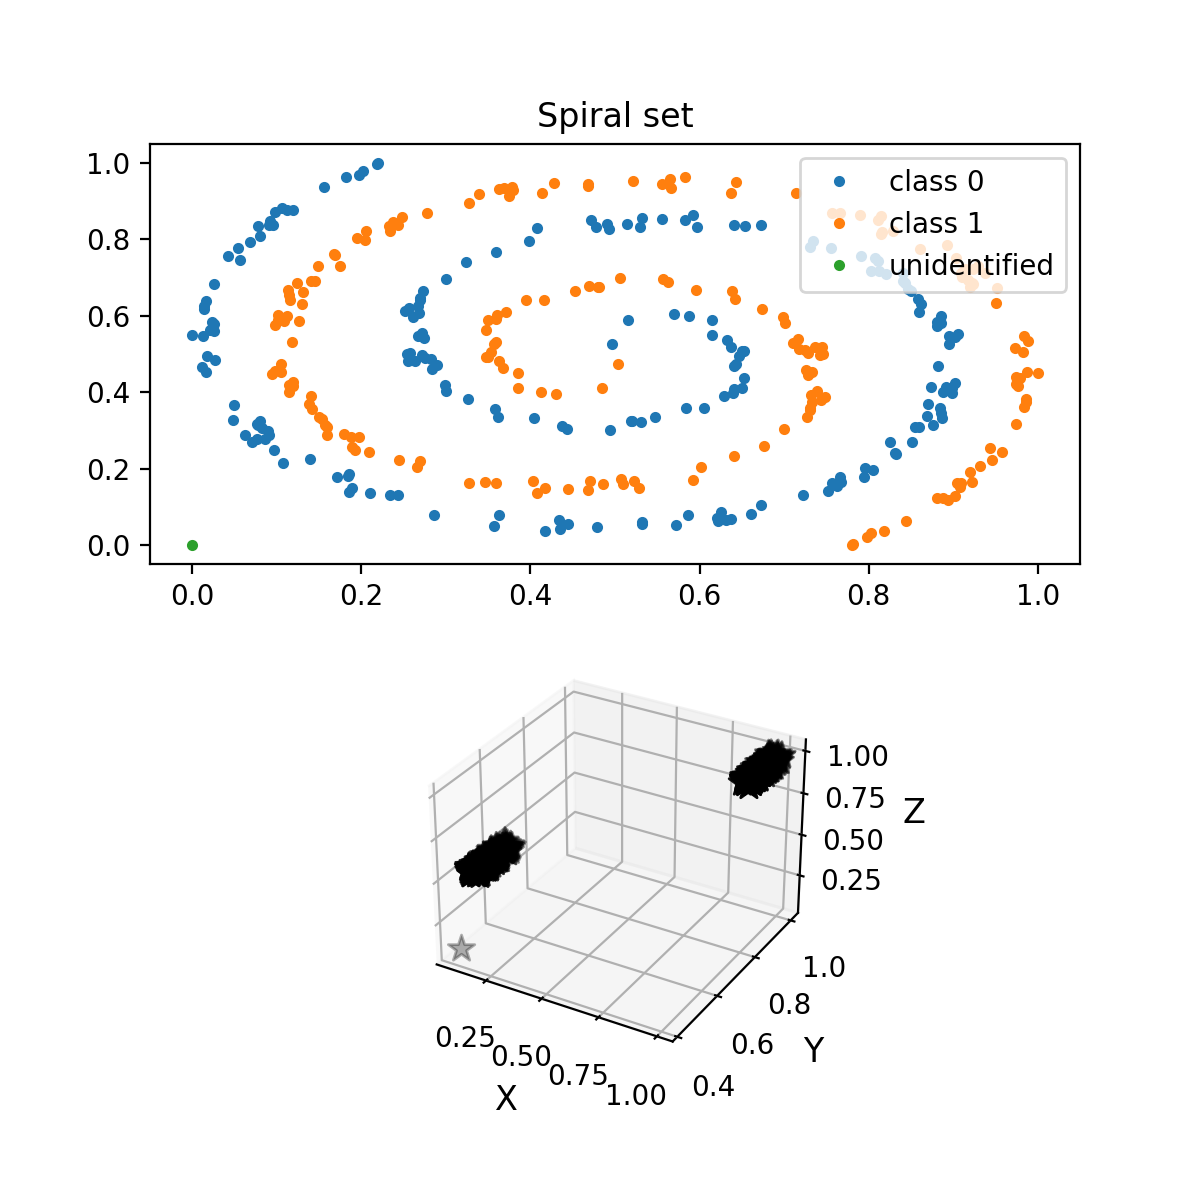

In [9]:
fig3 = plt.figure(figsize=(6,6))
ax = fig3.add_subplot(211)
plt.title('Spiral set')
plt.plot(Xtest.data_normalized[ytest==0,0], Xtest.data_normalized[ytest==0,1], '.', label='class 0')
plt.plot(Xtest.data_normalized[ytest==1,0], Xtest.data_normalized[ytest==1,1], '.', label='class 1')
plt.plot(Xtest.data_normalized[ytest==2,0], Xtest.data_normalized[ytest==2,1], '.', label='unidentified')
plt.legend()
plt.show()

ax2 = fig3.add_subplot(212, projection='3d')

ax2.set_xlabel("X",fontsize=12)
ax2.set_ylabel("Y",fontsize=12)
ax2.set_zlabel("Z",fontsize=12)
ax2.grid(True,linestyle='-',color='0.75')
# scatter with colormap mapping
ax2.scatter(Ytest.data_normalized[...,0],Ytest.data_normalized[...,1],Ytest.data_normalized[...,2],s=100,c='k',marker='*')
plt.show()
#fig.savefig('data_raw.png', bbox_inches='tight')

 ### Test the network

In [10]:
ylab = []
ypred = []

for i in range(npoints*2+1):
    I = Xtest.data_normalized[i,...]
    Y = Ytest.data_normalized[i,...]
    
    #get the correct class of I from fuzzyARTb
    _, Jb = network.fuzzyARTb.predict(Y.ravel(),learn=False)
    ylab.append(Jb)
    print("{} ---> Y:{}\t class {}\n".format(I.ravel(),Y.ravel(),Jb))
    #predict class of I
    Z, k = network.predict(I.ravel())
    if k == None:
        ypred.append(None)
    else:
        ypred.append(k)
    print("{} ---> predicted class {}\n".format(I.ravel(),k))
    print("Zprota:\n{}\nZprotb:\n{}\nJb:\n{}\n".format(Z[0],Z[1],k))

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 8 33  7 14 39  0 26 21  5 37 32 22 28 25 10 30 23 36 18  6 15 35 29 24
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[12  4  1 38  6 41  2 15 13 23 25 28 20 18 19 31 16 21 26 32 24 30 27 17
  5  3 34  7 39 36 35 14 42 33 37  9  0  8 11 10 43 40 22 29]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[34 42 11  3 27  9 40 16 17 31 13 20 43 29 24 35  2 15 18 19 10 36 30 25
  4 12 28  6 22 38  5 41 37 23 21  1 26 32 14  0 39  7 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[29  9 43 40 10 11 22 35 36  3 42 34  5 17 37 30 24 14  0 27 39 31 16 18
 26 20 13 25  7 33  8 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:T signal ranking:
[0 1]



[0.11243234 0.876167  ] ---> Y:[0.17786428 0.43760043 0.5805226 ]	 class 0

[0.11243234 0.876167  ] ---> predicted class 0

Zprota:
[[9.27374054e-02 8.62883729e-01]
 [7.80247037e-01 2.23634124e-05]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.84976363 0.6643352 ] ---> Y:[0.17185648 0.5278521  0.56594557]	 class 0

[0.84976363 0.6643352 ] ---> predicted class 0

Zprota:
[[0.83582262 0.56882287]
 [0.10698495 0.30524712]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.6309138  0.06561428] ---> Y:[0.1652564  0.43599358 0.5693572 ]	 class 0

[0.6309138  0.06561428] ---> predicted class 0

Zprota:
[[0.58744211 0.0512768 ]
 [0.22800067 0.83632108]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.23401195 0.12986773] ---> Y:[0.17981046 0.4333155  0.5557106 ]	 class 0

[0.23401195 0.12986773] ---> predicted class 0

Zprota:
[[0.13198805 0.11379962]
 [0.74230706 0

INFO:root:T signal ranking:
[ 2 16 19 31 13  4 12 27  3 34 17 20 41  1 38 24 15  6 35 42 18  9 36 11
 30 23 25 28 43 10 40 29  5 22 37 21 26 32 14  0 39  7 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[20 13 15 18 24  4  2 17 25 12  6  3 30 28 38 36 35 19 34  1 31 23  5 41
 21 42  9 26 32 16 37 14 11 27 10 43  7 39  0 22 40 29 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[12  1  6 38  4 41 15  2 23 13 28 25 20 18 19 31 21 16 26 32 24 30  5 17
 27  3  7 34 39 14 36 35 33 42  8 37  0  9 11 10 43 40 22 29]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 2 31 16 19 13  4 12 27  3 34 17 20 41 38  1 24 15  6 35 18 42  9 36 30
 11 23 25 28 43 10 40  5 29 22 37 21 26 32 14  0 39  7 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 0 14 33 37 22  5 39  8 10 30 26 25 36  7 18 21 29 35 15 24 43 20 32 17
 28  9 40  6 38 12 13 41 23  1  4 11  3  2 42 31 34 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:

[0.8870187  0.33158135] ---> Y:[0.16855644 0.46786287 0.5630767 ]	 class 0

[0.8870187  0.33158135] ---> predicted class 0

Zprota:
[[0.85847645 0.31558232]
 [0.09593387 0.46527884]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.64979184 0.5065874 ] ---> Y:[0.14731765 0.4785753  0.5478018 ]	 class 0

[0.64979184 0.5065874 ] ---> predicted class 0

Zprota:
[[0.62525098 0.43957551]
 [0.33973    0.46517679]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.8403472 0.6908567] ---> Y:[0.13936368 0.46438137 0.5599752 ]	 class 0

[0.8403472 0.6908567] ---> predicted class 0

Zprota:
[[0.83582262 0.56882287]
 [0.10698495 0.30524712]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.8692081  0.33765745] ---> Y:[0.1333559  0.43304768 0.57618046]	 class 0

[0.8692081  0.33765745] ---> predicted class 0

Zprota:
[[0.85847645 0.31558232]
 [0.09593387 0.46527884]]
Zprotb:


INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 8  7 39 32 33 14 26 21  5  0 23 28 25 37 30 36 10 18 22  6 15 35 24  1
 38 29 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[20 13 15 18 24 17  3  2  4 30 25 12  6 36 35 34 19 28 31 38  5 42  1 23
  9 41 16 21 37 11 26 32 10 27 43 14 22 40  0  7 29 39 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 2 19 16 31  4 13 12 27 20  3 17 41 34  1 38 24 15  6 35 18 42  9 36 30
 23 11 25 28 43 10 40  5 29 37 21 22 26 32 14  0 39  7 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[21 32 28 26  7 25 23 18  6 15  8 39  5  1 30 33 24 38 14 20 17 12 36 35
 13 41  0  4 37  3  9  2 10 43 42 11 22 34 40 31 19 29 16 27]



[0.5870955 0.6000145] ---> predicted class 1

Zprota:
[[0.5880294  0.57769041]
 [0.30095042 0.33506895]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.19700357 0.96822786] ---> Y:[0.16339482 0.5214247  0.5861053 ]	 class 0

[0.19700357 0.96822786] ---> predicted class 0

Zprota:
[[9.27374054e-02 8.62883729e-01]
 [7.80247037e-01 2.23634124e-05]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.6412543 0.4691798] ---> Y:[0.16314098 0.5615961  0.5784291 ]	 class 0

[0.6412543 0.4691798] ---> predicted class 0

Zprota:
[[0.62525098 0.43957551]
 [0.33973    0.46517679]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.8858855  0.34588328] ---> Y:[0.15916398 0.4949116  0.58912927]	 class 0

[0.8858855  0.34588328] ---> predicted class 0

Zprota:
[[0.85847645 0.31558232]
 [0.09593387 0.46527884]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[33 14  0 39  8 26  5 37  7 22 21 25 10 30 36 18 32 28 15 35 29 24  6 38
 43 23 20  1 17 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[31 34 16 27  3 13  2 19  9 42 17  4 20 11 12 43 24 38 15 35  6  1 41 40
 29 18 10 36 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 0 22 37 10 14 36  5 33 30 29 35 24 39 43  8 17 18  9 26 20 40 25  7 15
 11 13 21  3 42  2 32  4 34 28 31 12 19 38  6 41 23 16  1 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[35 17 24 30  9 36 10 43  3 11  5 29 40 18 20 22 13 25 37 34 42 26 15 31
 14 21  2  0 16  7 19 39 32 27  4 28 12  6 33 38  8 41 23  1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[17 24  3 35  9 13 20 18 34 11 42 36 30 31 15 25 10 43  2 40 29 16  5 19
 22 27 37 21  4 26 28 12  6 38 14 32  0 41 23  1  7 39 33  8]

INFO:

[0.47797105 0.8324735 ] ---> predicted class 0

Zprota:
[[0.40796309 0.8167682 ]
 [0.48820245 0.14756715]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.05586039 0.7470536 ] ---> Y:[0.13758673 0.4306374  0.5568737 ]	 class 0

[0.05586039 0.7470536 ] ---> predicted class 0

Zprota:
[[0.05305815 0.73389844]
 [0.90750583 0.15040853]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.8053167  0.19623153] ---> Y:[0.1607717  0.47080877 0.58579516]	 class 0

[0.8053167  0.19623153] ---> predicted class 0

Zprota:
[[0.81292644 0.22326064]
 [0.14489955 0.7257598 ]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.01580283 0.45279545] ---> Y:[0.15781012 0.5203535  0.5800574 ]	 class 0

[0.01580283 0.45279545] ---> predicted class 0

Zprota:
[[8.66696798e-07 4.49919131e-01]
 [9.62604366e-01 2.93648456e-01]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938

INFO:root:T signal ranking:
[26  5  7 39 25 21 14 30 33  8 36 18 32 28 15  0 35 24  6 37 38 10 23 20
  1 17 43 12 22  9 40 13 29 41  4 11  3  2 42 34 31 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[12  4  2 41  1 38  6 13 15 19 20 18 31 16 23 25 28 24 30 27 17  3 34 21
  5 26 36 32 35 42 14 37  7  9 39 11 10 43  0 33 40 22  8 29]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[34 42 11  3 27  9 40 16 17 31 13 20 43 29 24 35  2 15 18 19 10 36 30  4
 25 12 28  6 38 22  5 41 23  1 37 21 26 32 14 39  0  7 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[17 24  3 35  9 13 11 34 18 20 36 30 43 10 42 31 25 40 29 15  2  5 22 16
 19 37 21 27 26  4 14 28 12  6  0 32 38  7 39 41 23  1 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 4  2 12 41 19 13  1 38  6 15 20 16 31 18 23 25 28 24 27 30 17  3 34 36
 35 21  5 26 32 42 14 37  9  7 39 11 10 43  0 22 40 33 29  8]

INFO:root:T signal ranking:
[0 1]

INFO:

[0.32356057 0.7413538 ] ---> Y:[0.15137924 0.5        0.55803674]	 class 0

[0.32356057 0.7413538 ] ---> predicted class 0

Zprota:
[[0.31992367 0.74769491]
 [0.60530574 0.20968663]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.8860857 0.5799127] ---> Y:[0.14587916 0.4946438  0.56594557]	 class 0

[0.8860857 0.5799127] ---> predicted class 0

Zprota:
[[0.83582262 0.56882287]
 [0.10698495 0.30524712]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.6370029  0.06910016] ---> Y:[0.16288713 0.58061063 0.5620687 ]	 class 0

[0.6370029  0.06910016] ---> predicted class 0

Zprota:
[[0.58744211 0.0512768 ]
 [0.22800067 0.83632108]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.49389988 0.29987085] ---> Y:[0.14139448 0.5155329  0.58207333]	 class 0

[0.49389988 0.29987085] ---> predicted class 0

Zprota:
[[0.46521082 0.30522389]
 [0.43735759 0.64985746]]
Zprotb:


INFO:root:T signal ranking:
[ 5 36 30 10 37 14 35 24 22  0 43 18 29 26 39 17 25  9 20  7 40 33 15  8
 21 13 11  3 32  4  2 28 12 42 34  6 38 31 19 41 23  1 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 5 14 30 26 36 39 25  7 18 37  0 33 10  8 21 35 15 24 22 43 20 29 17 32
  9 28 40  6 13 12 38  4 41 11 23  1  3  2 42 34 31 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[10 29 22 43  9 37 40 35 36 14 11  0  5 17  3 30 24 39 33 34 42 31 18  8
 26 20 13 25  7 16 27 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 5 36 30 37 10 35 14 24 22  0 18 43 26 17 25  9 29 39 20  7 40 15 33 21
 13  8 11  3 32  4  2 28 12 42  6 34 38 31 19 41 23  1 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 8  7 32 39 33 26 14 21  5 23 28 25  0 30 37 36 10 18  6 15 22 35 24  1
 38 43 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:

[0.26394594 0.481877  ] ---> predicted class 0

Zprota:
[[0.25026251 0.47778843]
 [0.71404544 0.29755481]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.26654798 0.6253997 ] ---> Y:[0.15011    0.44724157 0.5830038 ]	 class 0

[0.26654798 0.6253997 ] ---> predicted class 0

Zprota:
[[0.25026251 0.47778843]
 [0.71404544 0.29755481]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.13975264 0.22511934] ---> Y:[0.16356406 0.57311195 0.59013724]	 class 0

[0.13975264 0.22511934] ---> predicted class 1

Zprota:
[[0.12003573 0.23200671]
 [0.77277388 0.60014688]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.28210744 0.48662052] ---> Y:[0.15764087 0.5401714  0.5913778 ]	 class 0

[0.28210744 0.48662052] ---> predicted class 0

Zprota:
[[0.25026251 0.47778843]
 [0.71404544 0.29755481]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989

INFO:root:T signal ranking:
[11  9 40 42 34  3 43 29 17 35 24 27 10 36 30 16 31 18 13 22 20 25  5 37
 15 26  2 21 19 14  0 39  7  4 28 32 12 38  6 33 41 23  1  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 5 14 26 30 25 39 36  7 18  0 33 37  8 21 10 15 35 24 22 43 32 20 29 17
 28  9  6 40 38 12 13 23  1 41  4 11  3  2 42 34 31 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 2 19  4 16 31 13 12 20 41  1 27 38 24 17  3 15  6 34 18 35 36 30 23 42
 25 28  9 11 10  5 43 37 21 26 40 22 32 29 14  0 39  7 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 4  2 12 41 19 13  1 38  6 15 20 16 31 18 23 25 28 24 27 30 17  3 34 36
 35  5 21 26 32 42 37 14  9  7 39 11 10 43  0 40 22 33 29  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 0 37 22 14 10  5 33 36 30 39 29 35 24  8 43 18 26 25  7 17 20  9 40 15
 21 13 11  3 32 28  2  4 12 42  6 38 34 31 19 41 23  1 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:

[0.4333787  0.06396377] ---> Y:[0.18302588 0.5187467  0.5889742 ]	 class 0

[0.4333787  0.06396377] ---> predicted class 0

Zprota:
[[0.31463775 0.03278368]
 [0.43015702 0.92357121]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.2696174  0.64636785] ---> Y:[0.14283296 0.54204607 0.55974257]	 class 0

[0.2696174  0.64636785] ---> predicted class 0

Zprota:
[[0.25026251 0.47778843]
 [0.71404544 0.29755481]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.88795507 0.39931157] ---> Y:[0.16728719 0.47670057 0.58881915]	 class 0

[0.88795507 0.39931157] ---> predicted class 0

Zprota:
[[0.85847645 0.31558232]
 [0.09593387 0.46527884]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.90173614 0.5432355 ] ---> Y:[0.1831105 0.5690948 0.5932388]	 class 0

[0.90173614 0.5432355 ] ---> predicted class 1

Zprota:
[[0.84482393 0.47822095]
 [0.00812244 0.36935455]]
Zprotb:

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 5 36 30 37 10 14 35 24 22  0 18 43 26 39 25 29 17 20  9  7 15 40 33  8
 21 13 11  3 32  4  2 28 12  6 42 38 34 31 19 41 23  1 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 2 19  4 16 31 13 12 41 20  1 27 38 24 17  3 15  6 34 18 35 36 30 23 42
 25 28  9 11 10  5 43 37 21 40 26 22 32 29 14  0 39  7 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[20 13 24 17  3 15 18  2 35 34 31  4 36 19 30 25 12  6 42  9 16 28 38 11
  5 10 27  1 23 41 43 37 21 26 22 32 40 29 14  0  7 39 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[33  8 14 39  7  0 26 37 21  5 22 32 25 28 10 30 36 18 23  6 15 35 29 24
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[11 42 34  9  3 40 17 27 43 29 24 35 16 31 13 20 18 10 36 30 15 25  2 22
 19  5 37 21  4 26 28 12  6 38 14 32 41  0 23  1 39  7 33  8]

INFO:

[0.8619096 0.6314647] ---> predicted class 0

Zprota:
[[0.83582262 0.56882287]
 [0.10698495 0.30524712]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.27132738 0.49755245] ---> Y:[0.14647149 0.45929298 0.5495077 ]	 class 0

[0.27132738 0.49755245] ---> predicted class 0

Zprota:
[[0.25026251 0.47778843]
 [0.71404544 0.29755481]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.8984983  0.39798343] ---> Y:[0.13284819 0.5391001  0.5563309 ]	 class 0

[0.8984983  0.39798343] ---> predicted class 0

Zprota:
[[0.85847645 0.31558232]
 [0.09593387 0.46527884]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.6498754 0.4103412] ---> Y:[0.16694872 0.5254419  0.5543925 ]	 class 0

[0.6498754 0.4103412] ---> predicted class 0

Zprota:
[[0.62525098 0.43957551]
 [0.33973    0.46517679]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[35 17 24 36 30 10  9 43  5 29 40 22  3 11 37 18 20 13 25 26 14 34 42  0
 15 31 21  7  2 39 16 19 33 32  4 27 28  8 12  6 38 41 23  1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[34  3 27 31 16 13 42  9  2 11 17 19 20  4 43 40 24 12 15 35 29 38  6 18
 41  1 10 36 30 25 28 23 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[34  3 42 27 11  9 16 31 13 17 40 20 43  2 29 24 35 15 19 18  4 10 36 12
 30  6 25 38 28 41 22  1 23  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 2  4 19 12 13 41 31 16 20  1 38  6 15 18 24 27 17  3 34 30 23 25 28 36
 35  5 42  9 21 37 26 11 32 10 43 14 22 40 39  0  7 29 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[18 25 15 24 20 30 21 17  5 13 26 28 36 35  6 12  4 14 32  3 38  7  2  1
 23  9 41 37 39 10  0 34 42 11 33 43 31 19  8 22 40 29 16 27]

INFO:

[0.08005978 0.32552302] ---> predicted class 0

Zprota:
[[0.01351803 0.25104244]
 [0.8994488  0.56981795]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.36157194 0.33606774] ---> Y:[0.13360974 0.56266737 0.5653253 ]	 class 0

[0.36157194 0.33606774] ---> predicted class 0

Zprota:
[[0.34912097 0.33505321]
 [0.5879882  0.63516962]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.76259446 0.1550174 ] ---> Y:[0.17354883 0.43251204 0.56121576]	 class 0

[0.76259446 0.1550174 ] ---> predicted class 0

Zprota:
[[0.58744211 0.0512768 ]
 [0.22800067 0.83632108]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.6721521 0.1043846] ---> Y:[0.16373329 0.4799143  0.5684267 ]	 class 0

[0.6721521 0.1043846] ---> predicted class 0

Zprota:
[[0.58744211 0.0512768 ]
 [0.22800067 0.83632108]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[28 23  6  1 21 32 15 38 25 20 12 26  7 18 13 41  4 39  8  2 24  5 30 33
 17  3 14 31 19 36 35 34 42 16  0 37  9 27 11 10 43 40 22 29]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 5 14 30 36 26 39 25 18 37  7  0 10 33 35 24  8 15 21 22 43 20 29 17  9
 32 40 28 13  6 12 38  4 11 41  3 23  1  2 42 34 31 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[29 10 43  9 22 40 11 35 37 36  3  5 17 14 30 24  0 34 42 39 33 31 18 26
 20 13 27 25  8 16  7 15 21  2 19 32 28  4 12 38  6 41 23  1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[26 21  7 25 32 39 28  5 30  8 18 14 33  6 15 23 24 36 35  1 38 20  0 17
 37 12 13 10 41 43  9  4 22  3 40 29  2 11 42 34 31 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 8  7 33 39 14 32 26 21  5  0 37 28 25 23 30 10 36 22 18  6 15 35 24 29
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:

[0.5137063 0.8406394] ---> predicted class 0

Zprota:
[[0.40796309 0.8167682 ]
 [0.48820245 0.14756715]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.67248493 0.83842415] ---> Y:[0.1384329  0.52062136 0.5916105 ]	 class 0

[0.67248493 0.83842415] ---> predicted class 0

Zprota:
[[0.60228583 0.82006374]
 [0.31272006 0.13952635]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.26778442 0.6081815 ] ---> Y:[0.16051784 0.5021425  0.5577266 ]	 class 0

[0.26778442 0.6081815 ] ---> predicted class 0

Zprota:
[[0.25026251 0.47778843]
 [0.71404544 0.29755481]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.18498829 0.18667163] ---> Y:[0.13301744 0.45527583 0.54974025]	 class 0

[0.18498829 0.18667163] ---> predicted class 0

Zprota:
[[0.13198805 0.11379962]
 [0.74230706 0.81176786]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
J

INFO:root:T signal ranking:
[20 15 13 18 24 25  4  2 17 12 30  6  3 28 38 36 35  5  1 23 34 41 19 31
 21 26 32 42  9 37 16 14 11 10 27  7 43 39  0 22 40 29 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 0 33 14 39 37  5  8 22 26  7 10 25 30 36 21 18 15 29 35 24 32 43 28 20
  6 38 17  9 40 12 23  1 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[22 10 29 37  0 43  9 35 14 36 40  5 17 30 33 24 11  3 39  8 42 34 18 26
 20 31 13 25  7 15 16 21  2 27 19 32 28  4 12 38  6 41 23  1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[12  4  2 41  1 38  6 15 13 19 20 18 31 16 23 25 28 24 30 27 17  3 34 21
  5 26 32 36 35 42 14  7 37 39  9 11 10  0 43 33 40 22  8 29]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 0 14 37 22 33  5 10 30 39 36  8 18 29 26 35 24 25  7 43 20 15 17 21  9
 40 13 32 11 28 12  3  6 38  4  2 41 42 23  1 31 34 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:

[0.63777757 0.5195614 ] ---> Y:[0.1799797  0.49866098 0.57346666]	 class 0

[0.63777757 0.5195614 ] ---> predicted class 0

Zprota:
[[0.62525098 0.43957551]
 [0.33973    0.46517679]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.02617359 0.6824593 ] ---> Y:[0.15442546 0.42662024 0.584477  ]	 class 0

[0.02617359 0.6824593 ] ---> predicted class 0

Zprota:
[[8.66696798e-07 4.49919131e-01]
 [9.62604366e-01 2.93648456e-01]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.07038815 0.26889926] ---> Y:[0.15933321 0.44054636 0.5570287 ]	 class 0

[0.07038815 0.26889926] ---> predicted class 0

Zprota:
[[0.01351803 0.25104244]
 [0.8994488  0.56981795]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.8811095  0.58390224] ---> Y:[0.15307158 0.5198179  0.57276887]	 class 0

[0.8811095  0.58390224] ---> predicted class 0

Zprota:
[[0.83582262 0.56882287]
 [0.10698495 0

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[36 35 10 30  5 24 43 37 17 22  9 29 14 40 18  0 26 20 11 25  3 39 13  7
 15 21 33 34 42  8  2 31 32  4 19 28 12  6 16 38 27 41 23  1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[35 24 36 30 17 10  9 43  5 29 22 40 37  3 11 18 20 25 13 26 14  0 34 15
 42 21  7 31 39  2 19 16 33 32  4  8 28 12 27  6 38 41 23  1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[17 24  3 20 13 35 18 34 15  9 42  2 31 36 30 11 25 10 19 16  4 43  5 12
 28 27  6 40 29 22 37 21 38 26 41 23  1 32 14  0  7 39 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[11 40  9 43 29 42 34 35  3 10 17 36 24 30 27 22  5 16 37 31 18 13 20 25
 26 14 15  0 21 39  2  7 19 33 32  4 28  8 12 38  6 41 23  1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[31 34 16  3 27 13  2 19  9 42 17  4 20 11 12 24 43 15 38 35  6  1 41 40
 29 18 10 36 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:

[0.5974923 0.8326449] ---> predicted class 0

Zprota:
[[0.60228583 0.82006374]
 [0.31272006 0.13952635]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.30069888 0.40253723] ---> Y:[0.17981046 0.4563471  0.5673412 ]	 class 0

[0.30069888 0.40253723] ---> predicted class 0

Zprota:
[[0.29411681 0.41748115]
 [0.6861861  0.54404956]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.35776973 0.35651955] ---> Y:[0.16001016 0.5573112  0.5589672 ]	 class 0

[0.35776973 0.35651955] ---> predicted class 0

Zprota:
[[0.34912097 0.33505321]
 [0.5879882  0.63516962]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.58440816 0.35816878] ---> Y:[0.16534102 0.53213716 0.5933938 ]	 class 0

[0.58440816 0.35816878] ---> predicted class 0

Zprota:
[[0.46521082 0.30522389]
 [0.43735759 0.64985746]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
J

INFO:root:T signal ranking:
[ 0 22 37 14 10  5 33 36 30 39 29 35 24  8 43 18 26 17 25  7 20  9 40 15
 21 13 11  3 32  2  4 28 12 42  6 38 34 31 19 41 23  1 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[33  8 14 39  7  0 26 21 37  5 32 22 25 28 10 30 36 18 23  6 15 35 29 24
  1 38 43 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 2 31 16 19 13  4 27  3 34 12 17 20 41 38  1 24 15  6 35 42  9 18 11 36
 30 43 23 25 28 10 40 29  5 22 37 21 26 32 14  0 39  7 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 2 31 16 19 13  4 27 12  3 34 17 20 41 38  1 24 15  6 35 42  9 18 11 36
 30 43 23 25 28 10 40 29  5 22 37 21 26 32 14  0 39  7 33  8]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 5 14 30 26 39 36 25 37  7 18  0 10 33  8 35 24 15 21 22 43 29 20 17 32
  9 28 40  6 13 12 38  4 11 41 23  1  3  2 42 34 31 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:

[0.02654043 0.48476145] ---> Y:[0.16237943 0.5171398  0.5767232 ]	 class 0

[0.02654043 0.48476145] ---> predicted class 0

Zprota:
[[8.66696798e-07 4.49919131e-01]
 [9.62604366e-01 2.93648456e-01]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.0905589  0.83699435] ---> Y:[0.1607717  0.44268882 0.5919981 ]	 class 0

[0.0905589  0.83699435] ---> predicted class 0

Zprota:
[[0.05305815 0.73389844]
 [0.90750583 0.15040853]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.85968393 0.3082446 ] ---> Y:[0.14562531 0.43760043 0.5691246 ]	 class 0

[0.85968393 0.3082446 ] ---> predicted class 0

Zprota:
[[0.85847645 0.31558232]
 [0.09593387 0.46527884]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.87590337 0.3129022 ] ---> Y:[0.14774072 0.4252812  0.55516785]	 class 0

[0.87590337 0.3129022 ] ---> predicted class 0

Zprota:
[[0.85847645 0.31558232]
 [0.09593387 0

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[12  4  2 41  1 38  6 15 13 19 20 18 31 23 25 28 16 24 30 27 21 17  3 34
 26 32  5 36 35 14  7 42 39 37  9 33  0 11 10 43  8 40 22 29]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[28 23 32 21  6 15 25  7  1 26 18 38 20  8 12 39 13 24  5 41 30 33  4 17
 14  2  3 36 35 42 34  0 31 19 37  9 11 10 43 16 27 40 22 29]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[ 8  7 32 39 33 26 14 21  5 23 28 25  0 30 37 36 10 18  6 15 35 22 24  1
 38 43 29 20 17 12 40  9 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[11 42 34  9  3 40 17 27 43 29 24 35 16 31 13 20 18 10 36 30 15 25  2 22
 19  5 37 21  4 26 28 12  6 38 14 32 41  0 23 39  1  7 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[16 27 31 34  2  3 19 42 13  4 11  9 12 17 41 20 40 43 38  1 24 29 15 35
  6 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:

[0.07819549 0.31353393] ---> predicted class 0

Zprota:
[[0.01351803 0.25104244]
 [0.8994488  0.56981795]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.8598638  0.60956603] ---> Y:[0.15044847 0.5187467  0.56013024]	 class 0

[0.8598638  0.60956603] ---> predicted class 0

Zprota:
[[0.83582262 0.56882287]
 [0.10698495 0.30524712]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.59253645 0.86444515] ---> Y:[0.18116432 0.5184789  0.5573389 ]	 class 0

[0.59253645 0.86444515] ---> predicted class 0

Zprota:
[[0.60228583 0.82006374]
 [0.31272006 0.13952635]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]
Jb:
0

[0.22026469 1.        ] ---> Y:[0.16415636 0.57605785 0.55640846]	 class 0

[0.22026469 1.        ] ---> predicted class 0

Zprota:
[[9.27374054e-02 8.62883729e-01]
 [7.80247037e-01 2.23634124e-05]]
Zprotb:
[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[27 34 16 31 42  3 11 13  2  9 19 40 17  4 20 12 43 24 38 29 15 35 41  6
  1 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[30  5 36 24 18 35 25 26 14 37 20 17 15 10  7 21  0 39 43  9 13 22 40 29
 33 32  3 11  8 28 12  4  2  6 38 42 41 34 23  1 31 19 16 27]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[14  0 33 37  5 39  8 22 10 26 30  7 25 36 18 21 15 29 35 24 43 32 20 28
 17  6  9 38 40 12 13 41 23  1  4 11  3  2 42 31 34 19 16 27]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[ 9  3 34 11 17 42 43 24 40 35 29 31 13 27 20 16 10 18 36 30 25 15  2 22
  5 19 37 21 26  4 28 12  6 38 14 32  0 41  7 39 23  1 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[16 19 31  2  4 27 13  3 34 41 12 17 20  1 42  9 38 24 15 35  6 11 43 18
 40 36 30 10 29 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:

[0.4129045 0.3999855] ---> predicted class 1

Zprota:
[[0.41909999 0.39126064]
 [0.48411557 0.56149262]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.8029964 0.0317722] ---> Y:[0.9608225 0.9421532 0.9677444]	 class 1

[0.8029964 0.0317722] ---> predicted class 1

Zprota:
[[7.80485746e-01 3.71612468e-05]
 [1.26942201e-01 9.27417514e-01]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.3587457 0.5308202] ---> Y:[0.9800305 0.8730583 0.9567341]	 class 1

[0.3587457 0.5308202] ---> predicted class 1

Zprota:
[[0.3396999  0.46520431]
 [0.6252861  0.43957466]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.11411455 0.6541167 ] ---> Y:[0.9990692  1.         0.98992014]	 class 1

[0.11411455 0.6541167 ] ---> predicted class 1

Zprota:
[[0.09656828 0.54902596]
 [0.81914672 0.24414524]]
Zprotb:


INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[ 4 19  2 41 12  1 13 38  6 15 20 16 31 18 23 25 28 24 27 30 17  3 34 36
 35 21  5 26 32 42 37 14  9 39  7 11 10 43  0 40 22 33 29  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[15 25 18  6 28 20 21 38 12 13  1 23 26 32 24  4 41 30  5 17  7  2  3 14
 39 36 35 34 42 33 31 19  9  0 37  8 11 10 16 43 22 27 40 29]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[25 18 21 15 26  5 30 24 28  7  6 32 20 14 17 39 38 36 35 12  1 23 13 33
 41  4  8  0 37  3  9 10  2 43 11 22 42 34 40 31 29 19 16 27]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[ 9 11  3 43 34 40 17 29 42 35 24 10 36 30 27 31 13 18 16 20 22 25  5 15
 37  2 26 21 19 14  0  4  7 39 28 12 32  6 38 41 33 23  1  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[ 1 12  6 38 41  4 23  2 28 15 19 13 25 20 21 18 26 32 31 16  7 39 24 30
  5 27 17  3 34 14 33 36 35  8 42  0 37  9 43 11 10 40 22 29]

INFO:

[0.1946833  0.80376846] ---> predicted class 1

Zprota:
[[0.17770262 0.75709143]
 [0.81294604 0.22231251]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.9841972  0.54720455] ---> Y:[0.988069   0.91965723 0.981236  ]	 class 1

[0.9841972  0.54720455] ---> predicted class 1

Zprota:
[[0.84482393 0.47822095]
 [0.00812244 0.36935455]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.59583217 0.6678305 ] ---> Y:[0.9651379  0.92313874 0.9863534 ]	 class 1

[0.59583217 0.6678305 ] ---> predicted class 1

Zprota:
[[0.5880294  0.57769041]
 [0.30095042 0.33506895]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.4697871  0.67888796] ---> Y:[0.9767304 0.8754686 0.9612313]	 class 1

[0.4697871  0.67888796] ---> predicted class 1

Zprota:
[[0.43735919 0.64981233]
 [0.45863363 0.29865849]]
Zprotb:
[[9

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[ 9  3 34 11 42 17 43 40 24 29 35 27 31 13 16 20 18 10 36 30 25 15  2 22
 19  5 37 21  4 26 28 12  6 38 14 32 41  0 23  1 39  7 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[30  5 25 18 26 36 14 24 15 35 21  7 39 20 37 17  0 32 10 33 28 13  8  6
 43  9 12 22 38  4 40 29  3 41 23  1 11  2 42 34 31 19 16 27]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[13 20 15  4  2 12 18  6 38  1 19 24 41 31 25 17  3 28 30 23 34 16 36 35
  5 27 21 42 26 32  9 37 14 11 10 43  7 39  0 22 40 29 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[13 20  2 31  3 17 24 34 19  4 15 16 12 35 18  6 27 38 42  9  1 36 41 30
 25 28 11 23 10 43  5 37 40 21 22 29 26 32 14  0  7 39 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[ 1  6 38 12 41  4 23 28  2 15 13 21 25 32 19 20 18 26 31 16  7 39 24  5
 30 27 17  3 14 34 33  8 36 35 42  0 37  9 11 43 10 40 22 29]

INFO:

[0.55676115 0.6976308 ] ---> predicted class 1

Zprota:
[[0.43735919 0.64981233]
 [0.45863363 0.29865849]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.52791995 0.14914401] ---> Y:[0.966661   0.9815212  0.96735674]	 class 1

[0.52791995 0.14914401] ---> predicted class 1

Zprota:
[[0.28107123 0.13946515]
 [0.46960373 0.81004158]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.37157425 0.60937387] ---> Y:[0.9640379 0.8607391 0.9715438]	 class 1

[0.37157425 0.60937387] ---> predicted class 1

Zprota:
[[0.3396999  0.46520431]
 [0.6252861  0.43957466]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.73605406 0.518123  ] ---> Y:[0.9794381  0.86288166 0.9563464 ]	 class 1

[0.73605406 0.518123  ] ---> predicted class 1

Zprota:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zprotb:
[[9

INFO:root:T signal ranking:
[27 34 42 16 31  3 11 13  2  9 40 19 17 20  4 43 12 24 29 15 35 38  6 41
 18  1 36 10 30 25 23 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[13  2 20 31  3 17 34 19 24 16 15  4 35 12 27 18  6 38 42  9 36  1 30 41
 25 11 28 23 10 43  5 40 29 37 21 22 26 32 14  0 39  7 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[ 7  8 39 14 33 26  5 21  0 32 25 37 28 30 36 10 18 23  6 22 15 35 24  1
 38 29 43 20 17 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[ 1 23  6 38 28 12 41 32  4 21 15  2 13 25  7 20 26 18 19 31  8 39 16 24
 30  5 33 17  3 27 14 34 36 35 42  0 37  9 43 11 10 40 22 29]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[43 29  9 10 40 35 36 11 22 17  5  3 30 24 37 34 42 14  0 31 18 13 26 20
 39 25 16  7 27 33 15 21  2  8 19 32  4 28 12 38  6 41 23  1]

INFO:root:T signal ranking:
[1 0]

INFO:

[0.7810199  0.00239561] ---> Y:[0.95447624 0.89287627 0.9863534 ]	 class 1

[0.7810199  0.00239561] ---> predicted class 1

Zprota:
[[7.80485746e-01 3.71612468e-05]
 [1.26942201e-01 9.27417514e-01]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.7309173  0.35848534] ---> Y:[0.97647655 0.90144616 0.98015046]	 class 1

[0.7309173  0.35848534] ---> predicted class 1

Zprota:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.20597428 0.82212496] ---> Y:[0.9518531  0.89019823 0.98891217]	 class 1

[0.20597428 0.82212496] ---> predicted class 1

Zprota:
[[0.23056737 0.83723737]
 [0.62985389 0.06704086]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.814417  0.8622714] ---> Y:[0.9617533 0.8808248 0.9921687]	 class 1

[0.814417  0.8622714] ---> p

INFO:root:T signal ranking:
[37 22  0 10 14 36  5 30 33 29 35 24 39 43  8 17 18  9 26 20 25 40  7 15
 11 13 21  3  2 42 32  4 34 28 12 31 19  6 38 41 23  1 16 27]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[ 4 19  2 41 12 13  1 16 20 38 31 15  6 18 24 27 23 17  3 25 30 28 34 36
 35  5 21 42 26  9 32 37 14 11 10 43 39  7 40 22  0 29 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[16 27 31 34  2 19  3 42 13  4 11  9 12 17 41 20 40 43 38  1 24 29 15 35
  6 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[14 37  0  5 33 22 39 10 30 36  8 26 18 25  7 29 35 24 15 21 43 20 17  9
 40 32 13 28 12  6 38 11  4  3 41  2 23  1 42 34 31 19 16 27]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[13 20 15  4  2 12 18  6 38 24 19  1 31 17  3 41 25 28 30 23 34 16 36 35
  5 27 21 42 26  9 32 37 14 11 10 43  7 39  0 22 40 29 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:

[0.09826392 0.45676452] ---> Y:[0.95718396 0.88859135 0.9757308 ]	 class 1

[0.09826392 0.45676452] ---> predicted class 1

Zprota:
[[0.0958687  0.43123779]
 [0.88094364 0.48216087]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.9821756 0.5057577] ---> Y:[0.9681841  0.93786824 0.97836703]	 class 1

[0.9821756 0.5057577] ---> predicted class 1

Zprota:
[[0.84482393 0.47822095]
 [0.00812244 0.36935455]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.8943653  0.11728577] ---> Y:[0.96556103 0.87145156 0.99806154]	 class 1

[0.8943653  0.11728577] ---> predicted class 1

Zprota:
[[0.87816384 0.1036634 ]
 [0.05305819 0.73389844]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.1261051 0.5870838] ---> Y:[0.96124554 0.94536686 0.9956579 ]	 class 1

[0.1261051 0.5870838] ---> predicted class 1


INFO:root:T signal ranking:
[14  0 37 33  5 22 39 10 30  8 36 26 18 25  7 29 35 24 15 21 43 20 17  9
 32 40 28 13  6 12 38 11  4 41  3 23  1  2 42 31 34 19 16 27]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[30  5 18 25 26 36 14 35 24 15  7 21 37 39 20 10  0 17 33 43 32  8 13  9
 22 28 12  6 40 29  4 38  3 11 41  2 23  1 42 34 31 19 16 27]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[16 31 27 34 19  2  3 13  4 42  9 12 41 11 17 20  1 43 38 24 40 15 35  6
 29 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[32 21  7 23 28 26 25  8 18  6 15 39  5 30 33  1 24 38 14 20 17 36 35 12
 13 41  0  4 37  3  9 10  2 43 42 22 40 11 34 31 29 19 16 27]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[15 13 20 18  6 12  4 38  2 25  1 28 41 23 24 30 17  3 19 31 21  5 34 26
 32 36 35 16 14 42 27  9  7 37 39 11 10  0 43 33 22  8 40 29]

INFO:root:T signal ranking:
[1 0]

INFO:

[0.10150167 0.60201657] ---> Y:[0.9528685  0.9467059  0.97526556]	 class 1

[0.10150167 0.60201657] ---> predicted class 1

Zprota:
[[0.09656828 0.54902596]
 [0.81914672 0.24414524]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.3501246 0.5896588] ---> Y:[0.9987307 0.8427959 0.9799953]	 class 1

[0.3501246 0.5896588] ---> predicted class 1

Zprota:
[[0.3396999  0.46520431]
 [0.6252861  0.43957466]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.9222468  0.16361547] ---> Y:[0.960484   0.970541   0.99255633]	 class 1

[0.9222468  0.16361547] ---> predicted class 1

Zprota:
[[0.87816384 0.1036634 ]
 [0.05305819 0.73389844]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.46750882 0.9404586 ] ---> Y:[0.96463025 0.94777715 0.9901527 ]	 class 1

[0.46750882 0.9404586 ] ---> predicted class 1

INFO:root:T signal ranking:
[37 14  0 22  5 10 30 33 36 39  8 29 35 24 18 26 25  7 43 20 17 15  9 21
 40 13 11 32  3 28 12  2  4  6 38 42 41 23 34  1 31 19 16 27]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[24 17 35 18 30 36 20  3 25 13  9 15  5 10 11 37 43 34 21  2 42 22 26 31
 40 29  4 14 19 28 12  0  6 32 16  7 38 39 27 41 23  1 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[24 35 30 36 17  5 10 18  9 20 37 43 25 22 26  3 13 40 29 11 14 15 21  0
  7 34 42 39  2 31 32  4 19 28 33 12  6  8 16 38 41 27 23  1]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[ 9  3 11 34 17 42 43 40 24 29 35 10 31 27 13 18 36 30 16 20 25 22 15  5
  2 37 19 21 26  4 14 28 12  0  6 32 38  7 39 41 23  1 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[ 9 43 40 29 11 35 10  3 36 17 34 30 24 42 22  5 37 31 27 18 13 20 26 16
 14 25  0 39 15  7 21  2 19 33  8 32  4 28 12 38  6 41 23  1]

INFO:root:T signal ranking:
[1 0]

INFO:

[0.11783037 0.5304112 ] ---> Y:[0.9560839  0.87225497 0.9686749 ]	 class 1

[0.11783037 0.5304112 ] ---> predicted class 1

Zprota:
[[0.0958687  0.43123779]
 [0.88094364 0.48216087]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.48422554 0.41130963] ---> Y:[0.96903026 0.89850026 0.96379006]	 class 1

[0.48422554 0.41130963] ---> predicted class 1

Zprota:
[[0.41909999 0.39126064]
 [0.48411557 0.56149262]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.3858097  0.41123062] ---> Y:[0.9952615  0.95634705 0.99713117]	 class 1

[0.3858097  0.41123062] ---> predicted class 1

Zprota:
[[0.41909999 0.39126064]
 [0.48411557 0.56149262]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.48629367 0.15936054] ---> Y:[0.95921475 0.9957151  0.98247653]	 class 1

[0.48629367 0.15936054] ---> predicted 

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[10 22 29 37 43 35  9 36 14  5  0 40 17 30 24 11  3 39 33 18 42 34 13 26
 20  8 25 31  7 15 21 16  2 19 27 32  4 28 12 38  6 41 23  1]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[13 20  2  4 15 12 24 19 31 18  6  3 17 38 34  1 16 30 41 25 35 36 28 23
 27 42  5  9 21 11 37 10 26 32 43 22 14 40  0 29  7 39 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[27 34 16 42 31  3 11 13  2  9 19 40 17 20  4 12 43 24 29 38 15 35 41  6
  1 18 36 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[16 19 31  2 27  4 13  3 34 41 12 17 20 42  1  9 38 24 11 15 35  6 43 18
 40 36 29 10 30 23 25 28 22  5 37 21 26 32 14 39  0  7 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[30 36 24 35  5 17 18 10 37 20 25 26 14  9 43 22 15  0 13 40 21  7 29  3
 11 39  2 32  4 33 34 42 28 12  8  6 31 19 38 41 23  1 16 27]

INFO:

[0.8447369  0.06255055] ---> predicted class 1

Zprota:
[[7.80485746e-01 3.71612468e-05]
 [1.26942201e-01 9.27417514e-01]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.1592283 0.286563 ] ---> Y:[0.9522762 0.9981253 0.9578972]	 class 1

[0.1592283 0.286563 ] ---> predicted class 1

Zprota:
[[0.12003573 0.23200671]
 [0.77277388 0.60014688]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.73348725 0.45408875] ---> Y:[0.9846844  0.96679157 0.98557806]	 class 1

[0.73348725 0.45408875] ---> predicted class 1

Zprota:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.79765433 0.02185501] ---> Y:[0.9554916  0.87252283 0.9607661 ]	 class 1

[0.79765433 0.02185501] ---> predicted class 1

Zprota:
[[7.80485746e-01 3.71612468e-05]
 [1.26942201e-01 

INFO:root:T signal ranking:
[39  7  8 14 33 26  5 21  0 25 37 32 30 36 28 10 18 22 15  6 23 35 24 38
 29 43  1 20 17 12  9 40 41 13  4 11  3  2 42 31 34 19 16 27]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[13 20 15  4 18  2 12  6 38 24 25  1 28 41 17  3 19 30 31 23 34 36 35 16
  5 21 26 27 32 42  9 37 14 11 10  7 39 43  0 22 40 29 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[ 1 12 41 38  6  4  2 23 15 28 19 13 25 20 18 16 31 21 26 32 24  5 30  7
 27 39 17  3 34 14 36 35 33  8 42  0 37  9 11 43 10 40 22 29]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[14  0 37  5 33 39 22 10  8 30 26 36  7 25 18 29 21 35 15 24 43 20 17 32
  9 28 40  6 38 13 12 41  4 23  1 11  3  2 42 31 34 19 16 27]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[10 22 37  0 14 36  5 29 35 30 24 43 33 39 17  9 40  8 18 26 20 25 11  7
  3 13 15 21 42 34  2 31 32 19  4 28 12 16  6 38 27 41 23  1]

INFO:root:T signal ranking:
[1 0]

INFO:

[0.20427059 0.79873586] ---> Y:[0.9562532  0.938136   0.95549357]	 class 1

[0.20427059 0.79873586] ---> predicted class 1

Zprota:
[[0.17770262 0.75709143]
 [0.81294604 0.22231251]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.710802  0.5277891] ---> Y:[0.97715354 0.9341189  0.98115844]	 class 1

[0.710802  0.5277891] ---> predicted class 1

Zprota:
[[0.70348707 0.29741735]
 [0.25033191 0.45433434]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.9135916  0.72162884] ---> Y:[0.988069  0.8524371 0.9799953]	 class 1

[0.9135916  0.72162884] ---> predicted class 1

Zprota:
[[0.80812487 0.70354609]
 [0.07715298 0.15910375]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.12986436 0.6298482 ] ---> Y:[0.9587071 0.9584896 0.9831744]	 class 1

[0.12986436 0.6298482 ] ---> predicted class 1

Z

INFO:root:T signal ranking:
[32 23 28 21  7  6 25 15 26 18  1  8 38 20 12 39 24 13  5 30 33 41 17  4
 14 36 35  3  2 42  0 34 37 31  9 19 11 10 43 16 40 22 27 29]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[ 3 34  9 42 11 17 31 13 43 27 24 20 16 40 35 29 18 15  2 10 36 30 19 25
 22  4 28 12  5  6 38 37 21 26 41 23  1 32 14  0 39  7 33  8]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[32 23 28 21  7 25  6 26 15 18  8  1 38 20 39 12 24  5 30 33 17 13 14 41
  4 36 35  3  2  0 37 42  9 34 31 19 10 11 43 40 22 16 29 27]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[ 1 12 41 38  4  6  2 15 23 19 28 13 25 20 18 16 31 21 26 32 24  5 30 27
 17  7  3 39 34 14 36 35 33 42  8  0 37  9 11 43 10 40 22 29]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[14 37  0 22 33  5 10 39 30 36  8 18 26 25  7 29 35 24 15 43 21 20 17  9
 40 13 32 28 12  6 11 38  3  4 41  2 23  1 42 34 31 19 16 27]

INFO:root:T signal ranking:
[1 0]

INFO:

[0.58244926 0.9628524 ] ---> Y:[0.9882383  0.99410814 0.9661937 ]	 class 1

[0.58244926 0.9628524 ] ---> predicted class 1

Zprota:
[[0.40215428 0.93628109]
 [0.38286426 0.0327877 ]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.5918157  0.17117484] ---> Y:[0.9714841 0.9646492 0.9636349]	 class 1

[0.5918157  0.17117484] ---> predicted class 1

Zprota:
[[0.54660243 0.15090872]
 [0.31993013 0.74775703]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.5551401 0.9450782] ---> Y:[0.94973767 0.9442956  0.98449254]	 class 1

[0.5551401 0.9450782] ---> predicted class 1

Zprota:
[[0.40215428 0.93628109]
 [0.38286426 0.0327877 ]]
Zprotb:
[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]
Jb:
1

[0.91038585 0.7008066 ] ---> Y:[0.9831613  0.8794858  0.96208423]	 class 1

[0.91038585 0.7008066 ] ---> predicted class 1

In [11]:
nlabels = len(set(ylab))
print("Number labels:{}\nLabels:{}".format(nlabels,set(ylab)))
nclasses = len(set(ypred))
print("Number Classes predicted:{}\nClasses:{}".format(nclasses,set(ypred)))

Number labels:3
Labels:{0, 1, None}
Number Classes predicted:3
Classes:{0, 1, None}


In [12]:
#Replace None with a label index
ylab = [nlabels-1 if lab==None else lab for lab in ylab ]
ylab_int = np.array(ylab, dtype=np.int32)
print("Labels:{}\n".format(set(ylab_int)))
ypred = [nclasses-1 if pred==None else pred for pred in ypred ]
ypred_int = np.array(ypred, dtype=np.int32)
print("Classes:{}\n".format(set(ypred_int)))

Labels:{0, 1, 2}

Classes:{0, 1, 2}



<IPython.core.display.Javascript object>


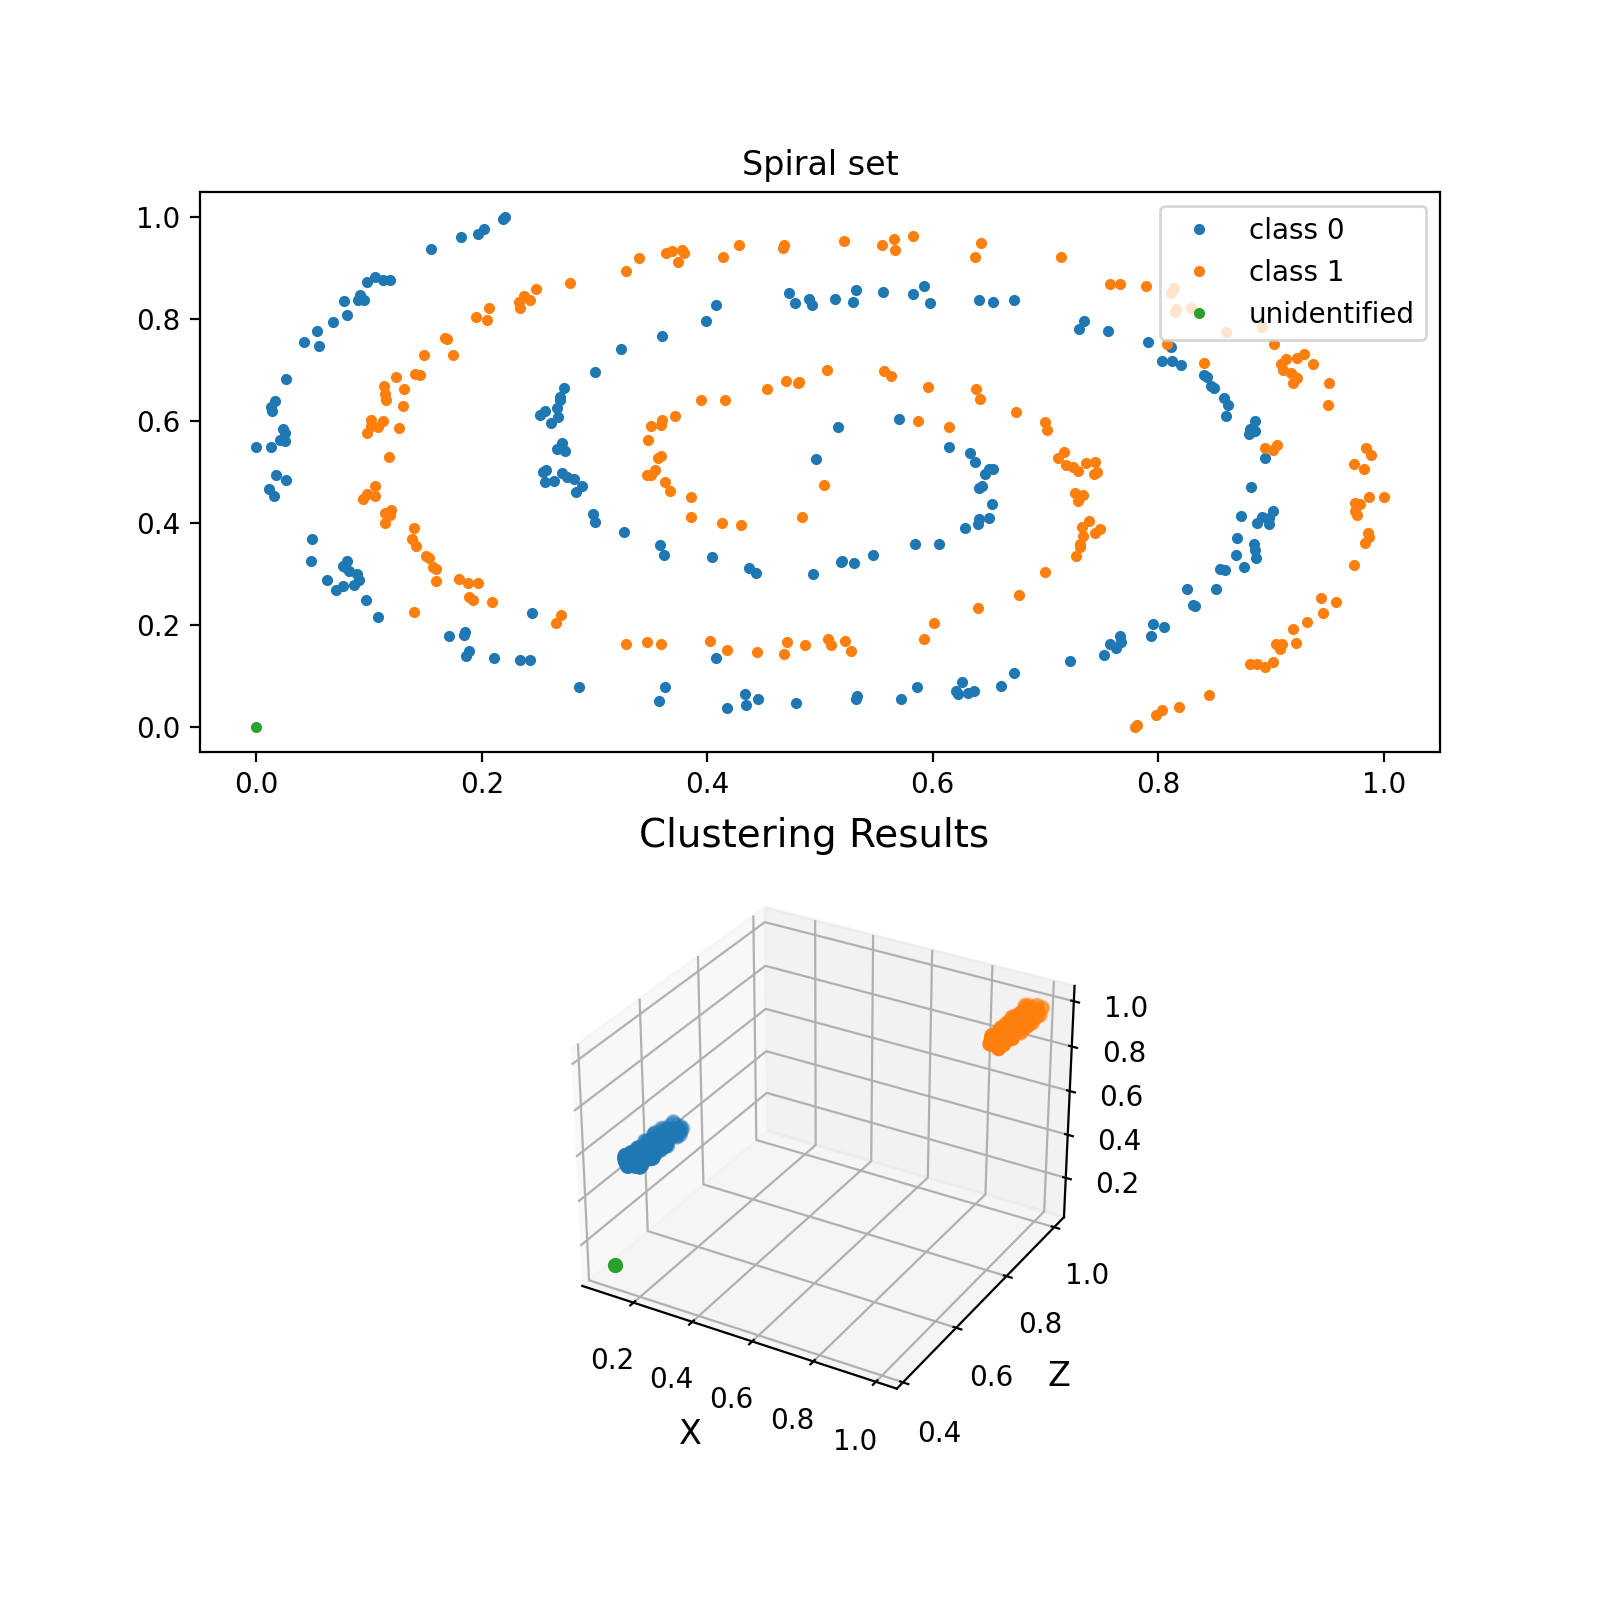

In [13]:
fig4 = plt.figure(figsize=(8,8))
ax = fig4.add_subplot(211)
plt.title('Spiral set')
plt.plot(Xtest.data_normalized[ypred_int==0,0], Xtest.data_normalized[ypred_int==0,1], '.', label='class 0')
plt.plot(Xtest.data_normalized[ypred_int==1,0], Xtest.data_normalized[ypred_int==1,1], '.', label='class 1')
plt.plot(Xtest.data_normalized[ypred_int==2,0], Xtest.data_normalized[ypred_int==2,1], '.', label='unidentified')
plt.legend()
plt.show()

ax2 = fig4.add_subplot(212, projection='3d')
ax2.set_title("Clustering Results ",fontsize=14)
ax2.set_xlabel("X",fontsize=12)
ax2.set_ylabel("Y",fontsize=12)
ax2.set_ylabel("Z",fontsize=12)
ax2.grid(True,linestyle='-',color='0.75')
# scatter with colormap mapping to predicted class
ax2.scatter(Ytest.data_normalized[ylab_int==0,0],Ytest.data_normalized[ylab_int==0,1],Ytest.data_normalized[ylab_int==0,2],'.',label='class 0')
ax2.scatter(Ytest.data_normalized[ylab_int==1,0],Ytest.data_normalized[ylab_int==1,1],Ytest.data_normalized[ylab_int==1,2],'.',label='class 1')
ax2.scatter(Ytest.data_normalized[ylab_int==2,0],Ytest.data_normalized[ylab_int==2,1],Ytest.data_normalized[ylab_int==2,2],'.',label='unidentified')
#color = [c+1 for c in ylab]
#ax2.scatter(Ytest.data_normalized[...,0],Ytest.data_normalized[...,1],Ytest.data_normalized[...,2],s=100,c=color, marker = '*', cmap = cm.jet_r );


In [14]:
target_names = ['class 0', 'class 1', "unidentified"]
print(classification_report(ylab, ypred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.99      0.96      0.97       200
     class 1       0.96      0.99      0.98       200
unidentified       1.00      1.00      1.00         1

    accuracy                           0.98       401
   macro avg       0.98      0.98      0.98       401
weighted avg       0.98      0.98      0.98       401



### Test fuzzyARTb

In [15]:
#PRedict
pred = []
for I in Ytest.data_normalized:
        Z, k = network.fuzzyARTb.predict(I.ravel(),learn=False) 
        if not k==None:
            print("zJ:\t{}\n".format(Z))
            print("Cluster:\t{}\n".format(k))
            print("\n\n")
            pred.append(k)
        else:
            print("Unrecognized pattern:\n")
            pred.append(-1)

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal r

zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]



zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0






INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal r

zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]



zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0






INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal r

zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[0 1]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal r

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.41938937 0.4063737 ]]

Cluster:	0




zJ:	[[0.13267897 0.41992559 0.54741492]
 [0.81688989 0.

INFO:root:T signal ranking:
[1 0]



zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1






INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal r

zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal ranking:
[1 0]

INFO:root:T signal r

zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664e-06 1.96228299e-05 2.64162487e-07]]

Cluster:	1




zJ:	[[9.49484736e-01 8.39856089e-01 9.53945516e-01]
 [4.00807664

<IPython.core.display.Javascript object>


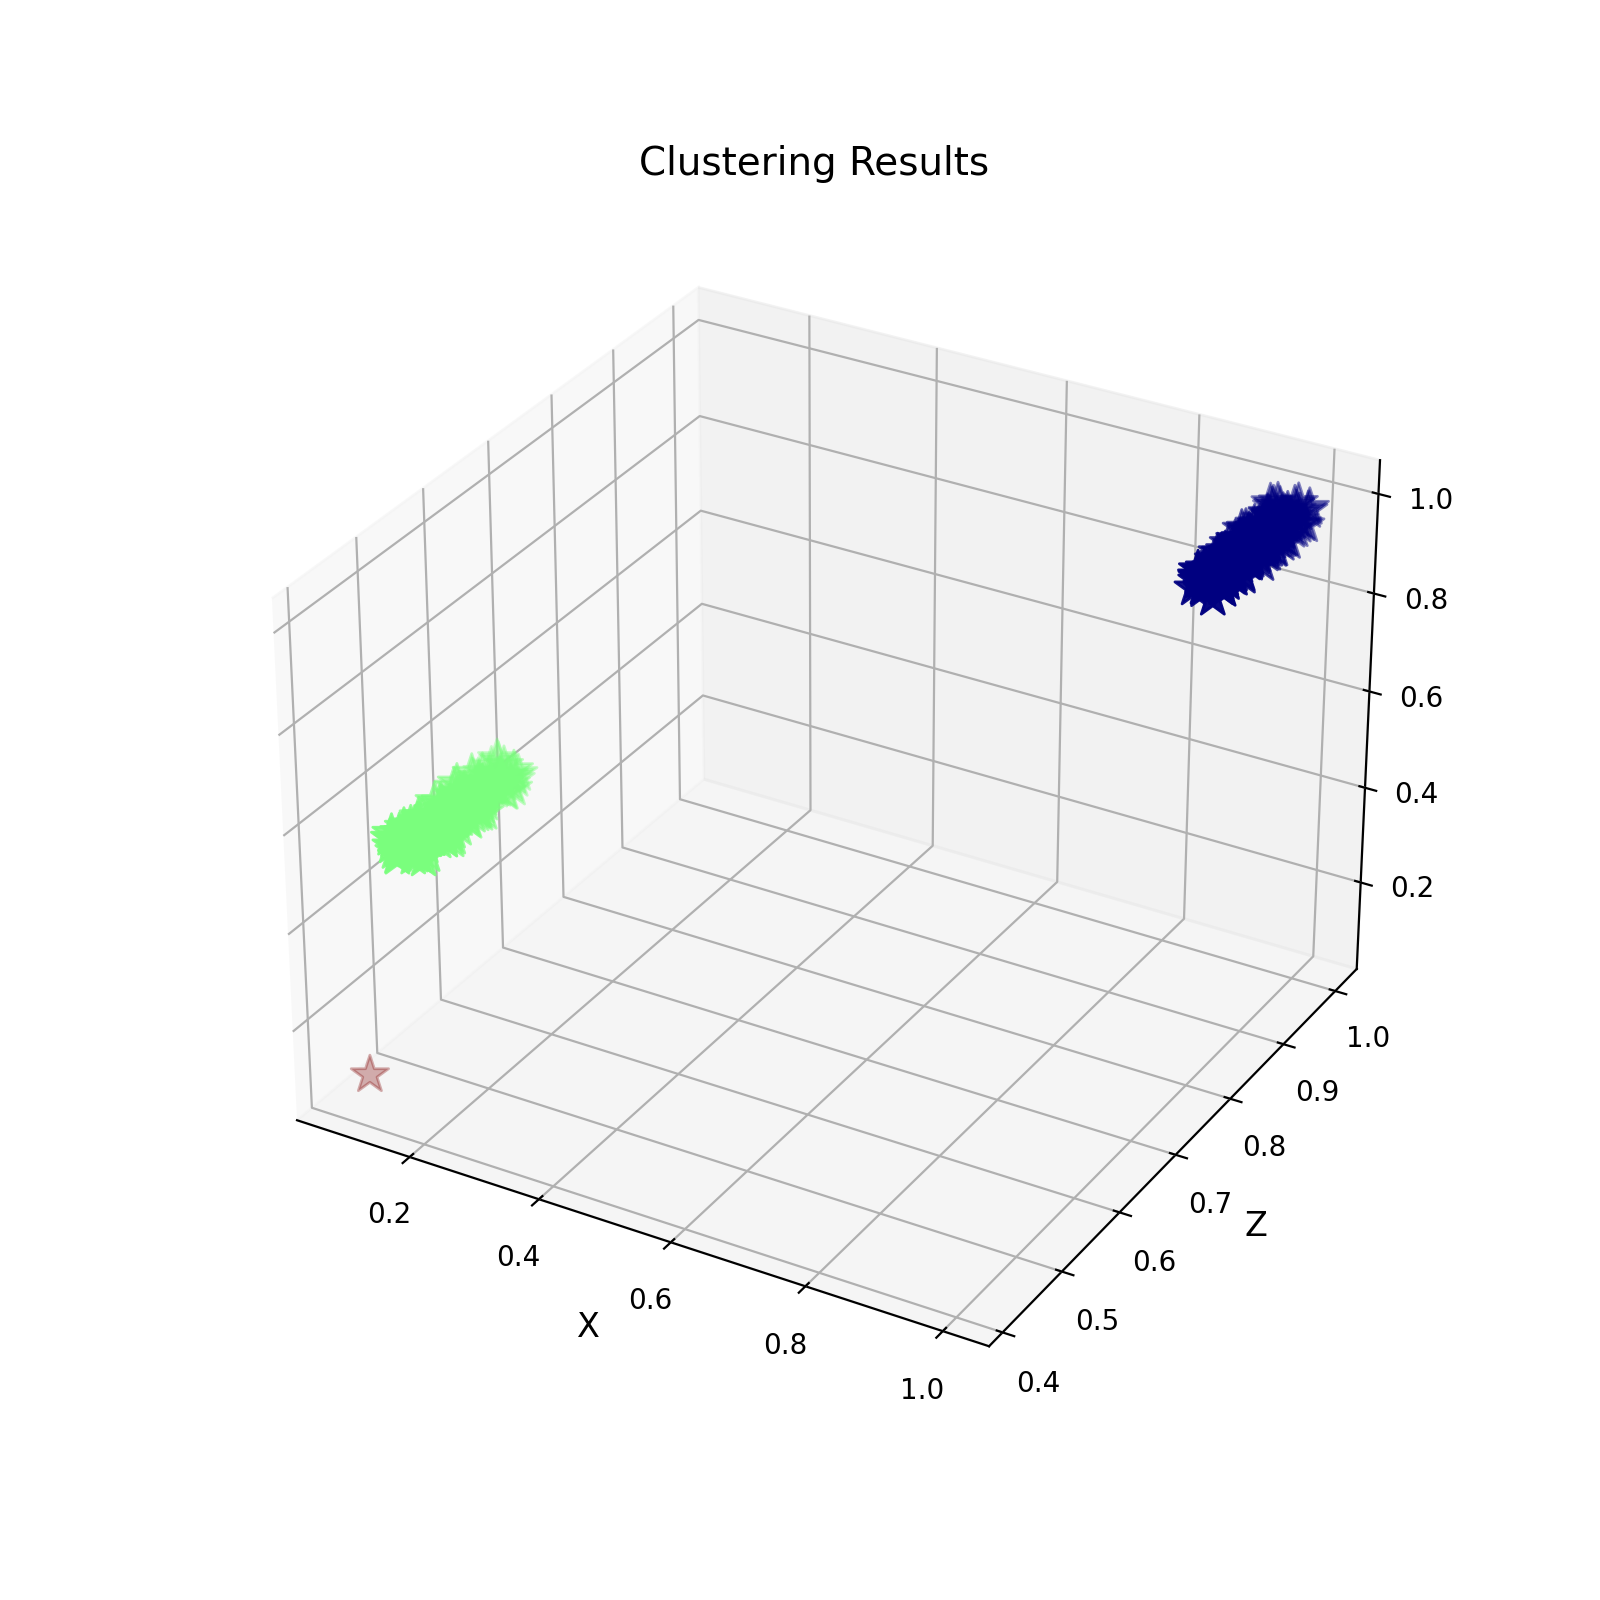

In [16]:
fig3 = plt.figure(figsize=(8,8))
ax = fig3.add_subplot(111, projection='3d')

ax.set_title("Clustering Results ",fontsize=14)
ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
ax.set_ylabel("Z",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
# scatter with colormap mapping to predicted class
color = [c+1 for c in pred]
ax.scatter(Ytest.data_normalized[...,0],Ytest.data_normalized[...,1],Ytest.data_normalized[...,2],s=200,c=color, marker = '*', cmap = cm.jet_r );

plt.show()